In [1]:
## Environment phishingurldetection
## install all necessary libraries

#pip install numpy
#pip install pandas
#pip install seaborn
#pip install matplotlib
#pip install tldextract
#pip install sklearn
#pip install scorecardpy
#pip install xgboost
#pip install lightgbm
#pip install catboost
#pip install flask
#pip install pywebio


## Importing Libraries

In [2]:
# common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset
This is the dataset which we are using to fit model.

In [3]:
# loading dataset
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [4]:
# first 10 rows of dataset
data.head(10)

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   
5   6        3               1          1         42        1   
6   7        2               0          5         60        0   
7   8        1               0          3         30        0   
8   9        8               7          2         76        1   
9  10        2               0          2         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   
5                  0         0            0              0  ...   
6                  0         0            0              0  ...   
7                  0         0            0              0  ...   
8                  1         0            0              0  ...   
9                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0                 0                 1   
2              0             0                 0                 1   
3              0             0                 0                 1   
4              1             0                 0                 1   
5              1             1                 0                 1   
6              0             0                 0                 1   
7              0             0                 0                 1   
8              0             0                 0                -1   
9              0             0                 0                 1   

   UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0            0                     1                       1   
1           -1                     1                       1   
2            0                    -1                       1   
3           -1                     1                       1   
4            1                    -1                       0   
5            1                     1                       1   
6            0                     1                       1   
7            1                     1                       1   
8           -1                     1                       1   
9            1                     1                       1   

   ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                   -1                                   1            1  
1                    1                                   1            1  
2                   -1                                   0            1  
3                    1                                  -1            1  
4                   -1                                  -1            1  
5                   -1                                   1            1  
6                   -1                                  -1            1  
7                    1                                   1            1  
8                    1                                  -1            1  
9                   -1                                  -1            1  

[10 rows x 50 columns]

In [5]:
#dimention of dataset
data.shape

(10000, 50)

In [6]:
# show all columns
pd.set_option('display.max_columns' , 100)

In [7]:
# show first 5 (by deafult) rows along with all columns
data.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                  0         0            0              0           0   
1                  0         0            0              2           0   
2                  0         0            0              0           0   
3                  0         0            0              0           0   
4                  0         0            0              0           0   

   NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0                   0             0        0                0        1   
1                   2             1        0               41        1   
2                   0             0        0                0        1   
3                   0             0        0                0        1   
4                   0             0        0                2        1   

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0             0          0                   0              0   
1             0          0                   0              0   
2             0          0                   0              0   
3             0          0                   0              1   
4             1          0                   0              1   

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0                0              21          44            0   
1                0              17          16          103   
2                0              27          24            0   
3                0              22          50            0   
4                0              10          29            0   

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0                  0                  0                  0             0.000   
1                  0                  1                  0             0.000   
2                  0                  0                  0             0.375   
3                  0                  0                  1             1.000   
4                  0                  0                  0             1.000   

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0            0.250000           1              1                   0   
1            0.000000           0              1                   0   
2            1.000000           1              1                   0   
3            0.095238           1              1                   0   
4            1.000000           0              0                   0   

   ExtFormAction  AbnormalFormAction  PctNullSelfRedirectHyperlinks  \
0              0                   0                            0.0   
1              0                   0                            0.0   
2              0                   0                            0.0   
3              0                   0                            0.0   
4              1                   0                            0.0   

   FrequentDomainNameMismatch  FakeLinkInStatusBar  RightClickDisabled  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           1                    0                   0   
4                           1                    0                   0   

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0            0                  0              0             0   
1            0                  0 

In [8]:
# resetting default ma_columns option to avoid overload on notebook
pd.reset_option("display.max_columns")

Now before doing any EDA or checking any kind of characteristic of the dataset, first we will check which features we can extract from elements. Among all features we can use only those features to train model which we can extract from links.
<br>
<br>
We'll use ***urldata.csv*** dataset, which contains links and only result that link is malicious or not ***(all malicious links are not phishing links, but we are using this dataset to show how to extract elements and store in a same csv)*** as we have to use a csv file containing links to validate our model.

In [9]:
#dataset to show elements extraction
data_url = pd.read_csv("urldata.csv", index_col=0)

In [10]:
# showing first 10 rows
data_url

url      label  result
0                                  https://www.google.com     benign       0
1                                 https://www.youtube.com     benign       0
2                                https://www.facebook.com     benign       0
3                                   https://www.baidu.com     benign       0
4                               https://www.wikipedia.org     benign       0
...                                                   ...        ...     ...
450171        http://ecct-it.com/docmmmnn/aptgd/index.php  malicious       1
450172  http://faboleena.com/js/infortis/jquery/plugin...  malicious       1
450173  http://faboleena.com/js/infortis/jquery/plugin...  malicious       1
450174                             http://atualizapj.com/  malicious       1
450175  http://writeassociate.com/test/Portal/inicio/I...  malicious       1

[450176 rows x 3 columns]

- one quick check
- here it is clearly seen that the row contanning label 'benign' and 'malicious' in column 'label' has value 0 and 1 respectively in 'result' column
- to see if there is any column 'result' which has value mismatch with column 'label'



In [11]:
data_url.label.value_counts()

benign       345738
malicious    104438
Name: label, dtype: int64

In [12]:
data_url.result.value_counts()

0    345738
1    104438
Name: result, dtype: int64

In [13]:
flag = False

for i in range(len(data_url['label'])):
    if data_url.iloc[i,1]=='benign' and data_url.iloc[i,2]!=0:
        flag=True
    if data_url.iloc[i,1]=='malicious' and data_url.iloc[i,2]!=1:
        flag=True   
        
print(flag)        

False


**There is no mismatch in 'label' and 'result' columns.**<br><br>
We can **drop 'label'** column to show csv with extracted elements.

In [14]:
#drop 'label' column
data_url.drop('label', axis=1, inplace=True)

In [15]:
#show first 5 and last 5 rows 
data_url

url  result
0                                  https://www.google.com       0
1                                 https://www.youtube.com       0
2                                https://www.facebook.com       0
3                                   https://www.baidu.com       0
4                               https://www.wikipedia.org       0
...                                                   ...     ...
450171        http://ecct-it.com/docmmmnn/aptgd/index.php       1
450172  http://faboleena.com/js/infortis/jquery/plugin...       1
450173  http://faboleena.com/js/infortis/jquery/plugin...       1
450174                             http://atualizapj.com/       1
450175  http://writeassociate.com/test/Portal/inicio/I...       1

[450176 rows x 2 columns]

## Code to Extract Features from Given URL

In [16]:
# libraries for element extraction from urls
from urllib import parse
from urllib.parse import urlparse
import tldextract 

In [17]:
data_url['UrlLength'] = [len(i) for i in data_url['url']]
data_url['NumDash'] = [i.count('-') for i in data_url['url']]
data_url['NumDots'] = [i.count('.') for i in data_url['url']]
data_url['NumUnderscore'] = [i.count('_') for i in data_url['url']]
data_url['NumPercent'] = [i.count('%') for i in data_url['url']]
data_url['NumAmpersand'] = [i.count('&') for i in data_url['url']]
data_url['NumHash'] = [i.count('#') for i in data_url['url']]
data_url['NumDashInHostname'] = [(urlparse(i).netloc).count('-') for i in data_url['url']]
data_url['NumNumericChars'] = [sum(c.isdigit() for c in i) for i in data_url['url']]
data_url['AtSymbol'] = [0 if c[1].find('@')==-1 else 1 for c in data_url['url'].iteritems()]
data_url['TildeSymbol'] = [0 if c[1].find('~')==-1 else 1 for c in data_url['url'].iteritems()]
data_url['NoHttps'] = [0 if c[1].find('https')==-1 else 1 for c in data_url['url'].iteritems()]
data_url['IpAddress'] = np.where(data_url['url'].str.match('^(http|https)://\d+\.\d+\.\d+\.\d+\.*') == True, 1, 0)
data_url['SubdomainLevel'] = [len(tldextract.extract(i).subdomain.split('.')) for i in data_url['url']]
data_url['NumQueryComponents'] = [len(dict(parse.parse_qs(parse.urlsplit(i, allow_fragments=False).query))) for i in data_url['url']]
data_url['HostnameLength'] = [len(urlparse(i).netloc) for i in data_url['url']]
data_url['PathLength'] = [len(urlparse(i).path) for i in data_url['url']]
data_url['QueryLength'] = [len(urlparse(i).query) for i in data_url['url']]
data_url['DoubleSlashInPath'] = [0 if urlparse(c[1]).path.find('//')==-1 else 1 for c in data_url['url'].iteritems()]   

In [18]:
# first preview of data
data_url

url  result  UrlLength  \
0                                  https://www.google.com       0         22   
1                                 https://www.youtube.com       0         23   
2                                https://www.facebook.com       0         24   
3                                   https://www.baidu.com       0         21   
4                               https://www.wikipedia.org       0         25   
...                                                   ...     ...        ...   
450171        http://ecct-it.com/docmmmnn/aptgd/index.php       1         43   
450172  http://faboleena.com/js/infortis/jquery/plugin...       1        159   
450173  http://faboleena.com/js/infortis/jquery/plugin...       1        147   
450174                             http://atualizapj.com/       1         22   
450175  http://writeassociate.com/test/Portal/inicio/I...       1        143   

        NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  NumHash  \
0             0        2              0           0             0        0   
1             0        2              0           0             0        0   
2             0        2              0           0             0        0   
3             0        2              0           0             0        0   
4             0        2              0           0             0        0   
...         ...      ...            ...         ...           ...      ...   
450171        1        2              0           0             0        0   
450172        0        2              2           0             0        0   
450173        0        1              1           0             0        0   
450174        0        1              0           0             0        0   
450175        1        4              1           0             0        0   

        NumDashInHostname  ...  AtSymbol  TildeSymbol  NoHttps  IpAddress  \
0                       0  ...         0            0        1          0   
1                       0  ...         0            0        1          0   
2                       0  ...         0            0        1          0   
3                       0  ...         0            0        1          0   
4                       0  ...         0            0        1          0   
...                   ...  ...       ...          ...      ...        ...   
450171                  1  ...         0            0        0          0   
450172                  0  ...         0            0        0          0   
450173                  0  ...         0            0        0          0   
450174                  0  ...         0            0        0          0   
450175                  0  ...         0            0        0          0   

        SubdomainLevel  NumQueryComponents  HostnameLength  PathLength  \
0                    1                   0              14           0   
1                    1                   0              15           0   
2                    1                   0              16           0   
3                    1                   0              13           0   
4                    1                   0              17           0   
...                ...                 ...             ...         ...   
450171               1                   0              11          25   
450172               1                   0              13         139   
450173               1                   0              13         127   
450174               1                   0              14           1   
450175               1                   0              18         118   

        QueryLength  DoubleSlashInPath  
0                 0                  0  
1                 0                  0  
2                 0                  0  
3                 0                  0  
4                 0                  0  
...             ...                ...  
450171            0                  0  
450172        

This is our validation data. We'll leave it now in this form. We'll check accuracy of our model over this dataset after final model fitting.

In [19]:
# now setting options max_columns, max_rows, max_colwidth to see the results more clearly.
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_colwidth' , None)

In [20]:
# let's see first 1000 rows
## part of benign urls
data_url.head(1000)

url  result  UrlLength  NumDash  \
0                     https://www.google.com       0         22        0   
1                    https://www.youtube.com       0         23        0   
2                   https://www.facebook.com       0         24        0   
3                      https://www.baidu.com       0         21        0   
4                  https://www.wikipedia.org       0         25        0   
5                     https://www.reddit.com       0         22        0   
6                      https://www.yahoo.com       0         21        0   
7                   https://www.google.co.in       0         24        0   
8                         https://www.qq.com       0         18        0   
9                     https://www.amazon.com       0         22        0   
10                    https://www.taobao.com       0         22        0   
11                   https://www.twitter.com       0         23        0   
12                     https://www.tmall.com       0         21        0   
13                  https://www.google.co.jp       0         24        0   
14                        https://www.vk.com       0         18        0   
15                      https://www.live.com       0         20        0   
16                 https://www.instagram.com       0         25        0   
17                      https://www.sohu.com       0         20        0   
18                   https://www.sina.com.cn       0         23        0   
19                        https://www.jd.com       0         18        0   
20                     https://www.weibo.com       0         21        0   
21                        https://www.360.cn       0         18        0   
22                     https://www.google.de       0         21        0   
23                  https://www.google.co.uk       0         24        0   
24                 https://www.google.com.br       0         25        0   
25                     https://www.google.fr       0         21        0   
26                     https://www.google.ru       0         21        0   
27                   https://www.netflix.com       0         23        0   
28                     https://www.yandex.ru       0         21        0   
29                https://www.list.tmall.com       0         26        0   
30                  https://www.linkedin.com       0         24        0   
31                     https://www.twitch.tv       0         21        0   
32                     https://www.google.it       0         21        0   
33                          https://www.t.co       0         16        0   
34                 https://www.google.com.hk       0         25        0   
35                   https://www.pornhub.com       0         23        0   
36                     https://www.google.es       0         21        0   
37                    https://www.alipay.com       0         22        0   
38                   https://www.xvideos.com       0         23        0   
39                   https://www.yahoo.co.jp       0         23        0   
40                     https://www.google.ca       0         21        0   
41                      https://www.ebay.com       0         20        0   
42                 https://www.google.com.mx       0         25        0   
43                 https://www.microsoft.com       0         25        0   
44                      https://www.bing.com       0         20        0   
45                     https://www.imgur.com       0         21        0   
46                         https://www.ok.ru       0         17        0   
47                 https://www.bongacams.com       0         25        0   
48                      https://www.imdb.com       0         20        0   
49                https://www.aliexpress.com       0         26        0   
50                     https://www.wikia.com       0         21        0   
51                    https://www.hao123.com       0         22        0   
52           

In [21]:
# let's see last 1000 rows
## part of malicious urls
data_url.tail(1000)

url  \
449176                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         http://sitesumo.com/Microsoft-drivers2017/main.html   
449177                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         http://ictsupportwebmail.form2pay.com/HELPDESK.html   
449178                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     http://compattabili.it/cli/js/webapps/Sing-in/Login.php   
449179                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       http://bit.ly/2k9Z7I2   
449180                                                                                                                                                                                           

In [22]:
# resetting default max_columns option to avoid overload on notebook
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")
pd.reset_option("display.max_colwidth")

### ***Datset for this to check***

In [23]:
# our dataset of use will be
# other than the elements which can't be extracted for now, we have also dropped 'id' column 
data_in_use = data[['UrlLength','NumDash','NumDots','NumUnderscore','NumPercent','NumAmpersand','NumHash','NumDashInHostname','NumNumericChars','AtSymbol','TildeSymbol','NoHttps','IpAddress','SubdomainLevel','NumQueryComponents','HostnameLength','PathLength','QueryLength','DoubleSlashInPath','CLASS_LABEL']]

In [24]:
# base dataset preview
data_in_use

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0            72        0        3              0           0             0   
1           144        0        3              2           0             1   
2            58        0        3              0           0             0   
3            79        1        3              0           0             0   
4            46        0        3              0           0             0   
...         ...      ...      ...            ...         ...           ...   
9995         50        0        3              0           0             1   
9996         59        1        2              0           0             0   
9997         57        0        2              0           0             0   
9998         49        0        3              0           0             0   
9999         52        3        3              0           0             0   

      NumHash  NumDashInHostname  NumNumericChars  AtSymbol  TildeSymbol  \
0           0                  0                0         0            0   
1           0                  0               41         0            0   
2           0                  0                0         0            0   
3           0                  0                0         0            0   
4           0                  0                2         0            0   
...       ...                ...              ...       ...          ...   
9995        0                  0                9         0            0   
9996        0                  0                0         0            0   
9997        0                  0                6         0            0   
9998        0                  0                3         0            0   
9999        0                  0                0         0            0   

      NoHttps  IpAddress  SubdomainLevel  NumQueryComponents  HostnameLength  \
0           1          0               1                   0              21   
1           1          0               1                   2              17   
2           1          0               1                   0              27   
3           1          0               1                   0              22   
4           1          0               0                   0              10   
...       ...        ...             ...                 ...             ...   
9995        1          0               1                   2              15   
9996        1          0               1                   0              19   
9997        1          0               1                   0              16   
9998        1          0               1                   1              15   
9999        1          0               1                   0              10   

      PathLength  QueryLength  DoubleSlashInPath  CLASS_LABEL  
0             44            0                  0            1  
1             16          103                  0            1  
2             24            0                  0            1  
3             50            0                  0            1  
4             29            0                  0            1  
...          ...          ...                ...          ...  
9995          10           17                  0            0  
9996          33            0                  0            0  
9997          34            0                  0            0  
9998          13           13                  0            0  
9999          35            0                  0            0  

[10000 rows x 20 columns]

In [25]:
# dimention of base dataset
data_in_use.shape

(10000, 20)

It has **19 features of url** and one column **"CLASS_LABEL"** contains its label as **'Phishing Url' or 'Non-Phishing Url' (values 0 or 1 respectively).**

### ***About Dataset***

In [26]:
data_in_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   UrlLength           10000 non-null  int64
 1   NumDash             10000 non-null  int64
 2   NumDots             10000 non-null  int64
 3   NumUnderscore       10000 non-null  int64
 4   NumPercent          10000 non-null  int64
 5   NumAmpersand        10000 non-null  int64
 6   NumHash             10000 non-null  int64
 7   NumDashInHostname   10000 non-null  int64
 8   NumNumericChars     10000 non-null  int64
 9   AtSymbol            10000 non-null  int64
 10  TildeSymbol         10000 non-null  int64
 11  NoHttps             10000 non-null  int64
 12  IpAddress           10000 non-null  int64
 13  SubdomainLevel      10000 non-null  int64
 14  NumQueryComponents  10000 non-null  int64
 15  HostnameLength      10000 non-null  int64
 16  PathLength          10000 non-null  int64

All columns are in numeric (int64) datatype and there is **no missing value in any column**.

In [27]:
# summary
data_in_use.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

UrlLength       NumDash       NumDots  NumUnderscore    NumPercent  \
count  10000.000000  10000.000000  10000.000000    10000.00000  10000.000000   
mean      70.264100      1.818000      2.445100        0.32320      0.073800   
std       33.369877      3.106258      1.346836        1.11466      0.622248   
min       12.000000      0.000000      1.000000        0.00000      0.000000   
1%        24.000000      0.000000      1.000000        0.00000      0.000000   
5%        33.000000      0.000000      1.000000        0.00000      0.000000   
25%       48.000000      0.000000      2.000000        0.00000      0.000000   
50%       62.000000      0.000000      2.000000        0.00000      0.000000   
75%       84.000000      2.000000      3.000000        0.00000      0.000000   
90%      111.000000      6.000000      4.000000        1.00000      0.000000   
95%      135.000000      9.000000      4.000000        2.00000      0.000000   
99%      197.010000     13.000000      7.000000        6.00000      2.000000   
max      253.000000     55.000000     21.000000       18.00000     19.000000   

       NumAmpersand       NumHash  NumDashInHostname  NumNumericChars  \
count  10000.000000  10000.000000       10000.000000     10000.000000   
mean       0.277200      0.002300           0.138900         5.810300   
std        1.117356      0.047906           0.545744         9.617877   
min        0.000000      0.000000           0.000000         0.000000   
1%         0.000000      0.000000           0.000000         0.000000   
5%         0.000000      0.000000           0.000000         0.000000   
25%        0.000000      0.000000           0.000000         0.000000   
50%        0.000000      0.000000           0.000000         2.000000   
75%        0.000000      0.000000           0.000000         8.000000   
90%        1.000000      0.000000           0.000000        17.000000   
95%        2.000000      0.000000           1.000000        23.000000   
99%        6.000000      0.000000           4.000000        48.000000   
max       22.000000      1.000000           9.000000       111.000000   

           AtSymbol   TildeSymbol       NoHttps     IpAddress  SubdomainLevel  \
count  10000.000000  10000.000000  10000.000000  10000.000000    10000.000000   
mean       0.000300      0.013100      0.988800      0.017200        0.586800   
std        0.017319      0.113709      0.105241      0.130023        0.751214   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
1%         0.000000      0.000000      0.000000      0.000000        0.000000   
5%         0.000000      0.000000      1.000000      0.000000        0.000000   
25%        0.000000      0.000000      1.000000      0.000000        0.000000   
50%        0.000000      0.000000      1.000000      0.000000        1.000000   
75%        0.000000      0.000000      1.000000      0.000000        1.000000   
90%        0.000000      0.000000      1.000000      0.000000        1.000000   
95%        0.000000      0.000000      1.000000      0.000000        1.000000   
99%        0.000000      1.000000      1.000000      1.000000        3.000000   
max        1.000000      1.000000      1.000000      1.000000       14.000000   

       NumQueryComponents  HostnameLength    PathLength   QueryLength  \
count        10000.000000     10000.00000  10000.000000  10000.000000   
mean             0.458600        18.82430     35.564900      8.606500   
std              1.344793         8.11654     24.588502     24.313053   
min              0.000000         4.00000      0.000000      0.000000   
1%               0.000000         8.00000      1.000000      0.000000   
5%               0.000000        10.00000      6.000000      0.000000   
25%              0.000000        14.00000     18.000000      0.000000   
50%              0.000000        18.00000     30.000000      0.000000   
75%              0.000000        22.00000     48.000000      0.000000   
9

Now check total number of unique values in column.

In [28]:
#checking for number of unique values in each column
for col in data_in_use:
    print(col,'------>',len(data_in_use[col].unique()))

UrlLength ------> 226
NumDash ------> 25
NumDots ------> 17
NumUnderscore ------> 16
NumPercent ------> 14
NumAmpersand ------> 16
NumHash ------> 2
NumDashInHostname ------> 10
NumNumericChars ------> 82
AtSymbol ------> 2
TildeSymbol ------> 2
NoHttps ------> 2
IpAddress ------> 2
SubdomainLevel ------> 13
NumQueryComponents ------> 19
HostnameLength ------> 74
PathLength ------> 147
QueryLength ------> 164
DoubleSlashInPath ------> 2
CLASS_LABEL ------> 2


Now here we can see that all the columns contains discrete values. So to check total number of unique values, max present value in a class we can convert each column into category type and check summary.

In [29]:
data_in_use=data_in_use.astype(str) # all columns will convert to object datatype

In [30]:
data_in_use.describe()

UrlLength NumDash NumDots NumUnderscore NumPercent NumAmpersand  \
count      10000   10000   10000         10000      10000        10000   
unique       226      25      17            16         14           16   
top           57       0       2             0          0            0   
freq         192    5001    4053          8617       9727         8975   

       NumHash NumDashInHostname NumNumericChars AtSymbol TildeSymbol NoHttps  \
count    10000             10000           10000    10000       10000   10000   
unique       2                10              82        2           2       2   
top          0                 0               0        0           0       1   
freq      9977              9066            4266     9997        9869    9888   

       IpAddress SubdomainLevel NumQueryComponents HostnameLength PathLength  \
count      10000          10000              10000          10000      10000   
unique         2             13                 19             74        147   
top            0              0                  0             17          1   
freq        9828           4835               8134            755        326   

       QueryLength DoubleSlashInPath CLASS_LABEL  
count        10000             10000       10000  
unique         164                 2           2  
top              0                 0           1  
freq          8013              9991        5000

From here (the last column **CLASS_LABEL**) we can also conclude that there are **5000 phishing** url among 10000 urls with no missing value. So **dataset is completely balanced**.

Change all columns to numeric for further analysis.

In [31]:
data_in_use=data_in_use.astype(int)  # all columns will convert to int32 datatype

- So here data contains **NO MISSING VALUE** 
- Dataset is **BALANCED**

Now we proceed to fit our baseline model which is **Logistic Regression** with default parameters.

## Baseline Model (Default Logistic Model)
Now we will create logistic regression model with dafault hyperparameters...with all features present in our base dataset. This will be our baseline model. As the dataset is balanced, we will use **Accuracy** as measure of model.
<br><br>
As we are applying logistic regression, not going to apply scaling here, as scaling with not have any impact on results of logistic regression.

In [32]:
# import libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits=10,test_size=0.30)

# Import library to calculate cross validation score
from sklearn.model_selection import cross_val_score

In [33]:
# divide data into base independent(X) and dependent(y) features

X = data_in_use.iloc[:,0:19]
y = data_in_use['CLASS_LABEL']

In [34]:
# show base independent and dependent data

print("data_in_use")
print('\n')

# Independent Features
print('Independent Features:')
print('Dimention:',X.shape)
print('Column Names:')
print(X.columns)
print('First few rows:')
pd.set_option('display.max_columns' , 20)
print(X.head())
pd.reset_option('display.max_columns')

print('\n')

# Dependent Features
print('Dependent Feature: CLASS_LABEL')
print('Dimention:',y.shape)
print('First few values:')
print(y.head())

data_in_use


Independent Features:
Dimention: (10000, 19)
Column Names:
Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath'],
      dtype='object')
First few rows:
   UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0         72        0        3              0           0             0   
1        144        0        3              2           0             1   
2         58        0        3              0           0             0   
3         79        1        3              0           0             0   
4         46        0        3              0           0             0   

   NumHash  NumDashInHostname  NumNumericChars  AtSymbol  TildeSymbol  \
0        0                  0        

In [35]:
# divide data into base training and testing set
## we will use 20% as test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("data_in_use")
print('Training split : X_train_shape =', X_train.shape, ',   y_train_shape =', y_train.shape)
print('Testing split : X_test_shape =', X_test.shape, ',   y_test_shape =', y_test.shape)

data_in_use
Training split : X_train_shape = (8000, 19) ,   y_train_shape = (8000,)
Testing split : X_test_shape = (2000, 19) ,   y_test_shape = (2000,)


C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Confusion Matrix : 
 [[794 194]
 [171 841]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       988
           1       0.81      0.83      0.82      1012

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Logistic Model (baseline) ROC AUC =  0.88


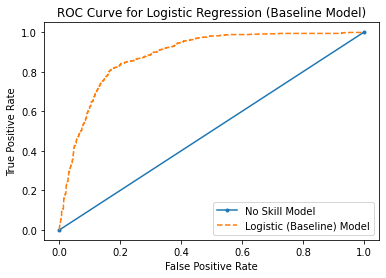

In [36]:
# fit logistic model with default hyperparameters

## model training
classifier = LogisticRegression(random_state=0)
logistic_model = classifier.fit(X_train, y_train)


## prediction
predictions_training = logistic_model.predict(X_train)
score=cross_val_score(LogisticRegression(random_state=0),X_train, y_train, cv=ssplit)
predictions_training_CV=score.mean()     
predictions_testing = logistic_model.predict(X_test)

## Confusion Matrix
cm = confusion_matrix(y_test, predictions_testing)
print("Confusion Matrix : \n", cm)

## Classification Report
print(classification_report(y_test, predictions_testing))

## probability of falling into a particular class from each observation
probs = logistic_model.predict_proba(X_test)
probs = probs[:,1]

## AUC (Area Under Curve) Score
auc_score = roc_auc_score(y_test, probs)
print("Logistic Model (baseline) ROC AUC = ",format(auc_score,"0.2f"))


## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, linestyle='--', label='Logistic (Baseline) Model')
plt.title("ROC Curve for Logistic Regression (Baseline Model)")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

In [37]:
## Training and Tesing Accuracy
print("Training accuracy of Logistic Regression: ", format(accuracy_score(y_train,predictions_training),"0.2f"))
print("Training accuracy of Logistic Regression from Cross Validation: ", format(predictions_training_CV,"0.2f"))
print("Testing accuracy of Logistic Regression: ", format(accuracy_score(y_test, predictions_testing),"0.2f")) 

Training accuracy of Logistic Regression:  0.82
Training accuracy of Logistic Regression from Cross Validation:  0.82
Testing accuracy of Logistic Regression:  0.82


- **Quite good training and testing accuracy**. Here **seems no such overfitting issue**.
- Next we will do feature scaling which we skipped in baseline model. But now we are going to use some algorithms which will require feature scaling.
- Next we will perform some **new feature creation** from **EDA, Weight of Evidence** techniques and **score** of being anomalous of an observation from **Isolation Forest**.
- Then we'll **fit some different models, perform hyperparameter tuning**.
- Finally apply **Voting Classifier** Algorithm **to get final result**.
- We'll **apply all told process over base training data *X_train***.

# Feature Creation

## ***From EDA of Extracted Features***

In [38]:
X_train.describe()

UrlLength     NumDash      NumDots  NumUnderscore   NumPercent  \
count  8000.000000  8000.00000  8000.000000    8000.000000  8000.000000   
mean     70.017875     1.82125     2.441750       0.319000     0.073125   
std      33.082898     3.13740     1.346322       1.101654     0.628154   
min      12.000000     0.00000     1.000000       0.000000     0.000000   
25%      48.000000     0.00000     2.000000       0.000000     0.000000   
50%      62.000000     0.00000     2.000000       0.000000     0.000000   
75%      83.000000     2.00000     3.000000       0.000000     0.000000   
max     253.000000    55.00000    21.000000      16.000000    19.000000   

       NumAmpersand      NumHash  NumDashInHostname  NumNumericChars  \
count   8000.000000  8000.000000        8000.000000      8000.000000   
mean       0.266375     0.002250           0.140875         5.775875   
std        1.100146     0.047384           0.552329         9.557487   
min        0.000000     0.000000           0.000000         0.000000   
25%        0.000000     0.000000           0.000000         0.000000   
50%        0.000000     0.000000           0.000000         2.000000   
75%        0.000000     0.000000           0.000000         8.000000   
max       22.000000     1.000000           9.000000       111.000000   

          AtSymbol  TildeSymbol      NoHttps    IpAddress  SubdomainLevel  \
count  8000.000000  8000.000000  8000.000000  8000.000000     8000.000000   
mean      0.000375     0.013250     0.988625     0.017625        0.586125   
std       0.019362     0.114351     0.106052     0.131592        0.727941   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     1.000000     0.000000        0.000000   
50%       0.000000     0.000000     1.000000     0.000000        1.000000   
75%       0.000000     0.000000     1.000000     0.000000        1.000000   
max       1.000000     1.000000     1.000000     1.000000       14.000000   

       NumQueryComponents  HostnameLength   PathLength  QueryLength  \
count         8000.000000     8000.000000  8000.000000  8000.000000   
mean             0.447125       18.828500    35.574125     8.348375   
std              1.332264        8.101623    24.652190    23.891575   
min              0.000000        4.000000     0.000000     0.000000   
25%              0.000000       14.000000    18.000000     0.000000   
50%              0.000000       18.000000    30.000000     0.000000   
75%              0.000000       22.000000    48.000000     0.000000   
max             23.000000      137.000000   161.000000   188.000000   

       DoubleSlashInPath  
count        8000.000000  
mean            0.000875  
std             0.029569  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

In [39]:
# Combine scaled training and testing data
X_tr_y_tr = pd.concat([X_train,y_train], axis=1)

#### ***Stacked Bar Plot from Crosstab***

UrlLength         12        13        14       15       17        18   \
CLASS_LABEL                                                             
0            0.024925  0.024925  0.024925  0.04985  0.04985  0.074776   
1            0.000000  0.000000  0.000000  0.00000  0.00000  0.000000   

UrlLength         19        20        21        22   ...       241       242  \
CLASS_LABEL                                          ...                       
0            0.174477  0.074776  0.523430  0.199402  ...  0.000000  0.000000   
1            0.000000  0.050150  0.025075  0.125376  ...  0.025075  0.025075   

UrlLength         244       245       247      248       249       251  \
CLASS_LABEL                                                              
0            0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
1            0.025075  0.025075  0.025075  0.05015  0.025075  0.025075   

UrlLength         252       253  
CLASS_LABEL                      
0            0.000000  0.000000  
1            0.075226  0.025075  

[2 rows x 221 columns]

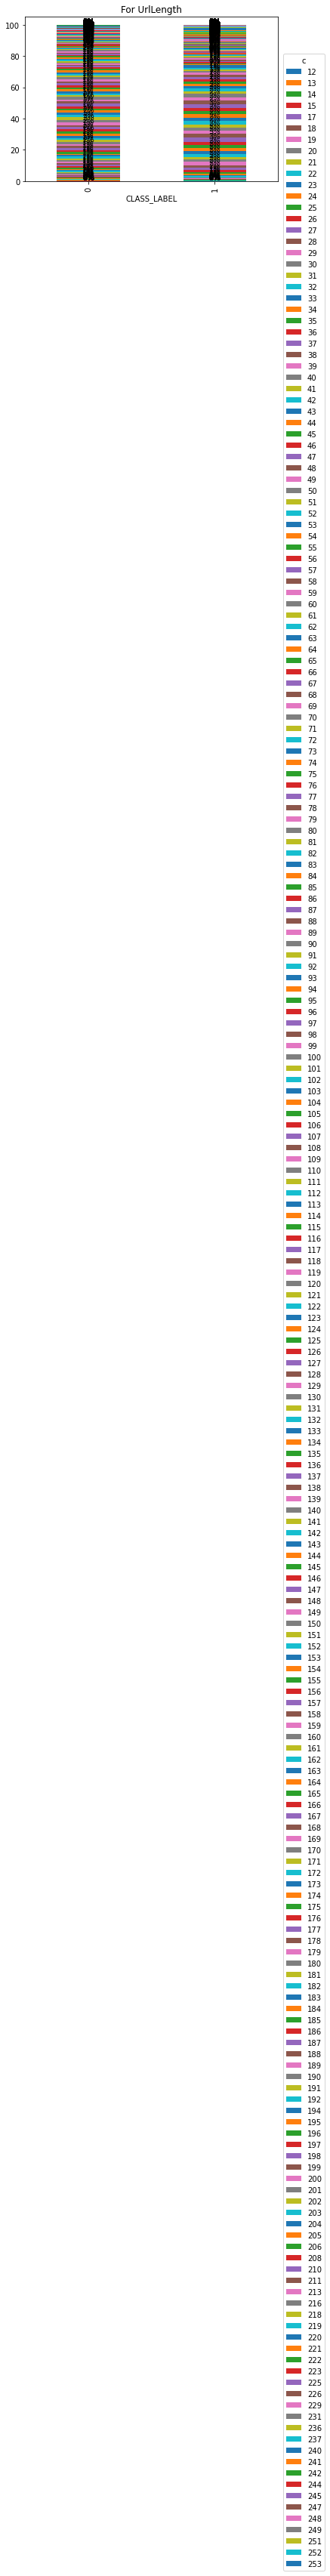

NumDash             0          1         2         3         4         5   \
CLASS_LABEL                                                                 
0            40.952144  12.288136  7.627119  5.882353  5.259222  5.009970   
1            59.528586  28.861585  6.143430  2.081244  1.078235  1.730191   

NumDash            6         7         8         9   ...        15        16  \
CLASS_LABEL                                          ...                       
0            5.333998  4.012961  3.564307  2.617149  ...  0.373878  0.274177   
1            0.150451  0.100301  0.025075  0.025075  ...  0.075226  0.000000   

NumDash            17        18       19        20        23        24  \
CLASS_LABEL                                                              
0            0.174477  0.224327  0.04985  0.074776  0.124626  0.024925   
1            0.000000  0.000000  0.00000  0.025075  0.000000  0.000000   

NumDash            26        55  
CLASS_LABEL                      
0            0.024925  0.024925  
1            0.000000  0.000000  

[2 rows x 25 columns]

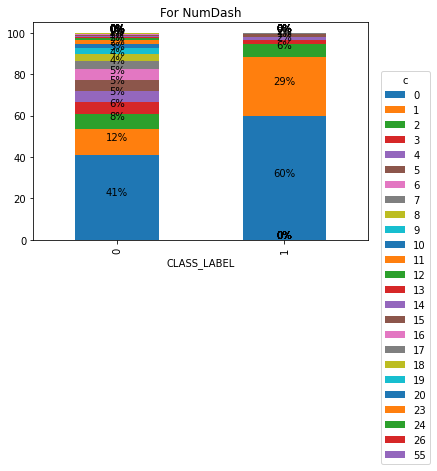

NumDots             1          2          3          4         5         6   \
CLASS_LABEL                                                                   
0            30.757727  41.076770  23.255234   3.489531  0.897308  0.174477   
1             8.224674  40.270812  31.143430  12.763290  3.711133  1.730191   

NumDots            7         8         9         10        11        12  \
CLASS_LABEL                                                               
0            0.249252  0.074776  0.000000  0.000000  0.000000  0.000000   
1            0.651956  0.401204  0.200602  0.100301  0.125376  0.150451   

NumDots            13        14        15        16        21  
CLASS_LABEL                                                    
0            0.000000  0.000000  0.000000  0.000000  0.024925  
1            0.075226  0.175527  0.250752  0.025075  0.000000

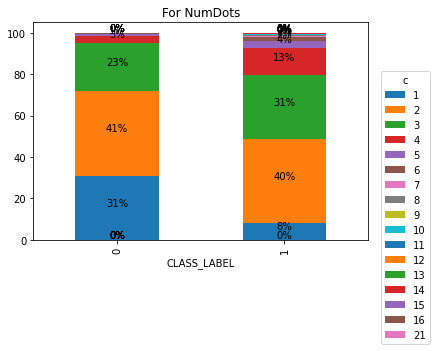

NumUnderscore         0         1         2         3         4         5   \
CLASS_LABEL                                                                  
0              82.801595  7.328016  4.835494  1.769691  0.972084  0.797607   
1              89.819458  6.043129  1.529589  0.977934  0.476429  0.351053   

NumUnderscore        6         7         8         9         10        11  \
CLASS_LABEL                                                                 
0              0.398804  0.299103  0.249252  0.149551  0.149551  0.124626   
1              0.150451  0.601805  0.050150  0.000000  0.000000  0.000000   

NumUnderscore        12        14        16  
CLASS_LABEL                                  
0              0.074776  0.024925  0.024925  
1              0.000000  0.000000  0.000000

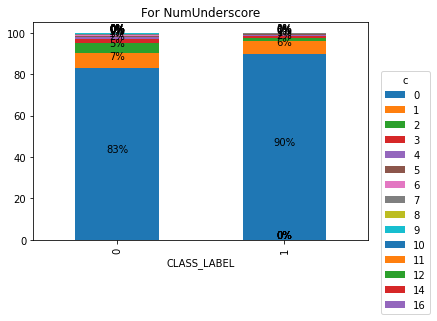

NumPercent          0         1         2         3         4         5   \
CLASS_LABEL                                                                
0            96.410768  1.121635  1.196411  0.398804  0.174477  0.099701   
1            98.244734  1.003009  0.351053  0.125376  0.150451  0.100301   

NumPercent         6         7         8         13       15        16  \
CLASS_LABEL                                                              
0            0.074776  0.224327  0.174477  0.024925  0.04985  0.024925   
1            0.025075  0.000000  0.000000  0.000000  0.00000  0.000000   

NumPercent         19  
CLASS_LABEL            
0            0.024925  
1            0.000000

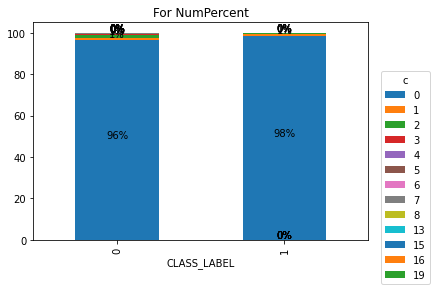

NumAmpersand         0         1         2         3         4         5   \
CLASS_LABEL                                                                 
0             84.845464  6.181456  4.511466  1.595214  1.246261  0.623131   
1             95.185557  1.529589  1.178536  0.401204  0.351053  0.150451   

NumAmpersand        6         7         8         9         10       11  \
CLASS_LABEL                                                               
0             0.747757  0.149551  0.024925  0.024925  0.024925  0.00000   
1             0.250752  0.175527  0.100301  0.125376  0.075226  0.05015   

NumAmpersand        12        14        22  
CLASS_LABEL                                 
0             0.000000  0.000000  0.024925  
1             0.401204  0.025075  0.000000

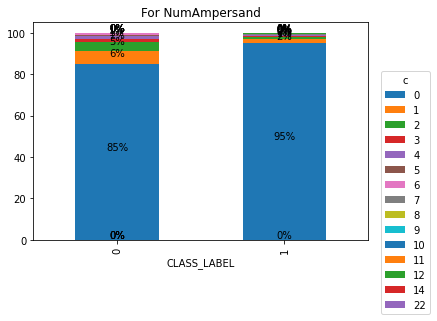

NumHash               0         1
CLASS_LABEL                      
0            100.000000  0.000000
1             99.548646  0.451354

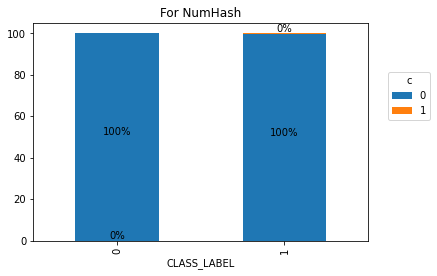

NumDashInHostname          0          1         2         3         4  \
CLASS_LABEL                                                             
0                  94.940179   4.536391  0.398804  0.099701  0.000000   
1                  86.233701  10.205617  1.078235  0.300903  2.006018   

NumDashInHostname         5        6         7         9  
CLASS_LABEL                                               
0                  0.024925  0.00000  0.000000  0.000000  
1                  0.025075  0.05015  0.075226  0.025075

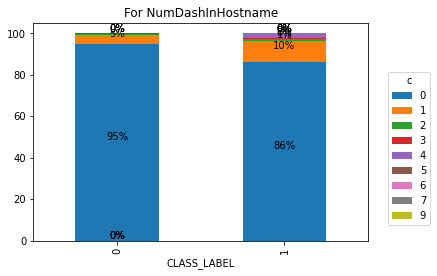

NumNumericChars        0         1         2         3         4         5    \
CLASS_LABEL                                                                    
0                28.015952  3.489531  3.863410  4.636092  7.577268  6.854437   
1                57.698094  6.243731  3.134403  2.532598  4.137412  1.203611   

NumNumericChars       6         7          8         9    ...       73   \
CLASS_LABEL                                               ...             
0                9.995015  5.358923  10.294118  3.389831  ...  0.000000   
1                1.354062  1.003009   0.451354  1.579739  ...  0.025075   

NumNumericChars       74        75        76        77        78        82   \
CLASS_LABEL                                                                   
0                0.000000  0.000000  0.024925  0.000000  0.000000  0.000000   
1                0.300903  0.025075  0.025075  0.100301  0.025075  0.025075   

NumNumericChars       87        88        111  
CLASS_LABEL                                    
0                0.000000  0.024925  0.000000  
1                0.025075  0.000000  0.025075  

[2 rows x 79 columns]

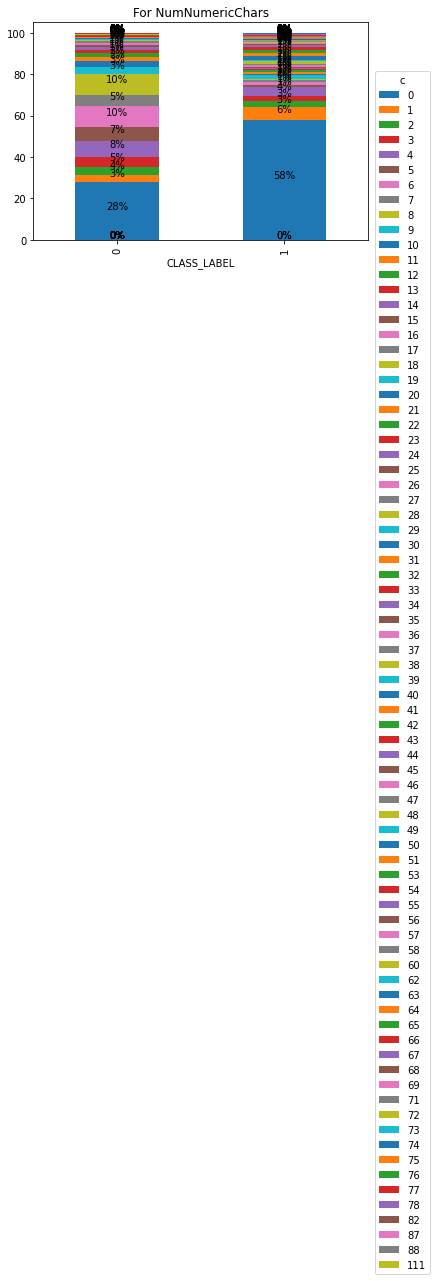

AtSymbol              0         1
CLASS_LABEL                      
0             99.925224  0.074776
1            100.000000  0.000000

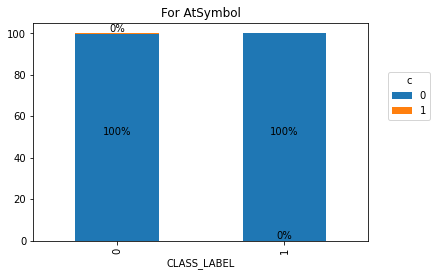

TildeSymbol          0         1
CLASS_LABEL                     
0            99.725823  0.274177
1            97.617854  2.382146

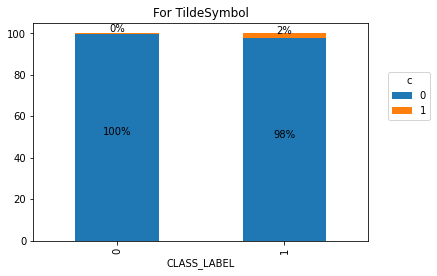

NoHttps             0          1
CLASS_LABEL                     
0            0.348953  99.651047
1            1.930792  98.069208

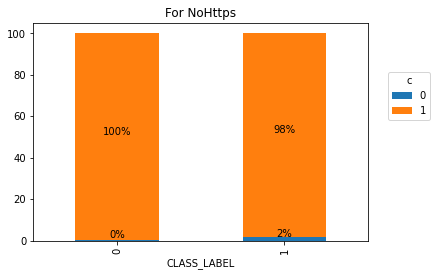

IpAddress             0         1
CLASS_LABEL                      
0            100.000000  0.000000
1             96.464393  3.535607

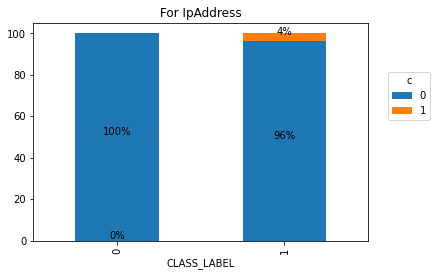

SubdomainLevel         0          1         2         3         4         5   \
CLASS_LABEL                                                                    
0               46.510469  50.947159  2.367896  0.124626  0.049850  0.000000   
1               49.523571  45.561685  3.134403  0.351053  0.551655  0.100301   

SubdomainLevel        6         7        8         9         10        11  \
CLASS_LABEL                                                                 
0               0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1               0.501505  0.125376  0.05015  0.025075  0.025075  0.025075   

SubdomainLevel        14  
CLASS_LABEL               
0               0.000000  
1               0.025075

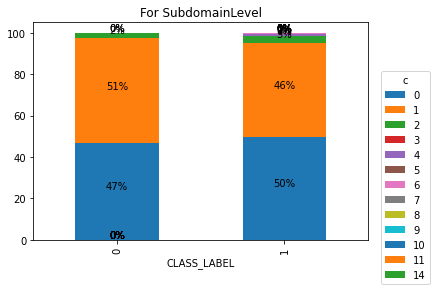

NumQueryComponents         0          1         2         3         4   \
CLASS_LABEL                                                              
0                   72.582253  12.113659  6.106680  4.511466  1.694915   
1                   90.747242   4.488465  2.006018  0.626881  0.501505   

NumQueryComponents        5         6         7         8        9         10  \
CLASS_LABEL                                                                     
0                   1.271186  0.648056  0.722832  0.224327  0.04985  0.024925   
1                   0.325978  0.476429  0.175527  0.025075  0.05015  0.225677   

NumQueryComponents        11        13       16       17       19        23  
CLASS_LABEL                                                                  
0                   0.024925  0.000000  0.00000  0.00000  0.00000  0.024925  
1                   0.100301  0.100301  0.05015  0.05015  0.05015  0.000000

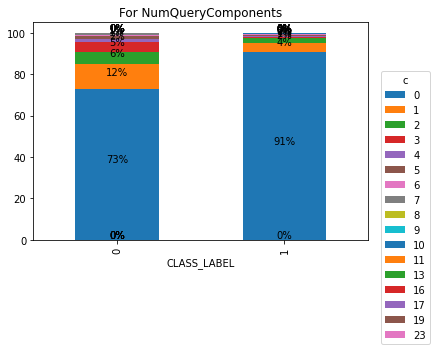

HostnameLength       4        5         6         7         8         9    \
CLASS_LABEL                                                                 
0               0.024925  0.04985  0.274177  0.772682  2.766700  1.620140   
1               0.000000  0.00000  0.325978  0.300903  0.501505  0.827482   

HostnameLength       10        11        12        13   ...       73   \
CLASS_LABEL                                             ...             
0               2.916251  4.162512  5.209372  6.904287  ...  0.000000   
1               2.206620  3.084253  5.792377  6.594784  ...  0.025075   

HostnameLength       75       76        83        84        86       94   \
CLASS_LABEL                                                                
0               0.000000  0.00000  0.000000  0.000000  0.000000  0.00000   
1               0.025075  0.05015  0.025075  0.025075  0.025075  0.05015   

HostnameLength       109       115       137  
CLASS_LABEL                                   
0               0.000000  0.000000  0.000000  
1               0.025075  0.025075  0.025075  

[2 rows x 71 columns]

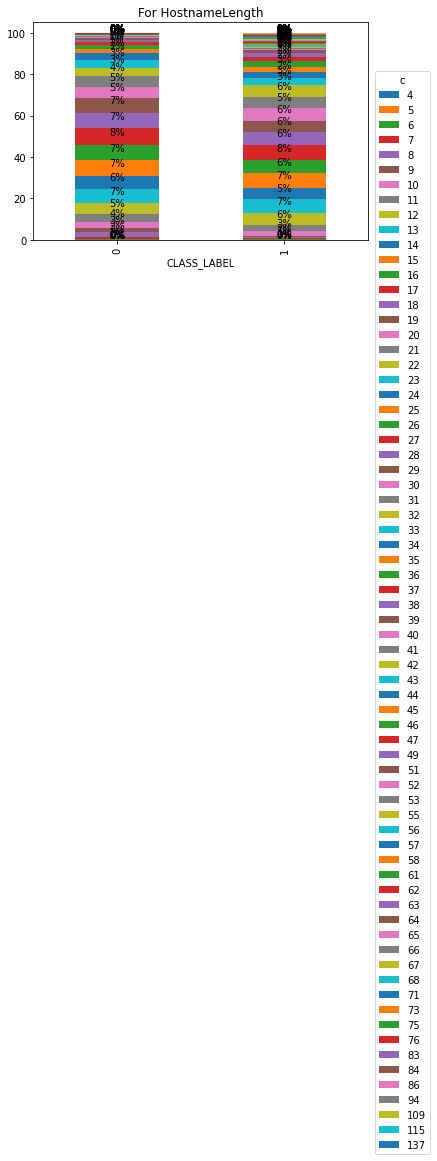

PathLength        0         1         2         3         4         5    \
CLASS_LABEL                                                               
0            0.174477  6.106680  0.024925  0.099701  0.049850  0.299103   
1            0.025075  0.351053  0.000000  0.075226  0.802407  0.877633   

PathLength        6         7         8         9    ...       141       143  \
CLASS_LABEL                                          ...                       
0            0.897308  0.997009  0.897308  1.121635  ...  0.000000  0.024925   
1            1.078235  0.401204  1.153460  1.680040  ...  0.025075  0.000000   

PathLength        145       146       148       152       154       156  \
CLASS_LABEL                                                               
0            0.024925  0.024925  0.024925  0.024925  0.024925  0.024925   
1            0.000000  0.000000  0.050150  0.000000  0.000000  0.000000   

PathLength       159       161  
CLASS_LABEL                     
0            0.04985  0.024925  
1            0.00000  0.000000  

[2 rows x 146 columns]

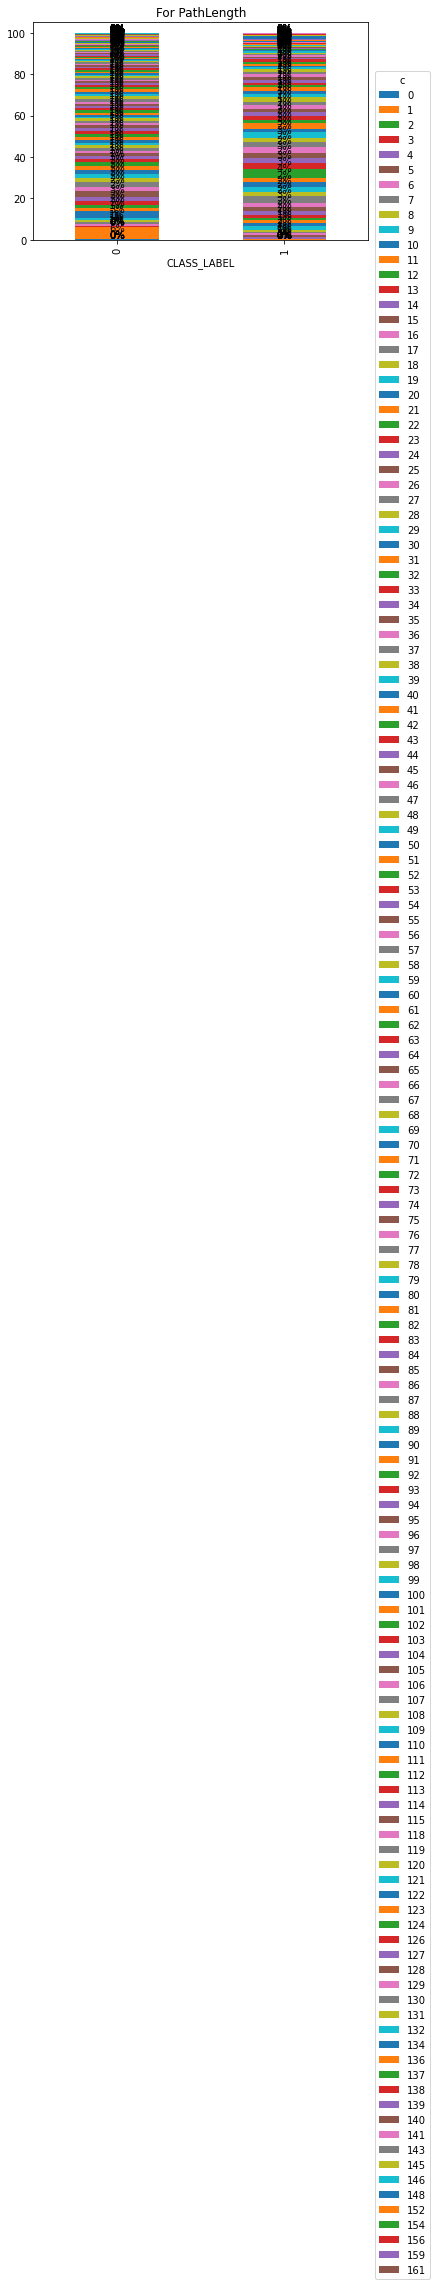

QueryLength        0         1         2         3         4         5    \
CLASS_LABEL                                                                
0            71.535394  0.000000  0.000000  0.074776  0.024925  0.348953   
1            89.267803  0.025075  0.025075  0.200602  0.275827  0.100301   

QueryLength       6         7         8         9    ...       162       163  \
CLASS_LABEL                                          ...                       
0            1.121635  0.972084  1.046859  0.648056  ...  0.024925  0.000000   
1            0.150451  0.401204  0.025075  0.175527  ...  0.000000  0.075226   

QueryLength       165       166       169       174       179       180  \
CLASS_LABEL                                                               
0            0.024925  0.024925  0.024925  0.024925  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.426279  0.025075  0.025075   

QueryLength       183       188  
CLASS_LABEL                      
0            0.000000  0.024925  
1            0.025075  0.000000  

[2 rows x 157 columns]

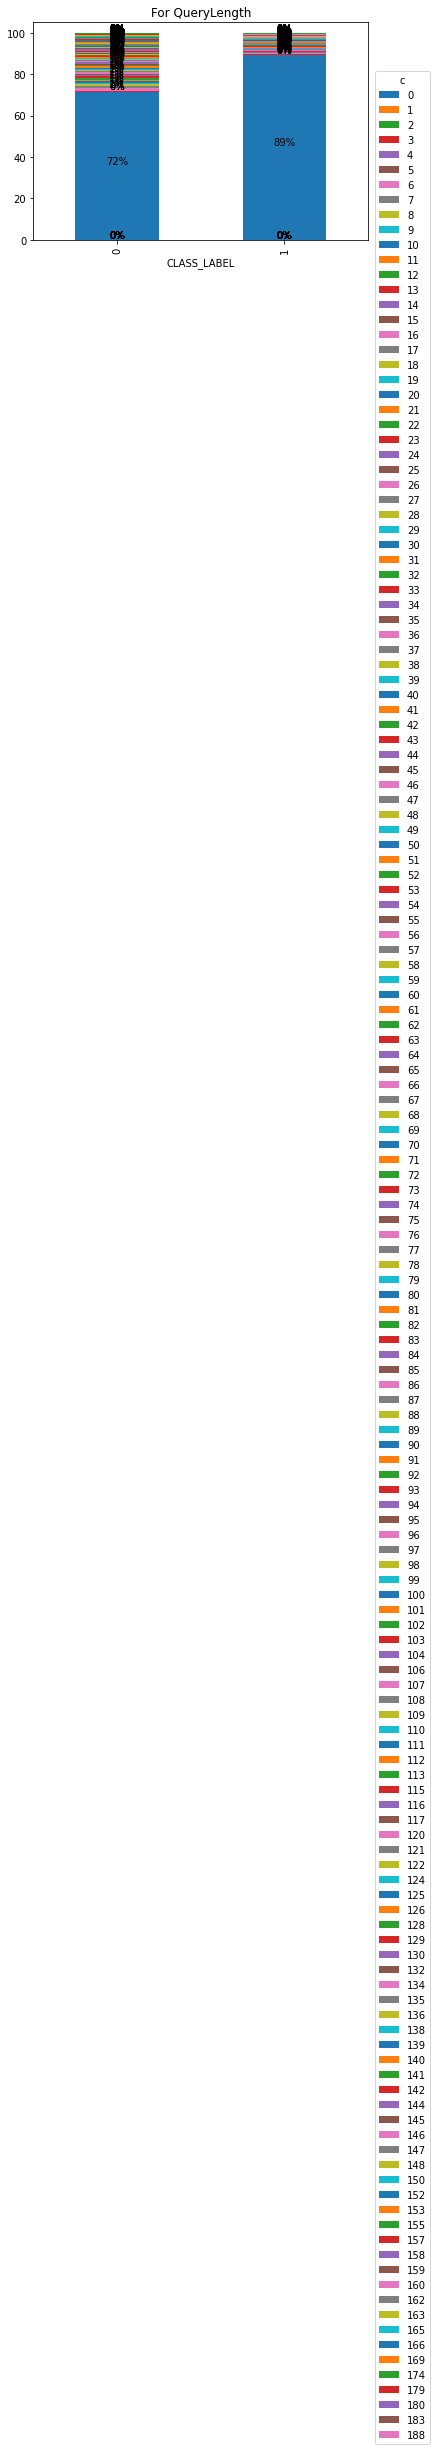

DoubleSlashInPath          0         1
CLASS_LABEL                           
0                  99.975075  0.024925
1                  99.849549  0.150451

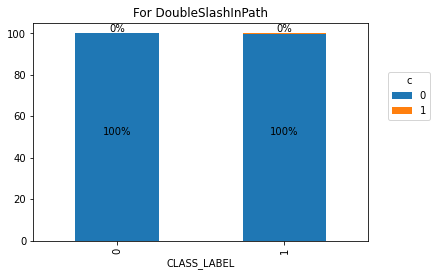

CLASS_LABEL      0      1
CLASS_LABEL              
0            100.0    0.0
1              0.0  100.0

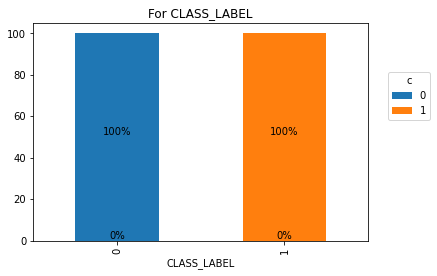

In [40]:
for col in X_tr_y_tr:
    pal = ['royalblue','lightblue']
    crstb_2 = pd.crosstab(X_tr_y_tr['CLASS_LABEL'], X_tr_y_tr[col]).apply(lambda r: r/r.sum()*100, axis=1)
    ax_1=crstb_2.plot.bar(stacked = True)
    display(crstb_2)

    plt.legend(bbox_to_anchor=(1.2,0.8),title='c')
    plt.title('For {}'.format(col))

    for rec in ax_1.patches:
        height=rec.get_height()
        ax_1.text(rec.get_x()+rec.get_width() / 2,
             rec.get_y()+height / 2,
             "{:.0f}%".format(height),
             ha='center',
             va='bottom')
    
    plt.show() 

#### ***Countplot for All Features as well as Target Variable***

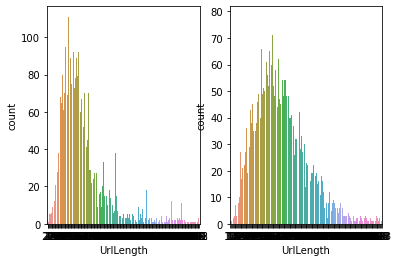

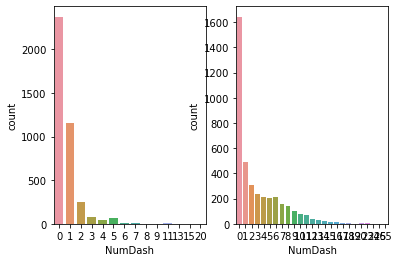

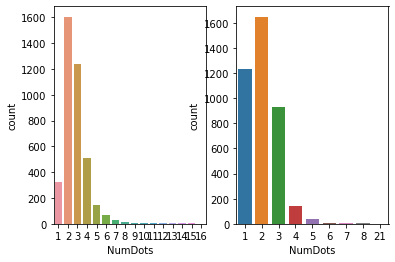

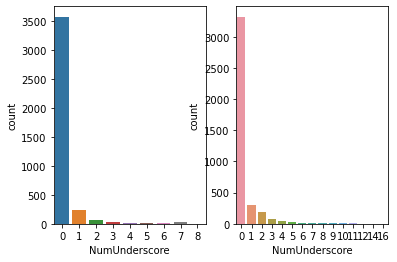

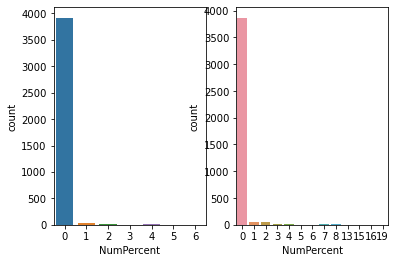

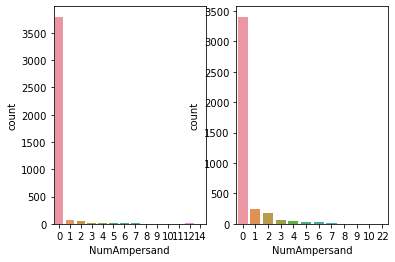

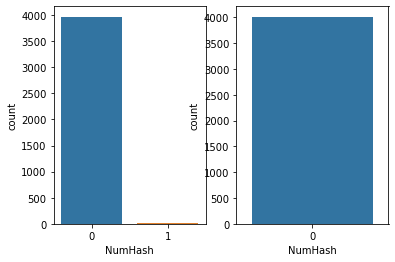

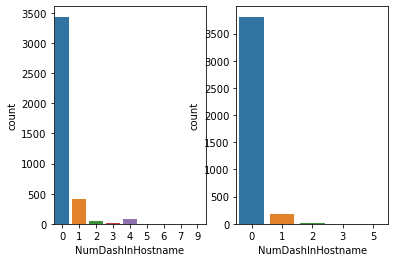

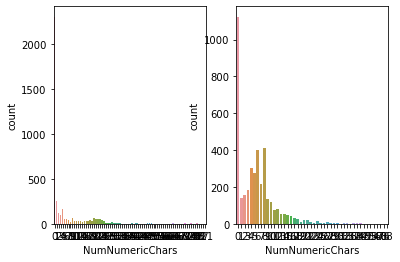

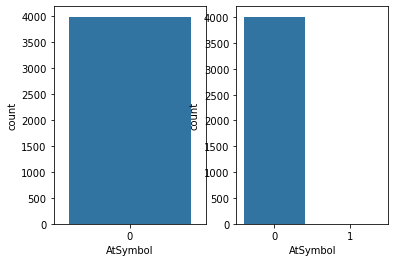

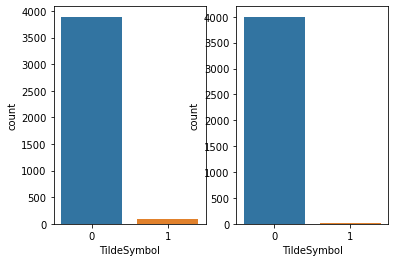

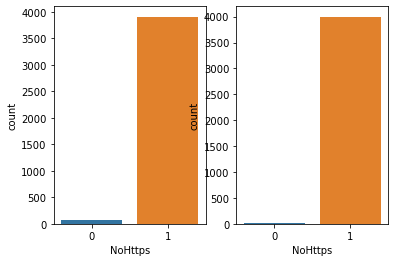

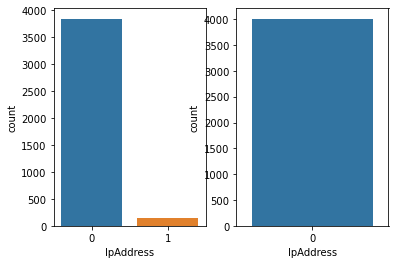

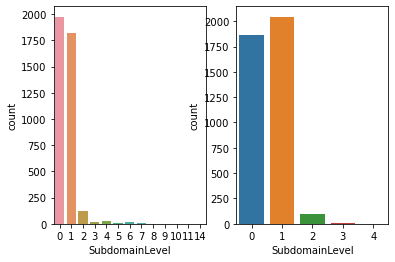

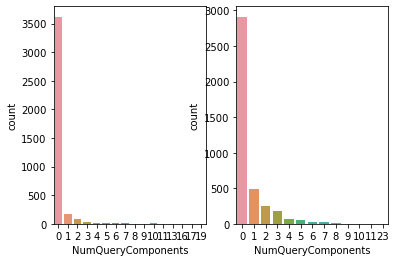

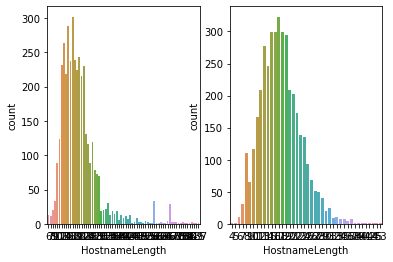

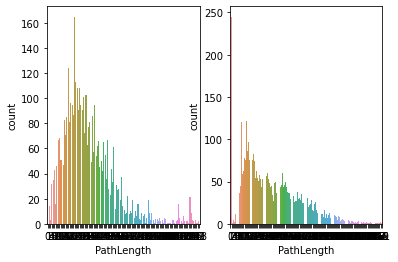

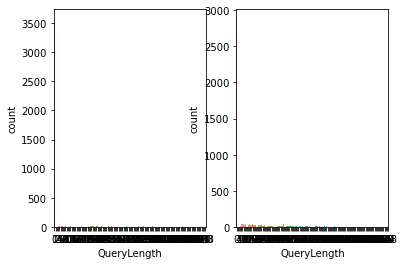

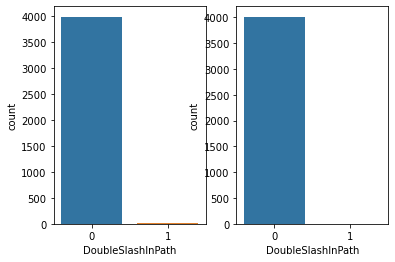

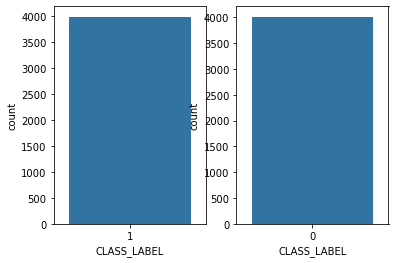

In [41]:
for col in X_tr_y_tr:
    
    fig, ax=plt.subplots(1,2)
    sns.countplot(X_tr_y_tr[X_tr_y_tr['CLASS_LABEL']==1][col],orient="v", ax=ax[0])
    sns.countplot(X_tr_y_tr[X_tr_y_tr['CLASS_LABEL']==0][col],orient="v", ax=ax[1])
    plt.show()

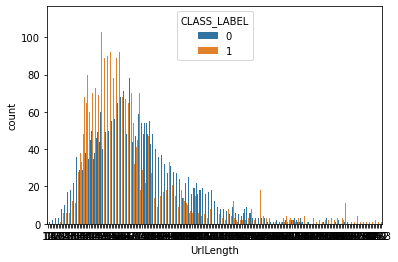

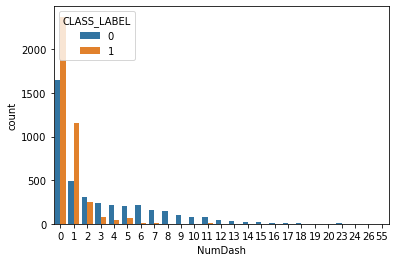

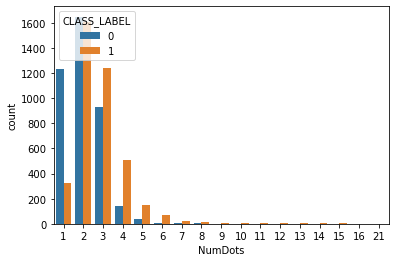

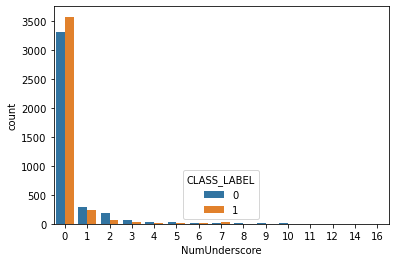

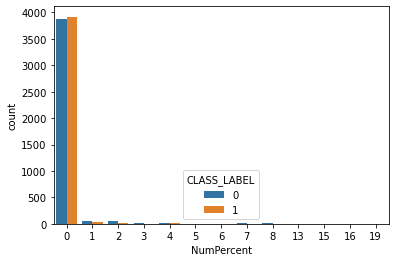

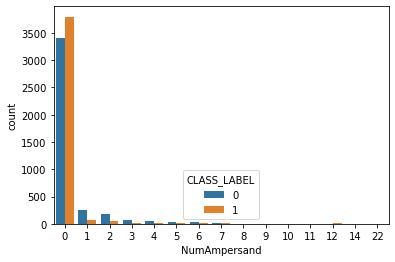

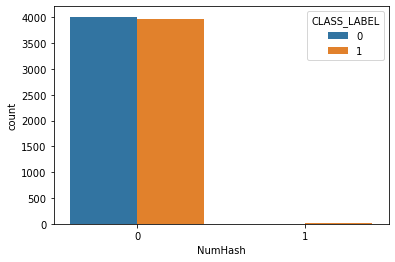

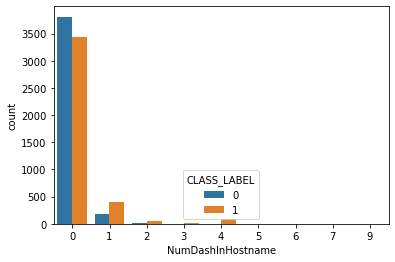

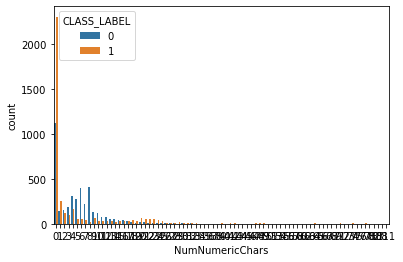

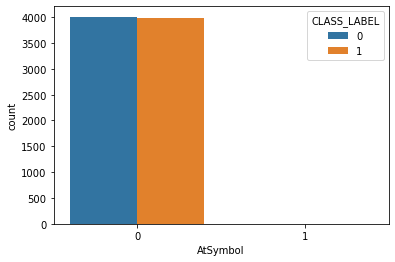

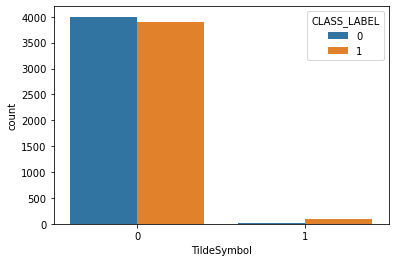

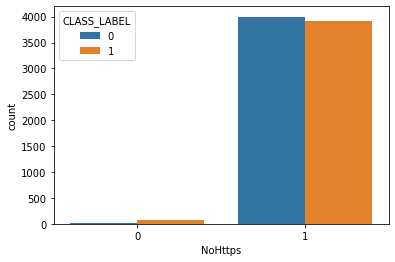

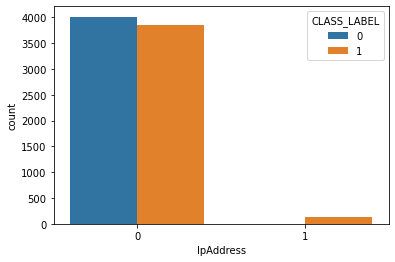

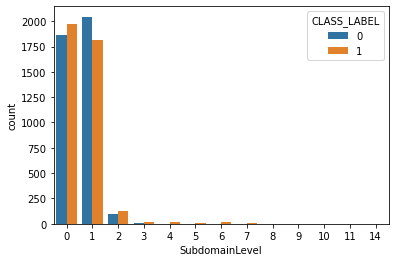

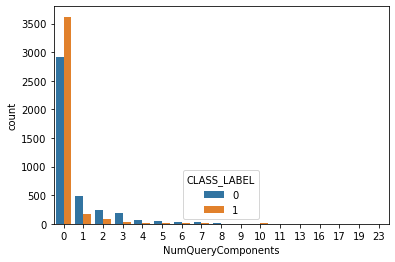

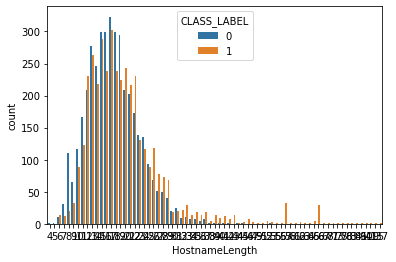

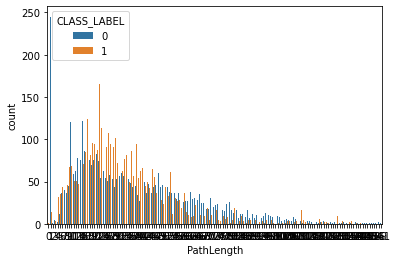

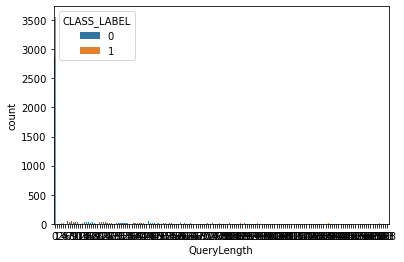

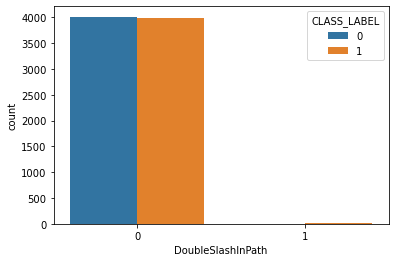

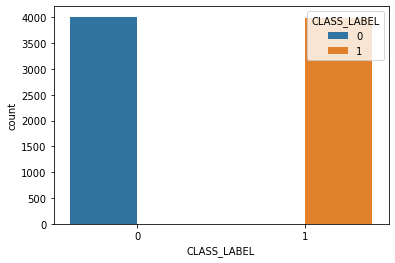

In [42]:
for col in X_tr_y_tr:
    sns.countplot(col,hue='CLASS_LABEL',data=X_tr_y_tr)
    plt.show()

#### ***Boxplot***

In [43]:
X_tr_y_tr['CLASS_LABEL']=X_tr_y_tr['CLASS_LABEL'].astype(int)

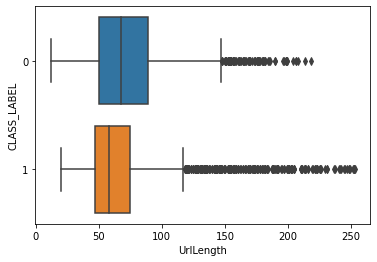

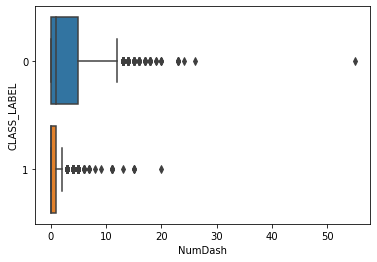

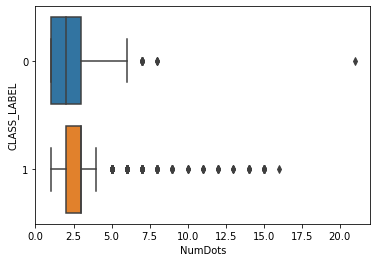

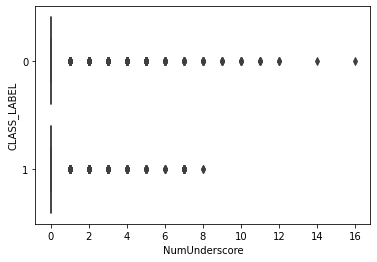

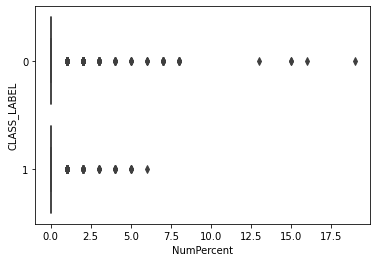

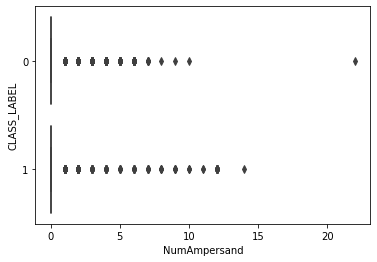

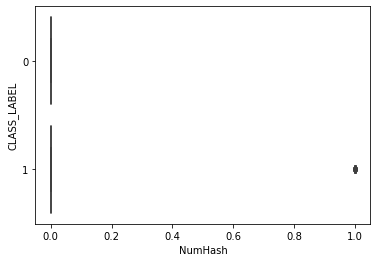

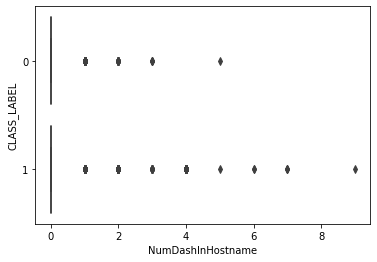

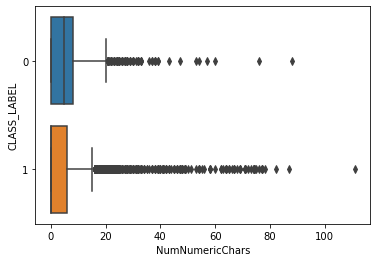

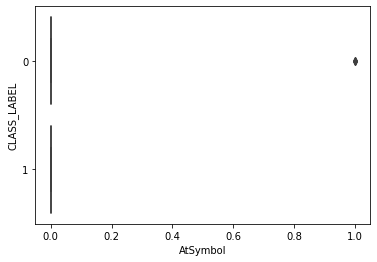

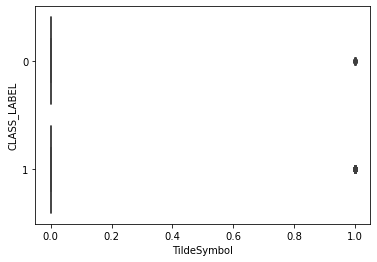

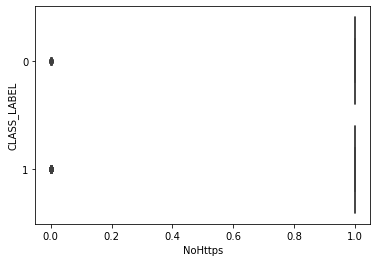

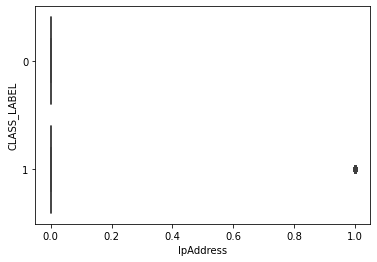

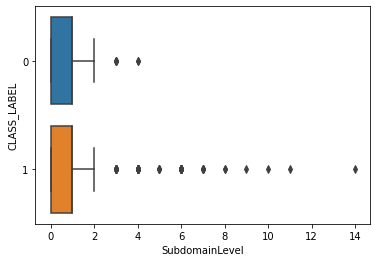

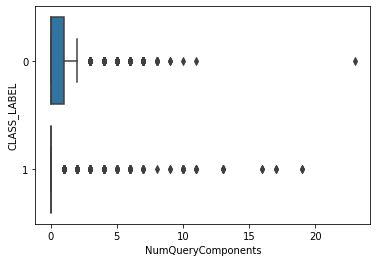

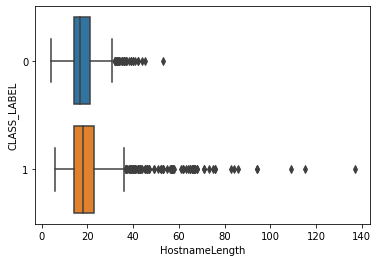

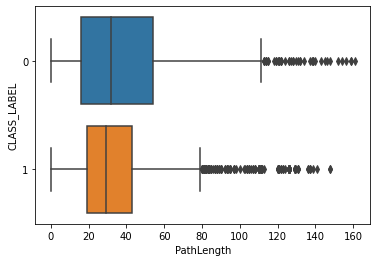

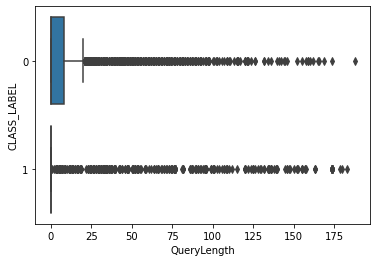

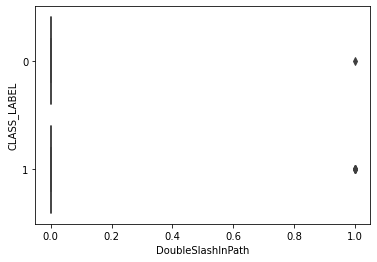

In [44]:
for col in X_train:
    sns.boxplot(X_train[col], X_tr_y_tr['CLASS_LABEL'], orient='h')
    plt.show()

#### ***Pairplot***

C:\Users\Koyel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Koyel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Koyel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Koyel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Koyel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Koyel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

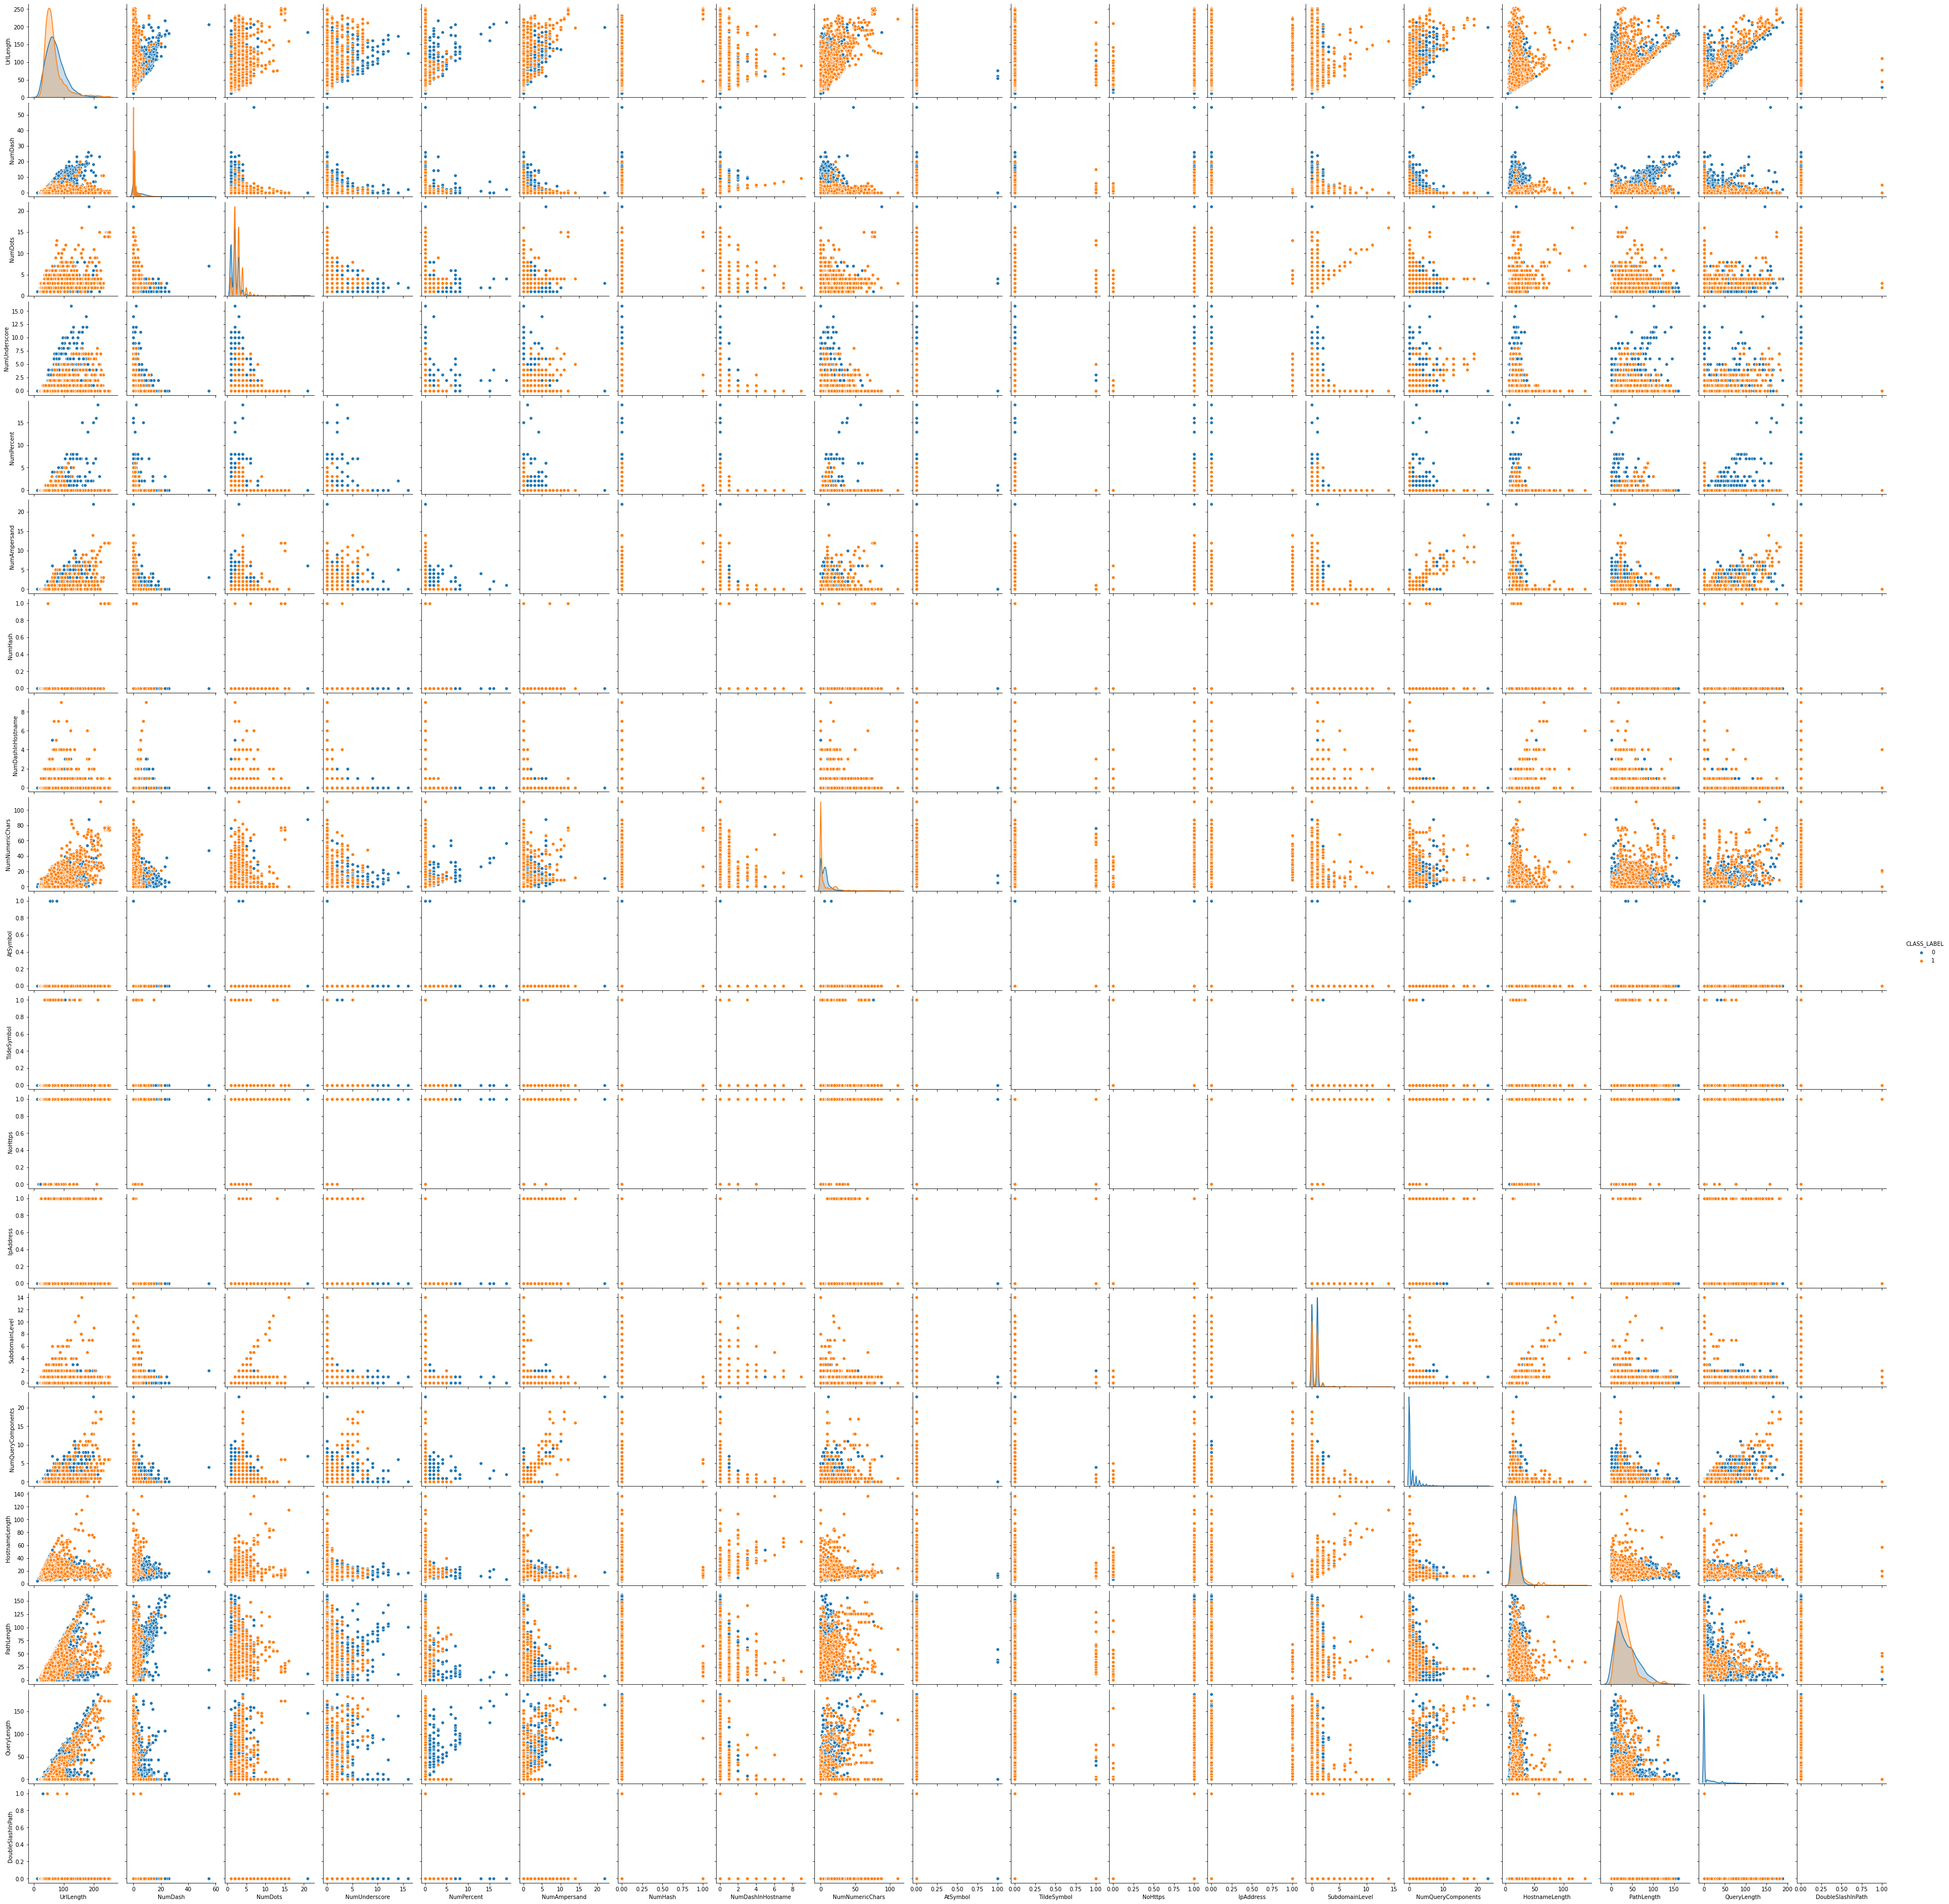

In [45]:
sns.pairplot(hue='CLASS_LABEL',data=X_tr_y_tr)

#### ***Newly Created Features from EDA***

In [46]:
# Newly created features from EDA. We'll add them as new columns in base scaled training data
c1 = np.where(X_train['NumDots']>=4,1,0)
c2 = np.where(X_train['SubdomainLevel']>=3,1,0)
c3 = np.where(X_train['NumDash']<=1,1,0)
c4 = np.where(X_train['NumQueryComponents']==0,1,0)
c5 = np.where(X_train['NumNumericChars']==0,1,0)

In [47]:
# create new dataframe for new features
new_features = pd.concat([pd.DataFrame(c1,columns=["NumDots_GrtrEql_4_EDA"]),pd.DataFrame(c2,columns=["SubdomainLevel_GrtrEql_3_EDA"]),pd.DataFrame(c3,columns=["NumDash_LsEql_1_EDA"]),pd.DataFrame(c4,columns=["NumQueryComponents==0_EDA"]),pd.DataFrame(c5,columns=["NumNumericChars==0_EDA"])], axis=1)

In [48]:
new_features

NumDots_GrtrEql_4_EDA  SubdomainLevel_GrtrEql_3_EDA  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
...                     ...                           ...   
7995                      0                             0   
7996                      0                             0   
7997                      0                             0   
7998                      0                             0   
7999                      0                             0   

      NumDash_LsEql_1_EDA  NumQueryComponents==0_EDA  NumNumericChars==0_EDA  
0                       1                          1                       0  
1                       1                          1                       0  
2                       1                          1                       0  
3                       0                          1                       0  
4                       0                          0                       0  
...                   ...                        ...                     ...  
7995                    1                          0                       0  
7996                    1                          0                       0  
7997                    1                          1                       0  
7998                    1                          1                       1  
7999                    1                          0                       0  

[8000 rows x 5 columns]

## ***From Weight of Imbalanced Method***

In [49]:
import scorecardpy as sc

In [50]:
# we are using here following combined X_train and y_train
X_tr_y_tr

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
9254         41        0        2              0           0             0   
1561         40        0        3              0           1             0   
1670         53        0        3              0           0             0   
6087         89       12        3              0           0             0   
6669        101        6        1              3           0             0   
...         ...      ...      ...            ...         ...           ...   
5734         60        0        2              0           0             1   
5191        116        1        3              2           1             6   
5390         60        1        1              0           0             0   
860          50        0        2              1           0             0   
7270         62        0        3              2           0             0   

      NumHash  NumDashInHostname  NumNumericChars  AtSymbol  TildeSymbol  \
9254        0                  0                4         0            0   
1561        0                  0                3         0            0   
1670        0                  0                6         0            0   
6087        0                  0               14         0            0   
6669        0                  0                6         0            0   
...       ...                ...              ...       ...          ...   
5734        0                  0                6         0            0   
5191        0                  0                5         0            0   
5390        0                  0                6         0            0   
860         0                  0                0         0            0   
7270        0                  0                4         0            0   

      NoHttps  IpAddress  SubdomainLevel  NumQueryComponents  HostnameLength  \
9254        1          0               1                   0              24   
1561        1          0               1                   0              13   
1670        1          0               0                   0              17   
6087        1          0               1                   0              16   
6669        1          0               0                   1              11   
...       ...        ...             ...                 ...             ...   
5734        1          0               0                   2              23   
5191        1          0               1                   7              16   
5390        1          0               0                   0              18   
860         1          0               0                   0              19   
7270        1          0               1                   1              19   

      PathLength  QueryLength  DoubleSlashInPath  CLASS_LABEL  
9254          10            0                  0            0  
1561          20            0                  0            1  
1670          29            0                  0            1  
6087          66            0                  0            0  
6669          49           33                  0            0  
...          ...          ...                ...          ...  
5734          13           16                  0            0  
5191          14           78                  0            0  
5390          35            0                  0            0  
860           24            0                  0            1  
7270          20           15                  0            0  

[8000 rows x 20 columns]

In [51]:
y = 'CLASS_LABEL'

In [52]:
bins = sc.woebin(X_tr_y_tr,y)

[INFO] creating woe binning ...
Binning on 8000 rows and 20 columns in 00:00:14


In [53]:
bins

{'NumDashInHostname':             variable         bin  count  count_distr  good   bad   badprob  \
 0  NumDashInHostname  [-inf,1.0)   7248        0.906  3809  3439  0.474476   
 1  NumDashInHostname   [1.0,inf)    752        0.094   203   549  0.730053   
 
         woe    bin_iv  total_iv breaks  is_special_values  
 0 -0.096186  0.008374  0.095517    1.0              False  
 1  1.000892  0.087142  0.095517    inf              False  ,
 'NoHttps':   variable         bin  count  count_distr  good   bad  badprob  woe  bin_iv  \
 0  NoHttps  [-inf,inf)   8000          1.0  4012  3988   0.4985  0.0     0.0   
 
    total_iv breaks  is_special_values  
 0       0.0    inf              False  ,
 'IpAddress':     variable         bin  count  count_distr  good   bad  badprob  woe  \
 0  IpAddress  [-inf,inf)   8000          1.0  4012  3988   0.4985  0.0   
 
    bin_iv  total_iv breaks  is_special_values  
 0     0.0       0.0    inf              False  ,
 'NumAmpersand':        variable  

{'NumDashInHostname': <Figure size 432x288 with 2 Axes>,
 'NoHttps': <Figure size 432x288 with 2 Axes>,
 'IpAddress': <Figure size 432x288 with 2 Axes>,
 'NumAmpersand': <Figure size 432x288 with 2 Axes>,
 'NumQueryComponents': <Figure size 432x288 with 2 Axes>,
 'PathLength': <Figure size 432x288 with 2 Axes>,
 'UrlLength': <Figure size 432x288 with 2 Axes>,
 'NumHash': <Figure size 432x288 with 2 Axes>,
 'NumUnderscore': <Figure size 432x288 with 2 Axes>,
 'NumDots': <Figure size 432x288 with 2 Axes>,
 'NumNumericChars': <Figure size 432x288 with 2 Axes>,
 'SubdomainLevel': <Figure size 432x288 with 2 Axes>,
 'NumDash': <Figure size 432x288 with 2 Axes>,
 'AtSymbol': <Figure size 432x288 with 2 Axes>,
 'DoubleSlashInPath': <Figure size 432x288 with 2 Axes>,
 'QueryLength': <Figure size 432x288 with 2 Axes>,
 'NumPercent': <Figure size 432x288 with 2 Axes>,
 'HostnameLength': <Figure size 432x288 with 2 Axes>,
 'TildeSymbol': <Figure size 432x288 with 2 Axes>}

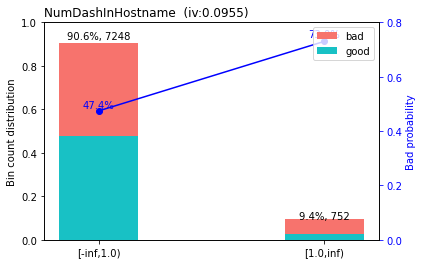

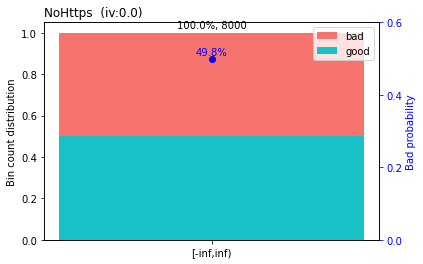

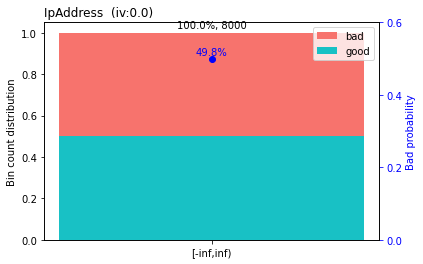

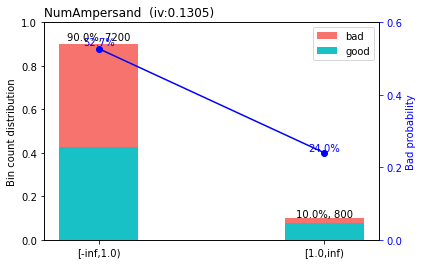

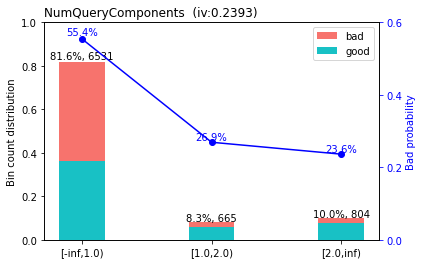

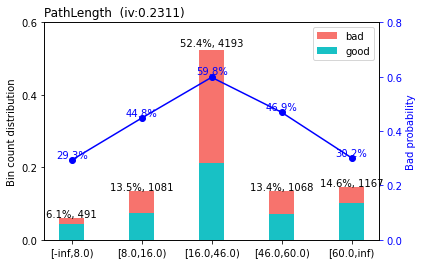

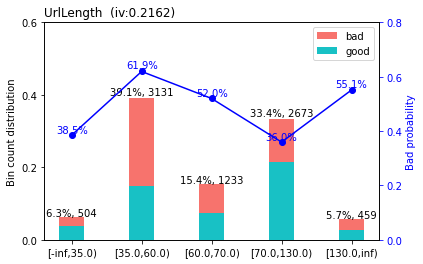

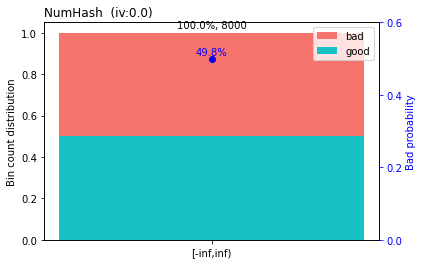

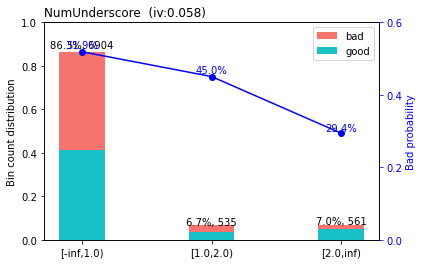

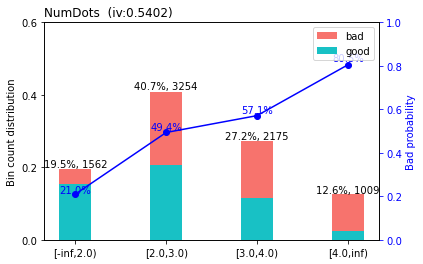

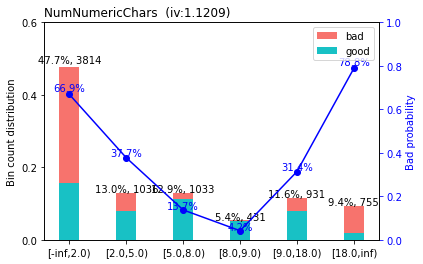

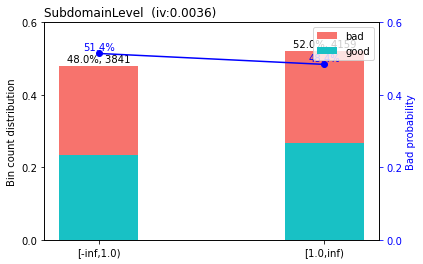

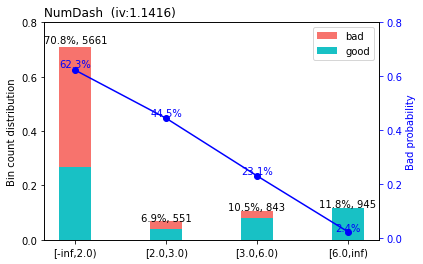

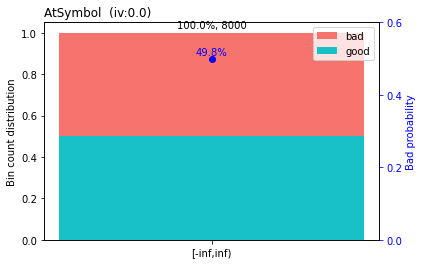

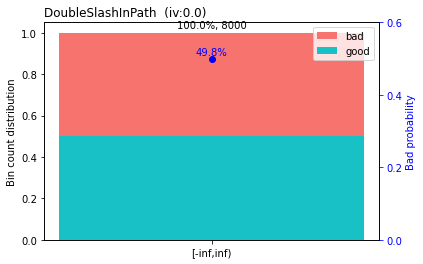

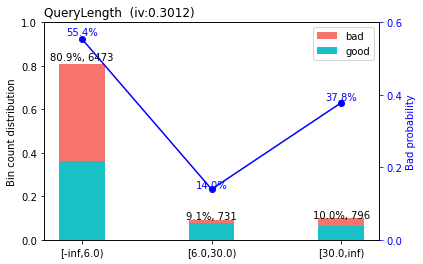

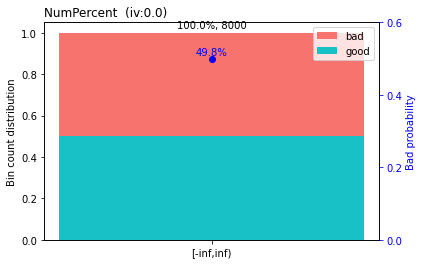

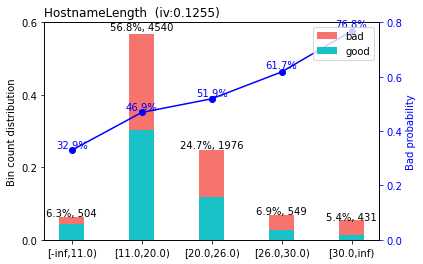

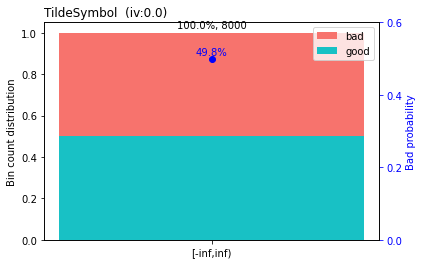

In [54]:
sc.woebin_plot(bins)

In [55]:
X_tr_y_tr.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath', 'CLASS_LABEL'],
      dtype='object')

In [56]:
woe_data = bins['UrlLength'].append(bins['NumDash']).append(bins['NumDots']).append(bins['NumUnderscore']).append(bins['NumPercent']).append(bins['NumAmpersand']).append(bins['NumHash']).append(bins['NumDashInHostname']).append(bins['NumNumericChars']).append(bins['AtSymbol']).append(bins['TildeSymbol']).append(bins['NoHttps']).append(bins['IpAddress']).append(bins['SubdomainLevel']).append(bins['NumQueryComponents']).append(bins['HostnameLength']).append(bins['PathLength']).append(bins['QueryLength']).append(bins['DoubleSlashInPath'])

In [57]:
woe_data

variable           bin  count  count_distr  good   bad   badprob  \
0           UrlLength   [-inf,35.0)    504     0.063000   310   194  0.384921   
1           UrlLength   [35.0,60.0)   3131     0.391375  1192  1939  0.619291   
2           UrlLength   [60.0,70.0)   1233     0.154125   592   641  0.519870   
3           UrlLength  [70.0,130.0)   2673     0.334125  1712   961  0.359521   
4           UrlLength   [130.0,inf)    459     0.057375   206   253  0.551198   
0             NumDash    [-inf,2.0)   5661     0.707625  2136  3525  0.622682   
1             NumDash     [2.0,3.0)    551     0.068875   306   245  0.444646   
2             NumDash     [3.0,6.0)    843     0.105375   648   195  0.231317   
3             NumDash     [6.0,inf)    945     0.118125   922    23  0.024339   
0             NumDots    [-inf,2.0)   1562     0.195250  1234   328  0.209987   
1             NumDots     [2.0,3.0)   3254     0.406750  1648  1606  0.493546   
2             NumDots     [3.0,4.0)   2175     0.271875   933  1242  0.571034   
3             NumDots     [4.0,inf)   1009     0.126125   197   812  0.804757   
0       NumUnderscore    [-inf,1.0)   6904     0.863000  3322  3582  0.518830   
1       NumUnderscore     [1.0,2.0)    535     0.066875   294   241  0.450467   
2       NumUnderscore     [2.0,inf)    561     0.070125   396   165  0.294118   
0          NumPercent    [-inf,inf)   8000     1.000000  4012  3988  0.498500   
0        NumAmpersand    [-inf,1.0)   7200     0.900000  3404  3796  0.527222   
1        NumAmpersand     [1.0,inf)    800     0.100000   608   192  0.240000   
0             NumHash    [-inf,inf)   8000     1.000000  4012  3988  0.498500   
0   NumDashInHostname    [-inf,1.0)   7248     0.906000  3809  3439  0.474476   
1   NumDashInHostname     [1.0,inf)    752     0.094000   203   549  0.730053   
0     NumNumericChars    [-inf,2.0)   3814     0.476750  1264  2550  0.668589   
1     NumNumericChars     [2.0,5.0)   1036     0.129500   645   391  0.377413   
2     NumNumericChars     [5.0,8.0)   1033     0.129125   891   142  0.137464   
3     NumNumericChars     [8.0,9.0)    431     0.053875   413    18  0.041763   
4     NumNumericChars    [9.0,18.0)    931     0.116375   639   292  0.313641   
5     NumNumericChars    [18.0,inf)    755     0.094375   160   595  0.788079   
0            AtSymbol    [-inf,inf)   8000     1.000000  4012  3988  0.498500   
0         TildeSymbol    [-inf,inf)   8000     1.000000  4012  3988  0.498500   
0             NoHttps    [-inf,inf)   8000     1.000000  4012  3988  0.498500   
0           IpAddress    [-inf,inf)   8000     1.000000  4012  3988  0.498500   
0      SubdomainLevel    [-inf,1.0)   3841     0.480125  1866  1975  0.514189   
1      SubdomainLevel     [1.0,inf)   4159     0.519875  2146  2013  0.484011   
0  NumQueryComponents    [-inf,1.0)   6531     0.816375  2912  3619  0.554126   
1  NumQueryComponents     [1.0,2.0)    665     0.083125   486   179  0.269173   
2  NumQueryComponents     [2.0,inf)    804     0.100500   614   190  0.236318   
0      HostnameLength   [-inf,11.0)    504     0.063000   338   166  0.329365   
1      HostnameLength   [11.0,20.0)   4540     0.567500  2413  2127  0.468502   
2      HostnameLength   [20.0,26.0)   1976     0.247000   951  1025  0.518725   
3      HostnameLength   [26.0,30.0)    549     0.068625   210   339  0.617486   
4      HostnameLength    [30.0,inf)    431     0.053875   100   331  0.767981   
0          PathLength    [-inf,8.0)    491     0.061375   347   144  0.293279   
1          PathLength    [8.0,16.0)   1081     0.135125   597   484  0.447734   
2          PathLength   [16.0,46.0)   4193     0.524125  1686  2507  0.597901   
3          PathLength   [46.0,60.0)   1068     0.133500   567   501  0.469101   
4          PathLength    [60.0,inf)   1167     0.145875   815   352  0.301628   
0         QueryLength    [-inf,6.0)   6473     0.809125  2888  3585  0.553839   
1         QueryLength    [6.0,30.0)    731  

Now we will create new features taking weights of each intervals as new feature.

In [58]:
new_features['UrlLength_WOE'] = [-0.462714 if i<35 else 0.492540 if 35<=i<60 else 0.085523 if 60<=i<70 else -0.571443 if 70<=i<130 else 0.211513 for i in X_train['UrlLength']]
new_features['NumDash_WOE'] = [0.506946 if i<2 else -0.216327 if 2<=i<3 else -1.194891 if 3<=i<6 else -3.685051 for i in X_train['NumDash']]
new_features['NumDots_WOE'] = [-1.319003 if i<2 else -0.019816 if 2<=i<3 else 0.292073 if 3<=i<4 else 1.422297 for i in X_train['NumDots']]
new_features['NumUnderscore_WOE'] = [0.081354 if i<1 else -0.192783 if 1<=i<2 else -0.869469 for i in X_train['NumUnderscore']]
new_features['NumPercent_WOE'] = [0.00000 for i in X_train['NumPercent']]
new_features['NumAmpersand_WOE'] = [0.114997 if i<1 else -1.146679 for i in X_train['NumAmpersand']]
new_features['NumHash_WOE'] = [0.000000 for i in X_train['NumHash']]
new_features['NumDashInHostname_WOE'] = [-0.096186 if i<1 else 1.000892 for i in X_train['NumDashInHostname']]
new_features['NumNumericChars_WOE'] = [0.707812 if i<2 else -0.494543 if 2<=i<5 else -1.830517 if 5<=i<8 else -3.127076 if 8<=i<9 else -0.777151 if 9<=i<18 else 1.319388 for i in X_train['NumNumericChars']]
new_features['AtSymbol_WOE'] = [0.000000 for i in X_train['AtSymbol']]
new_features['TildeSymbol_WOE'] = [0.000000 for i in X_train['TildeSymbol']]
new_features['NoHttps_WOE'] = [0.000000 for i in X_train['NoHttps']]
new_features['IpAddress_WOE'] = [0.000000 for i in X_train['IpAddress']]
new_features['SubdomainLevel_WOE'] = [0.062771 if i<1 else -0.057979 for i in X_train['SubdomainLevel']]
new_features['NumQueryComponents_WOE'] = [0.223358 if i<1 else -0.992823 if 1<=i<2 else -1.166971 for i in X_train['NumQueryComponents']]
new_features['HostnameLength_WOE'] = [-0.705058 if i<11 else -0.120158 if 11<=i<20 else 0.080934 if 20<=i<26 else 0.484893 if 26<=i<30 else 1.202948 for i in X_train['HostnameLength']]
new_features['PathLength_WOE'] = [-0.873511 if i<8 else -0.203832 if 8<=i<16 else 0.402728 if 16<=i<46 else -0.117753 if 46<=i<60 else -0.833557 for i in X_train['PathLength']]
new_features['QueryLength_WOE'] = [0.222194 if i<6 else -1.813158 if 6<=i<30 else -0.491447 for i in X_train['QueryLength']]
new_features['DoubleSlashInPath_WOE'] = [0.000000 for i in X_train['DoubleSlashInPath']]

In [59]:
new_features.head()

NumDots_GrtrEql_4_EDA  SubdomainLevel_GrtrEql_3_EDA  NumDash_LsEql_1_EDA  \
0                      0                             0                    1   
1                      0                             0                    1   
2                      0                             0                    1   
3                      0                             0                    0   
4                      0                             0                    0   

   NumQueryComponents==0_EDA  NumNumericChars==0_EDA  UrlLength_WOE  \
0                          1                       0       0.492540   
1                          1                       0       0.492540   
2                          1                       0       0.492540   
3                          1                       0      -0.571443   
4                          0                       0      -0.571443   

   NumDash_WOE  NumDots_WOE  NumUnderscore_WOE  NumPercent_WOE  ...  \
0     0.506946    -0.019816           0.081354             0.0  ...   
1     0.506946     0.292073           0.081354             0.0  ...   
2     0.506946     0.292073           0.081354             0.0  ...   
3    -3.685051     0.292073           0.081354             0.0  ...   
4    -3.685051    -1.319003          -0.869469             0.0  ...   

   AtSymbol_WOE  TildeSymbol_WOE  NoHttps_WOE  IpAddress_WOE  \
0           0.0              0.0          0.0            0.0   
1           0.0              0.0          0.0            0.0   
2           0.0              0.0          0.0            0.0   
3           0.0              0.0          0.0            0.0   
4           0.0              0.0          0.0            0.0   

   SubdomainLevel_WOE  NumQueryComponents_WOE  HostnameLength_WOE  \
0           -0.057979                0.223358            0.080934   
1           -0.057979                0.223358           -0.120158   
2            0.062771                0.223358           -0.120158   
3           -0.057979                0.223358           -0.120158   
4            0.062771               -0.992823           -0.120158   

   PathLength_WOE  QueryLength_WOE  DoubleSlashInPath_WOE  
0       -0.203832         0.222194                    0.0  
1        0.402728         0.222194                    0.0  
2        0.402728         0.222194                    0.0  
3       -0.833557         0.222194                    0.0  
4       -0.117753        -0.491447                    0.0  

[5 rows x 24 columns]

## ***Score from Isolation Forest***

In [60]:
from sklearn.ensemble import IsolationForest

# we will use all 19 base features
x = X_train.values

clf = IsolationForest(contamination= 0.5, random_state=0)
predictions = clf.fit_predict(x)
print(predictions)
dec_fun = clf.decision_function(x)
dec_fun

[ 1 -1  1 ...  1  1 -1]


array([ 0.01084061, -0.0153454 ,  0.02005838, ...,  0.01214691,
        0.01542345, -0.01463725])

In [61]:
# dec_fun is numpy array, coverting it to dataframe to add with X_train_new
df = pd.DataFrame(dec_fun, columns = ["ISF_Score"])

In [62]:
df

ISF_Score
0      0.010841
1     -0.015345
2      0.020058
3     -0.061994
4     -0.085792
...         ...
7995  -0.038894
7996  -0.217670
7997   0.012147
7998   0.015423
7999  -0.014637

[8000 rows x 1 columns]

In [63]:
new_features=pd.concat([new_features,df],axis=1)

In [64]:
# All Newly Created Features
new_features

NumDots_GrtrEql_4_EDA  SubdomainLevel_GrtrEql_3_EDA  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
...                     ...                           ...   
7995                      0                             0   
7996                      0                             0   
7997                      0                             0   
7998                      0                             0   
7999                      0                             0   

      NumDash_LsEql_1_EDA  NumQueryComponents==0_EDA  NumNumericChars==0_EDA  \
0                       1                          1                       0   
1                       1                          1                       0   
2                       1                          1                       0   
3                       0                          1                       0   
4                       0                          0                       0   
...                   ...                        ...                     ...   
7995                    1                          0                       0   
7996                    1                          0                       0   
7997                    1                          1                       0   
7998                    1                          1                       1   
7999                    1                          0                       0   

      UrlLength_WOE  NumDash_WOE  NumDots_WOE  NumUnderscore_WOE  \
0          0.492540     0.506946    -0.019816           0.081354   
1          0.492540     0.506946     0.292073           0.081354   
2          0.492540     0.506946     0.292073           0.081354   
3         -0.571443    -3.685051     0.292073           0.081354   
4         -0.571443    -3.685051    -1.319003          -0.869469   
...             ...          ...          ...                ...   
7995       0.085523     0.506946    -0.019816           0.081354   
7996      -0.571443     0.506946     0.292073          -0.869469   
7997       0.085523     0.506946    -1.319003           0.081354   
7998       0.492540     0.506946    -0.019816          -0.192783   
7999       0.085523     0.506946     0.292073          -0.869469   

      NumPercent_WOE  ...  TildeSymbol_WOE  NoHttps_WOE  IpAddress_WOE  \
0                0.0  ...              0.0          0.0            0.0   
1                0.0  ...              0.0          0.0            0.0   
2                0.0  ...              0.0          0.0            0.0   
3                0.0  ...              0.0          0.0            0.0   
4                0.0  ...              0.0          0.0            0.0   
...              ...  ...              ...          ...            ...   
7995             0.0  ...              0.0          0.0            0.0   
7996             0.0  ...              0.0          0.0            0.0   
7997             0.0  ...              0.0          0.0            0.0   
7998             0.0  ...              0.0          0.0            0.0   
7999             0.0  ...              0.0          0.0            0.0   

      SubdomainLevel_WOE  NumQueryComponents_WOE  HostnameLength_WOE  \
0              -0.057979                0.223358            0.080934   
1              -0.057979                0.223358           -0.120158   
2               0.062771                0.223358           -0.120158   
3              -0.057979                0.223358           -0.120158   
4               0.062771               -0.992823           -0.120158   
...                  ...                     ...                 ...   
7995            0.062771               -1.166971            0.080934   
7996           -0.057979      

**Here, till now all new features are created based on base 19 features only.** Lets add this **new_features** dataframe with **X_train** dataframe.

In [65]:
## to avoid creating NaN values after concatenating
X_train.reset_index(drop=True,inplace=True)
new_features.reset_index(drop=True,inplace=True)

In [66]:
X_train_new =pd.concat([X_train, new_features], axis=1)

In [67]:
X_train_new

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0            41        0        2              0           0             0   
1            40        0        3              0           1             0   
2            53        0        3              0           0             0   
3            89       12        3              0           0             0   
4           101        6        1              3           0             0   
...         ...      ...      ...            ...         ...           ...   
7995         60        0        2              0           0             1   
7996        116        1        3              2           1             6   
7997         60        1        1              0           0             0   
7998         50        0        2              1           0             0   
7999         62        0        3              2           0             0   

      NumHash  NumDashInHostname  NumNumericChars  AtSymbol  ...  \
0           0                  0                4         0  ...   
1           0                  0                3         0  ...   
2           0                  0                6         0  ...   
3           0                  0               14         0  ...   
4           0                  0                6         0  ...   
...       ...                ...              ...       ...  ...   
7995        0                  0                6         0  ...   
7996        0                  0                5         0  ...   
7997        0                  0                6         0  ...   
7998        0                  0                0         0  ...   
7999        0                  0                4         0  ...   

      TildeSymbol_WOE  NoHttps_WOE  IpAddress_WOE  SubdomainLevel_WOE  \
0                 0.0          0.0            0.0           -0.057979   
1                 0.0          0.0            0.0           -0.057979   
2                 0.0          0.0            0.0            0.062771   
3                 0.0          0.0            0.0           -0.057979   
4                 0.0          0.0            0.0            0.062771   
...               ...          ...            ...                 ...   
7995              0.0          0.0            0.0            0.062771   
7996              0.0          0.0            0.0           -0.057979   
7997              0.0          0.0            0.0            0.062771   
7998              0.0          0.0            0.0            0.062771   
7999              0.0          0.0            0.0           -0.057979   

      NumQueryComponents_WOE  HostnameLength_WOE  PathLength_WOE  \
0                   0.223358            0.080934       -0.203832   
1                   0.223358           -0.120158        0.402728   
2                   0.223358           -0.120158        0.402728   
3                   0.223358           -0.120158       -0.833557   
4                  -0.992823           -0.120158       -0.117753   
...                      ...                 ...             ...   
7995               -1.166971            0.080934       -0.203832   
7996               -1.166971           -0.120158       -0.203832   
7997                0.223358           -0.120158        0.402728   
7998                0.223358           -0.120158        0.402728   
7999               -0.992823           -0.120158        0.402728   

      QueryLength_WOE  DoubleSlashInPath_WOE  ISF_Score  
0            0.222194                    0.0   0.010841  
1            0.222194                    0.0  -0.015345  
2            0.222194                    0.0   0.020058  
3            0.222194                    0.0  -0.061994  
4           -0.491447                    0.0  -0.085792  
...               ...                    ...        ...  
7995        -1.813158                    0.0  -0.038894  
7996        -0.491447                    0.0  -0.217670  
7997         0.222194               

# Feature Selection

## ***Variance Threshold***

In [68]:
# import necessary library
from sklearn.feature_selection import VarianceThreshold

# we're setting variance threshold at 0
var_thres=VarianceThreshold(threshold=0)

# fitting this variance threshold in all columns of Newly Created  training data
var_thres.fit(X_train_new)

VarianceThreshold(threshold=0)

In [69]:
# get the number of constant columns (whoose variance is 0)

constant_columns = [column for column in X_train_new.columns if column not in X_train_new.columns[var_thres.get_support()]]
print(len(constant_columns))

7


In [70]:
# get boolean value 'False' for columns having constant nature
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True])

In [71]:
# get the column names which remain in the Newly Created  training data
X_train_new.columns[var_thres.get_support()]

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath', 'NumDots_GrtrEql_4_EDA',
       'SubdomainLevel_GrtrEql_3_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'NumQueryComponents_WOE', 'HostnameLength_WOE', 'PathLength_WOE',
       'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [72]:
# columns with constant nature
for feature in constant_columns:
    print(feature)

NumPercent_WOE
NumHash_WOE
AtSymbol_WOE
TildeSymbol_WOE
NoHttps_WOE
IpAddress_WOE
DoubleSlashInPath_WOE


In [73]:
# dropping constant columns
X_train_new.drop(constant_columns, axis=1, inplace=True)

In [74]:
# all the columns in the training data
X_train_new.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath', 'NumDots_GrtrEql_4_EDA',
       'SubdomainLevel_GrtrEql_3_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'NumQueryComponents_WOE', 'HostnameLength_WOE', 'PathLength_WOE',
       'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [75]:
len(X_train_new.columns)

37

**37 features are going for next Feature Selection Method.**

## ***Correlation Method***

In [76]:
X_train_new.corr()

UrlLength   NumDash   NumDots  NumUnderscore  \
UrlLength                      1.000000  0.449442  0.273247       0.346157   
NumDash                        0.449442  1.000000 -0.195466      -0.047738   
NumDots                        0.273247 -0.195466  1.000000       0.031073   
NumUnderscore                  0.346157 -0.047738  0.031073       1.000000   
NumPercent                     0.178126 -0.013729  0.015755       0.062577   
NumAmpersand                   0.463062 -0.053355  0.266011       0.277392   
NumHash                        0.234918 -0.023363  0.386153      -0.006567   
NumDashInHostname              0.114159  0.116544  0.082908      -0.037293   
NumNumericChars                0.641817  0.129872  0.216912       0.128589   
AtSymbol                      -0.003719 -0.011244  0.012827      -0.005609   
TildeSymbol                    0.060247 -0.025108  0.115451      -0.019663   
NoHttps                        0.039182  0.035594  0.022940       0.026782   
IpAddress                      0.102732 -0.056866  0.162801       0.116437   
SubdomainLevel                 0.090784 -0.049421  0.492340      -0.033016   
NumQueryComponents             0.468974 -0.061362  0.166013       0.342497   
HostnameLength                 0.158011  0.014085  0.272121      -0.059339   
PathLength                     0.651855  0.607292  0.001797       0.119974   
QueryLength                    0.640284 -0.006955  0.262963       0.371685   
DoubleSlashInPath              0.004457  0.003034  0.005991      -0.008570   
NumDots_GrtrEql_4_EDA          0.218256 -0.116853  0.692287       0.069429   
SubdomainLevel_GrtrEql_3_EDA   0.069551 -0.016243  0.302901      -0.020651   
NumDash_LsEql_1_EDA           -0.391726 -0.759135  0.178465       0.007519   
NumQueryComponents==0_EDA     -0.383054  0.052115 -0.105056      -0.268572   
NumNumericChars==0_EDA        -0.411849 -0.252429 -0.021954      -0.145526   
UrlLength_WOE                 -0.374239 -0.342523  0.027569      -0.111484   
NumDash_WOE                   -0.402271 -0.913392  0.220963       0.047711   
NumDots_WOE                    0.147265 -0.273237  0.811824       0.059378   
NumUnderscore_WOE             -0.352147  0.036124 -0.044907      -0.847461   
NumAmpersand_WOE              -0.379685  0.049274 -0.105727      -0.299871   
NumDashInHostname_WOE          0.066405  0.072830  0.045754      -0.034951   
NumNumericChars_WOE           -0.087521 -0.281742  0.109346      -0.049261   
SubdomainLevel_WOE            -0.015268  0.077724 -0.375000       0.031053   
NumQueryComponents_WOE        -0.394118  0.054199 -0.109129      -0.279267   
HostnameLength_WOE             0.121293 -0.011923  0.230281      -0.053523   
PathLength_WOE                -0.301668 -0.400378  0.105408      -0.083124   
QueryLength_WOE               -0.174992  0.051298 -0.051834      -0.128481   
ISF_Score                     -0.758850 -0.242623 -0.326808      -0.404169   

                              NumPercent  NumAmpersand   NumHash  \
UrlLength                       0.178126      0.463062  0.234918   
NumDash                        -0.013729     -0.053355 -0.023363   
NumDots                         0.015755      0.266011  0.386153   
NumUnderscore                   0.062577      0.277392 -0.006567   
NumPercent                      1.000000      0.076011 -0.001328   
NumAmpersand                    0.076011      1.000000  0.465742   
NumHash                        -0.001328      0.465742  1.000000   
NumDashInHostname              -0.021048     -0.033783 -0.007336   
NumNumericChars                 0.131795      0.352513  0.310016   
AtSymbol                        0.008024     -0.004690 -0.000920   
TildeSymbol                    -0.013491     -0.025078 -0.005503   
NoHttps                         0.012488      0.016330  0.005094   
IpAddress                      -0.015594      0.227493 -0.006361   
SubdomainLevel                 -0.011451     -0.044339 -0.020116   
NumQueryComponents              0.117780     

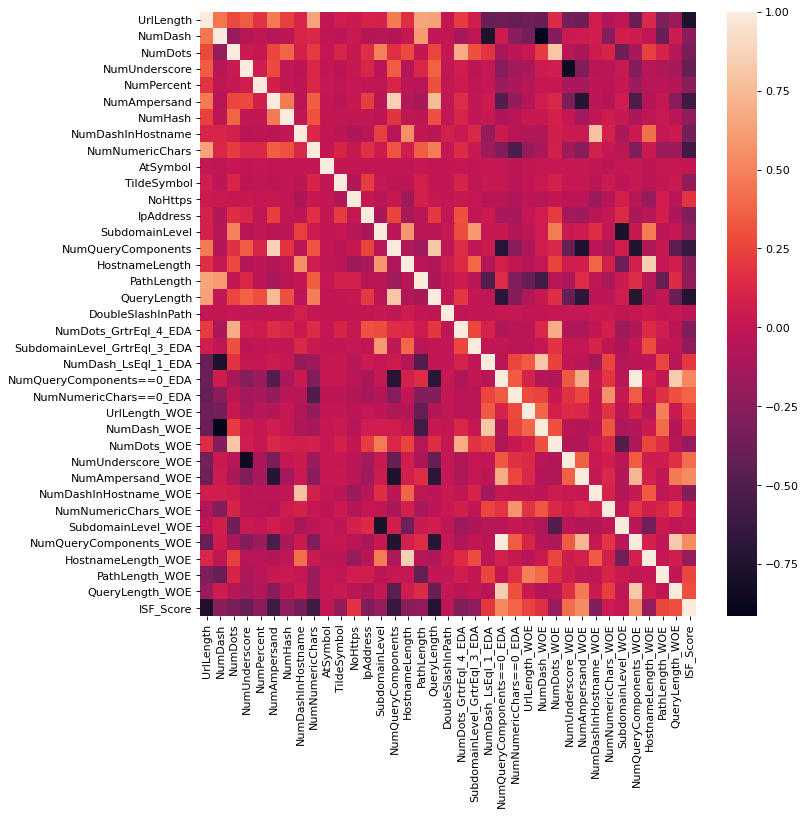

In [77]:
# adjust the figure size
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)

#better visual for correlation
sns.heatmap(X_train_new.corr())

Clearly, we can see that some boxes have completely white and back colours that means correlation is Perfect Positive (in case of white coloured boxes) or Perfect Negative (in case of black coloured boxes). We can remove them.

In [78]:
# function to get all features highly correlated (both positive and negative) with another for a given threshold

def correlation(dataset, threshold):
    col_corr = set()  #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr                        

In [79]:
corr_features = correlation(X_train_new, 0.95)
len(set(corr_features))

1

There are 1 feature which are highly correlated (can be explained by another feature) by amount of more than 95%. We will remove it to avoid complexity in model.

In [80]:
# corresponding correlated features
corr_features

{'NumQueryComponents_WOE'}

In [81]:
# dropping highly correlated features
X_train_new.drop(corr_features, axis=1, inplace=True)

In [82]:
# remaining columns
X_train_new.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath', 'NumDots_GrtrEql_4_EDA',
       'SubdomainLevel_GrtrEql_3_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'HostnameLength_WOE', 'PathLength_WOE', 'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [83]:
len(X_train_new.columns)

36

**36 features are going for next criteria of feature selection.**

## ***Mutual Information***
It internally uses KNN classifier. So I am using scaled version of X_train_new dataset.

In [84]:
## Importing Libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

## Copy data in another dataframe to retrieve latter
d=X_train_new.copy()


## Apply scaling
scaling = MinMaxScaler()
d_scaled=scaling.fit_transform(d)
d_scaled=pd.DataFrame(d_scaled)

## Calculate mutual information
mutual_info = mutual_info_classif(d_scaled, y_train, random_state=0)
mutual_info


array([0.03774084, 0.11618346, 0.06739673, 0.01121938, 0.0026041 ,
       0.03103797, 0.00500508, 0.01590873, 0.12479375, 0.00409637,
       0.        , 0.00112564, 0.00026442, 0.        , 0.03698343,
       0.02599606, 0.0577901 , 0.04784694, 0.        , 0.0318292 ,
       0.01056974, 0.08452825, 0.02901025, 0.04641532, 0.02546603,
       0.12050146, 0.06111437, 0.0016909 , 0.02219928, 0.0076975 ,
       0.13073055, 0.00069231, 0.01681492, 0.02786951, 0.04176116,
       0.09497976])

In [85]:
## Storing original data into X_train_new
X_train_new = d.copy()

In [86]:
X_train_new.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath', 'NumDots_GrtrEql_4_EDA',
       'SubdomainLevel_GrtrEql_3_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'HostnameLength_WOE', 'PathLength_WOE', 'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_new.columns
mutual_info.sort_values(ascending = False)

NumNumericChars_WOE             0.130731
NumNumericChars                 0.124794
NumDash_WOE                     0.120501
NumDash                         0.116183
ISF_Score                       0.094980
NumDash_LsEql_1_EDA             0.084528
NumDots                         0.067397
NumDots_WOE                     0.061114
PathLength                      0.057790
QueryLength                     0.047847
NumNumericChars==0_EDA          0.046415
QueryLength_WOE                 0.041761
UrlLength                       0.037741
NumQueryComponents              0.036983
NumDots_GrtrEql_4_EDA           0.031829
NumAmpersand                    0.031038
NumQueryComponents==0_EDA       0.029010
PathLength_WOE                  0.027870
HostnameLength                  0.025996
UrlLength_WOE                   0.025466
NumAmpersand_WOE                0.022199
HostnameLength_WOE              0.016815
NumDashInHostname               0.015909
NumUnderscore                   0.011219
SubdomainLevel_G

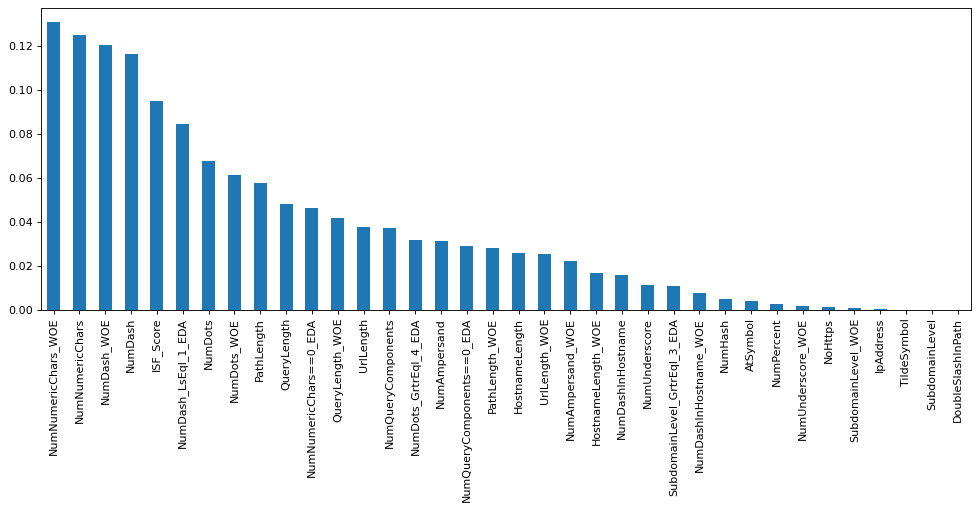

In [88]:
# adjust the figure size
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
mutual_info.sort_values(ascending = False).plot.bar(figsize=(15,5))

In [89]:
X_train_new.drop(["TildeSymbol","SubdomainLevel","DoubleSlashInPath"], axis=1, inplace=True)

In [90]:
X_train_new.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'NoHttps', 'IpAddress', 'NumQueryComponents',
       'HostnameLength', 'PathLength', 'QueryLength', 'NumDots_GrtrEql_4_EDA',
       'SubdomainLevel_GrtrEql_3_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'HostnameLength_WOE', 'PathLength_WOE', 'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [91]:
X_train_new.head()

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0         41        0        2              0           0             0   
1         40        0        3              0           1             0   
2         53        0        3              0           0             0   
3         89       12        3              0           0             0   
4        101        6        1              3           0             0   

   NumHash  NumDashInHostname  NumNumericChars  AtSymbol  ...  NumDots_WOE  \
0        0                  0                4         0  ...    -0.019816   
1        0                  0                3         0  ...     0.292073   
2        0                  0                6         0  ...     0.292073   
3        0                  0               14         0  ...     0.292073   
4        0                  0                6         0  ...    -1.319003   

   NumUnderscore_WOE  NumAmpersand_WOE  NumDashInHostname_WOE  \
0           0.081354          0.114997              -0.096186   
1           0.081354          0.114997              -0.096186   
2           0.081354          0.114997              -0.096186   
3           0.081354          0.114997              -0.096186   
4          -0.869469          0.114997              -0.096186   

   NumNumericChars_WOE  SubdomainLevel_WOE  HostnameLength_WOE  \
0            -0.494543           -0.057979            0.080934   
1            -0.494543           -0.057979           -0.120158   
2            -1.830517            0.062771           -0.120158   
3            -0.777151           -0.057979           -0.120158   
4            -1.830517            0.062771           -0.120158   

   PathLength_WOE  QueryLength_WOE  ISF_Score  
0       -0.203832         0.222194   0.010841  
1        0.402728         0.222194  -0.015345  
2        0.402728         0.222194   0.020058  
3       -0.833557         0.222194  -0.061994  
4       -0.117753        -0.491447  -0.085792  

[5 rows x 33 columns]

In [92]:
len(X_train_new.columns)

33

Dropping "TildeSymbol","SubdomainLevel","DoubleSlashInPath" for having very low mutual information.

## ***ExtraTreesClassifier***
It internally uses Decision Tree Classifier. So instead of using scaled features, we will use original variables. Because scaling leads to some amount of information loose.

In [93]:
## Import Libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

model.feature_importances_:

[2.32118775e-02 3.72760628e-02 3.32431892e-02 1.23392156e-02
 4.97735257e-03 4.68227129e-03 1.07368120e-03 1.53694468e-02
 3.24374037e-02 2.69310056e-05 1.86643560e-03 1.29021106e-02
 6.46319191e-03 1.57127778e-02 3.38238729e-02 8.24482223e-03
 3.28915517e-02 1.40315091e-03 9.13036660e-02 4.44946351e-02
 2.90951875e-02 2.61616608e-02 1.29358474e-01 7.18623082e-02
 2.24695731e-02 1.92551456e-02 2.52921611e-02 1.18902162e-01
 3.96827355e-02 1.28774829e-02 3.22089933e-02 3.71462217e-02
 2.19442480e-02]


X_train_new.columns:

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'NoHttps', 'IpAddress', 'NumQueryComponents',
       'HostnameLength', 'PathLength', 'QueryLength', 'NumDots_GrtrEql_4_EDA',
       'SubdomainLevel_GrtrEql_3_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'Nu

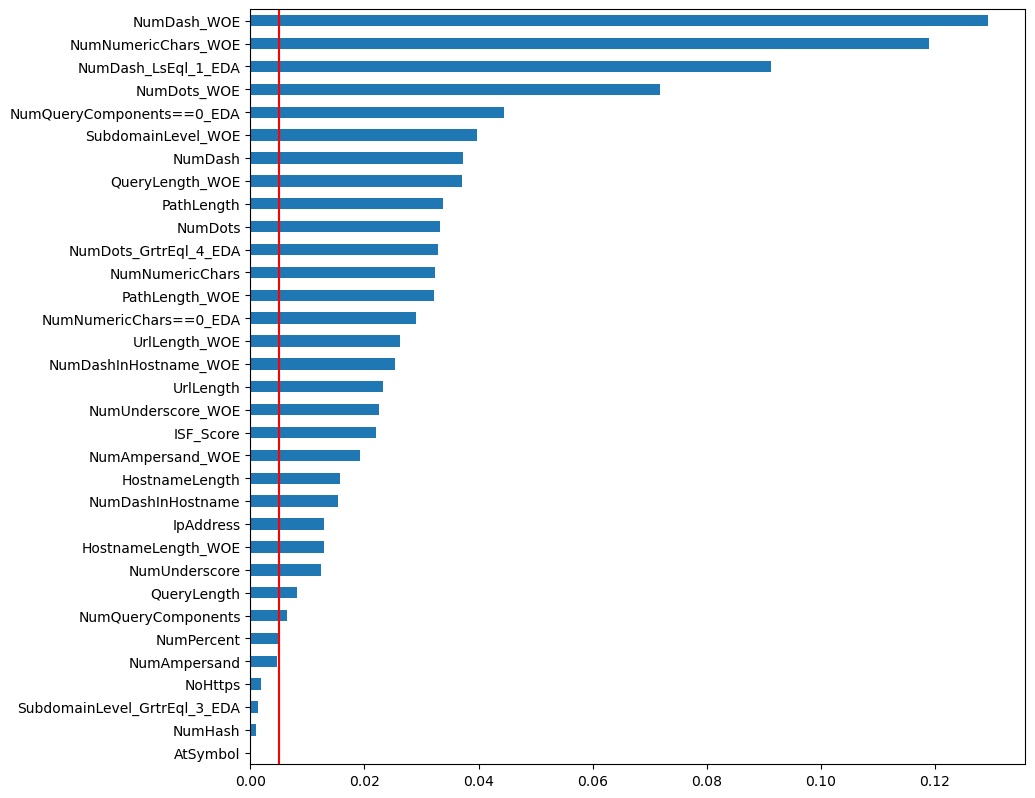

In [94]:
## Fit ExtraTreesClassifier with best set of parameters
model = ExtraTreesClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=3, criterion='gini',random_state=0)
model.fit(X_train_new,y_train)
print("model.feature_importances_:\n")
print(model.feature_importances_)
print("\n")
print("X_train_new.columns:\n")
print(X_train_new.columns)
ranked_features = pd.Series(model.feature_importances_, index = X_train_new.columns)

print("\n")
print("Visual Representation of Feature Importance from Model (Red line indicates value=0.005):")

## Visual Representaion
figure(figsize=(10,10), dpi=100)
ranked_features.sort_values().plot(kind='barh')
plt.axvline(x=0.005,c='r')
plt.show()

Clearly "NoHttps","SubdomainLevel_GrtrEql_3_EDA", "NumHash" and "AtSymbol" have very less importance (setting cutoff at 0.005). So, we'll drop them.

In [95]:
X_train_new.drop(["NoHttps","SubdomainLevel_GrtrEql_3_EDA", "NumHash", "AtSymbol" ] , axis=1, inplace=True)

In [96]:
X_train_new.head()

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0         41        0        2              0           0             0   
1         40        0        3              0           1             0   
2         53        0        3              0           0             0   
3         89       12        3              0           0             0   
4        101        6        1              3           0             0   

   NumDashInHostname  NumNumericChars  IpAddress  NumQueryComponents  ...  \
0                  0                4          0                   0  ...   
1                  0                3          0                   0  ...   
2                  0                6          0                   0  ...   
3                  0               14          0                   0  ...   
4                  0                6          0                   1  ...   

   NumDots_WOE  NumUnderscore_WOE  NumAmpersand_WOE  NumDashInHostname_WOE  \
0    -0.019816           0.081354          0.114997              -0.096186   
1     0.292073           0.081354          0.114997              -0.096186   
2     0.292073           0.081354          0.114997              -0.096186   
3     0.292073           0.081354          0.114997              -0.096186   
4    -1.319003          -0.869469          0.114997              -0.096186   

   NumNumericChars_WOE  SubdomainLevel_WOE  HostnameLength_WOE  \
0            -0.494543           -0.057979            0.080934   
1            -0.494543           -0.057979           -0.120158   
2            -1.830517            0.062771           -0.120158   
3            -0.777151           -0.057979           -0.120158   
4            -1.830517            0.062771           -0.120158   

   PathLength_WOE  QueryLength_WOE  ISF_Score  
0       -0.203832         0.222194   0.010841  
1        0.402728         0.222194  -0.015345  
2        0.402728         0.222194   0.020058  
3       -0.833557         0.222194  -0.061994  
4       -0.117753        -0.491447  -0.085792  

[5 rows x 29 columns]

## Final Training data

In [97]:
# setting options to see all columns
pd.set_option("display.max_columns",None)

In [98]:
X_train_new

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0            41        0        2              0           0             0   
1            40        0        3              0           1             0   
2            53        0        3              0           0             0   
3            89       12        3              0           0             0   
4           101        6        1              3           0             0   
...         ...      ...      ...            ...         ...           ...   
7995         60        0        2              0           0             1   
7996        116        1        3              2           1             6   
7997         60        1        1              0           0             0   
7998         50        0        2              1           0             0   
7999         62        0        3              2           0             0   

      NumDashInHostname  NumNumericChars  IpAddress  NumQueryComponents  \
0                     0                4          0                   0   
1                     0                3          0                   0   
2                     0                6          0                   0   
3                     0               14          0                   0   
4                     0                6          0                   1   
...                 ...              ...        ...                 ...   
7995                  0                6          0                   2   
7996                  0                5          0                   7   
7997                  0                6          0                   0   
7998                  0                0          0                   0   
7999                  0                4          0                   1   

      HostnameLength  PathLength  QueryLength  NumDots_GrtrEql_4_EDA  \
0                 24          10            0                      0   
1                 13          20            0                      0   
2                 17          29            0                      0   
3                 16          66            0                      0   
4                 11          49           33                      0   
...              ...         ...          ...                    ...   
7995              23          13           16                      0   
7996              16          14           78                      0   
7997              18          35            0                      0   
7998              19          24            0                      0   
7999              19          20           15                      0   

      NumDash_LsEql_1_EDA  NumQueryComponents==0_EDA  NumNumericChars==0_EDA  \
0                       1                          1                       0   
1                       1                          1                       0   
2                       1                          1                       0   
3                       0                          1                       0   
4                       0                          0                       0   
...                   ...                        ...                     ...   
7995                    1                          0                       0   
7996                    1                          0                       0   
7997                    1                          1                       0   
7998                    1                          1                       1   
7999                    1                          0                       0   

      UrlLength_WOE  NumDash_WOE  NumDots_WOE  NumUnderscore_WOE  \
0          0.492540     0.506946    -0.019816           0.081354   
1          0.492540     0.506946     0.292073           0.081354   
2          0.492540     0.506946     0.292073           0.081354   
3         -0.571443    -3.685051     0.292073           0.081354   
4 

In [99]:
# finally training data has following columns
X_train_new.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumDashInHostname', 'NumNumericChars', 'IpAddress',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'NumDots_GrtrEql_4_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'HostnameLength_WOE', 'PathLength_WOE', 'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [100]:
# resetting options 
pd.reset_option("display.max_columns")

## Preparing Test Data

In [101]:
# setting options to see all columns, full column width
pd.set_option("display.max_columns",None)

In [102]:
X_test.head()

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
6252         60        5        1              0           0             0   
4684         75        0        3              0           0             0   
1731         64        0        1              0           0             0   
4742         71        0        3              0           0             0   
4521         52        0        3              0           0             0   

      NumHash  NumDashInHostname  NumNumericChars  AtSymbol  TildeSymbol  \
6252        0                  0                8         0            0   
4684        0                  0                0         0            0   
1731        0                  0               20         0            0   
4742        0                  0                4         0            0   
4521        0                  0                1         0            0   

      NoHttps  IpAddress  SubdomainLevel  NumQueryComponents  HostnameLength  \
6252        1          0               0                   0              10   
4684        1          0               1                   1              15   
1731        1          0               0                   0              19   
4742        1          0               0                   1              10   
4521        1          0               1                   0              12   

      PathLength  QueryLength  DoubleSlashInPath  
6252          43            0                  0  
4684          48            4                  0  
1731          38            0                  0  
4742          29           24                  0  
4521          33            0                  0

In [103]:
X_test.shape

(2000, 19)

In [104]:
# resetting options 
pd.reset_option("display.max_columns")

In [105]:
# We will work on X_test_new to keep base test dataset unchanged 
X_test_new = X_test.copy()

In [106]:
X_test_new.head()

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
6252         60        5        1              0           0             0   
4684         75        0        3              0           0             0   
1731         64        0        1              0           0             0   
4742         71        0        3              0           0             0   
4521         52        0        3              0           0             0   

      NumHash  NumDashInHostname  NumNumericChars  AtSymbol  TildeSymbol  \
6252        0                  0                8         0            0   
4684        0                  0                0         0            0   
1731        0                  0               20         0            0   
4742        0                  0                4         0            0   
4521        0                  0                1         0            0   

      NoHttps  IpAddress  SubdomainLevel  NumQueryComponents  HostnameLength  \
6252        1          0               0                   0              10   
4684        1          0               1                   1              15   
1731        1          0               0                   0              19   
4742        1          0               0                   1              10   
4521        1          0               1                   0              12   

      PathLength  QueryLength  DoubleSlashInPath  
6252          43            0                  0  
4684          48            4                  0  
1731          38            0                  0  
4742          29           24                  0  
4521          33            0                  0

In [107]:
X_test_new.shape

(2000, 19)

## Creating New Features

In [108]:
X_train_new.columns

Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumDashInHostname', 'NumNumericChars', 'IpAddress',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'NumDots_GrtrEql_4_EDA', 'NumDash_LsEql_1_EDA',
       'NumQueryComponents==0_EDA', 'NumNumericChars==0_EDA', 'UrlLength_WOE',
       'NumDash_WOE', 'NumDots_WOE', 'NumUnderscore_WOE', 'NumAmpersand_WOE',
       'NumDashInHostname_WOE', 'NumNumericChars_WOE', 'SubdomainLevel_WOE',
       'HostnameLength_WOE', 'PathLength_WOE', 'QueryLength_WOE', 'ISF_Score'],
      dtype='object')

In [109]:
X_test_new = X_test_new[['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumDashInHostname', 'NumNumericChars', 'IpAddress',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength']]

In [110]:
X_test_new['NumDots_GrtrEql_4_EDA'] = np.where(X_test['NumDots']>=4,1,0)
X_test_new['NumDash_LsEql_1_EDA'] = np.where(X_test['NumDash']<=1,1,0)
X_test_new['NumQueryComponents==0_EDA'] = np.where(X_test['NumQueryComponents']==0,1,0)
X_test_new['NumNumericChars==0_EDA'] = np.where(X_test['NumNumericChars']==0,1,0)
X_test_new['UrlLength_WOE'] = [-0.462714 if i<35 else 0.492540 if 35<=i<60 else 0.085523 if 60<=i<70 else -0.571443 if 70<=i<130 else 0.211513 for i in X_test['UrlLength']]
X_test_new['NumDash_WOE'] = [0.506946 if i<2 else -0.216327 if 2<=i<3 else -1.194891 if 3<=i<6 else -3.685051 for i in X_test['NumDash']]
X_test_new['NumDots_WOE'] = [-1.319003 if i<2 else -0.019816 if 2<=i<3 else 0.292073 if 3<=i<4 else 1.422297 for i in X_test['NumDots']]
X_test_new['NumUnderscore_WOE'] = [0.081354 if i<1 else -0.192783 if 1<=i<2 else -0.869469 for i in X_test['NumUnderscore']]
X_test_new['NumAmpersand_WOE'] = [0.114997 if i<1 else -1.146679 for i in X_test['NumAmpersand']]
X_test_new['NumDashInHostname_WOE'] = [-0.096186 if i<1 else 1.000892 for i in X_test['NumDashInHostname']]
X_test_new['NumNumericChars_WOE'] = [0.707812 if i<2 else -0.494543 if 2<=i<5 else -1.830517 if 5<=i<8 else -3.127076 if 8<=i<9 else -0.777151 if 9<=i<18 else 1.319388 for i in X_test['NumNumericChars']]
X_test_new['SubdomainLevel_WOE'] = [0.062771 if i<1 else -0.057979 for i in X_test['SubdomainLevel']]
X_test_new['HostnameLength_WOE'] = [-0.705058 if i<11 else -0.120158 if 11<=i<20 else 0.080934 if 20<=i<26 else 0.484893 if 26<=i<30 else 1.202948 for i in X_test['HostnameLength']]
X_test_new['PathLength_WOE'] = [-0.873511 if i<8 else -0.203832 if 8<=i<16 else 0.402728 if 16<=i<46 else -0.117753 if 46<=i<60 else -0.833557 for i in X_test['PathLength']]
X_test_new['QueryLength_WOE'] = [0.222194 if i<6 else -1.813158 if 6<=i<30 else -0.491447 for i in X_test['QueryLength']]

In [111]:
x = X_test.values
predictions=clf.predict(x)

df_test = pd.DataFrame(clf.decision_function(x), columns = ["ISF_Score"])
df_test

ISF_Score
0     -0.005112
1      0.002770
2     -0.001053
3     -0.020507
4      0.024632
...         ...
1995  -0.041348
1996  -0.009367
1997   0.011394
1998  -0.024808
1999  -0.092938

[2000 rows x 1 columns]

In [112]:
clf.decision_function(x)

array([-0.00511214,  0.00276988, -0.00105314, ...,  0.01139381,
       -0.02480821, -0.09293824])

In [113]:
## to avoid 'id' mismatch
X_test_new.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [114]:
X_test_new=pd.concat([X_test_new,df_test],axis=1)

In [116]:
## to see all columns
pd.set_option("display.max_columns", None)

In [117]:
X_test_new

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0            60        5        1              0           0             0   
1            75        0        3              0           0             0   
2            64        0        1              0           0             0   
3            71        0        3              0           0             0   
4            52        0        3              0           0             0   
...         ...      ...      ...            ...         ...           ...   
1995         99        7        3              2           0             0   
1996         59        0        2              3           0             0   
1997         67        4        1              0           0             0   
1998         79        1        1              0           0             0   
1999         79        0        2              0           0             3   

      NumDashInHostname  NumNumericChars  IpAddress  NumQueryComponents  \
0                     0                8          0                   0   
1                     0                0          0                   1   
2                     0               20          0                   0   
3                     0                4          0                   1   
4                     0                1          0                   0   
...                 ...              ...        ...                 ...   
1995                  0                2          0                   0   
1996                  0                0          0                   0   
1997                  0                0          0                   0   
1998                  0               28          0                   0   
1999                  0                6          0                   4   

      HostnameLength  PathLength  QueryLength  NumDots_GrtrEql_4_EDA  \
0                 10          43            0                      0   
1                 15          48            4                      0   
2                 19          38            0                      0   
3                 10          29           24                      0   
4                 12          33            0                      0   
...              ...         ...          ...                    ...   
1995              25          67            0                      0   
1996               8          44            0                      0   
1997              21          39            0                      0   
1998              13          59            0                      0   
1999              15           7           49                      0   

      NumDash_LsEql_1_EDA  NumQueryComponents==0_EDA  NumNumericChars==0_EDA  \
0                       0                          1                       0   
1                       1                          0                       1   
2                       1                          1                       0   
3                       1                          0                       0   
4                       1                          1                       0   
...                   ...                        ...                     ...   
1995                    0                          1                       0   
1996                    1                          1                       1   
1997                    0                          1                       1   
1998                    1                          1                       0   
1999                    1                          0                       0   

      UrlLength_WOE  NumDash_WOE  NumDots_WOE  NumUnderscore_WOE  \
0          0.085523    -1.194891    -1.319003           0.081354   
1         -0.571443     0.506946     0.292073           0.081354   
2          0.085523     0.506946    -1.319003           0.081354   
3         -0.571443     0.506946     0.292073           0.081354   
4 

In [118]:
## resetting to default
pd.reset_option("display.max_columns")

# Model Fit with Optimized Hyperparameter
As this is **balanced dataset**, we will use **Repeated Randon Train-Test Split** every step.

In [119]:
# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Decision Tree Classifier

In [120]:
# import library for DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [121]:
# make parameter Randomized for DecisionTree
params_DTC = {'max_leaf_nodes':list(range(2, 100)), 'min_samples_split':[2,3,4], 'criterion': ['entropy','gini']}
print(params_DTC)

# fitting Randomized_search on DecisionTree and getting the best hyperparameters
Randomized_search_DTC = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), params_DTC, verbose=1, cv=5)

best_params_DTC = Randomized_search_DTC.fit(X_train_new, y_train)

print(best_params_DTC.best_params_)

print(best_params_DTC.best_estimator_)

{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4], 'criterion': ['entropy', 'gini']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'min_samples_split': 3, 'max_leaf_nodes': 88, 'criterion': 'gini'}
DecisionTreeClassifier(max_leaf_nodes=88, min_samples_split=3, random_state=0)


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.6s finished


In [122]:
predictions_training_DTC = Randomized_search_DTC.predict(X_train_new)
score=cross_val_score(DecisionTreeClassifier(max_leaf_nodes=93, min_samples_split=4, random_state=0),X_train_new, y_train, cv=ssplit)
predictions_training_DTC_CV=score.mean()
predictions_testing_DTC = Randomized_search_DTC.predict(X_test_new)

print("Training accuracy of DecisionTree: ", format(accuracy_score(y_train,predictions_training_DTC),"0.2f"))
print("Training accuracy of DecisionTree after Cross Validation: ", format(predictions_training_DTC_CV,"0.2f"))
print("Testing accuracy of DecisionTree: ", format(accuracy_score(y_test,predictions_testing_DTC),"0.2f"))

Training accuracy of DecisionTree:  0.88
Training accuracy of DecisionTree after Cross Validation:  0.85
Testing accuracy of DecisionTree:  0.86


Confusion Matrix : 
 [[833 155]
 [119 893]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       988
           1       0.85      0.88      0.87      1012

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Decision Tree Model ROC AUC =  0.92


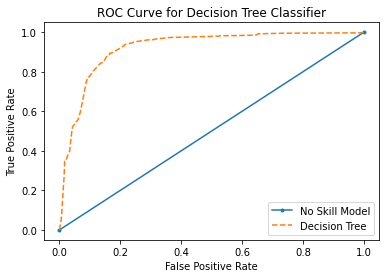

In [123]:
## Confusion Matrix
cm_DTC = confusion_matrix(y_test, predictions_testing_DTC)
print("Confusion Matrix : \n", cm_DTC)

## Classification Report
print(classification_report(y_test, predictions_testing_DTC))

## probability of falling into a particular class from each observation
probs_DTC = best_params_DTC.predict_proba(X_test_new)
probs_DTC = probs_DTC[:,1]

## AUC (Area Under Curve) Score
auc_score_DTC = roc_auc_score(y_test, probs_DTC)
print("Decision Tree Model ROC AUC = ",format(auc_score_DTC,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Decision Tree
fpr_DTC, tpr_DTC, __DTC = roc_curve(y_test, probs_DTC)

plt.plot(fpr_DTC, tpr_DTC, linestyle='--', label='Decision Tree')
plt.title("ROC Curve for Decision Tree Classifier")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# Random Forest Classifier

In [124]:
# import library for RandomForest
from sklearn.ensemble import RandomForestClassifier

In [125]:
# make parameter Randomized for DecisionTree
params_RFC = {
    'criterion': ['entropy','gini'],
    
    'max_depth': [int(x) for x in np.linspace(10,100,5)],
    
    'max_features': ['auto','sqrt','log2'],
    
    'min_samples_leaf': [2,5,8],
    
    'min_samples_split': [2,5,10],
    
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)]
}
print(params_RFC)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_RFC = RandomizedSearchCV(RandomForestClassifier(random_state=0), params_RFC, verbose=1, cv=5)

best_params_RFC = Randomized_search_RFC.fit(X_train_new, y_train)

print(best_params_RFC.best_params_)

print(best_params_RFC.best_estimator_)

{'criterion': ['entropy', 'gini'], 'max_depth': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [2, 5, 8], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 32, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=32, min_samples_leaf=2,
                       n_estimators=400, random_state=0)


In [126]:
predictions_training_RFC = Randomized_search_RFC.predict(X_train_new)
score=cross_val_score(RandomForestClassifier(max_depth=32, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=0),X_train_new, y_train, cv=ssplit)
predictions_training_RFC_CV=score.mean()
predictions_testing_RFC = Randomized_search_RFC.predict(X_test_new)

print("Training accuracy of Random Forest Classifier: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Training accuracy of Random Forest Classifier after Cross Validation: ", format(predictions_training_RFC_CV,"0.2f"))
print("Testing accuracy of Random Forest Classifier: ", format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

Training accuracy of Random Forest Classifier:  0.96
Training accuracy of Random Forest Classifier after Cross Validation:  0.88
Testing accuracy of Random Forest Classifier:  0.89


Confusion Matrix : 
 [[856 132]
 [ 82 930]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       988
           1       0.88      0.92      0.90      1012

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Random Forest Classifier ROC AUC =  0.96


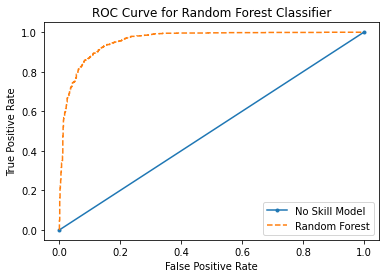

In [127]:
## Confusion Matrix
cm_RFC = confusion_matrix(y_test, predictions_testing_RFC)
print("Confusion Matrix : \n", cm_RFC)

## Classification Report
print(classification_report(y_test, predictions_testing_RFC))

## probability of falling into a particular class from each observation
probs_RFC = best_params_RFC.predict_proba(X_test_new)
probs_RFC = probs_RFC[:,1]

## AUC (Area Under Curve) Score
auc_score_RFC = roc_auc_score(y_test, probs_RFC)
print("Random Forest Classifier ROC AUC = ",format(auc_score_RFC,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve from Random Forest
fpr_RFC, tpr_RFC, __RFC = roc_curve(y_test, probs_RFC)
plt.plot(fpr_RFC, tpr_RFC, linestyle='--', label='Random Forest')
plt.title("ROC Curve for Random Forest Classifier")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# SVM

In [128]:
# import library for DecisionTree
from sklearn.svm import SVC

In [129]:
## we have to apply scaled data here
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

print("Scaled Training Data:\n")
## Scaling for Training Data
X_train_new_scaled = scaling.fit_transform(X_train_new)
X_train_new_scaled = pd.DataFrame(X_train_new_scaled, columns=X_train_new.columns)
print(X_train_new_scaled)

print("\n")

print("Scaled Testing Data:\n")
## Scaling for Testing Data
X_test_new_scaled = scaling.transform(X_test_new)
X_test_new_scaled = pd.DataFrame(X_test_new_scaled, columns=X_test_new.columns)
print(X_test_new_scaled)

Scaled Training Data:

      UrlLength   NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0      0.120332  0.000000     0.05         0.0000    0.000000      0.000000   
1      0.116183  0.000000     0.10         0.0000    0.052632      0.000000   
2      0.170124  0.000000     0.10         0.0000    0.000000      0.000000   
3      0.319502  0.218182     0.10         0.0000    0.000000      0.000000   
4      0.369295  0.109091     0.00         0.1875    0.000000      0.000000   
...         ...       ...      ...            ...         ...           ...   
7995   0.199170  0.000000     0.05         0.0000    0.000000      0.045455   
7996   0.431535  0.018182     0.10         0.1250    0.052632      0.272727   
7997   0.199170  0.018182     0.00         0.0000    0.000000      0.000000   
7998   0.157676  0.000000     0.05         0.0625    0.000000      0.000000   
7999   0.207469  0.000000     0.10         0.1250    0.000000      0.000000   

      NumDashInHostname  Num

In [130]:
# make parameter Randomized for Support Vector Machine
params_SVM = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']
}
print(params_SVM)

# fitting Randomized_search on RandomizedForestClassifier and getting the best hyperparameters
Randomized_search_SVM = RandomizedSearchCV(SVC(probability=True, random_state=0), params_SVM, verbose=1, cv=5)

best_params_SVM = Randomized_search_SVM.fit(X_train_new_scaled, y_train)

print(best_params_SVM.best_params_)

print(best_params_SVM.best_estimator_)

{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.7min finished


{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}
SVC(C=1000, gamma=0.1, probability=True, random_state=0)


In [131]:
predictions_training_SVM = Randomized_search_SVM.predict(X_train_new_scaled)
score=cross_val_score(SVC(C=1000, gamma=0.1, probability=True, random_state=0),X_train_new, y_train, cv=ssplit)
predictions_training_SVM_CV=score.mean()     
predictions_testing_SVM = Randomized_search_SVM.predict(X_test_new_scaled)


print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Support Vector Machine after Cross Validation: ", format(predictions_training_SVM_CV,"0.2f"))
print("Testing accuracy of Support Vector Machine: ", format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

Training accuracy of Support Vector Machine:  0.89
Training accuracy of Support Vector Machine after Cross Validation:  0.79
Testing accuracy of Support Vector Machine:  0.86


Confusion Matrix : 
 [[794 194]
 [ 83 929]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       988
           1       0.83      0.92      0.87      1012

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Support Vector Machine ROC AUC =  0.50


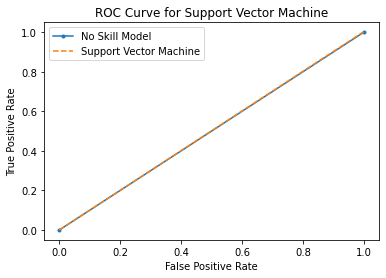

In [132]:
## Confusion Matrix
cm_SVM = confusion_matrix(y_test, predictions_testing_SVM)
print("Confusion Matrix : \n", cm_SVM)

## Classification Report
print(classification_report(y_test, predictions_testing_SVM))

## probability of falling into a particular class from each observation
probs_SVM = best_params_SVM.predict_proba(X_test_new)
probs_SVM = probs_SVM[:,1]

## AUC (Area Under Curve) Score
auc_score_SVM = roc_auc_score(y_test, probs_SVM)
print("Support Vector Machine ROC AUC = ",format(auc_score_SVM,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
fpr_SVM, tpr_SVM, __SVM = roc_curve(y_test, probs_SVM)
plt.plot(fpr_SVM, tpr_SVM, linestyle='--', label='Support Vector Machine')
plt.title("ROC Curve for Support Vector Machine")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# XgBoost

In [133]:
# import library for XgBoost
from xgboost import XGBClassifier

In [134]:
# make parameter Randomized for XgBoost
params_XGB = {
    
    'max_depth': [i for i in range(2,10,1)],
    'n_estimators': [i for i in range(60,220,40)],
    'learning_rate':[0.1,0.01,0.05]
}
print(params_XGB)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_XGB = RandomizedSearchCV(XGBClassifier(objective = 'binary:logistic', nthread=4, use_label_encoder=False, seed=42), params_XGB, verbose=1, cv=5)

best_params_XGB = Randomized_search_XGB.fit(X_train_new, y_train)

print(best_params_XGB.best_params_)

print(best_params_XGB.best_estimator_)

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [60, 100, 140, 180], 'learning_rate': [0.1, 0.01, 0.05]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


[16:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'n_estimators': 180, 'max_depth': 6, 'learning_rate': 0.05}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=

In [135]:
predictions_training_XGB = Randomized_search_XGB.predict(X_train_new)
score=cross_val_score(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None),X_train_new, y_train, cv=ssplit)
predictions_training_XGB_CV=score.mean()      
predictions_testing_XGB = Randomized_search_XGB.predict(X_test_new)

print("Training accuracy of XgBoost: ", format(accuracy_score(y_train,predictions_training_XGB),"0.2f"))
print("Training accuracy of XgBoost after Cross Validation: ", format(predictions_training_XGB_CV,"0.2f"))
print("Testing accuracy of XgBoost: ", format(accuracy_score(y_test,predictions_testing_XGB),"0.2f"))

[16:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Confusion Matrix : 
 [[839 149]
 [ 75 937]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       988
           1       0.86      0.93      0.89      1012

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

XgBoost Model ROC AUC =  0.96


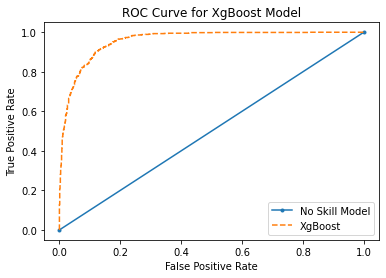

In [136]:
## Confusion Matrix
cm_XGB = confusion_matrix(y_test, predictions_testing_XGB)
print("Confusion Matrix : \n", cm_XGB)

## Classification Report
print(classification_report(y_test, predictions_testing_XGB))

## probability of falling into a particular class from each observation
probs_XGB = best_params_XGB.predict_proba(X_test_new)
probs_XGB = probs_XGB[:,1]

## AUC (Area Under Curve) Score
auc_score_XGB = roc_auc_score(y_test, probs_XGB)
print("XgBoost Model ROC AUC = ",format(auc_score_XGB,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve of XgBoost Model
fpr_XGB, tpr_XGB, __XGB = roc_curve(y_test, probs_XGB)
plt.plot(fpr_XGB, tpr_XGB, linestyle='--', label='XgBoost')
plt.title("ROC Curve for XgBoost Model")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# lightgbm

In [137]:
# import library for lightgbm
import lightgbm as lgb

In [138]:
# make parameter Randomized for lightgbm
params_LGB = {
    'num_leaves': [31, 127],
    
    'reg_alpha': [0.1, 0.5],
    
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    
    'lambda_l1': [0, 1, 1.5],
    
    'lambda_l2': [0, 1]
}
print(params_LGB)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_LGB = RandomizedSearchCV(lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_boost_round=2000,learning_rate=0.01,random_state=0), params_LGB, verbose=1, cv=5)

best_params_LGB = Randomized_search_LGB.fit(X_train_new, y_train)

print(best_params_LGB.best_params_)

print(best_params_LGB.best_estimator_)

{'num_leaves': [31, 127], 'reg_alpha': [0.1, 0.5], 'min_data_in_leaf': [30, 50, 100, 300, 400], 'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))



[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_dat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.1min finished


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
{'reg_alpha': 0.1, 'num_leaves': 31, 'min_data_in_leaf': 30, 'lambda_l2': 0, 'lambda_l1': 0}
LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.01,
               min_data_in_leaf=30, num_boost_round=2000, objective='binary',
               random_state=0, reg_alpha=0.1)


In [139]:
predictions_training_LGB = Randomized_search_LGB.predict(X_train_new)
score=cross_val_score(lgb.LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.01,
               min_data_in_leaf=50, num_boost_round=2000, objective='binary',
               random_state=0, reg_alpha=0.1),X_train_new, y_train, cv=5)
predictions_training_LGB_CV=score.mean()
predictions_testing_LGB = Randomized_search_LGB.predict(X_test_new)

print("Training accuracy of lightgbm: ", format(accuracy_score(y_train,predictions_training_LGB),"0.2f"))
print("Training accuracy of lightgbm after Cross Validation: ", format(predictions_training_LGB_CV,"0.2f"))
print("Testing accuracy of lightgbm: ", format(accuracy_score(y_test,predictions_testing_LGB),"0.2f"))

C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_

Confusion Matrix : 
 [[854 134]
 [ 99 913]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       988
           1       0.87      0.90      0.89      1012

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

LightGBM Model ROC AUC = %.3f 0.96


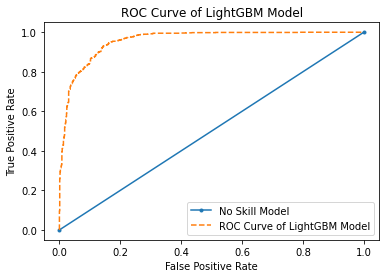

In [140]:
## Confusion Matrix
cm_LGB = confusion_matrix(y_test, predictions_testing_LGB)
print("Confusion Matrix : \n", cm_LGB)

## Classification Report
print(classification_report(y_test, predictions_testing_LGB))

## probability of falling into a particular class from each observation
probs_LGB = best_params_LGB.predict_proba(X_test_new)
probs_LGB = probs_LGB[:,1]

## AUC (Area Under Curve) Score
auc_score_LGB = roc_auc_score(y_test, probs_LGB)
print("LightGBM Model ROC AUC = %.3f",format(auc_score_LGB,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve
fpr_LGB, tpr_LGB, __LGB = roc_curve(y_test, probs_LGB)
plt.plot(fpr_LGB, tpr_LGB, linestyle='--', label='ROC Curve of LightGBM Model')
plt.title("ROC Curve of LightGBM Model")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# catboost

In [141]:
# import library for CatBoost
import catboost as cb

In [142]:
# make parameter Randomized for CatBoost
params_CTB = {
    'depth':[3,1,2,6,4,5,7,8,9,10],
    'iterations':[250,100,500,1000],
    'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
    'l2_leaf_reg':[3,1,5,10,100],
    'border_count':[32,5,10,20,100,200],
    'thread_count':[4]
}
print(params_CTB)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_CTB = RandomizedSearchCV(cb.CatBoostClassifier(random_state=0), params_CTB, verbose=1, cv=5)

best_params_CTB = Randomized_search_CTB.fit(X_train_new, y_train)

print(best_params_CTB.best_params_)

print(best_params_CTB.best_estimator_)

{'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10], 'iterations': [250, 100, 500, 1000], 'learning_rate': [0.03, 0.001, 0.01, 0.1, 0.2, 0.3], 'l2_leaf_reg': [3, 1, 5, 10, 100], 'border_count': [32, 5, 10, 20, 100, 200], 'thread_count': [4]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6167798	total: 103ms	remaining: 1m 42s
1:	learn: 0.5751185	total: 108ms	remaining: 53.8s
2:	learn: 0.5383597	total: 113ms	remaining: 37.6s
3:	learn: 0.5069408	total: 118ms	remaining: 29.5s
4:	learn: 0.4874124	total: 123ms	remaining: 24.5s
5:	learn: 0.4744634	total: 129ms	remaining: 21.4s
6:	learn: 0.4572675	total: 135ms	remaining: 19.1s
7:	learn: 0.4444068	total: 139ms	remaining: 17.3s
8:	learn: 0.4359617	total: 145ms	remaining: 16s
9:	learn: 0.4272929	total: 150ms	remaining: 14.9s
10:	learn: 0.4200743	total: 155ms	remaining: 13.9s
11:	learn: 0.4111800	total: 161ms	remaining: 13.3s
12:	learn: 0.4026168	total: 167ms	remaining: 12.6s
13:	learn: 0.3952334	total: 173ms	remaining: 12.2s
14:	learn: 0.3915901	total: 178ms	remaining: 11.7s
15:	learn: 0.3862317	total: 183ms	remaining: 11.3s
16:	learn: 0.3818657	total: 189ms	remaining: 10.9s
17:	learn: 0.3750278	total: 195ms	remaining: 10.6s
18:	learn: 0.3718249	total: 203ms	remaining: 10.5s
19:	learn: 0.3660571	total: 211ms	remainin

171:	learn: 0.2605534	total: 1.12s	remaining: 5.39s
172:	learn: 0.2603446	total: 1.13s	remaining: 5.38s
173:	learn: 0.2600771	total: 1.13s	remaining: 5.37s
174:	learn: 0.2598592	total: 1.14s	remaining: 5.36s
175:	learn: 0.2595764	total: 1.14s	remaining: 5.36s
176:	learn: 0.2594149	total: 1.15s	remaining: 5.35s
177:	learn: 0.2592185	total: 1.16s	remaining: 5.33s
178:	learn: 0.2591352	total: 1.16s	remaining: 5.32s
179:	learn: 0.2588689	total: 1.17s	remaining: 5.31s
180:	learn: 0.2584469	total: 1.17s	remaining: 5.3s
181:	learn: 0.2582154	total: 1.18s	remaining: 5.29s
182:	learn: 0.2578657	total: 1.18s	remaining: 5.28s
183:	learn: 0.2577119	total: 1.19s	remaining: 5.26s
184:	learn: 0.2575849	total: 1.19s	remaining: 5.25s
185:	learn: 0.2573066	total: 1.2s	remaining: 5.24s
186:	learn: 0.2570301	total: 1.2s	remaining: 5.23s
187:	learn: 0.2568097	total: 1.21s	remaining: 5.21s
188:	learn: 0.2566442	total: 1.21s	remaining: 5.2s
189:	learn: 0.2564485	total: 1.22s	remaining: 5.19s
190:	learn: 0.25

347:	learn: 0.2297331	total: 2.12s	remaining: 3.96s
348:	learn: 0.2296484	total: 2.12s	remaining: 3.96s
349:	learn: 0.2293742	total: 2.13s	remaining: 3.95s
350:	learn: 0.2292749	total: 2.13s	remaining: 3.95s
351:	learn: 0.2291615	total: 2.14s	remaining: 3.94s
352:	learn: 0.2290960	total: 2.15s	remaining: 3.94s
353:	learn: 0.2289833	total: 2.15s	remaining: 3.93s
354:	learn: 0.2289159	total: 2.16s	remaining: 3.92s
355:	learn: 0.2288424	total: 2.16s	remaining: 3.91s
356:	learn: 0.2287570	total: 2.17s	remaining: 3.91s
357:	learn: 0.2286304	total: 2.17s	remaining: 3.9s
358:	learn: 0.2285322	total: 2.18s	remaining: 3.89s
359:	learn: 0.2284631	total: 2.19s	remaining: 3.89s
360:	learn: 0.2283678	total: 2.19s	remaining: 3.88s
361:	learn: 0.2281893	total: 2.2s	remaining: 3.87s
362:	learn: 0.2280420	total: 2.2s	remaining: 3.87s
363:	learn: 0.2278297	total: 2.21s	remaining: 3.86s
364:	learn: 0.2277542	total: 2.21s	remaining: 3.85s
365:	learn: 0.2275627	total: 2.22s	remaining: 3.84s
366:	learn: 0.2

533:	learn: 0.2108841	total: 3.13s	remaining: 2.73s
534:	learn: 0.2108035	total: 3.13s	remaining: 2.72s
535:	learn: 0.2105926	total: 3.14s	remaining: 2.72s
536:	learn: 0.2105257	total: 3.15s	remaining: 2.71s
537:	learn: 0.2103797	total: 3.15s	remaining: 2.71s
538:	learn: 0.2102932	total: 3.16s	remaining: 2.7s
539:	learn: 0.2102106	total: 3.16s	remaining: 2.7s
540:	learn: 0.2101458	total: 3.17s	remaining: 2.69s
541:	learn: 0.2100704	total: 3.17s	remaining: 2.68s
542:	learn: 0.2099257	total: 3.18s	remaining: 2.68s
543:	learn: 0.2097835	total: 3.19s	remaining: 2.67s
544:	learn: 0.2097209	total: 3.19s	remaining: 2.66s
545:	learn: 0.2096615	total: 3.19s	remaining: 2.66s
546:	learn: 0.2095813	total: 3.2s	remaining: 2.65s
547:	learn: 0.2095333	total: 3.21s	remaining: 2.64s
548:	learn: 0.2094598	total: 3.21s	remaining: 2.64s
549:	learn: 0.2093826	total: 3.21s	remaining: 2.63s
550:	learn: 0.2092711	total: 3.22s	remaining: 2.62s
551:	learn: 0.2092003	total: 3.22s	remaining: 2.62s
552:	learn: 0.2

714:	learn: 0.1957767	total: 4.14s	remaining: 1.65s
715:	learn: 0.1957340	total: 4.15s	remaining: 1.65s
716:	learn: 0.1955421	total: 4.16s	remaining: 1.64s
717:	learn: 0.1954900	total: 4.16s	remaining: 1.64s
718:	learn: 0.1954191	total: 4.17s	remaining: 1.63s
719:	learn: 0.1953367	total: 4.17s	remaining: 1.62s
720:	learn: 0.1952242	total: 4.18s	remaining: 1.62s
721:	learn: 0.1951512	total: 4.18s	remaining: 1.61s
722:	learn: 0.1951235	total: 4.19s	remaining: 1.6s
723:	learn: 0.1950827	total: 4.2s	remaining: 1.6s
724:	learn: 0.1950492	total: 4.2s	remaining: 1.59s
725:	learn: 0.1949683	total: 4.21s	remaining: 1.59s
726:	learn: 0.1949240	total: 4.21s	remaining: 1.58s
727:	learn: 0.1948350	total: 4.22s	remaining: 1.57s
728:	learn: 0.1947345	total: 4.22s	remaining: 1.57s
729:	learn: 0.1946536	total: 4.23s	remaining: 1.56s
730:	learn: 0.1946076	total: 4.23s	remaining: 1.56s
731:	learn: 0.1945837	total: 4.24s	remaining: 1.55s
732:	learn: 0.1945606	total: 4.24s	remaining: 1.55s
733:	learn: 0.19

901:	learn: 0.1842937	total: 5.16s	remaining: 560ms
902:	learn: 0.1842763	total: 5.16s	remaining: 555ms
903:	learn: 0.1842000	total: 5.17s	remaining: 549ms
904:	learn: 0.1841822	total: 5.17s	remaining: 543ms
905:	learn: 0.1841181	total: 5.18s	remaining: 537ms
906:	learn: 0.1840606	total: 5.19s	remaining: 532ms
907:	learn: 0.1840387	total: 5.19s	remaining: 526ms
908:	learn: 0.1839420	total: 5.2s	remaining: 521ms
909:	learn: 0.1838627	total: 5.21s	remaining: 515ms
910:	learn: 0.1838187	total: 5.21s	remaining: 509ms
911:	learn: 0.1838012	total: 5.22s	remaining: 503ms
912:	learn: 0.1837749	total: 5.22s	remaining: 498ms
913:	learn: 0.1836984	total: 5.23s	remaining: 492ms
914:	learn: 0.1836191	total: 5.23s	remaining: 486ms
915:	learn: 0.1835852	total: 5.24s	remaining: 480ms
916:	learn: 0.1835523	total: 5.24s	remaining: 475ms
917:	learn: 0.1835054	total: 5.25s	remaining: 469ms
918:	learn: 0.1834425	total: 5.25s	remaining: 463ms
919:	learn: 0.1833832	total: 5.26s	remaining: 457ms
920:	learn: 0

60:	learn: 0.3037336	total: 345ms	remaining: 5.31s
61:	learn: 0.3029495	total: 353ms	remaining: 5.34s
62:	learn: 0.3020259	total: 359ms	remaining: 5.33s
63:	learn: 0.3016178	total: 365ms	remaining: 5.34s
64:	learn: 0.3006304	total: 371ms	remaining: 5.34s
65:	learn: 0.3001409	total: 376ms	remaining: 5.32s
66:	learn: 0.2994148	total: 382ms	remaining: 5.31s
67:	learn: 0.2987195	total: 386ms	remaining: 5.29s
68:	learn: 0.2981575	total: 391ms	remaining: 5.28s
69:	learn: 0.2976145	total: 398ms	remaining: 5.28s
70:	learn: 0.2969840	total: 404ms	remaining: 5.29s
71:	learn: 0.2963581	total: 411ms	remaining: 5.3s
72:	learn: 0.2958479	total: 417ms	remaining: 5.3s
73:	learn: 0.2951389	total: 424ms	remaining: 5.3s
74:	learn: 0.2945015	total: 430ms	remaining: 5.3s
75:	learn: 0.2938761	total: 435ms	remaining: 5.29s
76:	learn: 0.2933434	total: 441ms	remaining: 5.29s
77:	learn: 0.2927446	total: 448ms	remaining: 5.29s
78:	learn: 0.2922837	total: 453ms	remaining: 5.28s
79:	learn: 0.2914268	total: 459ms	r

238:	learn: 0.2411944	total: 1.35s	remaining: 4.31s
239:	learn: 0.2409749	total: 1.36s	remaining: 4.31s
240:	learn: 0.2408429	total: 1.37s	remaining: 4.31s
241:	learn: 0.2406213	total: 1.37s	remaining: 4.3s
242:	learn: 0.2404366	total: 1.38s	remaining: 4.3s
243:	learn: 0.2402516	total: 1.39s	remaining: 4.29s
244:	learn: 0.2401239	total: 1.39s	remaining: 4.29s
245:	learn: 0.2400420	total: 1.4s	remaining: 4.28s
246:	learn: 0.2399123	total: 1.4s	remaining: 4.27s
247:	learn: 0.2397929	total: 1.41s	remaining: 4.27s
248:	learn: 0.2396065	total: 1.41s	remaining: 4.26s
249:	learn: 0.2394410	total: 1.42s	remaining: 4.25s
250:	learn: 0.2393471	total: 1.42s	remaining: 4.24s
251:	learn: 0.2390982	total: 1.43s	remaining: 4.24s
252:	learn: 0.2390130	total: 1.43s	remaining: 4.23s
253:	learn: 0.2387923	total: 1.44s	remaining: 4.22s
254:	learn: 0.2387267	total: 1.44s	remaining: 4.21s
255:	learn: 0.2385643	total: 1.45s	remaining: 4.21s
256:	learn: 0.2382959	total: 1.45s	remaining: 4.2s
257:	learn: 0.238

427:	learn: 0.2158139	total: 2.37s	remaining: 3.17s
428:	learn: 0.2157286	total: 2.38s	remaining: 3.17s
429:	learn: 0.2156186	total: 2.38s	remaining: 3.16s
430:	learn: 0.2155710	total: 2.39s	remaining: 3.15s
431:	learn: 0.2154354	total: 2.4s	remaining: 3.15s
432:	learn: 0.2153780	total: 2.4s	remaining: 3.15s
433:	learn: 0.2153368	total: 2.41s	remaining: 3.14s
434:	learn: 0.2153031	total: 2.41s	remaining: 3.13s
435:	learn: 0.2152200	total: 2.42s	remaining: 3.13s
436:	learn: 0.2151390	total: 2.42s	remaining: 3.12s
437:	learn: 0.2150786	total: 2.43s	remaining: 3.12s
438:	learn: 0.2149799	total: 2.43s	remaining: 3.11s
439:	learn: 0.2148145	total: 2.44s	remaining: 3.1s
440:	learn: 0.2147202	total: 2.44s	remaining: 3.1s
441:	learn: 0.2146378	total: 2.45s	remaining: 3.09s
442:	learn: 0.2145200	total: 2.45s	remaining: 3.09s
443:	learn: 0.2144553	total: 2.46s	remaining: 3.08s
444:	learn: 0.2143721	total: 2.46s	remaining: 3.07s
445:	learn: 0.2142900	total: 2.47s	remaining: 3.07s
446:	learn: 0.21

610:	learn: 0.1996475	total: 3.39s	remaining: 2.16s
611:	learn: 0.1995623	total: 3.4s	remaining: 2.15s
612:	learn: 0.1994755	total: 3.4s	remaining: 2.15s
613:	learn: 0.1992783	total: 3.41s	remaining: 2.14s
614:	learn: 0.1991665	total: 3.42s	remaining: 2.14s
615:	learn: 0.1991043	total: 3.42s	remaining: 2.13s
616:	learn: 0.1990491	total: 3.43s	remaining: 2.13s
617:	learn: 0.1989931	total: 3.43s	remaining: 2.12s
618:	learn: 0.1988823	total: 3.44s	remaining: 2.12s
619:	learn: 0.1986738	total: 3.44s	remaining: 2.11s
620:	learn: 0.1986013	total: 3.45s	remaining: 2.1s
621:	learn: 0.1985609	total: 3.46s	remaining: 2.1s
622:	learn: 0.1984786	total: 3.46s	remaining: 2.09s
623:	learn: 0.1984055	total: 3.47s	remaining: 2.09s
624:	learn: 0.1983344	total: 3.47s	remaining: 2.08s
625:	learn: 0.1982650	total: 3.48s	remaining: 2.08s
626:	learn: 0.1982274	total: 3.48s	remaining: 2.07s
627:	learn: 0.1981603	total: 3.49s	remaining: 2.06s
628:	learn: 0.1980927	total: 3.49s	remaining: 2.06s
629:	learn: 0.19

788:	learn: 0.1878417	total: 4.4s	remaining: 1.18s
789:	learn: 0.1878111	total: 4.41s	remaining: 1.17s
790:	learn: 0.1876423	total: 4.42s	remaining: 1.17s
791:	learn: 0.1875929	total: 4.42s	remaining: 1.16s
792:	learn: 0.1875395	total: 4.43s	remaining: 1.16s
793:	learn: 0.1875221	total: 4.43s	remaining: 1.15s
794:	learn: 0.1874919	total: 4.44s	remaining: 1.14s
795:	learn: 0.1874618	total: 4.45s	remaining: 1.14s
796:	learn: 0.1874247	total: 4.45s	remaining: 1.13s
797:	learn: 0.1873954	total: 4.46s	remaining: 1.13s
798:	learn: 0.1873008	total: 4.46s	remaining: 1.12s
799:	learn: 0.1872580	total: 4.46s	remaining: 1.12s
800:	learn: 0.1872362	total: 4.47s	remaining: 1.11s
801:	learn: 0.1871717	total: 4.47s	remaining: 1.1s
802:	learn: 0.1870920	total: 4.48s	remaining: 1.1s
803:	learn: 0.1870564	total: 4.48s	remaining: 1.09s
804:	learn: 0.1870152	total: 4.49s	remaining: 1.09s
805:	learn: 0.1868771	total: 4.5s	remaining: 1.08s
806:	learn: 0.1868056	total: 4.5s	remaining: 1.08s
807:	learn: 0.186

949:	learn: 0.1795618	total: 5.25s	remaining: 276ms
950:	learn: 0.1795276	total: 5.25s	remaining: 271ms
951:	learn: 0.1794848	total: 5.26s	remaining: 265ms
952:	learn: 0.1794210	total: 5.26s	remaining: 260ms
953:	learn: 0.1794085	total: 5.27s	remaining: 254ms
954:	learn: 0.1793620	total: 5.28s	remaining: 249ms
955:	learn: 0.1793133	total: 5.28s	remaining: 243ms
956:	learn: 0.1792528	total: 5.29s	remaining: 238ms
957:	learn: 0.1792289	total: 5.29s	remaining: 232ms
958:	learn: 0.1791972	total: 5.3s	remaining: 227ms
959:	learn: 0.1791296	total: 5.3s	remaining: 221ms
960:	learn: 0.1790145	total: 5.31s	remaining: 215ms
961:	learn: 0.1789361	total: 5.31s	remaining: 210ms
962:	learn: 0.1789016	total: 5.32s	remaining: 204ms
963:	learn: 0.1788640	total: 5.32s	remaining: 199ms
964:	learn: 0.1788515	total: 5.33s	remaining: 193ms
965:	learn: 0.1787458	total: 5.33s	remaining: 188ms
966:	learn: 0.1787180	total: 5.34s	remaining: 182ms
967:	learn: 0.1786812	total: 5.34s	remaining: 177ms
968:	learn: 0.

130:	learn: 0.2731663	total: 691ms	remaining: 4.58s
131:	learn: 0.2729397	total: 696ms	remaining: 4.58s
132:	learn: 0.2725651	total: 702ms	remaining: 4.58s
133:	learn: 0.2724046	total: 708ms	remaining: 4.58s
134:	learn: 0.2719640	total: 715ms	remaining: 4.58s
135:	learn: 0.2717694	total: 720ms	remaining: 4.58s
136:	learn: 0.2714062	total: 725ms	remaining: 4.57s
137:	learn: 0.2710796	total: 730ms	remaining: 4.56s
138:	learn: 0.2707544	total: 735ms	remaining: 4.55s
139:	learn: 0.2705962	total: 740ms	remaining: 4.55s
140:	learn: 0.2702598	total: 746ms	remaining: 4.54s
141:	learn: 0.2700239	total: 751ms	remaining: 4.54s
142:	learn: 0.2697992	total: 756ms	remaining: 4.53s
143:	learn: 0.2696045	total: 761ms	remaining: 4.52s
144:	learn: 0.2693611	total: 766ms	remaining: 4.52s
145:	learn: 0.2689349	total: 771ms	remaining: 4.51s
146:	learn: 0.2685665	total: 777ms	remaining: 4.51s
147:	learn: 0.2682891	total: 782ms	remaining: 4.5s
148:	learn: 0.2679135	total: 787ms	remaining: 4.5s
149:	learn: 0.

293:	learn: 0.2383144	total: 1.54s	remaining: 3.69s
294:	learn: 0.2381366	total: 1.55s	remaining: 3.7s
295:	learn: 0.2379955	total: 1.56s	remaining: 3.71s
296:	learn: 0.2378813	total: 1.57s	remaining: 3.73s
297:	learn: 0.2377504	total: 1.58s	remaining: 3.73s
298:	learn: 0.2374896	total: 1.59s	remaining: 3.73s
299:	learn: 0.2373266	total: 1.6s	remaining: 3.72s
300:	learn: 0.2371515	total: 1.6s	remaining: 3.72s
301:	learn: 0.2370113	total: 1.61s	remaining: 3.72s
302:	learn: 0.2368954	total: 1.61s	remaining: 3.71s
303:	learn: 0.2366441	total: 1.62s	remaining: 3.71s
304:	learn: 0.2364021	total: 1.62s	remaining: 3.7s
305:	learn: 0.2362097	total: 1.63s	remaining: 3.7s
306:	learn: 0.2360644	total: 1.64s	remaining: 3.69s
307:	learn: 0.2359341	total: 1.64s	remaining: 3.69s
308:	learn: 0.2357490	total: 1.65s	remaining: 3.68s
309:	learn: 0.2355405	total: 1.65s	remaining: 3.68s
310:	learn: 0.2352707	total: 1.66s	remaining: 3.67s
311:	learn: 0.2351706	total: 1.66s	remaining: 3.67s
312:	learn: 0.235

474:	learn: 0.2164661	total: 2.51s	remaining: 2.78s
475:	learn: 0.2163671	total: 2.52s	remaining: 2.77s
476:	learn: 0.2161562	total: 2.53s	remaining: 2.77s
477:	learn: 0.2160309	total: 2.53s	remaining: 2.77s
478:	learn: 0.2158932	total: 2.54s	remaining: 2.76s
479:	learn: 0.2158177	total: 2.54s	remaining: 2.75s
480:	learn: 0.2157741	total: 2.55s	remaining: 2.75s
481:	learn: 0.2157070	total: 2.55s	remaining: 2.74s
482:	learn: 0.2155972	total: 2.56s	remaining: 2.74s
483:	learn: 0.2155529	total: 2.56s	remaining: 2.73s
484:	learn: 0.2154290	total: 2.57s	remaining: 2.73s
485:	learn: 0.2153467	total: 2.57s	remaining: 2.72s
486:	learn: 0.2152534	total: 2.58s	remaining: 2.72s
487:	learn: 0.2151627	total: 2.58s	remaining: 2.71s
488:	learn: 0.2150045	total: 2.59s	remaining: 2.71s
489:	learn: 0.2148344	total: 2.6s	remaining: 2.7s
490:	learn: 0.2147831	total: 2.6s	remaining: 2.69s
491:	learn: 0.2147087	total: 2.6s	remaining: 2.69s
492:	learn: 0.2145942	total: 2.61s	remaining: 2.68s
493:	learn: 0.21

635:	learn: 0.2014346	total: 3.35s	remaining: 1.92s
636:	learn: 0.2014162	total: 3.36s	remaining: 1.92s
637:	learn: 0.2013292	total: 3.37s	remaining: 1.91s
638:	learn: 0.2012977	total: 3.37s	remaining: 1.91s
639:	learn: 0.2012144	total: 3.38s	remaining: 1.9s
640:	learn: 0.2012144	total: 3.38s	remaining: 1.9s
641:	learn: 0.2011932	total: 3.39s	remaining: 1.89s
642:	learn: 0.2011414	total: 3.4s	remaining: 1.89s
643:	learn: 0.2009900	total: 3.4s	remaining: 1.88s
644:	learn: 0.2009103	total: 3.41s	remaining: 1.87s
645:	learn: 0.2007958	total: 3.41s	remaining: 1.87s
646:	learn: 0.2006989	total: 3.42s	remaining: 1.86s
647:	learn: 0.2006196	total: 3.42s	remaining: 1.86s
648:	learn: 0.2005919	total: 3.43s	remaining: 1.85s
649:	learn: 0.2004593	total: 3.43s	remaining: 1.85s
650:	learn: 0.2003685	total: 3.44s	remaining: 1.84s
651:	learn: 0.2002978	total: 3.44s	remaining: 1.84s
652:	learn: 0.2002079	total: 3.45s	remaining: 1.83s
653:	learn: 0.2002005	total: 3.45s	remaining: 1.83s
654:	learn: 0.20

797:	learn: 0.1897149	total: 4.2s	remaining: 1.06s
798:	learn: 0.1895629	total: 4.21s	remaining: 1.06s
799:	learn: 0.1895204	total: 4.21s	remaining: 1.05s
800:	learn: 0.1893890	total: 4.22s	remaining: 1.05s
801:	learn: 0.1892149	total: 4.22s	remaining: 1.04s
802:	learn: 0.1891572	total: 4.23s	remaining: 1.04s
803:	learn: 0.1890773	total: 4.23s	remaining: 1.03s
804:	learn: 0.1890332	total: 4.24s	remaining: 1.03s
805:	learn: 0.1890239	total: 4.25s	remaining: 1.02s
806:	learn: 0.1889416	total: 4.25s	remaining: 1.02s
807:	learn: 0.1888884	total: 4.25s	remaining: 1.01s
808:	learn: 0.1888398	total: 4.26s	remaining: 1s
809:	learn: 0.1887789	total: 4.26s	remaining: 1s
810:	learn: 0.1887214	total: 4.27s	remaining: 995ms
811:	learn: 0.1885647	total: 4.28s	remaining: 990ms
812:	learn: 0.1885232	total: 4.28s	remaining: 985ms
813:	learn: 0.1884636	total: 4.29s	remaining: 979ms
814:	learn: 0.1883573	total: 4.29s	remaining: 974ms
815:	learn: 0.1883362	total: 4.29s	remaining: 969ms
816:	learn: 0.18827

959:	learn: 0.1794482	total: 5.05s	remaining: 210ms
960:	learn: 0.1793122	total: 5.05s	remaining: 205ms
961:	learn: 0.1792522	total: 5.06s	remaining: 200ms
962:	learn: 0.1791477	total: 5.07s	remaining: 195ms
963:	learn: 0.1791077	total: 5.07s	remaining: 189ms
964:	learn: 0.1790543	total: 5.08s	remaining: 184ms
965:	learn: 0.1790386	total: 5.08s	remaining: 179ms
966:	learn: 0.1790048	total: 5.09s	remaining: 174ms
967:	learn: 0.1789558	total: 5.09s	remaining: 168ms
968:	learn: 0.1788721	total: 5.1s	remaining: 163ms
969:	learn: 0.1788019	total: 5.1s	remaining: 158ms
970:	learn: 0.1788001	total: 5.11s	remaining: 153ms
971:	learn: 0.1787396	total: 5.11s	remaining: 147ms
972:	learn: 0.1786886	total: 5.12s	remaining: 142ms
973:	learn: 0.1786240	total: 5.12s	remaining: 137ms
974:	learn: 0.1785049	total: 5.13s	remaining: 131ms
975:	learn: 0.1784573	total: 5.13s	remaining: 126ms
976:	learn: 0.1783963	total: 5.14s	remaining: 121ms
977:	learn: 0.1783692	total: 5.14s	remaining: 116ms
978:	learn: 0.

130:	learn: 0.2755150	total: 683ms	remaining: 4.53s
131:	learn: 0.2750856	total: 689ms	remaining: 4.53s
132:	learn: 0.2747045	total: 694ms	remaining: 4.53s
133:	learn: 0.2744667	total: 700ms	remaining: 4.52s
134:	learn: 0.2740374	total: 706ms	remaining: 4.52s
135:	learn: 0.2737278	total: 711ms	remaining: 4.51s
136:	learn: 0.2735285	total: 717ms	remaining: 4.52s
137:	learn: 0.2731984	total: 722ms	remaining: 4.51s
138:	learn: 0.2726768	total: 727ms	remaining: 4.5s
139:	learn: 0.2724958	total: 733ms	remaining: 4.5s
140:	learn: 0.2720884	total: 738ms	remaining: 4.5s
141:	learn: 0.2717775	total: 743ms	remaining: 4.49s
142:	learn: 0.2714279	total: 749ms	remaining: 4.49s
143:	learn: 0.2711650	total: 754ms	remaining: 4.48s
144:	learn: 0.2710235	total: 759ms	remaining: 4.48s
145:	learn: 0.2708883	total: 764ms	remaining: 4.47s
146:	learn: 0.2704045	total: 769ms	remaining: 4.46s
147:	learn: 0.2699531	total: 774ms	remaining: 4.46s
148:	learn: 0.2696002	total: 779ms	remaining: 4.45s
149:	learn: 0.2

291:	learn: 0.2400946	total: 1.53s	remaining: 3.71s
292:	learn: 0.2399390	total: 1.54s	remaining: 3.71s
293:	learn: 0.2398432	total: 1.54s	remaining: 3.71s
294:	learn: 0.2397079	total: 1.55s	remaining: 3.71s
295:	learn: 0.2395998	total: 1.56s	remaining: 3.7s
296:	learn: 0.2393410	total: 1.56s	remaining: 3.7s
297:	learn: 0.2392059	total: 1.57s	remaining: 3.69s
298:	learn: 0.2390771	total: 1.57s	remaining: 3.69s
299:	learn: 0.2389593	total: 1.58s	remaining: 3.68s
300:	learn: 0.2388211	total: 1.58s	remaining: 3.68s
301:	learn: 0.2386659	total: 1.59s	remaining: 3.67s
302:	learn: 0.2385898	total: 1.59s	remaining: 3.67s
303:	learn: 0.2383372	total: 1.6s	remaining: 3.66s
304:	learn: 0.2380986	total: 1.6s	remaining: 3.66s
305:	learn: 0.2380852	total: 1.61s	remaining: 3.65s
306:	learn: 0.2379062	total: 1.62s	remaining: 3.65s
307:	learn: 0.2377706	total: 1.62s	remaining: 3.64s
308:	learn: 0.2376047	total: 1.63s	remaining: 3.64s
309:	learn: 0.2374466	total: 1.63s	remaining: 3.63s
310:	learn: 0.23

466:	learn: 0.2173543	total: 2.55s	remaining: 2.91s
467:	learn: 0.2172341	total: 2.55s	remaining: 2.9s
468:	learn: 0.2171037	total: 2.56s	remaining: 2.9s
469:	learn: 0.2170549	total: 2.56s	remaining: 2.89s
470:	learn: 0.2169597	total: 2.57s	remaining: 2.89s
471:	learn: 0.2168729	total: 2.58s	remaining: 2.88s
472:	learn: 0.2167319	total: 2.58s	remaining: 2.88s
473:	learn: 0.2166476	total: 2.59s	remaining: 2.87s
474:	learn: 0.2165630	total: 2.59s	remaining: 2.87s
475:	learn: 0.2165175	total: 2.6s	remaining: 2.86s
476:	learn: 0.2164183	total: 2.6s	remaining: 2.85s
477:	learn: 0.2162986	total: 2.61s	remaining: 2.85s
478:	learn: 0.2162276	total: 2.62s	remaining: 2.84s
479:	learn: 0.2160968	total: 2.62s	remaining: 2.84s
480:	learn: 0.2159159	total: 2.62s	remaining: 2.83s
481:	learn: 0.2158578	total: 2.63s	remaining: 2.83s
482:	learn: 0.2157430	total: 2.63s	remaining: 2.82s
483:	learn: 0.2156499	total: 2.64s	remaining: 2.81s
484:	learn: 0.2155624	total: 2.65s	remaining: 2.81s
485:	learn: 0.21

643:	learn: 0.2023067	total: 3.56s	remaining: 1.97s
644:	learn: 0.2022036	total: 3.57s	remaining: 1.96s
645:	learn: 0.2020710	total: 3.57s	remaining: 1.96s
646:	learn: 0.2020325	total: 3.58s	remaining: 1.95s
647:	learn: 0.2019556	total: 3.58s	remaining: 1.95s
648:	learn: 0.2018906	total: 3.59s	remaining: 1.94s
649:	learn: 0.2018007	total: 3.6s	remaining: 1.94s
650:	learn: 0.2017169	total: 3.6s	remaining: 1.93s
651:	learn: 0.2015739	total: 3.61s	remaining: 1.93s
652:	learn: 0.2013108	total: 3.61s	remaining: 1.92s
653:	learn: 0.2012472	total: 3.62s	remaining: 1.92s
654:	learn: 0.2011917	total: 3.63s	remaining: 1.91s
655:	learn: 0.2011369	total: 3.63s	remaining: 1.91s
656:	learn: 0.2010485	total: 3.64s	remaining: 1.9s
657:	learn: 0.2009897	total: 3.64s	remaining: 1.89s
658:	learn: 0.2009259	total: 3.65s	remaining: 1.89s
659:	learn: 0.2008119	total: 3.65s	remaining: 1.88s
660:	learn: 0.2006979	total: 3.66s	remaining: 1.88s
661:	learn: 0.2006535	total: 3.67s	remaining: 1.87s
662:	learn: 0.2

823:	learn: 0.1902346	total: 4.57s	remaining: 977ms
824:	learn: 0.1902114	total: 4.58s	remaining: 971ms
825:	learn: 0.1901718	total: 4.58s	remaining: 966ms
826:	learn: 0.1901521	total: 4.59s	remaining: 961ms
827:	learn: 0.1900929	total: 4.6s	remaining: 955ms
828:	learn: 0.1900177	total: 4.6s	remaining: 950ms
829:	learn: 0.1899522	total: 4.61s	remaining: 944ms
830:	learn: 0.1898879	total: 4.61s	remaining: 938ms
831:	learn: 0.1898270	total: 4.62s	remaining: 933ms
832:	learn: 0.1897367	total: 4.62s	remaining: 927ms
833:	learn: 0.1896730	total: 4.63s	remaining: 922ms
834:	learn: 0.1896318	total: 4.63s	remaining: 916ms
835:	learn: 0.1896049	total: 4.64s	remaining: 911ms
836:	learn: 0.1895653	total: 4.65s	remaining: 905ms
837:	learn: 0.1895041	total: 4.65s	remaining: 900ms
838:	learn: 0.1894581	total: 4.66s	remaining: 894ms
839:	learn: 0.1894240	total: 4.67s	remaining: 889ms
840:	learn: 0.1893876	total: 4.67s	remaining: 884ms
841:	learn: 0.1893735	total: 4.68s	remaining: 878ms
842:	learn: 0.

0:	learn: 0.6193536	total: 4.69ms	remaining: 4.68s
1:	learn: 0.5773496	total: 10.5ms	remaining: 5.22s
2:	learn: 0.5402390	total: 15.7ms	remaining: 5.2s
3:	learn: 0.5120099	total: 20.7ms	remaining: 5.15s
4:	learn: 0.4914990	total: 25.9ms	remaining: 5.14s
5:	learn: 0.4744416	total: 31.4ms	remaining: 5.2s
6:	learn: 0.4632611	total: 36.5ms	remaining: 5.17s
7:	learn: 0.4510930	total: 41.5ms	remaining: 5.14s
8:	learn: 0.4398814	total: 46.4ms	remaining: 5.11s
9:	learn: 0.4288126	total: 51.7ms	remaining: 5.12s
10:	learn: 0.4234498	total: 56.8ms	remaining: 5.1s
11:	learn: 0.4169470	total: 61.5ms	remaining: 5.07s
12:	learn: 0.4090259	total: 66.6ms	remaining: 5.05s
13:	learn: 0.4036117	total: 71.6ms	remaining: 5.04s
14:	learn: 0.3977734	total: 76.8ms	remaining: 5.04s
15:	learn: 0.3923332	total: 81.7ms	remaining: 5.03s
16:	learn: 0.3876214	total: 86.6ms	remaining: 5.01s
17:	learn: 0.3818349	total: 91.9ms	remaining: 5.01s
18:	learn: 0.3767515	total: 97.4ms	remaining: 5.03s
19:	learn: 0.3734677	tota

185:	learn: 0.2585673	total: 1.03s	remaining: 4.51s
186:	learn: 0.2582682	total: 1.03s	remaining: 4.5s
187:	learn: 0.2580972	total: 1.04s	remaining: 4.5s
188:	learn: 0.2578748	total: 1.05s	remaining: 4.49s
189:	learn: 0.2577531	total: 1.05s	remaining: 4.49s
190:	learn: 0.2573429	total: 1.06s	remaining: 4.49s
191:	learn: 0.2571659	total: 1.06s	remaining: 4.48s
192:	learn: 0.2570414	total: 1.07s	remaining: 4.48s
193:	learn: 0.2567113	total: 1.08s	remaining: 4.47s
194:	learn: 0.2564344	total: 1.08s	remaining: 4.47s
195:	learn: 0.2563532	total: 1.09s	remaining: 4.46s
196:	learn: 0.2557768	total: 1.09s	remaining: 4.45s
197:	learn: 0.2556391	total: 1.1s	remaining: 4.45s
198:	learn: 0.2554805	total: 1.1s	remaining: 4.44s
199:	learn: 0.2552577	total: 1.11s	remaining: 4.43s
200:	learn: 0.2550493	total: 1.11s	remaining: 4.43s
201:	learn: 0.2549448	total: 1.12s	remaining: 4.43s
202:	learn: 0.2548253	total: 1.13s	remaining: 4.44s
203:	learn: 0.2546683	total: 1.14s	remaining: 4.43s
204:	learn: 0.25

365:	learn: 0.2284577	total: 2.04s	remaining: 3.53s
366:	learn: 0.2283621	total: 2.04s	remaining: 3.52s
367:	learn: 0.2282934	total: 2.05s	remaining: 3.53s
368:	learn: 0.2281680	total: 2.06s	remaining: 3.52s
369:	learn: 0.2280514	total: 2.07s	remaining: 3.52s
370:	learn: 0.2276788	total: 2.07s	remaining: 3.52s
371:	learn: 0.2275688	total: 2.08s	remaining: 3.51s
372:	learn: 0.2274682	total: 2.09s	remaining: 3.51s
373:	learn: 0.2274304	total: 2.09s	remaining: 3.5s
374:	learn: 0.2272696	total: 2.1s	remaining: 3.5s
375:	learn: 0.2272104	total: 2.1s	remaining: 3.49s
376:	learn: 0.2269904	total: 2.11s	remaining: 3.48s
377:	learn: 0.2267760	total: 2.11s	remaining: 3.48s
378:	learn: 0.2265904	total: 2.12s	remaining: 3.47s
379:	learn: 0.2264719	total: 2.12s	remaining: 3.46s
380:	learn: 0.2263639	total: 2.13s	remaining: 3.46s
381:	learn: 0.2261688	total: 2.13s	remaining: 3.45s
382:	learn: 0.2260050	total: 2.14s	remaining: 3.44s
383:	learn: 0.2259004	total: 2.14s	remaining: 3.44s
384:	learn: 0.22

546:	learn: 0.2096966	total: 3.05s	remaining: 2.52s
547:	learn: 0.2096052	total: 3.06s	remaining: 2.52s
548:	learn: 0.2095180	total: 3.06s	remaining: 2.51s
549:	learn: 0.2094626	total: 3.07s	remaining: 2.51s
550:	learn: 0.2093594	total: 3.07s	remaining: 2.5s
551:	learn: 0.2092623	total: 3.08s	remaining: 2.5s
552:	learn: 0.2092415	total: 3.08s	remaining: 2.49s
553:	learn: 0.2090909	total: 3.09s	remaining: 2.49s
554:	learn: 0.2089885	total: 3.09s	remaining: 2.48s
555:	learn: 0.2088942	total: 3.1s	remaining: 2.48s
556:	learn: 0.2088522	total: 3.1s	remaining: 2.47s
557:	learn: 0.2087544	total: 3.11s	remaining: 2.46s
558:	learn: 0.2086841	total: 3.12s	remaining: 2.46s
559:	learn: 0.2085631	total: 3.12s	remaining: 2.45s
560:	learn: 0.2084406	total: 3.13s	remaining: 2.45s
561:	learn: 0.2082412	total: 3.13s	remaining: 2.44s
562:	learn: 0.2082022	total: 3.14s	remaining: 2.44s
563:	learn: 0.2081084	total: 3.15s	remaining: 2.43s
564:	learn: 0.2080539	total: 3.15s	remaining: 2.43s
565:	learn: 0.20

726:	learn: 0.1968902	total: 4.06s	remaining: 1.52s
727:	learn: 0.1968375	total: 4.07s	remaining: 1.52s
728:	learn: 0.1967235	total: 4.07s	remaining: 1.51s
729:	learn: 0.1966979	total: 4.08s	remaining: 1.51s
730:	learn: 0.1966425	total: 4.08s	remaining: 1.5s
731:	learn: 0.1966081	total: 4.09s	remaining: 1.5s
732:	learn: 0.1965281	total: 4.1s	remaining: 1.49s
733:	learn: 0.1964964	total: 4.1s	remaining: 1.49s
734:	learn: 0.1964178	total: 4.11s	remaining: 1.48s
735:	learn: 0.1963880	total: 4.11s	remaining: 1.48s
736:	learn: 0.1963481	total: 4.12s	remaining: 1.47s
737:	learn: 0.1962823	total: 4.13s	remaining: 1.46s
738:	learn: 0.1962367	total: 4.13s	remaining: 1.46s
739:	learn: 0.1961972	total: 4.14s	remaining: 1.45s
740:	learn: 0.1961122	total: 4.14s	remaining: 1.45s
741:	learn: 0.1960470	total: 4.15s	remaining: 1.44s
742:	learn: 0.1959681	total: 4.16s	remaining: 1.44s
743:	learn: 0.1959412	total: 4.16s	remaining: 1.43s
744:	learn: 0.1957173	total: 4.17s	remaining: 1.43s
745:	learn: 0.19

899:	learn: 0.1857654	total: 5.05s	remaining: 561ms
900:	learn: 0.1856809	total: 5.05s	remaining: 555ms
901:	learn: 0.1855482	total: 5.06s	remaining: 550ms
902:	learn: 0.1854457	total: 5.06s	remaining: 544ms
903:	learn: 0.1853674	total: 5.07s	remaining: 538ms
904:	learn: 0.1853235	total: 5.08s	remaining: 533ms
905:	learn: 0.1852293	total: 5.08s	remaining: 527ms
906:	learn: 0.1851968	total: 5.09s	remaining: 522ms
907:	learn: 0.1851797	total: 5.09s	remaining: 516ms
908:	learn: 0.1851260	total: 5.1s	remaining: 510ms
909:	learn: 0.1850938	total: 5.1s	remaining: 505ms
910:	learn: 0.1850437	total: 5.11s	remaining: 499ms
911:	learn: 0.1850333	total: 5.11s	remaining: 493ms
912:	learn: 0.1850014	total: 5.12s	remaining: 488ms
913:	learn: 0.1849169	total: 5.12s	remaining: 482ms
914:	learn: 0.1849013	total: 5.13s	remaining: 476ms
915:	learn: 0.1848384	total: 5.13s	remaining: 471ms
916:	learn: 0.1847915	total: 5.14s	remaining: 465ms
917:	learn: 0.1846797	total: 5.14s	remaining: 459ms
918:	learn: 0.

59:	learn: 0.2887988	total: 361ms	remaining: 2.65s
60:	learn: 0.2877290	total: 368ms	remaining: 2.65s
61:	learn: 0.2867499	total: 375ms	remaining: 2.65s
62:	learn: 0.2862343	total: 381ms	remaining: 2.64s
63:	learn: 0.2852020	total: 388ms	remaining: 2.65s
64:	learn: 0.2851733	total: 394ms	remaining: 2.64s
65:	learn: 0.2847078	total: 399ms	remaining: 2.63s
66:	learn: 0.2840095	total: 406ms	remaining: 2.62s
67:	learn: 0.2834690	total: 411ms	remaining: 2.61s
68:	learn: 0.2828754	total: 417ms	remaining: 2.6s
69:	learn: 0.2826880	total: 423ms	remaining: 2.6s
70:	learn: 0.2822252	total: 429ms	remaining: 2.59s
71:	learn: 0.2820679	total: 434ms	remaining: 2.58s
72:	learn: 0.2811797	total: 440ms	remaining: 2.57s
73:	learn: 0.2802827	total: 445ms	remaining: 2.56s
74:	learn: 0.2794555	total: 451ms	remaining: 2.56s
75:	learn: 0.2792361	total: 457ms	remaining: 2.55s
76:	learn: 0.2782379	total: 465ms	remaining: 2.55s
77:	learn: 0.2776095	total: 472ms	remaining: 2.55s
78:	learn: 0.2770428	total: 479ms

225:	learn: 0.2316377	total: 1.38s	remaining: 1.67s
226:	learn: 0.2313309	total: 1.39s	remaining: 1.67s
227:	learn: 0.2306901	total: 1.39s	remaining: 1.66s
228:	learn: 0.2302557	total: 1.4s	remaining: 1.66s
229:	learn: 0.2300835	total: 1.41s	remaining: 1.65s
230:	learn: 0.2300379	total: 1.41s	remaining: 1.65s
231:	learn: 0.2297714	total: 1.42s	remaining: 1.64s
232:	learn: 0.2297029	total: 1.43s	remaining: 1.63s
233:	learn: 0.2296208	total: 1.43s	remaining: 1.63s
234:	learn: 0.2295664	total: 1.44s	remaining: 1.62s
235:	learn: 0.2294405	total: 1.44s	remaining: 1.61s
236:	learn: 0.2293018	total: 1.45s	remaining: 1.61s
237:	learn: 0.2289432	total: 1.46s	remaining: 1.6s
238:	learn: 0.2288538	total: 1.46s	remaining: 1.59s
239:	learn: 0.2286826	total: 1.47s	remaining: 1.59s
240:	learn: 0.2283314	total: 1.47s	remaining: 1.58s
241:	learn: 0.2280591	total: 1.48s	remaining: 1.57s
242:	learn: 0.2279225	total: 1.48s	remaining: 1.57s
243:	learn: 0.2277301	total: 1.49s	remaining: 1.56s
244:	learn: 0.

393:	learn: 0.2056786	total: 2.4s	remaining: 646ms
394:	learn: 0.2055896	total: 2.41s	remaining: 640ms
395:	learn: 0.2054774	total: 2.42s	remaining: 634ms
396:	learn: 0.2053555	total: 2.42s	remaining: 628ms
397:	learn: 0.2051518	total: 2.43s	remaining: 623ms
398:	learn: 0.2050241	total: 2.44s	remaining: 617ms
399:	learn: 0.2048199	total: 2.44s	remaining: 610ms
400:	learn: 0.2048142	total: 2.45s	remaining: 604ms
401:	learn: 0.2047059	total: 2.45s	remaining: 598ms
402:	learn: 0.2045769	total: 2.46s	remaining: 593ms
403:	learn: 0.2045045	total: 2.47s	remaining: 587ms
404:	learn: 0.2042877	total: 2.48s	remaining: 581ms
405:	learn: 0.2040806	total: 2.48s	remaining: 575ms
406:	learn: 0.2040796	total: 2.49s	remaining: 568ms
407:	learn: 0.2040291	total: 2.49s	remaining: 562ms
408:	learn: 0.2039597	total: 2.5s	remaining: 556ms
409:	learn: 0.2038481	total: 2.5s	remaining: 550ms
410:	learn: 0.2037724	total: 2.51s	remaining: 544ms
411:	learn: 0.2037721	total: 2.52s	remaining: 537ms
412:	learn: 0.2

56:	learn: 0.2931954	total: 361ms	remaining: 2.81s
57:	learn: 0.2917025	total: 370ms	remaining: 2.81s
58:	learn: 0.2907920	total: 376ms	remaining: 2.81s
59:	learn: 0.2900589	total: 384ms	remaining: 2.81s
60:	learn: 0.2896523	total: 391ms	remaining: 2.81s
61:	learn: 0.2876874	total: 397ms	remaining: 2.8s
62:	learn: 0.2863603	total: 402ms	remaining: 2.79s
63:	learn: 0.2858436	total: 407ms	remaining: 2.77s
64:	learn: 0.2847191	total: 414ms	remaining: 2.77s
65:	learn: 0.2836873	total: 420ms	remaining: 2.76s
66:	learn: 0.2829692	total: 426ms	remaining: 2.75s
67:	learn: 0.2826352	total: 431ms	remaining: 2.74s
68:	learn: 0.2815360	total: 437ms	remaining: 2.73s
69:	learn: 0.2811974	total: 443ms	remaining: 2.72s
70:	learn: 0.2800954	total: 448ms	remaining: 2.71s
71:	learn: 0.2798291	total: 454ms	remaining: 2.7s
72:	learn: 0.2792249	total: 460ms	remaining: 2.69s
73:	learn: 0.2779985	total: 465ms	remaining: 2.68s
74:	learn: 0.2772224	total: 472ms	remaining: 2.67s
75:	learn: 0.2765798	total: 477ms

220:	learn: 0.2298879	total: 1.38s	remaining: 1.74s
221:	learn: 0.2295673	total: 1.38s	remaining: 1.73s
222:	learn: 0.2293912	total: 1.39s	remaining: 1.73s
223:	learn: 0.2290425	total: 1.4s	remaining: 1.72s
224:	learn: 0.2288116	total: 1.4s	remaining: 1.72s
225:	learn: 0.2286961	total: 1.41s	remaining: 1.71s
226:	learn: 0.2285607	total: 1.42s	remaining: 1.7s
227:	learn: 0.2284742	total: 1.42s	remaining: 1.7s
228:	learn: 0.2283726	total: 1.43s	remaining: 1.69s
229:	learn: 0.2279928	total: 1.43s	remaining: 1.68s
230:	learn: 0.2278807	total: 1.44s	remaining: 1.68s
231:	learn: 0.2276709	total: 1.45s	remaining: 1.67s
232:	learn: 0.2273961	total: 1.46s	remaining: 1.67s
233:	learn: 0.2272488	total: 1.46s	remaining: 1.66s
234:	learn: 0.2272076	total: 1.47s	remaining: 1.66s
235:	learn: 0.2270922	total: 1.48s	remaining: 1.65s
236:	learn: 0.2269380	total: 1.48s	remaining: 1.64s
237:	learn: 0.2266574	total: 1.49s	remaining: 1.64s
238:	learn: 0.2264463	total: 1.49s	remaining: 1.63s
239:	learn: 0.22

383:	learn: 0.2066976	total: 2.4s	remaining: 726ms
384:	learn: 0.2065169	total: 2.41s	remaining: 720ms
385:	learn: 0.2063729	total: 2.42s	remaining: 714ms
386:	learn: 0.2063166	total: 2.42s	remaining: 708ms
387:	learn: 0.2061576	total: 2.43s	remaining: 702ms
388:	learn: 0.2059104	total: 2.44s	remaining: 696ms
389:	learn: 0.2056554	total: 2.44s	remaining: 690ms
390:	learn: 0.2053978	total: 2.45s	remaining: 684ms
391:	learn: 0.2052679	total: 2.46s	remaining: 677ms
392:	learn: 0.2049514	total: 2.46s	remaining: 671ms
393:	learn: 0.2048017	total: 2.47s	remaining: 664ms
394:	learn: 0.2046852	total: 2.48s	remaining: 658ms
395:	learn: 0.2044843	total: 2.48s	remaining: 652ms
396:	learn: 0.2043420	total: 2.49s	remaining: 645ms
397:	learn: 0.2042340	total: 2.49s	remaining: 639ms
398:	learn: 0.2041432	total: 2.5s	remaining: 633ms
399:	learn: 0.2040516	total: 2.5s	remaining: 626ms
400:	learn: 0.2039252	total: 2.51s	remaining: 620ms
401:	learn: 0.2037171	total: 2.52s	remaining: 613ms
402:	learn: 0.2

59:	learn: 0.2925161	total: 364ms	remaining: 2.67s
60:	learn: 0.2918488	total: 371ms	remaining: 2.67s
61:	learn: 0.2913309	total: 379ms	remaining: 2.68s
62:	learn: 0.2900447	total: 386ms	remaining: 2.68s
63:	learn: 0.2897094	total: 394ms	remaining: 2.68s
64:	learn: 0.2887224	total: 400ms	remaining: 2.67s
65:	learn: 0.2879131	total: 406ms	remaining: 2.67s
66:	learn: 0.2871406	total: 412ms	remaining: 2.66s
67:	learn: 0.2863800	total: 417ms	remaining: 2.65s
68:	learn: 0.2854804	total: 423ms	remaining: 2.64s
69:	learn: 0.2843701	total: 429ms	remaining: 2.63s
70:	learn: 0.2830313	total: 435ms	remaining: 2.63s
71:	learn: 0.2822524	total: 441ms	remaining: 2.62s
72:	learn: 0.2813557	total: 446ms	remaining: 2.61s
73:	learn: 0.2805944	total: 452ms	remaining: 2.6s
74:	learn: 0.2799329	total: 458ms	remaining: 2.6s
75:	learn: 0.2789943	total: 466ms	remaining: 2.6s
76:	learn: 0.2786963	total: 473ms	remaining: 2.6s
77:	learn: 0.2781774	total: 481ms	remaining: 2.6s
78:	learn: 0.2772330	total: 486ms	re

223:	learn: 0.2333666	total: 1.38s	remaining: 1.7s
224:	learn: 0.2330748	total: 1.39s	remaining: 1.7s
225:	learn: 0.2327121	total: 1.4s	remaining: 1.7s
226:	learn: 0.2325252	total: 1.41s	remaining: 1.69s
227:	learn: 0.2323951	total: 1.41s	remaining: 1.69s
228:	learn: 0.2322401	total: 1.42s	remaining: 1.68s
229:	learn: 0.2319471	total: 1.42s	remaining: 1.67s
230:	learn: 0.2319458	total: 1.43s	remaining: 1.67s
231:	learn: 0.2316664	total: 1.44s	remaining: 1.66s
232:	learn: 0.2313648	total: 1.45s	remaining: 1.66s
233:	learn: 0.2310748	total: 1.45s	remaining: 1.65s
234:	learn: 0.2307621	total: 1.46s	remaining: 1.64s
235:	learn: 0.2307069	total: 1.46s	remaining: 1.64s
236:	learn: 0.2306555	total: 1.47s	remaining: 1.63s
237:	learn: 0.2306056	total: 1.48s	remaining: 1.62s
238:	learn: 0.2306042	total: 1.48s	remaining: 1.62s
239:	learn: 0.2305068	total: 1.49s	remaining: 1.61s
240:	learn: 0.2301714	total: 1.49s	remaining: 1.6s
241:	learn: 0.2300183	total: 1.5s	remaining: 1.6s
242:	learn: 0.22968

386:	learn: 0.2084146	total: 2.4s	remaining: 701ms
387:	learn: 0.2083951	total: 2.41s	remaining: 695ms
388:	learn: 0.2083287	total: 2.41s	remaining: 689ms
389:	learn: 0.2083278	total: 2.42s	remaining: 682ms
390:	learn: 0.2082832	total: 2.42s	remaining: 676ms
391:	learn: 0.2082246	total: 2.43s	remaining: 670ms
392:	learn: 0.2081634	total: 2.44s	remaining: 664ms
393:	learn: 0.2080365	total: 2.44s	remaining: 658ms
394:	learn: 0.2078083	total: 2.45s	remaining: 652ms
395:	learn: 0.2078082	total: 2.46s	remaining: 646ms
396:	learn: 0.2078081	total: 2.46s	remaining: 639ms
397:	learn: 0.2077855	total: 2.47s	remaining: 633ms
398:	learn: 0.2077546	total: 2.48s	remaining: 627ms
399:	learn: 0.2077152	total: 2.48s	remaining: 620ms
400:	learn: 0.2073750	total: 2.49s	remaining: 614ms
401:	learn: 0.2071879	total: 2.49s	remaining: 608ms
402:	learn: 0.2070727	total: 2.5s	remaining: 602ms
403:	learn: 0.2070249	total: 2.5s	remaining: 595ms
404:	learn: 0.2070248	total: 2.51s	remaining: 589ms
405:	learn: 0.2

56:	learn: 0.2963643	total: 356ms	remaining: 2.76s
57:	learn: 0.2955946	total: 363ms	remaining: 2.76s
58:	learn: 0.2949352	total: 369ms	remaining: 2.76s
59:	learn: 0.2940822	total: 377ms	remaining: 2.76s
60:	learn: 0.2937035	total: 384ms	remaining: 2.76s
61:	learn: 0.2925792	total: 390ms	remaining: 2.75s
62:	learn: 0.2918356	total: 397ms	remaining: 2.75s
63:	learn: 0.2916521	total: 405ms	remaining: 2.76s
64:	learn: 0.2908315	total: 412ms	remaining: 2.76s
65:	learn: 0.2905209	total: 419ms	remaining: 2.75s
66:	learn: 0.2897966	total: 425ms	remaining: 2.75s
67:	learn: 0.2890277	total: 430ms	remaining: 2.73s
68:	learn: 0.2882233	total: 437ms	remaining: 2.73s
69:	learn: 0.2874155	total: 443ms	remaining: 2.72s
70:	learn: 0.2869680	total: 448ms	remaining: 2.71s
71:	learn: 0.2862873	total: 455ms	remaining: 2.7s
72:	learn: 0.2856457	total: 460ms	remaining: 2.69s
73:	learn: 0.2849940	total: 467ms	remaining: 2.69s
74:	learn: 0.2838875	total: 472ms	remaining: 2.68s
75:	learn: 0.2834330	total: 478m

224:	learn: 0.2349943	total: 1.38s	remaining: 1.69s
225:	learn: 0.2348235	total: 1.39s	remaining: 1.68s
226:	learn: 0.2348068	total: 1.4s	remaining: 1.68s
227:	learn: 0.2346085	total: 1.4s	remaining: 1.67s
228:	learn: 0.2343959	total: 1.41s	remaining: 1.67s
229:	learn: 0.2341556	total: 1.41s	remaining: 1.66s
230:	learn: 0.2340571	total: 1.42s	remaining: 1.65s
231:	learn: 0.2336795	total: 1.43s	remaining: 1.65s
232:	learn: 0.2333248	total: 1.43s	remaining: 1.64s
233:	learn: 0.2330881	total: 1.44s	remaining: 1.63s
234:	learn: 0.2328833	total: 1.44s	remaining: 1.63s
235:	learn: 0.2327387	total: 1.45s	remaining: 1.62s
236:	learn: 0.2325663	total: 1.45s	remaining: 1.61s
237:	learn: 0.2323165	total: 1.46s	remaining: 1.61s
238:	learn: 0.2321880	total: 1.47s	remaining: 1.6s
239:	learn: 0.2318820	total: 1.47s	remaining: 1.59s
240:	learn: 0.2316606	total: 1.48s	remaining: 1.59s
241:	learn: 0.2316122	total: 1.48s	remaining: 1.58s
242:	learn: 0.2314324	total: 1.49s	remaining: 1.57s
243:	learn: 0.2

398:	learn: 0.2091046	total: 2.4s	remaining: 609ms
399:	learn: 0.2089542	total: 2.41s	remaining: 603ms
400:	learn: 0.2088059	total: 2.42s	remaining: 597ms
401:	learn: 0.2087747	total: 2.42s	remaining: 591ms
402:	learn: 0.2086591	total: 2.43s	remaining: 585ms
403:	learn: 0.2086591	total: 2.44s	remaining: 579ms
404:	learn: 0.2086106	total: 2.44s	remaining: 573ms
405:	learn: 0.2085573	total: 2.45s	remaining: 567ms
406:	learn: 0.2084441	total: 2.45s	remaining: 561ms
407:	learn: 0.2081529	total: 2.46s	remaining: 555ms
408:	learn: 0.2079244	total: 2.46s	remaining: 549ms
409:	learn: 0.2078492	total: 2.47s	remaining: 543ms
410:	learn: 0.2076893	total: 2.48s	remaining: 536ms
411:	learn: 0.2074783	total: 2.48s	remaining: 530ms
412:	learn: 0.2074407	total: 2.49s	remaining: 524ms
413:	learn: 0.2072753	total: 2.49s	remaining: 518ms
414:	learn: 0.2072668	total: 2.5s	remaining: 512ms
415:	learn: 0.2072446	total: 2.5s	remaining: 506ms
416:	learn: 0.2072250	total: 2.51s	remaining: 500ms
417:	learn: 0.2

59:	learn: 0.2949227	total: 353ms	remaining: 2.59s
60:	learn: 0.2940270	total: 360ms	remaining: 2.59s
61:	learn: 0.2928615	total: 367ms	remaining: 2.59s
62:	learn: 0.2924732	total: 373ms	remaining: 2.59s
63:	learn: 0.2917224	total: 380ms	remaining: 2.59s
64:	learn: 0.2907278	total: 385ms	remaining: 2.58s
65:	learn: 0.2903280	total: 391ms	remaining: 2.57s
66:	learn: 0.2899646	total: 397ms	remaining: 2.56s
67:	learn: 0.2893554	total: 404ms	remaining: 2.56s
68:	learn: 0.2891391	total: 411ms	remaining: 2.57s
69:	learn: 0.2880963	total: 418ms	remaining: 2.56s
70:	learn: 0.2878112	total: 423ms	remaining: 2.56s
71:	learn: 0.2866619	total: 429ms	remaining: 2.55s
72:	learn: 0.2866027	total: 434ms	remaining: 2.54s
73:	learn: 0.2855283	total: 439ms	remaining: 2.53s
74:	learn: 0.2849582	total: 445ms	remaining: 2.52s
75:	learn: 0.2849197	total: 450ms	remaining: 2.51s
76:	learn: 0.2842817	total: 456ms	remaining: 2.5s
77:	learn: 0.2835412	total: 461ms	remaining: 2.5s
78:	learn: 0.2829241	total: 467ms

233:	learn: 0.2321671	total: 1.38s	remaining: 1.56s
234:	learn: 0.2320603	total: 1.38s	remaining: 1.56s
235:	learn: 0.2317546	total: 1.39s	remaining: 1.55s
236:	learn: 0.2315498	total: 1.4s	remaining: 1.55s
237:	learn: 0.2312086	total: 1.4s	remaining: 1.54s
238:	learn: 0.2308567	total: 1.41s	remaining: 1.54s
239:	learn: 0.2305924	total: 1.41s	remaining: 1.53s
240:	learn: 0.2303906	total: 1.42s	remaining: 1.52s
241:	learn: 0.2302220	total: 1.43s	remaining: 1.52s
242:	learn: 0.2300118	total: 1.43s	remaining: 1.51s
243:	learn: 0.2296075	total: 1.44s	remaining: 1.51s
244:	learn: 0.2293531	total: 1.44s	remaining: 1.5s
245:	learn: 0.2293047	total: 1.45s	remaining: 1.49s
246:	learn: 0.2290604	total: 1.45s	remaining: 1.49s
247:	learn: 0.2283287	total: 1.46s	remaining: 1.48s
248:	learn: 0.2281731	total: 1.46s	remaining: 1.48s
249:	learn: 0.2280127	total: 1.47s	remaining: 1.47s
250:	learn: 0.2277460	total: 1.48s	remaining: 1.46s
251:	learn: 0.2274259	total: 1.48s	remaining: 1.46s
252:	learn: 0.2

407:	learn: 0.2060218	total: 2.4s	remaining: 540ms
408:	learn: 0.2059396	total: 2.4s	remaining: 534ms
409:	learn: 0.2058546	total: 2.41s	remaining: 529ms
410:	learn: 0.2057985	total: 2.42s	remaining: 523ms
411:	learn: 0.2054493	total: 2.42s	remaining: 518ms
412:	learn: 0.2054157	total: 2.43s	remaining: 512ms
413:	learn: 0.2053178	total: 2.43s	remaining: 506ms
414:	learn: 0.2051913	total: 2.44s	remaining: 500ms
415:	learn: 0.2050072	total: 2.45s	remaining: 494ms
416:	learn: 0.2050040	total: 2.45s	remaining: 488ms
417:	learn: 0.2049708	total: 2.46s	remaining: 482ms
418:	learn: 0.2047239	total: 2.46s	remaining: 476ms
419:	learn: 0.2045990	total: 2.47s	remaining: 470ms
420:	learn: 0.2045016	total: 2.47s	remaining: 464ms
421:	learn: 0.2043861	total: 2.48s	remaining: 458ms
422:	learn: 0.2042382	total: 2.48s	remaining: 452ms
423:	learn: 0.2041011	total: 2.49s	remaining: 447ms
424:	learn: 0.2038888	total: 2.5s	remaining: 441ms
425:	learn: 0.2037874	total: 2.5s	remaining: 435ms
426:	learn: 0.20

68:	learn: 0.2889119	total: 726ms	remaining: 326ms
69:	learn: 0.2884259	total: 737ms	remaining: 316ms
70:	learn: 0.2876121	total: 750ms	remaining: 306ms
71:	learn: 0.2868925	total: 761ms	remaining: 296ms
72:	learn: 0.2863364	total: 771ms	remaining: 285ms
73:	learn: 0.2857802	total: 781ms	remaining: 274ms
74:	learn: 0.2847819	total: 792ms	remaining: 264ms
75:	learn: 0.2842814	total: 801ms	remaining: 253ms
76:	learn: 0.2839656	total: 811ms	remaining: 242ms
77:	learn: 0.2833184	total: 818ms	remaining: 231ms
78:	learn: 0.2826110	total: 827ms	remaining: 220ms
79:	learn: 0.2822938	total: 837ms	remaining: 209ms
80:	learn: 0.2816669	total: 847ms	remaining: 199ms
81:	learn: 0.2810438	total: 857ms	remaining: 188ms
82:	learn: 0.2806951	total: 864ms	remaining: 177ms
83:	learn: 0.2802439	total: 874ms	remaining: 166ms
84:	learn: 0.2796018	total: 884ms	remaining: 156ms
85:	learn: 0.2790257	total: 893ms	remaining: 145ms
86:	learn: 0.2782455	total: 906ms	remaining: 135ms
87:	learn: 0.2776877	total: 919

34:	learn: 0.3256409	total: 383ms	remaining: 711ms
35:	learn: 0.3238142	total: 394ms	remaining: 701ms
36:	learn: 0.3226409	total: 408ms	remaining: 695ms
37:	learn: 0.3205403	total: 419ms	remaining: 683ms
38:	learn: 0.3191675	total: 429ms	remaining: 671ms
39:	learn: 0.3175565	total: 440ms	remaining: 660ms
40:	learn: 0.3157567	total: 450ms	remaining: 648ms
41:	learn: 0.3147695	total: 461ms	remaining: 637ms
42:	learn: 0.3135770	total: 471ms	remaining: 625ms
43:	learn: 0.3122894	total: 482ms	remaining: 614ms
44:	learn: 0.3112161	total: 493ms	remaining: 602ms
45:	learn: 0.3103281	total: 503ms	remaining: 591ms
46:	learn: 0.3094276	total: 514ms	remaining: 580ms
47:	learn: 0.3085462	total: 524ms	remaining: 568ms
48:	learn: 0.3077335	total: 535ms	remaining: 556ms
49:	learn: 0.3064379	total: 545ms	remaining: 545ms
50:	learn: 0.3053426	total: 558ms	remaining: 536ms
51:	learn: 0.3042009	total: 571ms	remaining: 528ms
52:	learn: 0.3033351	total: 583ms	remaining: 517ms
53:	learn: 0.3025292	total: 593

0:	learn: 0.6457539	total: 13.1ms	remaining: 1.29s
1:	learn: 0.6034916	total: 25.7ms	remaining: 1.26s
2:	learn: 0.5705169	total: 40.2ms	remaining: 1.3s
3:	learn: 0.5418974	total: 53.1ms	remaining: 1.27s
4:	learn: 0.5139319	total: 61.2ms	remaining: 1.16s
5:	learn: 0.4913798	total: 72ms	remaining: 1.13s
6:	learn: 0.4766189	total: 82.8ms	remaining: 1.1s
7:	learn: 0.4610722	total: 92.7ms	remaining: 1.07s
8:	learn: 0.4480011	total: 104ms	remaining: 1.05s
9:	learn: 0.4359777	total: 115ms	remaining: 1.03s
10:	learn: 0.4268848	total: 124ms	remaining: 1.01s
11:	learn: 0.4176873	total: 135ms	remaining: 991ms
12:	learn: 0.4101757	total: 144ms	remaining: 965ms
13:	learn: 0.4027023	total: 154ms	remaining: 946ms
14:	learn: 0.3952054	total: 165ms	remaining: 935ms
15:	learn: 0.3888412	total: 176ms	remaining: 922ms
16:	learn: 0.3830371	total: 185ms	remaining: 905ms
17:	learn: 0.3779555	total: 195ms	remaining: 886ms
18:	learn: 0.3730516	total: 208ms	remaining: 886ms
19:	learn: 0.3687323	total: 220ms	rem

70:	learn: 0.2424548	total: 530ms	remaining: 1.34s
71:	learn: 0.2418336	total: 538ms	remaining: 1.33s
72:	learn: 0.2404947	total: 546ms	remaining: 1.32s
73:	learn: 0.2396388	total: 553ms	remaining: 1.31s
74:	learn: 0.2386591	total: 561ms	remaining: 1.31s
75:	learn: 0.2382176	total: 568ms	remaining: 1.3s
76:	learn: 0.2375916	total: 577ms	remaining: 1.3s
77:	learn: 0.2369550	total: 584ms	remaining: 1.29s
78:	learn: 0.2361129	total: 592ms	remaining: 1.28s
79:	learn: 0.2355615	total: 599ms	remaining: 1.27s
80:	learn: 0.2348683	total: 606ms	remaining: 1.26s
81:	learn: 0.2344472	total: 614ms	remaining: 1.26s
82:	learn: 0.2338618	total: 623ms	remaining: 1.25s
83:	learn: 0.2331122	total: 631ms	remaining: 1.25s
84:	learn: 0.2326958	total: 639ms	remaining: 1.24s
85:	learn: 0.2315063	total: 648ms	remaining: 1.24s
86:	learn: 0.2304254	total: 657ms	remaining: 1.23s
87:	learn: 0.2300309	total: 664ms	remaining: 1.22s
88:	learn: 0.2292698	total: 672ms	remaining: 1.22s
89:	learn: 0.2280007	total: 679ms

0:	learn: 0.5938544	total: 10.3ms	remaining: 2.57s
1:	learn: 0.5354962	total: 19.4ms	remaining: 2.41s
2:	learn: 0.4874096	total: 28.7ms	remaining: 2.36s
3:	learn: 0.4494365	total: 37.9ms	remaining: 2.33s
4:	learn: 0.4254302	total: 45.6ms	remaining: 2.23s
5:	learn: 0.4083512	total: 53ms	remaining: 2.15s
6:	learn: 0.3944469	total: 58.8ms	remaining: 2.04s
7:	learn: 0.3779891	total: 66ms	remaining: 2s
8:	learn: 0.3677973	total: 71.8ms	remaining: 1.92s
9:	learn: 0.3610749	total: 79.1ms	remaining: 1.9s
10:	learn: 0.3524685	total: 85.8ms	remaining: 1.86s
11:	learn: 0.3456719	total: 91.6ms	remaining: 1.82s
12:	learn: 0.3412013	total: 98.5ms	remaining: 1.8s
13:	learn: 0.3345840	total: 104ms	remaining: 1.76s
14:	learn: 0.3314382	total: 111ms	remaining: 1.74s
15:	learn: 0.3254445	total: 117ms	remaining: 1.71s
16:	learn: 0.3220048	total: 123ms	remaining: 1.68s
17:	learn: 0.3193835	total: 130ms	remaining: 1.68s
18:	learn: 0.3165312	total: 136ms	remaining: 1.66s
19:	learn: 0.3149748	total: 144ms	rem

174:	learn: 0.1819076	total: 1.22s	remaining: 523ms
175:	learn: 0.1814781	total: 1.23s	remaining: 516ms
176:	learn: 0.1812090	total: 1.24s	remaining: 509ms
177:	learn: 0.1808920	total: 1.24s	remaining: 503ms
178:	learn: 0.1805887	total: 1.25s	remaining: 496ms
179:	learn: 0.1802822	total: 1.26s	remaining: 489ms
180:	learn: 0.1799836	total: 1.26s	remaining: 482ms
181:	learn: 0.1794322	total: 1.27s	remaining: 475ms
182:	learn: 0.1791768	total: 1.28s	remaining: 467ms
183:	learn: 0.1787817	total: 1.28s	remaining: 460ms
184:	learn: 0.1784793	total: 1.29s	remaining: 453ms
185:	learn: 0.1778992	total: 1.29s	remaining: 446ms
186:	learn: 0.1774599	total: 1.3s	remaining: 439ms
187:	learn: 0.1772420	total: 1.31s	remaining: 431ms
188:	learn: 0.1767429	total: 1.31s	remaining: 424ms
189:	learn: 0.1763589	total: 1.32s	remaining: 417ms
190:	learn: 0.1758129	total: 1.33s	remaining: 410ms
191:	learn: 0.1754287	total: 1.33s	remaining: 403ms
192:	learn: 0.1750006	total: 1.34s	remaining: 395ms
193:	learn: 0

107:	learn: 0.2155604	total: 695ms	remaining: 914ms
108:	learn: 0.2148223	total: 703ms	remaining: 909ms
109:	learn: 0.2140956	total: 710ms	remaining: 903ms
110:	learn: 0.2133793	total: 718ms	remaining: 899ms
111:	learn: 0.2128826	total: 725ms	remaining: 893ms
112:	learn: 0.2123294	total: 731ms	remaining: 886ms
113:	learn: 0.2118575	total: 738ms	remaining: 881ms
114:	learn: 0.2115351	total: 746ms	remaining: 876ms
115:	learn: 0.2108078	total: 752ms	remaining: 869ms
116:	learn: 0.2100887	total: 758ms	remaining: 862ms
117:	learn: 0.2097467	total: 765ms	remaining: 855ms
118:	learn: 0.2089469	total: 771ms	remaining: 848ms
119:	learn: 0.2085904	total: 777ms	remaining: 842ms
120:	learn: 0.2073940	total: 783ms	remaining: 835ms
121:	learn: 0.2066082	total: 790ms	remaining: 828ms
122:	learn: 0.2060350	total: 796ms	remaining: 821ms
123:	learn: 0.2054606	total: 802ms	remaining: 815ms
124:	learn: 0.2050679	total: 808ms	remaining: 808ms
125:	learn: 0.2047785	total: 815ms	remaining: 802ms
126:	learn: 

29:	learn: 0.2959782	total: 193ms	remaining: 1.42s
30:	learn: 0.2947366	total: 200ms	remaining: 1.41s
31:	learn: 0.2932078	total: 207ms	remaining: 1.41s
32:	learn: 0.2910968	total: 214ms	remaining: 1.41s
33:	learn: 0.2895362	total: 222ms	remaining: 1.41s
34:	learn: 0.2884765	total: 228ms	remaining: 1.4s
35:	learn: 0.2872926	total: 235ms	remaining: 1.39s
36:	learn: 0.2857827	total: 241ms	remaining: 1.38s
37:	learn: 0.2843522	total: 247ms	remaining: 1.38s
38:	learn: 0.2831451	total: 253ms	remaining: 1.37s
39:	learn: 0.2811541	total: 259ms	remaining: 1.36s
40:	learn: 0.2795303	total: 266ms	remaining: 1.35s
41:	learn: 0.2781933	total: 272ms	remaining: 1.34s
42:	learn: 0.2770631	total: 277ms	remaining: 1.33s
43:	learn: 0.2756819	total: 284ms	remaining: 1.33s
44:	learn: 0.2744650	total: 290ms	remaining: 1.32s
45:	learn: 0.2733743	total: 296ms	remaining: 1.31s
46:	learn: 0.2720952	total: 302ms	remaining: 1.3s
47:	learn: 0.2711030	total: 308ms	remaining: 1.3s
48:	learn: 0.2697114	total: 314ms	

207:	learn: 0.1732197	total: 1.39s	remaining: 280ms
208:	learn: 0.1727901	total: 1.4s	remaining: 274ms
209:	learn: 0.1724218	total: 1.41s	remaining: 268ms
210:	learn: 0.1721857	total: 1.41s	remaining: 261ms
211:	learn: 0.1718172	total: 1.42s	remaining: 255ms
212:	learn: 0.1716201	total: 1.43s	remaining: 248ms
213:	learn: 0.1714722	total: 1.43s	remaining: 241ms
214:	learn: 0.1709595	total: 1.44s	remaining: 234ms
215:	learn: 0.1706511	total: 1.45s	remaining: 228ms
216:	learn: 0.1700496	total: 1.45s	remaining: 221ms
217:	learn: 0.1698856	total: 1.46s	remaining: 214ms
218:	learn: 0.1695696	total: 1.47s	remaining: 207ms
219:	learn: 0.1692262	total: 1.47s	remaining: 201ms
220:	learn: 0.1687802	total: 1.48s	remaining: 194ms
221:	learn: 0.1684025	total: 1.48s	remaining: 187ms
222:	learn: 0.1680468	total: 1.49s	remaining: 181ms
223:	learn: 0.1676308	total: 1.5s	remaining: 174ms
224:	learn: 0.1671138	total: 1.5s	remaining: 167ms
225:	learn: 0.1666939	total: 1.51s	remaining: 160ms
226:	learn: 0.1

131:	learn: 0.2060915	total: 872ms	remaining: 779ms
132:	learn: 0.2055323	total: 880ms	remaining: 774ms
133:	learn: 0.2051062	total: 889ms	remaining: 769ms
134:	learn: 0.2046704	total: 897ms	remaining: 764ms
135:	learn: 0.2043536	total: 904ms	remaining: 758ms
136:	learn: 0.2039281	total: 910ms	remaining: 751ms
137:	learn: 0.2035487	total: 917ms	remaining: 744ms
138:	learn: 0.2032727	total: 923ms	remaining: 737ms
139:	learn: 0.2028503	total: 929ms	remaining: 730ms
140:	learn: 0.2024109	total: 935ms	remaining: 723ms
141:	learn: 0.2018650	total: 942ms	remaining: 717ms
142:	learn: 0.2014734	total: 950ms	remaining: 711ms
143:	learn: 0.2010244	total: 958ms	remaining: 705ms
144:	learn: 0.2008146	total: 964ms	remaining: 698ms
145:	learn: 0.2004489	total: 970ms	remaining: 691ms
146:	learn: 0.2000874	total: 976ms	remaining: 684ms
147:	learn: 0.1998070	total: 982ms	remaining: 677ms
148:	learn: 0.1995701	total: 988ms	remaining: 669ms
149:	learn: 0.1988959	total: 994ms	remaining: 662ms
150:	learn: 

48:	learn: 0.2295685	total: 358ms	remaining: 6.95s
49:	learn: 0.2284661	total: 365ms	remaining: 6.94s
50:	learn: 0.2270367	total: 374ms	remaining: 6.96s
51:	learn: 0.2256437	total: 383ms	remaining: 6.98s
52:	learn: 0.2237937	total: 390ms	remaining: 6.97s
53:	learn: 0.2222718	total: 397ms	remaining: 6.95s
54:	learn: 0.2211397	total: 404ms	remaining: 6.95s
55:	learn: 0.2203223	total: 411ms	remaining: 6.93s
56:	learn: 0.2192643	total: 418ms	remaining: 6.92s
57:	learn: 0.2181679	total: 425ms	remaining: 6.9s
58:	learn: 0.2168787	total: 433ms	remaining: 6.9s
59:	learn: 0.2157559	total: 440ms	remaining: 6.9s
60:	learn: 0.2147784	total: 448ms	remaining: 6.89s
61:	learn: 0.2132897	total: 455ms	remaining: 6.88s
62:	learn: 0.2128956	total: 461ms	remaining: 6.86s
63:	learn: 0.2121814	total: 468ms	remaining: 6.85s
64:	learn: 0.2118951	total: 476ms	remaining: 6.84s
65:	learn: 0.2106981	total: 483ms	remaining: 6.83s
66:	learn: 0.2092354	total: 490ms	remaining: 6.82s
67:	learn: 0.2085930	total: 496ms	

212:	learn: 0.1216298	total: 1.56s	remaining: 5.78s
213:	learn: 0.1211133	total: 1.57s	remaining: 5.78s
214:	learn: 0.1208926	total: 1.58s	remaining: 5.77s
215:	learn: 0.1207004	total: 1.59s	remaining: 5.77s
216:	learn: 0.1203478	total: 1.59s	remaining: 5.76s
217:	learn: 0.1195186	total: 1.6s	remaining: 5.75s
218:	learn: 0.1193028	total: 1.61s	remaining: 5.74s
219:	learn: 0.1189275	total: 1.62s	remaining: 5.73s
220:	learn: 0.1188040	total: 1.62s	remaining: 5.72s
221:	learn: 0.1188002	total: 1.63s	remaining: 5.72s
222:	learn: 0.1186796	total: 1.64s	remaining: 5.71s
223:	learn: 0.1185768	total: 1.65s	remaining: 5.7s
224:	learn: 0.1181245	total: 1.65s	remaining: 5.69s
225:	learn: 0.1173913	total: 1.66s	remaining: 5.68s
226:	learn: 0.1170515	total: 1.67s	remaining: 5.67s
227:	learn: 0.1166941	total: 1.67s	remaining: 5.67s
228:	learn: 0.1165069	total: 1.68s	remaining: 5.66s
229:	learn: 0.1159003	total: 1.69s	remaining: 5.65s
230:	learn: 0.1158033	total: 1.69s	remaining: 5.64s
231:	learn: 0.

378:	learn: 0.0753701	total: 2.78s	remaining: 4.55s
379:	learn: 0.0752069	total: 2.79s	remaining: 4.55s
380:	learn: 0.0749921	total: 2.8s	remaining: 4.54s
381:	learn: 0.0748396	total: 2.81s	remaining: 4.54s
382:	learn: 0.0745341	total: 2.81s	remaining: 4.53s
383:	learn: 0.0743397	total: 2.82s	remaining: 4.53s
384:	learn: 0.0743070	total: 2.83s	remaining: 4.52s
385:	learn: 0.0740824	total: 2.83s	remaining: 4.51s
386:	learn: 0.0738948	total: 2.84s	remaining: 4.5s
387:	learn: 0.0736939	total: 2.85s	remaining: 4.49s
388:	learn: 0.0733605	total: 2.86s	remaining: 4.49s
389:	learn: 0.0730997	total: 2.86s	remaining: 4.48s
390:	learn: 0.0729978	total: 2.87s	remaining: 4.47s
391:	learn: 0.0727180	total: 2.88s	remaining: 4.46s
392:	learn: 0.0725829	total: 2.88s	remaining: 4.46s
393:	learn: 0.0722333	total: 2.89s	remaining: 4.45s
394:	learn: 0.0720395	total: 2.9s	remaining: 4.44s
395:	learn: 0.0719166	total: 2.91s	remaining: 4.43s
396:	learn: 0.0716812	total: 2.91s	remaining: 4.42s
397:	learn: 0.0

544:	learn: 0.0511849	total: 3.99s	remaining: 3.33s
545:	learn: 0.0511703	total: 4s	remaining: 3.33s
546:	learn: 0.0510445	total: 4.01s	remaining: 3.32s
547:	learn: 0.0509686	total: 4.02s	remaining: 3.31s
548:	learn: 0.0507755	total: 4.03s	remaining: 3.31s
549:	learn: 0.0507524	total: 4.03s	remaining: 3.3s
550:	learn: 0.0507523	total: 4.04s	remaining: 3.29s
551:	learn: 0.0506952	total: 4.05s	remaining: 3.28s
552:	learn: 0.0506303	total: 4.05s	remaining: 3.28s
553:	learn: 0.0505913	total: 4.06s	remaining: 3.27s
554:	learn: 0.0504636	total: 4.07s	remaining: 3.26s
555:	learn: 0.0503285	total: 4.07s	remaining: 3.25s
556:	learn: 0.0501400	total: 4.08s	remaining: 3.25s
557:	learn: 0.0500858	total: 4.09s	remaining: 3.24s
558:	learn: 0.0499381	total: 4.09s	remaining: 3.23s
559:	learn: 0.0498600	total: 4.1s	remaining: 3.22s
560:	learn: 0.0496744	total: 4.11s	remaining: 3.21s
561:	learn: 0.0495501	total: 4.12s	remaining: 3.21s
562:	learn: 0.0494266	total: 4.12s	remaining: 3.2s
563:	learn: 0.0492

724:	learn: 0.0391115	total: 5.38s	remaining: 2.04s
725:	learn: 0.0390792	total: 5.39s	remaining: 2.03s
726:	learn: 0.0389713	total: 5.4s	remaining: 2.03s
727:	learn: 0.0389464	total: 5.4s	remaining: 2.02s
728:	learn: 0.0388604	total: 5.41s	remaining: 2.01s
729:	learn: 0.0388223	total: 5.42s	remaining: 2s
730:	learn: 0.0387998	total: 5.43s	remaining: 2s
731:	learn: 0.0387476	total: 5.43s	remaining: 1.99s
732:	learn: 0.0386390	total: 5.44s	remaining: 1.98s
733:	learn: 0.0385765	total: 5.45s	remaining: 1.97s
734:	learn: 0.0385453	total: 5.46s	remaining: 1.97s
735:	learn: 0.0385017	total: 5.46s	remaining: 1.96s
736:	learn: 0.0384221	total: 5.47s	remaining: 1.95s
737:	learn: 0.0384032	total: 5.48s	remaining: 1.94s
738:	learn: 0.0383542	total: 5.48s	remaining: 1.94s
739:	learn: 0.0383485	total: 5.49s	remaining: 1.93s
740:	learn: 0.0383042	total: 5.5s	remaining: 1.92s
741:	learn: 0.0382645	total: 5.5s	remaining: 1.91s
742:	learn: 0.0382029	total: 5.51s	remaining: 1.91s
743:	learn: 0.0381561	

888:	learn: 0.0330422	total: 6.59s	remaining: 822ms
889:	learn: 0.0330421	total: 6.59s	remaining: 815ms
890:	learn: 0.0330421	total: 6.6s	remaining: 808ms
891:	learn: 0.0330421	total: 6.61s	remaining: 800ms
892:	learn: 0.0330228	total: 6.62s	remaining: 793ms
893:	learn: 0.0330059	total: 6.62s	remaining: 785ms
894:	learn: 0.0330058	total: 6.63s	remaining: 778ms
895:	learn: 0.0330056	total: 6.64s	remaining: 770ms
896:	learn: 0.0329852	total: 6.64s	remaining: 763ms
897:	learn: 0.0329233	total: 6.65s	remaining: 755ms
898:	learn: 0.0328873	total: 6.66s	remaining: 748ms
899:	learn: 0.0328315	total: 6.67s	remaining: 741ms
900:	learn: 0.0327944	total: 6.67s	remaining: 733ms
901:	learn: 0.0327171	total: 6.68s	remaining: 726ms
902:	learn: 0.0326757	total: 6.69s	remaining: 718ms
903:	learn: 0.0326499	total: 6.7s	remaining: 711ms
904:	learn: 0.0326329	total: 6.7s	remaining: 704ms
905:	learn: 0.0326150	total: 6.71s	remaining: 696ms
906:	learn: 0.0325441	total: 6.72s	remaining: 689ms
907:	learn: 0.0

48:	learn: 0.2270105	total: 364ms	remaining: 7.07s
49:	learn: 0.2254872	total: 373ms	remaining: 7.08s
50:	learn: 0.2241397	total: 381ms	remaining: 7.09s
51:	learn: 0.2228435	total: 390ms	remaining: 7.11s
52:	learn: 0.2210131	total: 397ms	remaining: 7.09s
53:	learn: 0.2198290	total: 404ms	remaining: 7.08s
54:	learn: 0.2187128	total: 411ms	remaining: 7.07s
55:	learn: 0.2177868	total: 418ms	remaining: 7.05s
56:	learn: 0.2153439	total: 425ms	remaining: 7.03s
57:	learn: 0.2144937	total: 432ms	remaining: 7.02s
58:	learn: 0.2131497	total: 439ms	remaining: 7s
59:	learn: 0.2120973	total: 446ms	remaining: 6.99s
60:	learn: 0.2112055	total: 453ms	remaining: 6.98s
61:	learn: 0.2101267	total: 460ms	remaining: 6.96s
62:	learn: 0.2100645	total: 467ms	remaining: 6.95s
63:	learn: 0.2088187	total: 474ms	remaining: 6.93s
64:	learn: 0.2079487	total: 481ms	remaining: 6.92s
65:	learn: 0.2071795	total: 488ms	remaining: 6.91s
66:	learn: 0.2060492	total: 495ms	remaining: 6.89s
67:	learn: 0.2050654	total: 502ms	

226:	learn: 0.1125920	total: 1.75s	remaining: 5.95s
227:	learn: 0.1123750	total: 1.76s	remaining: 5.95s
228:	learn: 0.1119358	total: 1.76s	remaining: 5.95s
229:	learn: 0.1115838	total: 1.77s	remaining: 5.94s
230:	learn: 0.1113238	total: 1.78s	remaining: 5.93s
231:	learn: 0.1109949	total: 1.79s	remaining: 5.92s
232:	learn: 0.1106750	total: 1.8s	remaining: 5.91s
233:	learn: 0.1100511	total: 1.8s	remaining: 5.9s
234:	learn: 0.1099492	total: 1.81s	remaining: 5.89s
235:	learn: 0.1095154	total: 1.82s	remaining: 5.88s
236:	learn: 0.1091941	total: 1.82s	remaining: 5.87s
237:	learn: 0.1089692	total: 1.83s	remaining: 5.86s
238:	learn: 0.1086543	total: 1.84s	remaining: 5.85s
239:	learn: 0.1083723	total: 1.85s	remaining: 5.85s
240:	learn: 0.1082901	total: 1.85s	remaining: 5.84s
241:	learn: 0.1081042	total: 1.86s	remaining: 5.83s
242:	learn: 0.1075648	total: 1.87s	remaining: 5.82s
243:	learn: 0.1071920	total: 1.88s	remaining: 5.81s
244:	learn: 0.1068527	total: 1.88s	remaining: 5.8s
245:	learn: 0.10

394:	learn: 0.0733943	total: 3.14s	remaining: 4.81s
395:	learn: 0.0732112	total: 3.15s	remaining: 4.8s
396:	learn: 0.0730811	total: 3.16s	remaining: 4.79s
397:	learn: 0.0730048	total: 3.17s	remaining: 4.79s
398:	learn: 0.0728638	total: 3.17s	remaining: 4.78s
399:	learn: 0.0727942	total: 3.18s	remaining: 4.77s
400:	learn: 0.0726416	total: 3.19s	remaining: 4.76s
401:	learn: 0.0725495	total: 3.19s	remaining: 4.75s
402:	learn: 0.0725004	total: 3.2s	remaining: 4.75s
403:	learn: 0.0723920	total: 3.21s	remaining: 4.74s
404:	learn: 0.0722178	total: 3.22s	remaining: 4.73s
405:	learn: 0.0720494	total: 3.23s	remaining: 4.72s
406:	learn: 0.0719134	total: 3.23s	remaining: 4.71s
407:	learn: 0.0718502	total: 3.24s	remaining: 4.71s
408:	learn: 0.0717800	total: 3.25s	remaining: 4.7s
409:	learn: 0.0715969	total: 3.26s	remaining: 4.69s
410:	learn: 0.0714587	total: 3.27s	remaining: 4.68s
411:	learn: 0.0713660	total: 3.28s	remaining: 4.68s
412:	learn: 0.0712180	total: 3.28s	remaining: 4.67s
413:	learn: 0.0

555:	learn: 0.0535614	total: 4.52s	remaining: 3.61s
556:	learn: 0.0535097	total: 4.53s	remaining: 3.6s
557:	learn: 0.0534332	total: 4.54s	remaining: 3.6s
558:	learn: 0.0532927	total: 4.55s	remaining: 3.59s
559:	learn: 0.0532123	total: 4.56s	remaining: 3.58s
560:	learn: 0.0530811	total: 4.57s	remaining: 3.57s
561:	learn: 0.0530621	total: 4.58s	remaining: 3.57s
562:	learn: 0.0530620	total: 4.58s	remaining: 3.56s
563:	learn: 0.0530398	total: 4.59s	remaining: 3.55s
564:	learn: 0.0529485	total: 4.6s	remaining: 3.54s
565:	learn: 0.0528594	total: 4.61s	remaining: 3.53s
566:	learn: 0.0528330	total: 4.62s	remaining: 3.52s
567:	learn: 0.0527749	total: 4.62s	remaining: 3.52s
568:	learn: 0.0526890	total: 4.63s	remaining: 3.51s
569:	learn: 0.0526600	total: 4.64s	remaining: 3.5s
570:	learn: 0.0524754	total: 4.65s	remaining: 3.49s
571:	learn: 0.0524160	total: 4.65s	remaining: 3.48s
572:	learn: 0.0522764	total: 4.66s	remaining: 3.47s
573:	learn: 0.0522178	total: 4.67s	remaining: 3.46s
574:	learn: 0.05

733:	learn: 0.0422948	total: 5.91s	remaining: 2.14s
734:	learn: 0.0421805	total: 5.92s	remaining: 2.13s
735:	learn: 0.0421476	total: 5.93s	remaining: 2.13s
736:	learn: 0.0420901	total: 5.94s	remaining: 2.12s
737:	learn: 0.0420714	total: 5.95s	remaining: 2.11s
738:	learn: 0.0420281	total: 5.96s	remaining: 2.1s
739:	learn: 0.0419445	total: 5.96s	remaining: 2.1s
740:	learn: 0.0419139	total: 5.97s	remaining: 2.09s
741:	learn: 0.0417838	total: 5.98s	remaining: 2.08s
742:	learn: 0.0417202	total: 5.99s	remaining: 2.07s
743:	learn: 0.0416820	total: 6s	remaining: 2.06s
744:	learn: 0.0416578	total: 6s	remaining: 2.05s
745:	learn: 0.0415684	total: 6.01s	remaining: 2.05s
746:	learn: 0.0415136	total: 6.02s	remaining: 2.04s
747:	learn: 0.0414802	total: 6.03s	remaining: 2.03s
748:	learn: 0.0414507	total: 6.03s	remaining: 2.02s
749:	learn: 0.0414348	total: 6.04s	remaining: 2.01s
750:	learn: 0.0414104	total: 6.05s	remaining: 2s
751:	learn: 0.0413563	total: 6.05s	remaining: 2s
752:	learn: 0.0412973	tota

907:	learn: 0.0362931	total: 7.29s	remaining: 738ms
908:	learn: 0.0362757	total: 7.3s	remaining: 730ms
909:	learn: 0.0362414	total: 7.31s	remaining: 723ms
910:	learn: 0.0362059	total: 7.31s	remaining: 715ms
911:	learn: 0.0361699	total: 7.32s	remaining: 707ms
912:	learn: 0.0361247	total: 7.33s	remaining: 699ms
913:	learn: 0.0361174	total: 7.34s	remaining: 690ms
914:	learn: 0.0361045	total: 7.34s	remaining: 682ms
915:	learn: 0.0361023	total: 7.35s	remaining: 674ms
916:	learn: 0.0360983	total: 7.36s	remaining: 666ms
917:	learn: 0.0360910	total: 7.37s	remaining: 658ms
918:	learn: 0.0360765	total: 7.37s	remaining: 650ms
919:	learn: 0.0360412	total: 7.38s	remaining: 642ms
920:	learn: 0.0360223	total: 7.39s	remaining: 634ms
921:	learn: 0.0359947	total: 7.39s	remaining: 626ms
922:	learn: 0.0359452	total: 7.4s	remaining: 618ms
923:	learn: 0.0358894	total: 7.41s	remaining: 610ms
924:	learn: 0.0358892	total: 7.42s	remaining: 601ms
925:	learn: 0.0358892	total: 7.42s	remaining: 593ms
926:	learn: 0.

72:	learn: 0.2010559	total: 536ms	remaining: 6.8s
73:	learn: 0.1998662	total: 544ms	remaining: 6.81s
74:	learn: 0.1991078	total: 552ms	remaining: 6.81s
75:	learn: 0.1984399	total: 561ms	remaining: 6.82s
76:	learn: 0.1976766	total: 568ms	remaining: 6.81s
77:	learn: 0.1966258	total: 575ms	remaining: 6.79s
78:	learn: 0.1957052	total: 582ms	remaining: 6.78s
79:	learn: 0.1948465	total: 589ms	remaining: 6.77s
80:	learn: 0.1948158	total: 596ms	remaining: 6.76s
81:	learn: 0.1939373	total: 603ms	remaining: 6.75s
82:	learn: 0.1931768	total: 611ms	remaining: 6.75s
83:	learn: 0.1928003	total: 619ms	remaining: 6.75s
84:	learn: 0.1921066	total: 626ms	remaining: 6.74s
85:	learn: 0.1909629	total: 633ms	remaining: 6.73s
86:	learn: 0.1896978	total: 641ms	remaining: 6.73s
87:	learn: 0.1886033	total: 648ms	remaining: 6.71s
88:	learn: 0.1878179	total: 655ms	remaining: 6.7s
89:	learn: 0.1870689	total: 662ms	remaining: 6.69s
90:	learn: 0.1858978	total: 669ms	remaining: 6.68s
91:	learn: 0.1844875	total: 676ms

246:	learn: 0.1046197	total: 1.91s	remaining: 5.83s
247:	learn: 0.1041514	total: 1.92s	remaining: 5.83s
248:	learn: 0.1038089	total: 1.93s	remaining: 5.82s
249:	learn: 0.1035871	total: 1.94s	remaining: 5.82s
250:	learn: 0.1033852	total: 1.95s	remaining: 5.81s
251:	learn: 0.1029751	total: 1.95s	remaining: 5.8s
252:	learn: 0.1027735	total: 1.96s	remaining: 5.8s
253:	learn: 0.1023151	total: 1.97s	remaining: 5.8s
254:	learn: 0.1017337	total: 1.98s	remaining: 5.79s
255:	learn: 0.1017276	total: 1.99s	remaining: 5.79s
256:	learn: 0.1012182	total: 2s	remaining: 5.78s
257:	learn: 0.1011615	total: 2s	remaining: 5.77s
258:	learn: 0.1009618	total: 2.01s	remaining: 5.76s
259:	learn: 0.1004643	total: 2.02s	remaining: 5.75s
260:	learn: 0.1001835	total: 2.03s	remaining: 5.74s
261:	learn: 0.0998693	total: 2.03s	remaining: 5.73s
262:	learn: 0.0994014	total: 2.04s	remaining: 5.72s
263:	learn: 0.0991498	total: 2.05s	remaining: 5.71s
264:	learn: 0.0989548	total: 2.06s	remaining: 5.7s
265:	learn: 0.0988168	

420:	learn: 0.0657886	total: 3.3s	remaining: 4.54s
421:	learn: 0.0657302	total: 3.31s	remaining: 4.53s
422:	learn: 0.0656345	total: 3.32s	remaining: 4.53s
423:	learn: 0.0656101	total: 3.33s	remaining: 4.52s
424:	learn: 0.0655673	total: 3.34s	remaining: 4.52s
425:	learn: 0.0654792	total: 3.35s	remaining: 4.51s
426:	learn: 0.0653188	total: 3.36s	remaining: 4.5s
427:	learn: 0.0650321	total: 3.36s	remaining: 4.5s
428:	learn: 0.0647400	total: 3.37s	remaining: 4.49s
429:	learn: 0.0645483	total: 3.38s	remaining: 4.48s
430:	learn: 0.0644897	total: 3.39s	remaining: 4.47s
431:	learn: 0.0644065	total: 3.39s	remaining: 4.46s
432:	learn: 0.0644064	total: 3.4s	remaining: 4.45s
433:	learn: 0.0643704	total: 3.41s	remaining: 4.44s
434:	learn: 0.0641750	total: 3.41s	remaining: 4.43s
435:	learn: 0.0638544	total: 3.42s	remaining: 4.43s
436:	learn: 0.0637349	total: 3.43s	remaining: 4.42s
437:	learn: 0.0636517	total: 3.44s	remaining: 4.41s
438:	learn: 0.0636392	total: 3.44s	remaining: 4.4s
439:	learn: 0.063

592:	learn: 0.0478438	total: 4.68s	remaining: 3.21s
593:	learn: 0.0477656	total: 4.69s	remaining: 3.21s
594:	learn: 0.0477403	total: 4.7s	remaining: 3.2s
595:	learn: 0.0477403	total: 4.71s	remaining: 3.19s
596:	learn: 0.0477244	total: 4.71s	remaining: 3.18s
597:	learn: 0.0475558	total: 4.72s	remaining: 3.17s
598:	learn: 0.0474487	total: 4.73s	remaining: 3.17s
599:	learn: 0.0473738	total: 4.74s	remaining: 3.16s
600:	learn: 0.0473737	total: 4.74s	remaining: 3.15s
601:	learn: 0.0473730	total: 4.75s	remaining: 3.14s
602:	learn: 0.0473730	total: 4.76s	remaining: 3.13s
603:	learn: 0.0473729	total: 4.76s	remaining: 3.12s
604:	learn: 0.0473433	total: 4.77s	remaining: 3.11s
605:	learn: 0.0472645	total: 4.78s	remaining: 3.11s
606:	learn: 0.0471846	total: 4.79s	remaining: 3.1s
607:	learn: 0.0470699	total: 4.8s	remaining: 3.1s
608:	learn: 0.0469735	total: 4.81s	remaining: 3.09s
609:	learn: 0.0468467	total: 4.82s	remaining: 3.08s
610:	learn: 0.0468099	total: 4.82s	remaining: 3.07s
611:	learn: 0.046

770:	learn: 0.0378725	total: 6.07s	remaining: 1.8s
771:	learn: 0.0378194	total: 6.07s	remaining: 1.79s
772:	learn: 0.0377650	total: 6.08s	remaining: 1.79s
773:	learn: 0.0377560	total: 6.09s	remaining: 1.78s
774:	learn: 0.0377180	total: 6.1s	remaining: 1.77s
775:	learn: 0.0376707	total: 6.11s	remaining: 1.76s
776:	learn: 0.0376533	total: 6.12s	remaining: 1.75s
777:	learn: 0.0376533	total: 6.12s	remaining: 1.75s
778:	learn: 0.0376532	total: 6.13s	remaining: 1.74s
779:	learn: 0.0376247	total: 6.13s	remaining: 1.73s
780:	learn: 0.0375630	total: 6.14s	remaining: 1.72s
781:	learn: 0.0375142	total: 6.15s	remaining: 1.71s
782:	learn: 0.0374752	total: 6.16s	remaining: 1.71s
783:	learn: 0.0374751	total: 6.16s	remaining: 1.7s
784:	learn: 0.0374524	total: 6.17s	remaining: 1.69s
785:	learn: 0.0374093	total: 6.18s	remaining: 1.68s
786:	learn: 0.0373902	total: 6.18s	remaining: 1.67s
787:	learn: 0.0373452	total: 6.19s	remaining: 1.67s
788:	learn: 0.0372766	total: 6.2s	remaining: 1.66s
789:	learn: 0.03

950:	learn: 0.0326037	total: 7.45s	remaining: 384ms
951:	learn: 0.0325824	total: 7.47s	remaining: 376ms
952:	learn: 0.0325512	total: 7.47s	remaining: 369ms
953:	learn: 0.0324891	total: 7.49s	remaining: 361ms
954:	learn: 0.0324890	total: 7.49s	remaining: 353ms
955:	learn: 0.0324890	total: 7.5s	remaining: 345ms
956:	learn: 0.0324880	total: 7.51s	remaining: 337ms
957:	learn: 0.0324801	total: 7.51s	remaining: 329ms
958:	learn: 0.0324801	total: 7.52s	remaining: 322ms
959:	learn: 0.0324780	total: 7.53s	remaining: 314ms
960:	learn: 0.0324762	total: 7.53s	remaining: 306ms
961:	learn: 0.0324565	total: 7.54s	remaining: 298ms
962:	learn: 0.0324565	total: 7.55s	remaining: 290ms
963:	learn: 0.0324565	total: 7.55s	remaining: 282ms
964:	learn: 0.0324562	total: 7.56s	remaining: 274ms
965:	learn: 0.0324562	total: 7.57s	remaining: 266ms
966:	learn: 0.0324562	total: 7.57s	remaining: 258ms
967:	learn: 0.0324562	total: 7.58s	remaining: 250ms
968:	learn: 0.0324560	total: 7.58s	remaining: 243ms
969:	learn: 0

129:	learn: 0.1592028	total: 1.05s	remaining: 7.04s
130:	learn: 0.1585493	total: 1.06s	remaining: 7.05s
131:	learn: 0.1574978	total: 1.07s	remaining: 7.04s
132:	learn: 0.1570044	total: 1.08s	remaining: 7.04s
133:	learn: 0.1563494	total: 1.09s	remaining: 7.03s
134:	learn: 0.1556565	total: 1.09s	remaining: 7.02s
135:	learn: 0.1552882	total: 1.1s	remaining: 7.01s
136:	learn: 0.1551878	total: 1.11s	remaining: 6.99s
137:	learn: 0.1551308	total: 1.12s	remaining: 6.98s
138:	learn: 0.1543797	total: 1.12s	remaining: 6.97s
139:	learn: 0.1539466	total: 1.13s	remaining: 6.96s
140:	learn: 0.1533566	total: 1.14s	remaining: 6.96s
141:	learn: 0.1525812	total: 1.15s	remaining: 6.96s
142:	learn: 0.1521299	total: 1.16s	remaining: 6.95s
143:	learn: 0.1516569	total: 1.17s	remaining: 6.93s
144:	learn: 0.1514313	total: 1.18s	remaining: 6.93s
145:	learn: 0.1511094	total: 1.18s	remaining: 6.92s
146:	learn: 0.1503336	total: 1.19s	remaining: 6.91s
147:	learn: 0.1500178	total: 1.2s	remaining: 6.89s
148:	learn: 0.

299:	learn: 0.0909496	total: 2.43s	remaining: 5.68s
300:	learn: 0.0908243	total: 2.44s	remaining: 5.67s
301:	learn: 0.0905941	total: 2.45s	remaining: 5.67s
302:	learn: 0.0904867	total: 2.46s	remaining: 5.66s
303:	learn: 0.0904098	total: 2.47s	remaining: 5.65s
304:	learn: 0.0901306	total: 2.47s	remaining: 5.64s
305:	learn: 0.0898794	total: 2.48s	remaining: 5.63s
306:	learn: 0.0898405	total: 2.49s	remaining: 5.63s
307:	learn: 0.0898402	total: 2.5s	remaining: 5.62s
308:	learn: 0.0897968	total: 2.51s	remaining: 5.61s
309:	learn: 0.0895625	total: 2.52s	remaining: 5.6s
310:	learn: 0.0893523	total: 2.52s	remaining: 5.59s
311:	learn: 0.0889275	total: 2.53s	remaining: 5.59s
312:	learn: 0.0886617	total: 2.54s	remaining: 5.58s
313:	learn: 0.0884948	total: 2.55s	remaining: 5.57s
314:	learn: 0.0882600	total: 2.56s	remaining: 5.56s
315:	learn: 0.0877682	total: 2.56s	remaining: 5.55s
316:	learn: 0.0875645	total: 2.57s	remaining: 5.54s
317:	learn: 0.0875644	total: 2.58s	remaining: 5.53s
318:	learn: 0.

458:	learn: 0.0636884	total: 3.65s	remaining: 4.3s
459:	learn: 0.0635829	total: 3.66s	remaining: 4.3s
460:	learn: 0.0634035	total: 3.67s	remaining: 4.29s
461:	learn: 0.0631816	total: 3.68s	remaining: 4.29s
462:	learn: 0.0630332	total: 3.69s	remaining: 4.28s
463:	learn: 0.0629703	total: 3.7s	remaining: 4.27s
464:	learn: 0.0627882	total: 3.7s	remaining: 4.26s
465:	learn: 0.0627293	total: 3.71s	remaining: 4.25s
466:	learn: 0.0624752	total: 3.72s	remaining: 4.24s
467:	learn: 0.0622924	total: 3.73s	remaining: 4.24s
468:	learn: 0.0621671	total: 3.73s	remaining: 4.23s
469:	learn: 0.0621345	total: 3.74s	remaining: 4.22s
470:	learn: 0.0620374	total: 3.75s	remaining: 4.21s
471:	learn: 0.0618689	total: 3.75s	remaining: 4.2s
472:	learn: 0.0617428	total: 3.76s	remaining: 4.19s
473:	learn: 0.0616090	total: 3.77s	remaining: 4.18s
474:	learn: 0.0615688	total: 3.78s	remaining: 4.17s
475:	learn: 0.0615136	total: 3.78s	remaining: 4.16s
476:	learn: 0.0614426	total: 3.79s	remaining: 4.16s
477:	learn: 0.061

634:	learn: 0.0477283	total: 5.03s	remaining: 2.89s
635:	learn: 0.0476820	total: 5.04s	remaining: 2.88s
636:	learn: 0.0475611	total: 5.05s	remaining: 2.88s
637:	learn: 0.0475161	total: 5.05s	remaining: 2.87s
638:	learn: 0.0474915	total: 5.06s	remaining: 2.86s
639:	learn: 0.0474158	total: 5.07s	remaining: 2.85s
640:	learn: 0.0474117	total: 5.08s	remaining: 2.84s
641:	learn: 0.0473585	total: 5.08s	remaining: 2.83s
642:	learn: 0.0473584	total: 5.09s	remaining: 2.83s
643:	learn: 0.0473583	total: 5.1s	remaining: 2.82s
644:	learn: 0.0473583	total: 5.11s	remaining: 2.81s
645:	learn: 0.0472974	total: 5.12s	remaining: 2.8s
646:	learn: 0.0472928	total: 5.13s	remaining: 2.8s
647:	learn: 0.0472817	total: 5.13s	remaining: 2.79s
648:	learn: 0.0472658	total: 5.14s	remaining: 2.78s
649:	learn: 0.0471636	total: 5.15s	remaining: 2.77s
650:	learn: 0.0471226	total: 5.16s	remaining: 2.76s
651:	learn: 0.0469743	total: 5.16s	remaining: 2.75s
652:	learn: 0.0469111	total: 5.17s	remaining: 2.75s
653:	learn: 0.0

803:	learn: 0.0388700	total: 6.37s	remaining: 1.55s
804:	learn: 0.0388639	total: 6.37s	remaining: 1.54s
805:	learn: 0.0388267	total: 6.38s	remaining: 1.53s
806:	learn: 0.0387834	total: 6.39s	remaining: 1.53s
807:	learn: 0.0387717	total: 6.4s	remaining: 1.52s
808:	learn: 0.0387186	total: 6.4s	remaining: 1.51s
809:	learn: 0.0386944	total: 6.41s	remaining: 1.5s
810:	learn: 0.0386654	total: 6.42s	remaining: 1.5s
811:	learn: 0.0386607	total: 6.42s	remaining: 1.49s
812:	learn: 0.0386122	total: 6.43s	remaining: 1.48s
813:	learn: 0.0385762	total: 6.44s	remaining: 1.47s
814:	learn: 0.0385463	total: 6.45s	remaining: 1.46s
815:	learn: 0.0385162	total: 6.45s	remaining: 1.46s
816:	learn: 0.0384817	total: 6.46s	remaining: 1.45s
817:	learn: 0.0384543	total: 6.47s	remaining: 1.44s
818:	learn: 0.0384394	total: 6.47s	remaining: 1.43s
819:	learn: 0.0383721	total: 6.48s	remaining: 1.42s
820:	learn: 0.0383300	total: 6.49s	remaining: 1.41s
821:	learn: 0.0382938	total: 6.5s	remaining: 1.41s
822:	learn: 0.038

968:	learn: 0.0357095	total: 7.57s	remaining: 242ms
969:	learn: 0.0357095	total: 7.58s	remaining: 234ms
970:	learn: 0.0357088	total: 7.59s	remaining: 227ms
971:	learn: 0.0357086	total: 7.59s	remaining: 219ms
972:	learn: 0.0357086	total: 7.6s	remaining: 211ms
973:	learn: 0.0357082	total: 7.61s	remaining: 203ms
974:	learn: 0.0357082	total: 7.61s	remaining: 195ms
975:	learn: 0.0357082	total: 7.62s	remaining: 187ms
976:	learn: 0.0357081	total: 7.63s	remaining: 180ms
977:	learn: 0.0357081	total: 7.63s	remaining: 172ms
978:	learn: 0.0357067	total: 7.64s	remaining: 164ms
979:	learn: 0.0357066	total: 7.65s	remaining: 156ms
980:	learn: 0.0356822	total: 7.66s	remaining: 148ms
981:	learn: 0.0356821	total: 7.67s	remaining: 141ms
982:	learn: 0.0356820	total: 7.67s	remaining: 133ms
983:	learn: 0.0356820	total: 7.68s	remaining: 125ms
984:	learn: 0.0356819	total: 7.69s	remaining: 117ms
985:	learn: 0.0356819	total: 7.69s	remaining: 109ms
986:	learn: 0.0356818	total: 7.7s	remaining: 101ms
987:	learn: 0.

137:	learn: 0.1492481	total: 1.05s	remaining: 6.54s
138:	learn: 0.1486356	total: 1.06s	remaining: 6.55s
139:	learn: 0.1477922	total: 1.07s	remaining: 6.56s
140:	learn: 0.1475160	total: 1.07s	remaining: 6.55s
141:	learn: 0.1468285	total: 1.08s	remaining: 6.55s
142:	learn: 0.1465913	total: 1.09s	remaining: 6.54s
143:	learn: 0.1456841	total: 1.1s	remaining: 6.53s
144:	learn: 0.1455371	total: 1.1s	remaining: 6.52s
145:	learn: 0.1450560	total: 1.11s	remaining: 6.51s
146:	learn: 0.1446414	total: 1.12s	remaining: 6.5s
147:	learn: 0.1443267	total: 1.13s	remaining: 6.51s
148:	learn: 0.1436671	total: 1.14s	remaining: 6.51s
149:	learn: 0.1429905	total: 1.15s	remaining: 6.51s
150:	learn: 0.1421305	total: 1.16s	remaining: 6.5s
151:	learn: 0.1418345	total: 1.16s	remaining: 6.49s
152:	learn: 0.1417210	total: 1.17s	remaining: 6.48s
153:	learn: 0.1410396	total: 1.18s	remaining: 6.49s
154:	learn: 0.1404191	total: 1.19s	remaining: 6.48s
155:	learn: 0.1398490	total: 1.2s	remaining: 6.47s
156:	learn: 0.139

312:	learn: 0.0876709	total: 2.43s	remaining: 5.34s
313:	learn: 0.0874714	total: 2.44s	remaining: 5.33s
314:	learn: 0.0871719	total: 2.45s	remaining: 5.32s
315:	learn: 0.0866623	total: 2.46s	remaining: 5.32s
316:	learn: 0.0863549	total: 2.47s	remaining: 5.31s
317:	learn: 0.0858943	total: 2.48s	remaining: 5.31s
318:	learn: 0.0857566	total: 2.48s	remaining: 5.3s
319:	learn: 0.0854296	total: 2.49s	remaining: 5.3s
320:	learn: 0.0853706	total: 2.5s	remaining: 5.29s
321:	learn: 0.0852616	total: 2.51s	remaining: 5.29s
322:	learn: 0.0850532	total: 2.52s	remaining: 5.28s
323:	learn: 0.0848031	total: 2.52s	remaining: 5.27s
324:	learn: 0.0845163	total: 2.53s	remaining: 5.26s
325:	learn: 0.0843649	total: 2.54s	remaining: 5.25s
326:	learn: 0.0840103	total: 2.55s	remaining: 5.24s
327:	learn: 0.0838497	total: 2.56s	remaining: 5.23s
328:	learn: 0.0837917	total: 2.56s	remaining: 5.22s
329:	learn: 0.0834207	total: 2.57s	remaining: 5.22s
330:	learn: 0.0832033	total: 2.58s	remaining: 5.21s
331:	learn: 0.0

471:	learn: 0.0603295	total: 3.64s	remaining: 4.08s
472:	learn: 0.0602345	total: 3.65s	remaining: 4.07s
473:	learn: 0.0601129	total: 3.66s	remaining: 4.06s
474:	learn: 0.0599981	total: 3.67s	remaining: 4.05s
475:	learn: 0.0598217	total: 3.68s	remaining: 4.05s
476:	learn: 0.0596915	total: 3.68s	remaining: 4.04s
477:	learn: 0.0595515	total: 3.69s	remaining: 4.03s
478:	learn: 0.0594223	total: 3.7s	remaining: 4.02s
479:	learn: 0.0592926	total: 3.7s	remaining: 4.01s
480:	learn: 0.0591680	total: 3.71s	remaining: 4s
481:	learn: 0.0591235	total: 3.72s	remaining: 4s
482:	learn: 0.0589012	total: 3.73s	remaining: 3.99s
483:	learn: 0.0588445	total: 3.73s	remaining: 3.98s
484:	learn: 0.0586865	total: 3.74s	remaining: 3.97s
485:	learn: 0.0585079	total: 3.75s	remaining: 3.96s
486:	learn: 0.0583850	total: 3.75s	remaining: 3.95s
487:	learn: 0.0582196	total: 3.76s	remaining: 3.94s
488:	learn: 0.0581074	total: 3.77s	remaining: 3.94s
489:	learn: 0.0579590	total: 3.77s	remaining: 3.93s
490:	learn: 0.057836

648:	learn: 0.0446317	total: 5.03s	remaining: 2.72s
649:	learn: 0.0445419	total: 5.03s	remaining: 2.71s
650:	learn: 0.0445223	total: 5.04s	remaining: 2.7s
651:	learn: 0.0444549	total: 5.05s	remaining: 2.7s
652:	learn: 0.0444168	total: 5.06s	remaining: 2.69s
653:	learn: 0.0443390	total: 5.07s	remaining: 2.68s
654:	learn: 0.0442713	total: 5.07s	remaining: 2.67s
655:	learn: 0.0441895	total: 5.08s	remaining: 2.67s
656:	learn: 0.0441895	total: 5.09s	remaining: 2.66s
657:	learn: 0.0441657	total: 5.1s	remaining: 2.65s
658:	learn: 0.0441085	total: 5.11s	remaining: 2.64s
659:	learn: 0.0440797	total: 5.12s	remaining: 2.64s
660:	learn: 0.0440797	total: 5.12s	remaining: 2.63s
661:	learn: 0.0440491	total: 5.13s	remaining: 2.62s
662:	learn: 0.0439638	total: 5.14s	remaining: 2.61s
663:	learn: 0.0439126	total: 5.15s	remaining: 2.6s
664:	learn: 0.0437796	total: 5.15s	remaining: 2.6s
665:	learn: 0.0437015	total: 5.16s	remaining: 2.59s
666:	learn: 0.0435990	total: 5.17s	remaining: 2.58s
667:	learn: 0.043

808:	learn: 0.0378855	total: 6.23s	remaining: 1.47s
809:	learn: 0.0378855	total: 6.23s	remaining: 1.46s
810:	learn: 0.0378855	total: 6.24s	remaining: 1.45s
811:	learn: 0.0378855	total: 6.25s	remaining: 1.45s
812:	learn: 0.0378855	total: 6.26s	remaining: 1.44s
813:	learn: 0.0378855	total: 6.26s	remaining: 1.43s
814:	learn: 0.0378854	total: 6.27s	remaining: 1.42s
815:	learn: 0.0378795	total: 6.28s	remaining: 1.42s
816:	learn: 0.0378793	total: 6.28s	remaining: 1.41s
817:	learn: 0.0378507	total: 6.29s	remaining: 1.4s
818:	learn: 0.0377994	total: 6.3s	remaining: 1.39s
819:	learn: 0.0377993	total: 6.3s	remaining: 1.38s
820:	learn: 0.0377993	total: 6.31s	remaining: 1.38s
821:	learn: 0.0377827	total: 6.32s	remaining: 1.37s
822:	learn: 0.0377676	total: 6.32s	remaining: 1.36s
823:	learn: 0.0377113	total: 6.33s	remaining: 1.35s
824:	learn: 0.0377112	total: 6.34s	remaining: 1.34s
825:	learn: 0.0377038	total: 6.34s	remaining: 1.34s
826:	learn: 0.0377037	total: 6.35s	remaining: 1.33s
827:	learn: 0.0

980:	learn: 0.0338985	total: 7.43s	remaining: 144ms
981:	learn: 0.0338979	total: 7.44s	remaining: 136ms
982:	learn: 0.0338977	total: 7.45s	remaining: 129ms
983:	learn: 0.0338976	total: 7.45s	remaining: 121ms
984:	learn: 0.0338976	total: 7.46s	remaining: 114ms
985:	learn: 0.0338761	total: 7.47s	remaining: 106ms
986:	learn: 0.0338761	total: 7.47s	remaining: 98.5ms
987:	learn: 0.0338760	total: 7.48s	remaining: 90.9ms
988:	learn: 0.0338760	total: 7.49s	remaining: 83.3ms
989:	learn: 0.0338760	total: 7.49s	remaining: 75.7ms
990:	learn: 0.0338505	total: 7.5s	remaining: 68.1ms
991:	learn: 0.0338489	total: 7.51s	remaining: 60.5ms
992:	learn: 0.0338260	total: 7.51s	remaining: 53ms
993:	learn: 0.0338259	total: 7.52s	remaining: 45.4ms
994:	learn: 0.0338259	total: 7.53s	remaining: 37.8ms
995:	learn: 0.0338054	total: 7.53s	remaining: 30.3ms
996:	learn: 0.0337596	total: 7.54s	remaining: 22.7ms
997:	learn: 0.0337360	total: 7.55s	remaining: 15.1ms
998:	learn: 0.0337360	total: 7.55s	remaining: 7.56ms
99

67:	learn: 0.3114475	total: 357ms	remaining: 168ms
68:	learn: 0.3113669	total: 363ms	remaining: 163ms
69:	learn: 0.3095911	total: 369ms	remaining: 158ms
70:	learn: 0.3091650	total: 376ms	remaining: 154ms
71:	learn: 0.3086865	total: 382ms	remaining: 148ms
72:	learn: 0.3085821	total: 388ms	remaining: 144ms
73:	learn: 0.3085150	total: 393ms	remaining: 138ms
74:	learn: 0.3081946	total: 399ms	remaining: 133ms
75:	learn: 0.3075613	total: 403ms	remaining: 127ms
76:	learn: 0.3069826	total: 408ms	remaining: 122ms
77:	learn: 0.3066127	total: 414ms	remaining: 117ms
78:	learn: 0.3062470	total: 419ms	remaining: 111ms
79:	learn: 0.3056301	total: 424ms	remaining: 106ms
80:	learn: 0.3050773	total: 430ms	remaining: 101ms
81:	learn: 0.3038426	total: 435ms	remaining: 95.4ms
82:	learn: 0.3035756	total: 440ms	remaining: 90ms
83:	learn: 0.3030243	total: 445ms	remaining: 84.7ms
84:	learn: 0.3029824	total: 450ms	remaining: 79.4ms
85:	learn: 0.3020309	total: 455ms	remaining: 74ms
86:	learn: 0.3016760	total: 46

35:	learn: 0.3446084	total: 186ms	remaining: 331ms
36:	learn: 0.3443813	total: 192ms	remaining: 327ms
37:	learn: 0.3430868	total: 198ms	remaining: 322ms
38:	learn: 0.3414666	total: 203ms	remaining: 317ms
39:	learn: 0.3391471	total: 208ms	remaining: 313ms
40:	learn: 0.3372663	total: 215ms	remaining: 309ms
41:	learn: 0.3363827	total: 220ms	remaining: 303ms
42:	learn: 0.3357965	total: 225ms	remaining: 298ms
43:	learn: 0.3356134	total: 230ms	remaining: 293ms
44:	learn: 0.3349137	total: 235ms	remaining: 287ms
45:	learn: 0.3329768	total: 239ms	remaining: 281ms
46:	learn: 0.3311849	total: 245ms	remaining: 276ms
47:	learn: 0.3310307	total: 250ms	remaining: 270ms
48:	learn: 0.3301995	total: 255ms	remaining: 265ms
49:	learn: 0.3300610	total: 260ms	remaining: 260ms
50:	learn: 0.3299168	total: 265ms	remaining: 254ms
51:	learn: 0.3292219	total: 269ms	remaining: 249ms
52:	learn: 0.3280742	total: 274ms	remaining: 243ms
53:	learn: 0.3271151	total: 279ms	remaining: 238ms
54:	learn: 0.3270035	total: 284

0:	learn: 0.6923928	total: 8.83ms	remaining: 8.82s
1:	learn: 0.6916486	total: 17.5ms	remaining: 8.72s
2:	learn: 0.6909071	total: 27.4ms	remaining: 9.11s
3:	learn: 0.6901783	total: 35.8ms	remaining: 8.92s
4:	learn: 0.6894455	total: 43.8ms	remaining: 8.71s
5:	learn: 0.6887469	total: 51.9ms	remaining: 8.6s
6:	learn: 0.6879357	total: 60ms	remaining: 8.51s
7:	learn: 0.6871316	total: 68ms	remaining: 8.43s
8:	learn: 0.6864213	total: 76.1ms	remaining: 8.38s
9:	learn: 0.6856161	total: 84.6ms	remaining: 8.38s
10:	learn: 0.6849454	total: 93ms	remaining: 8.36s
11:	learn: 0.6841327	total: 101ms	remaining: 8.33s
12:	learn: 0.6834676	total: 109ms	remaining: 8.28s
13:	learn: 0.6826972	total: 117ms	remaining: 8.25s
14:	learn: 0.6819733	total: 125ms	remaining: 8.21s
15:	learn: 0.6812081	total: 133ms	remaining: 8.19s
16:	learn: 0.6805298	total: 142ms	remaining: 8.19s
17:	learn: 0.6797061	total: 150ms	remaining: 8.2s
18:	learn: 0.6789976	total: 159ms	remaining: 8.21s
19:	learn: 0.6783246	total: 167ms	rema

164:	learn: 0.5870572	total: 1.41s	remaining: 7.16s
165:	learn: 0.5865641	total: 1.42s	remaining: 7.15s
166:	learn: 0.5860219	total: 1.43s	remaining: 7.15s
167:	learn: 0.5854818	total: 1.44s	remaining: 7.15s
168:	learn: 0.5849637	total: 1.45s	remaining: 7.13s
169:	learn: 0.5843687	total: 1.46s	remaining: 7.13s
170:	learn: 0.5838586	total: 1.47s	remaining: 7.12s
171:	learn: 0.5833155	total: 1.48s	remaining: 7.1s
172:	learn: 0.5827451	total: 1.48s	remaining: 7.09s
173:	learn: 0.5822375	total: 1.49s	remaining: 7.08s
174:	learn: 0.5816584	total: 1.5s	remaining: 7.07s
175:	learn: 0.5811637	total: 1.51s	remaining: 7.06s
176:	learn: 0.5806688	total: 1.51s	remaining: 7.05s
177:	learn: 0.5802111	total: 1.52s	remaining: 7.04s
178:	learn: 0.5797397	total: 1.53s	remaining: 7.02s
179:	learn: 0.5792522	total: 1.54s	remaining: 7.01s
180:	learn: 0.5787218	total: 1.55s	remaining: 7s
181:	learn: 0.5782056	total: 1.55s	remaining: 6.99s
182:	learn: 0.5777235	total: 1.56s	remaining: 6.98s
183:	learn: 0.577

328:	learn: 0.5142456	total: 2.81s	remaining: 5.74s
329:	learn: 0.5138932	total: 2.82s	remaining: 5.73s
330:	learn: 0.5135426	total: 2.83s	remaining: 5.73s
331:	learn: 0.5131408	total: 2.84s	remaining: 5.72s
332:	learn: 0.5127297	total: 2.85s	remaining: 5.71s
333:	learn: 0.5124084	total: 2.86s	remaining: 5.71s
334:	learn: 0.5120465	total: 2.87s	remaining: 5.7s
335:	learn: 0.5116652	total: 2.88s	remaining: 5.69s
336:	learn: 0.5112763	total: 2.88s	remaining: 5.68s
337:	learn: 0.5108922	total: 2.89s	remaining: 5.67s
338:	learn: 0.5105666	total: 2.9s	remaining: 5.66s
339:	learn: 0.5102256	total: 2.91s	remaining: 5.65s
340:	learn: 0.5099184	total: 2.92s	remaining: 5.64s
341:	learn: 0.5095617	total: 2.93s	remaining: 5.63s
342:	learn: 0.5091739	total: 2.94s	remaining: 5.62s
343:	learn: 0.5088350	total: 2.94s	remaining: 5.61s
344:	learn: 0.5084712	total: 2.95s	remaining: 5.6s
345:	learn: 0.5081335	total: 2.96s	remaining: 5.59s
346:	learn: 0.5077922	total: 2.97s	remaining: 5.58s
347:	learn: 0.5

490:	learn: 0.4637269	total: 4.21s	remaining: 4.36s
491:	learn: 0.4634643	total: 4.22s	remaining: 4.36s
492:	learn: 0.4632026	total: 4.23s	remaining: 4.35s
493:	learn: 0.4629098	total: 4.24s	remaining: 4.34s
494:	learn: 0.4626372	total: 4.25s	remaining: 4.33s
495:	learn: 0.4623392	total: 4.26s	remaining: 4.33s
496:	learn: 0.4620869	total: 4.26s	remaining: 4.32s
497:	learn: 0.4618026	total: 4.27s	remaining: 4.31s
498:	learn: 0.4615268	total: 4.28s	remaining: 4.3s
499:	learn: 0.4612656	total: 4.29s	remaining: 4.29s
500:	learn: 0.4609990	total: 4.3s	remaining: 4.28s
501:	learn: 0.4607397	total: 4.31s	remaining: 4.27s
502:	learn: 0.4604926	total: 4.31s	remaining: 4.26s
503:	learn: 0.4602540	total: 4.32s	remaining: 4.25s
504:	learn: 0.4599802	total: 4.33s	remaining: 4.25s
505:	learn: 0.4597322	total: 4.34s	remaining: 4.24s
506:	learn: 0.4594913	total: 4.35s	remaining: 4.23s
507:	learn: 0.4592637	total: 4.36s	remaining: 4.22s
508:	learn: 0.4590141	total: 4.36s	remaining: 4.21s
509:	learn: 0.

651:	learn: 0.4273591	total: 5.61s	remaining: 2.99s
652:	learn: 0.4271426	total: 5.62s	remaining: 2.98s
653:	learn: 0.4269474	total: 5.63s	remaining: 2.98s
654:	learn: 0.4267565	total: 5.64s	remaining: 2.97s
655:	learn: 0.4265824	total: 5.65s	remaining: 2.96s
656:	learn: 0.4263929	total: 5.66s	remaining: 2.95s
657:	learn: 0.4262074	total: 5.66s	remaining: 2.94s
658:	learn: 0.4260360	total: 5.67s	remaining: 2.94s
659:	learn: 0.4258337	total: 5.68s	remaining: 2.93s
660:	learn: 0.4255987	total: 5.69s	remaining: 2.92s
661:	learn: 0.4253840	total: 5.7s	remaining: 2.91s
662:	learn: 0.4252419	total: 5.71s	remaining: 2.9s
663:	learn: 0.4250366	total: 5.72s	remaining: 2.89s
664:	learn: 0.4248998	total: 5.72s	remaining: 2.88s
665:	learn: 0.4247006	total: 5.73s	remaining: 2.88s
666:	learn: 0.4245113	total: 5.74s	remaining: 2.87s
667:	learn: 0.4243263	total: 5.75s	remaining: 2.86s
668:	learn: 0.4241533	total: 5.76s	remaining: 2.85s
669:	learn: 0.4240029	total: 5.77s	remaining: 2.84s
670:	learn: 0.

811:	learn: 0.4006235	total: 7.01s	remaining: 1.62s
812:	learn: 0.4004705	total: 7.02s	remaining: 1.61s
813:	learn: 0.4003135	total: 7.03s	remaining: 1.6s
814:	learn: 0.4002012	total: 7.04s	remaining: 1.6s
815:	learn: 0.4000391	total: 7.04s	remaining: 1.59s
816:	learn: 0.3999018	total: 7.05s	remaining: 1.58s
817:	learn: 0.3997365	total: 7.06s	remaining: 1.57s
818:	learn: 0.3995866	total: 7.07s	remaining: 1.56s
819:	learn: 0.3994365	total: 7.08s	remaining: 1.55s
820:	learn: 0.3992970	total: 7.09s	remaining: 1.54s
821:	learn: 0.3991399	total: 7.1s	remaining: 1.54s
822:	learn: 0.3989897	total: 7.1s	remaining: 1.53s
823:	learn: 0.3988448	total: 7.11s	remaining: 1.52s
824:	learn: 0.3986920	total: 7.12s	remaining: 1.51s
825:	learn: 0.3985610	total: 7.13s	remaining: 1.5s
826:	learn: 0.3984153	total: 7.14s	remaining: 1.49s
827:	learn: 0.3982326	total: 7.15s	remaining: 1.48s
828:	learn: 0.3980954	total: 7.15s	remaining: 1.48s
829:	learn: 0.3979888	total: 7.16s	remaining: 1.47s
830:	learn: 0.397

971:	learn: 0.3804455	total: 8.41s	remaining: 242ms
972:	learn: 0.3803390	total: 8.42s	remaining: 234ms
973:	learn: 0.3802413	total: 8.43s	remaining: 225ms
974:	learn: 0.3801357	total: 8.44s	remaining: 216ms
975:	learn: 0.3800219	total: 8.45s	remaining: 208ms
976:	learn: 0.3799223	total: 8.45s	remaining: 199ms
977:	learn: 0.3797967	total: 8.46s	remaining: 190ms
978:	learn: 0.3796618	total: 8.47s	remaining: 182ms
979:	learn: 0.3795728	total: 8.48s	remaining: 173ms
980:	learn: 0.3794578	total: 8.49s	remaining: 164ms
981:	learn: 0.3793345	total: 8.49s	remaining: 156ms
982:	learn: 0.3792185	total: 8.5s	remaining: 147ms
983:	learn: 0.3790998	total: 8.51s	remaining: 138ms
984:	learn: 0.3789794	total: 8.52s	remaining: 130ms
985:	learn: 0.3788439	total: 8.53s	remaining: 121ms
986:	learn: 0.3787503	total: 8.54s	remaining: 112ms
987:	learn: 0.3786167	total: 8.54s	remaining: 104ms
988:	learn: 0.3785067	total: 8.56s	remaining: 95.2ms
989:	learn: 0.3784000	total: 8.56s	remaining: 86.5ms
990:	learn:

144:	learn: 0.5964842	total: 1.25s	remaining: 7.35s
145:	learn: 0.5959542	total: 1.26s	remaining: 7.35s
146:	learn: 0.5953709	total: 1.26s	remaining: 7.34s
147:	learn: 0.5947351	total: 1.28s	remaining: 7.35s
148:	learn: 0.5942580	total: 1.28s	remaining: 7.34s
149:	learn: 0.5936548	total: 1.29s	remaining: 7.34s
150:	learn: 0.5931047	total: 1.3s	remaining: 7.33s
151:	learn: 0.5925766	total: 1.31s	remaining: 7.32s
152:	learn: 0.5920245	total: 1.32s	remaining: 7.3s
153:	learn: 0.5914488	total: 1.33s	remaining: 7.29s
154:	learn: 0.5909196	total: 1.33s	remaining: 7.28s
155:	learn: 0.5904048	total: 1.34s	remaining: 7.27s
156:	learn: 0.5898659	total: 1.35s	remaining: 7.26s
157:	learn: 0.5892562	total: 1.36s	remaining: 7.25s
158:	learn: 0.5887176	total: 1.37s	remaining: 7.23s
159:	learn: 0.5881315	total: 1.38s	remaining: 7.22s
160:	learn: 0.5876590	total: 1.38s	remaining: 7.21s
161:	learn: 0.5871181	total: 1.39s	remaining: 7.2s
162:	learn: 0.5866111	total: 1.4s	remaining: 7.18s
163:	learn: 0.58

306:	learn: 0.5205737	total: 2.64s	remaining: 5.96s
307:	learn: 0.5201847	total: 2.65s	remaining: 5.95s
308:	learn: 0.5198052	total: 2.66s	remaining: 5.95s
309:	learn: 0.5194072	total: 2.67s	remaining: 5.94s
310:	learn: 0.5190200	total: 2.68s	remaining: 5.93s
311:	learn: 0.5186071	total: 2.68s	remaining: 5.92s
312:	learn: 0.5181849	total: 2.69s	remaining: 5.91s
313:	learn: 0.5177675	total: 2.7s	remaining: 5.9s
314:	learn: 0.5173904	total: 2.71s	remaining: 5.89s
315:	learn: 0.5170274	total: 2.72s	remaining: 5.88s
316:	learn: 0.5166784	total: 2.73s	remaining: 5.87s
317:	learn: 0.5162646	total: 2.73s	remaining: 5.86s
318:	learn: 0.5159400	total: 2.74s	remaining: 5.85s
319:	learn: 0.5155336	total: 2.75s	remaining: 5.84s
320:	learn: 0.5151522	total: 2.76s	remaining: 5.83s
321:	learn: 0.5148267	total: 2.77s	remaining: 5.83s
322:	learn: 0.5144066	total: 2.77s	remaining: 5.82s
323:	learn: 0.5140560	total: 2.78s	remaining: 5.8s
324:	learn: 0.5136782	total: 2.79s	remaining: 5.8s
325:	learn: 0.51

467:	learn: 0.4681687	total: 4.03s	remaining: 4.58s
468:	learn: 0.4678634	total: 4.04s	remaining: 4.58s
469:	learn: 0.4676116	total: 4.05s	remaining: 4.57s
470:	learn: 0.4673596	total: 4.06s	remaining: 4.56s
471:	learn: 0.4671105	total: 4.07s	remaining: 4.55s
472:	learn: 0.4667958	total: 4.08s	remaining: 4.55s
473:	learn: 0.4664960	total: 4.09s	remaining: 4.54s
474:	learn: 0.4662405	total: 4.1s	remaining: 4.53s
475:	learn: 0.4660006	total: 4.11s	remaining: 4.52s
476:	learn: 0.4657480	total: 4.12s	remaining: 4.51s
477:	learn: 0.4654818	total: 4.12s	remaining: 4.5s
478:	learn: 0.4652230	total: 4.13s	remaining: 4.5s
479:	learn: 0.4650342	total: 4.14s	remaining: 4.49s
480:	learn: 0.4647575	total: 4.15s	remaining: 4.47s
481:	learn: 0.4644873	total: 4.16s	remaining: 4.47s
482:	learn: 0.4642603	total: 4.16s	remaining: 4.46s
483:	learn: 0.4639728	total: 4.17s	remaining: 4.45s
484:	learn: 0.4637203	total: 4.18s	remaining: 4.44s
485:	learn: 0.4634520	total: 4.19s	remaining: 4.43s
486:	learn: 0.4

629:	learn: 0.4305793	total: 5.43s	remaining: 3.19s
630:	learn: 0.4303655	total: 5.45s	remaining: 3.18s
631:	learn: 0.4301929	total: 5.46s	remaining: 3.18s
632:	learn: 0.4300109	total: 5.47s	remaining: 3.17s
633:	learn: 0.4298184	total: 5.48s	remaining: 3.16s
634:	learn: 0.4296034	total: 5.48s	remaining: 3.15s
635:	learn: 0.4293963	total: 5.49s	remaining: 3.14s
636:	learn: 0.4292183	total: 5.5s	remaining: 3.13s
637:	learn: 0.4290095	total: 5.51s	remaining: 3.13s
638:	learn: 0.4287855	total: 5.52s	remaining: 3.12s
639:	learn: 0.4286051	total: 5.53s	remaining: 3.11s
640:	learn: 0.4284254	total: 5.54s	remaining: 3.1s
641:	learn: 0.4282415	total: 5.54s	remaining: 3.09s
642:	learn: 0.4280308	total: 5.55s	remaining: 3.08s
643:	learn: 0.4278033	total: 5.56s	remaining: 3.07s
644:	learn: 0.4276420	total: 5.57s	remaining: 3.06s
645:	learn: 0.4274631	total: 5.58s	remaining: 3.06s
646:	learn: 0.4272950	total: 5.59s	remaining: 3.05s
647:	learn: 0.4270906	total: 5.59s	remaining: 3.04s
648:	learn: 0.

788:	learn: 0.4029348	total: 6.83s	remaining: 1.82s
789:	learn: 0.4027548	total: 6.83s	remaining: 1.82s
790:	learn: 0.4026198	total: 6.84s	remaining: 1.81s
791:	learn: 0.4024877	total: 6.86s	remaining: 1.8s
792:	learn: 0.4023231	total: 6.86s	remaining: 1.79s
793:	learn: 0.4021622	total: 6.87s	remaining: 1.78s
794:	learn: 0.4019847	total: 6.88s	remaining: 1.77s
795:	learn: 0.4018426	total: 6.89s	remaining: 1.76s
796:	learn: 0.4016759	total: 6.9s	remaining: 1.76s
797:	learn: 0.4015482	total: 6.91s	remaining: 1.75s
798:	learn: 0.4014018	total: 6.91s	remaining: 1.74s
799:	learn: 0.4012429	total: 6.92s	remaining: 1.73s
800:	learn: 0.4011154	total: 6.93s	remaining: 1.72s
801:	learn: 0.4009497	total: 6.94s	remaining: 1.71s
802:	learn: 0.4008163	total: 6.95s	remaining: 1.71s
803:	learn: 0.4006511	total: 6.96s	remaining: 1.7s
804:	learn: 0.4005071	total: 6.97s	remaining: 1.69s
805:	learn: 0.4003678	total: 6.98s	remaining: 1.68s
806:	learn: 0.4002051	total: 6.99s	remaining: 1.67s
807:	learn: 0.4

949:	learn: 0.3817614	total: 8.22s	remaining: 433ms
950:	learn: 0.3816182	total: 8.23s	remaining: 424ms
951:	learn: 0.3815066	total: 8.24s	remaining: 416ms
952:	learn: 0.3814037	total: 8.26s	remaining: 407ms
953:	learn: 0.3813092	total: 8.26s	remaining: 398ms
954:	learn: 0.3812004	total: 8.27s	remaining: 390ms
955:	learn: 0.3810987	total: 8.28s	remaining: 381ms
956:	learn: 0.3810148	total: 8.29s	remaining: 372ms
957:	learn: 0.3809106	total: 8.3s	remaining: 364ms
958:	learn: 0.3807926	total: 8.3s	remaining: 355ms
959:	learn: 0.3806862	total: 8.31s	remaining: 346ms
960:	learn: 0.3805836	total: 8.32s	remaining: 338ms
961:	learn: 0.3804943	total: 8.33s	remaining: 329ms
962:	learn: 0.3803667	total: 8.34s	remaining: 320ms
963:	learn: 0.3802271	total: 8.35s	remaining: 312ms
964:	learn: 0.3801193	total: 8.35s	remaining: 303ms
965:	learn: 0.3800098	total: 8.36s	remaining: 294ms
966:	learn: 0.3799031	total: 8.37s	remaining: 286ms
967:	learn: 0.3798046	total: 8.38s	remaining: 277ms
968:	learn: 0.

123:	learn: 0.6107770	total: 1.07s	remaining: 7.6s
124:	learn: 0.6101970	total: 1.08s	remaining: 7.6s
125:	learn: 0.6096780	total: 1.09s	remaining: 7.59s
126:	learn: 0.6090979	total: 1.1s	remaining: 7.6s
127:	learn: 0.6085233	total: 1.11s	remaining: 7.59s
128:	learn: 0.6079452	total: 1.12s	remaining: 7.58s
129:	learn: 0.6073829	total: 1.13s	remaining: 7.56s
130:	learn: 0.6068527	total: 1.14s	remaining: 7.55s
131:	learn: 0.6062727	total: 1.15s	remaining: 7.54s
132:	learn: 0.6056699	total: 1.15s	remaining: 7.53s
133:	learn: 0.6050958	total: 1.16s	remaining: 7.51s
134:	learn: 0.6045737	total: 1.17s	remaining: 7.5s
135:	learn: 0.6040146	total: 1.18s	remaining: 7.49s
136:	learn: 0.6035472	total: 1.19s	remaining: 7.47s
137:	learn: 0.6029185	total: 1.19s	remaining: 7.46s
138:	learn: 0.6024049	total: 1.2s	remaining: 7.45s
139:	learn: 0.6017839	total: 1.21s	remaining: 7.44s
140:	learn: 0.6012760	total: 1.22s	remaining: 7.43s
141:	learn: 0.6007452	total: 1.23s	remaining: 7.42s
142:	learn: 0.6002

285:	learn: 0.5336397	total: 2.47s	remaining: 6.16s
286:	learn: 0.5332610	total: 2.48s	remaining: 6.15s
287:	learn: 0.5328189	total: 2.49s	remaining: 6.15s
288:	learn: 0.5323611	total: 2.5s	remaining: 6.15s
289:	learn: 0.5319928	total: 2.51s	remaining: 6.14s
290:	learn: 0.5315872	total: 2.52s	remaining: 6.13s
291:	learn: 0.5312363	total: 2.52s	remaining: 6.12s
292:	learn: 0.5308338	total: 2.53s	remaining: 6.11s
293:	learn: 0.5304343	total: 2.54s	remaining: 6.1s
294:	learn: 0.5300876	total: 2.55s	remaining: 6.09s
295:	learn: 0.5297463	total: 2.56s	remaining: 6.08s
296:	learn: 0.5293730	total: 2.57s	remaining: 6.08s
297:	learn: 0.5289968	total: 2.58s	remaining: 6.07s
298:	learn: 0.5286115	total: 2.58s	remaining: 6.06s
299:	learn: 0.5282223	total: 2.59s	remaining: 6.05s
300:	learn: 0.5278098	total: 2.6s	remaining: 6.04s
301:	learn: 0.5274507	total: 2.61s	remaining: 6.03s
302:	learn: 0.5270122	total: 2.62s	remaining: 6.01s
303:	learn: 0.5265874	total: 2.62s	remaining: 6s
304:	learn: 0.5262

447:	learn: 0.4787572	total: 3.86s	remaining: 4.76s
448:	learn: 0.4784995	total: 3.87s	remaining: 4.75s
449:	learn: 0.4781858	total: 3.88s	remaining: 4.75s
450:	learn: 0.4779202	total: 3.89s	remaining: 4.74s
451:	learn: 0.4776395	total: 3.9s	remaining: 4.73s
452:	learn: 0.4774170	total: 3.91s	remaining: 4.72s
453:	learn: 0.4771115	total: 3.92s	remaining: 4.71s
454:	learn: 0.4768364	total: 3.93s	remaining: 4.7s
455:	learn: 0.4765554	total: 3.94s	remaining: 4.7s
456:	learn: 0.4762470	total: 3.94s	remaining: 4.69s
457:	learn: 0.4759816	total: 3.95s	remaining: 4.68s
458:	learn: 0.4757462	total: 3.96s	remaining: 4.67s
459:	learn: 0.4754408	total: 3.97s	remaining: 4.66s
460:	learn: 0.4751463	total: 3.98s	remaining: 4.65s
461:	learn: 0.4748925	total: 3.98s	remaining: 4.64s
462:	learn: 0.4746136	total: 3.99s	remaining: 4.63s
463:	learn: 0.4743870	total: 4s	remaining: 4.62s
464:	learn: 0.4741028	total: 4.01s	remaining: 4.61s
465:	learn: 0.4738574	total: 4.02s	remaining: 4.6s
466:	learn: 0.47360

608:	learn: 0.4394293	total: 5.26s	remaining: 3.37s
609:	learn: 0.4391841	total: 5.27s	remaining: 3.37s
610:	learn: 0.4389819	total: 5.28s	remaining: 3.36s
611:	learn: 0.4387858	total: 5.29s	remaining: 3.35s
612:	learn: 0.4385422	total: 5.29s	remaining: 3.34s
613:	learn: 0.4383489	total: 5.3s	remaining: 3.33s
614:	learn: 0.4381530	total: 5.31s	remaining: 3.33s
615:	learn: 0.4379659	total: 5.32s	remaining: 3.32s
616:	learn: 0.4377395	total: 5.33s	remaining: 3.31s
617:	learn: 0.4375419	total: 5.34s	remaining: 3.3s
618:	learn: 0.4373343	total: 5.35s	remaining: 3.29s
619:	learn: 0.4371576	total: 5.36s	remaining: 3.28s
620:	learn: 0.4369744	total: 5.36s	remaining: 3.27s
621:	learn: 0.4367870	total: 5.37s	remaining: 3.26s
622:	learn: 0.4366026	total: 5.38s	remaining: 3.26s
623:	learn: 0.4364085	total: 5.39s	remaining: 3.25s
624:	learn: 0.4362058	total: 5.4s	remaining: 3.24s
625:	learn: 0.4359975	total: 5.41s	remaining: 3.23s
626:	learn: 0.4358025	total: 5.41s	remaining: 3.22s
627:	learn: 0.4

770:	learn: 0.4103467	total: 6.66s	remaining: 1.98s
771:	learn: 0.4102042	total: 6.67s	remaining: 1.97s
772:	learn: 0.4100430	total: 6.67s	remaining: 1.96s
773:	learn: 0.4098855	total: 6.68s	remaining: 1.95s
774:	learn: 0.4097459	total: 6.69s	remaining: 1.94s
775:	learn: 0.4095645	total: 6.7s	remaining: 1.93s
776:	learn: 0.4093822	total: 6.71s	remaining: 1.93s
777:	learn: 0.4092017	total: 6.72s	remaining: 1.92s
778:	learn: 0.4090526	total: 6.73s	remaining: 1.91s
779:	learn: 0.4088988	total: 6.74s	remaining: 1.9s
780:	learn: 0.4087441	total: 6.74s	remaining: 1.89s
781:	learn: 0.4085925	total: 6.75s	remaining: 1.88s
782:	learn: 0.4084451	total: 6.76s	remaining: 1.87s
783:	learn: 0.4082909	total: 6.77s	remaining: 1.86s
784:	learn: 0.4081600	total: 6.78s	remaining: 1.86s
785:	learn: 0.4079798	total: 6.79s	remaining: 1.85s
786:	learn: 0.4078349	total: 6.79s	remaining: 1.84s
787:	learn: 0.4076919	total: 6.8s	remaining: 1.83s
788:	learn: 0.4075507	total: 6.81s	remaining: 1.82s
789:	learn: 0.4

932:	learn: 0.3882026	total: 8.05s	remaining: 578ms
933:	learn: 0.3880816	total: 8.06s	remaining: 570ms
934:	learn: 0.3879934	total: 8.07s	remaining: 561ms
935:	learn: 0.3878871	total: 8.08s	remaining: 553ms
936:	learn: 0.3877783	total: 8.09s	remaining: 544ms
937:	learn: 0.3876831	total: 8.1s	remaining: 535ms
938:	learn: 0.3875630	total: 8.11s	remaining: 527ms
939:	learn: 0.3874154	total: 8.11s	remaining: 518ms
940:	learn: 0.3873055	total: 8.12s	remaining: 509ms
941:	learn: 0.3871515	total: 8.13s	remaining: 501ms
942:	learn: 0.3870190	total: 8.14s	remaining: 492ms
943:	learn: 0.3868916	total: 8.15s	remaining: 483ms
944:	learn: 0.3867821	total: 8.16s	remaining: 475ms
945:	learn: 0.3866600	total: 8.17s	remaining: 466ms
946:	learn: 0.3865498	total: 8.17s	remaining: 458ms
947:	learn: 0.3864230	total: 8.18s	remaining: 449ms
948:	learn: 0.3863185	total: 8.19s	remaining: 440ms
949:	learn: 0.3862154	total: 8.2s	remaining: 432ms
950:	learn: 0.3861080	total: 8.21s	remaining: 423ms
951:	learn: 0.

103:	learn: 0.6226661	total: 889ms	remaining: 7.66s
104:	learn: 0.6220137	total: 899ms	remaining: 7.67s
105:	learn: 0.6213824	total: 909ms	remaining: 7.67s
106:	learn: 0.6206877	total: 920ms	remaining: 7.68s
107:	learn: 0.6200694	total: 929ms	remaining: 7.67s
108:	learn: 0.6194041	total: 937ms	remaining: 7.66s
109:	learn: 0.6188078	total: 945ms	remaining: 7.64s
110:	learn: 0.6182422	total: 953ms	remaining: 7.63s
111:	learn: 0.6176596	total: 962ms	remaining: 7.63s
112:	learn: 0.6171061	total: 971ms	remaining: 7.62s
113:	learn: 0.6165158	total: 979ms	remaining: 7.61s
114:	learn: 0.6159040	total: 987ms	remaining: 7.59s
115:	learn: 0.6152839	total: 995ms	remaining: 7.58s
116:	learn: 0.6146974	total: 1s	remaining: 7.57s
117:	learn: 0.6141434	total: 1.01s	remaining: 7.56s
118:	learn: 0.6134857	total: 1.02s	remaining: 7.55s
119:	learn: 0.6129033	total: 1.03s	remaining: 7.54s
120:	learn: 0.6123522	total: 1.03s	remaining: 7.52s
121:	learn: 0.6117512	total: 1.04s	remaining: 7.51s
122:	learn: 0.6

266:	learn: 0.5409890	total: 2.28s	remaining: 6.26s
267:	learn: 0.5405167	total: 2.29s	remaining: 6.25s
268:	learn: 0.5400768	total: 2.3s	remaining: 6.25s
269:	learn: 0.5396428	total: 2.31s	remaining: 6.25s
270:	learn: 0.5392183	total: 2.32s	remaining: 6.24s
271:	learn: 0.5387745	total: 2.33s	remaining: 6.23s
272:	learn: 0.5383888	total: 2.33s	remaining: 6.22s
273:	learn: 0.5379890	total: 2.34s	remaining: 6.21s
274:	learn: 0.5375905	total: 2.35s	remaining: 6.2s
275:	learn: 0.5371808	total: 2.36s	remaining: 6.19s
276:	learn: 0.5367270	total: 2.37s	remaining: 6.18s
277:	learn: 0.5362959	total: 2.38s	remaining: 6.17s
278:	learn: 0.5359469	total: 2.38s	remaining: 6.16s
279:	learn: 0.5355664	total: 2.39s	remaining: 6.15s
280:	learn: 0.5352008	total: 2.4s	remaining: 6.14s
281:	learn: 0.5348251	total: 2.41s	remaining: 6.13s
282:	learn: 0.5344671	total: 2.42s	remaining: 6.13s
283:	learn: 0.5340117	total: 2.43s	remaining: 6.12s
284:	learn: 0.5336236	total: 2.43s	remaining: 6.11s
285:	learn: 0.5

430:	learn: 0.4837875	total: 3.68s	remaining: 4.86s
431:	learn: 0.4835073	total: 3.69s	remaining: 4.85s
432:	learn: 0.4832211	total: 3.7s	remaining: 4.85s
433:	learn: 0.4829085	total: 3.71s	remaining: 4.84s
434:	learn: 0.4826647	total: 3.72s	remaining: 4.83s
435:	learn: 0.4823642	total: 3.73s	remaining: 4.82s
436:	learn: 0.4820627	total: 3.74s	remaining: 4.81s
437:	learn: 0.4818208	total: 3.75s	remaining: 4.8s
438:	learn: 0.4815548	total: 3.75s	remaining: 4.8s
439:	learn: 0.4812629	total: 3.76s	remaining: 4.79s
440:	learn: 0.4809741	total: 3.77s	remaining: 4.78s
441:	learn: 0.4806879	total: 3.78s	remaining: 4.77s
442:	learn: 0.4803945	total: 3.79s	remaining: 4.76s
443:	learn: 0.4801254	total: 3.79s	remaining: 4.75s
444:	learn: 0.4798453	total: 3.8s	remaining: 4.74s
445:	learn: 0.4795399	total: 3.81s	remaining: 4.73s
446:	learn: 0.4792752	total: 3.82s	remaining: 4.72s
447:	learn: 0.4790008	total: 3.83s	remaining: 4.72s
448:	learn: 0.4787296	total: 3.83s	remaining: 4.71s
449:	learn: 0.47

593:	learn: 0.4439633	total: 5.08s	remaining: 3.47s
594:	learn: 0.4437604	total: 5.08s	remaining: 3.46s
595:	learn: 0.4435326	total: 5.09s	remaining: 3.45s
596:	learn: 0.4433395	total: 5.11s	remaining: 3.45s
597:	learn: 0.4431008	total: 5.11s	remaining: 3.44s
598:	learn: 0.4428835	total: 5.12s	remaining: 3.43s
599:	learn: 0.4426680	total: 5.13s	remaining: 3.42s
600:	learn: 0.4424944	total: 5.14s	remaining: 3.41s
601:	learn: 0.4423535	total: 5.15s	remaining: 3.4s
602:	learn: 0.4421229	total: 5.15s	remaining: 3.39s
603:	learn: 0.4418915	total: 5.16s	remaining: 3.38s
604:	learn: 0.4417173	total: 5.17s	remaining: 3.38s
605:	learn: 0.4415634	total: 5.18s	remaining: 3.37s
606:	learn: 0.4413734	total: 5.19s	remaining: 3.36s
607:	learn: 0.4411547	total: 5.2s	remaining: 3.35s
608:	learn: 0.4409588	total: 5.2s	remaining: 3.34s
609:	learn: 0.4407800	total: 5.21s	remaining: 3.33s
610:	learn: 0.4405808	total: 5.22s	remaining: 3.32s
611:	learn: 0.4403836	total: 5.23s	remaining: 3.31s
612:	learn: 0.4

756:	learn: 0.4148340	total: 6.47s	remaining: 2.08s
757:	learn: 0.4146881	total: 6.48s	remaining: 2.07s
758:	learn: 0.4145259	total: 6.49s	remaining: 2.06s
759:	learn: 0.4143586	total: 6.5s	remaining: 2.05s
760:	learn: 0.4141793	total: 6.51s	remaining: 2.04s
761:	learn: 0.4140407	total: 6.52s	remaining: 2.04s
762:	learn: 0.4138746	total: 6.53s	remaining: 2.03s
763:	learn: 0.4137122	total: 6.54s	remaining: 2.02s
764:	learn: 0.4135518	total: 6.55s	remaining: 2.01s
765:	learn: 0.4134077	total: 6.56s	remaining: 2s
766:	learn: 0.4132515	total: 6.57s	remaining: 2s
767:	learn: 0.4130949	total: 6.58s	remaining: 1.99s
768:	learn: 0.4129507	total: 6.58s	remaining: 1.98s
769:	learn: 0.4128070	total: 6.59s	remaining: 1.97s
770:	learn: 0.4126344	total: 6.6s	remaining: 1.96s
771:	learn: 0.4124654	total: 6.61s	remaining: 1.95s
772:	learn: 0.4122744	total: 6.62s	remaining: 1.94s
773:	learn: 0.4121409	total: 6.63s	remaining: 1.93s
774:	learn: 0.4120261	total: 6.63s	remaining: 1.93s
775:	learn: 0.411896

917:	learn: 0.3926018	total: 7.87s	remaining: 703ms
918:	learn: 0.3924671	total: 7.88s	remaining: 694ms
919:	learn: 0.3923367	total: 7.89s	remaining: 686ms
920:	learn: 0.3922210	total: 7.9s	remaining: 677ms
921:	learn: 0.3920804	total: 7.91s	remaining: 669ms
922:	learn: 0.3919762	total: 7.91s	remaining: 660ms
923:	learn: 0.3918500	total: 7.92s	remaining: 652ms
924:	learn: 0.3916947	total: 7.93s	remaining: 643ms
925:	learn: 0.3915979	total: 7.94s	remaining: 635ms
926:	learn: 0.3914810	total: 7.95s	remaining: 626ms
927:	learn: 0.3913510	total: 7.96s	remaining: 618ms
928:	learn: 0.3912419	total: 7.97s	remaining: 609ms
929:	learn: 0.3911172	total: 7.98s	remaining: 600ms
930:	learn: 0.3909969	total: 7.98s	remaining: 592ms
931:	learn: 0.3908691	total: 7.99s	remaining: 583ms
932:	learn: 0.3907436	total: 8s	remaining: 575ms
933:	learn: 0.3906293	total: 8.01s	remaining: 566ms
934:	learn: 0.3905187	total: 8.02s	remaining: 557ms
935:	learn: 0.3903954	total: 8.03s	remaining: 549ms
936:	learn: 0.39

83:	learn: 0.6351157	total: 720ms	remaining: 7.85s
84:	learn: 0.6344359	total: 730ms	remaining: 7.86s
85:	learn: 0.6338350	total: 740ms	remaining: 7.86s
86:	learn: 0.6332838	total: 750ms	remaining: 7.87s
87:	learn: 0.6326440	total: 758ms	remaining: 7.86s
88:	learn: 0.6320765	total: 767ms	remaining: 7.85s
89:	learn: 0.6314871	total: 775ms	remaining: 7.83s
90:	learn: 0.6309124	total: 783ms	remaining: 7.82s
91:	learn: 0.6303292	total: 790ms	remaining: 7.8s
92:	learn: 0.6296859	total: 799ms	remaining: 7.79s
93:	learn: 0.6290455	total: 807ms	remaining: 7.78s
94:	learn: 0.6284958	total: 815ms	remaining: 7.76s
95:	learn: 0.6278561	total: 823ms	remaining: 7.75s
96:	learn: 0.6272664	total: 831ms	remaining: 7.74s
97:	learn: 0.6267192	total: 839ms	remaining: 7.72s
98:	learn: 0.6261030	total: 847ms	remaining: 7.71s
99:	learn: 0.6254782	total: 855ms	remaining: 7.7s
100:	learn: 0.6249003	total: 863ms	remaining: 7.68s
101:	learn: 0.6242628	total: 872ms	remaining: 7.67s
102:	learn: 0.6236884	total: 88

248:	learn: 0.5492759	total: 2.12s	remaining: 6.39s
249:	learn: 0.5488602	total: 2.13s	remaining: 6.39s
250:	learn: 0.5484767	total: 2.14s	remaining: 6.38s
251:	learn: 0.5480780	total: 2.15s	remaining: 6.38s
252:	learn: 0.5476627	total: 2.16s	remaining: 6.37s
253:	learn: 0.5472136	total: 2.16s	remaining: 6.36s
254:	learn: 0.5467819	total: 2.17s	remaining: 6.35s
255:	learn: 0.5463022	total: 2.18s	remaining: 6.34s
256:	learn: 0.5458358	total: 2.19s	remaining: 6.33s
257:	learn: 0.5454323	total: 2.2s	remaining: 6.32s
258:	learn: 0.5449705	total: 2.21s	remaining: 6.31s
259:	learn: 0.5445397	total: 2.21s	remaining: 6.3s
260:	learn: 0.5441475	total: 2.22s	remaining: 6.29s
261:	learn: 0.5436998	total: 2.23s	remaining: 6.29s
262:	learn: 0.5433237	total: 2.24s	remaining: 6.28s
263:	learn: 0.5429539	total: 2.25s	remaining: 6.27s
264:	learn: 0.5424742	total: 2.26s	remaining: 6.26s
265:	learn: 0.5421069	total: 2.26s	remaining: 6.25s
266:	learn: 0.5417044	total: 2.27s	remaining: 6.24s
267:	learn: 0.

412:	learn: 0.4905613	total: 3.51s	remaining: 4.99s
413:	learn: 0.4902365	total: 3.52s	remaining: 4.98s
414:	learn: 0.4899098	total: 3.53s	remaining: 4.97s
415:	learn: 0.4896151	total: 3.54s	remaining: 4.97s
416:	learn: 0.4893040	total: 3.55s	remaining: 4.96s
417:	learn: 0.4890196	total: 3.56s	remaining: 4.95s
418:	learn: 0.4886920	total: 3.56s	remaining: 4.94s
419:	learn: 0.4884269	total: 3.57s	remaining: 4.93s
420:	learn: 0.4881660	total: 3.58s	remaining: 4.92s
421:	learn: 0.4878828	total: 3.59s	remaining: 4.92s
422:	learn: 0.4876019	total: 3.6s	remaining: 4.91s
423:	learn: 0.4873471	total: 3.6s	remaining: 4.9s
424:	learn: 0.4870211	total: 3.61s	remaining: 4.89s
425:	learn: 0.4867580	total: 3.62s	remaining: 4.88s
426:	learn: 0.4864450	total: 3.63s	remaining: 4.87s
427:	learn: 0.4861934	total: 3.64s	remaining: 4.86s
428:	learn: 0.4859004	total: 3.65s	remaining: 4.85s
429:	learn: 0.4856070	total: 3.65s	remaining: 4.84s
430:	learn: 0.4853255	total: 3.66s	remaining: 4.84s
431:	learn: 0.4

575:	learn: 0.4490083	total: 4.91s	remaining: 3.61s
576:	learn: 0.4487358	total: 4.92s	remaining: 3.6s
577:	learn: 0.4484710	total: 4.93s	remaining: 3.6s
578:	learn: 0.4482445	total: 4.94s	remaining: 3.59s
579:	learn: 0.4480427	total: 4.95s	remaining: 3.58s
580:	learn: 0.4478162	total: 4.95s	remaining: 3.57s
581:	learn: 0.4476177	total: 4.96s	remaining: 3.56s
582:	learn: 0.4474156	total: 4.97s	remaining: 3.56s
583:	learn: 0.4472182	total: 4.98s	remaining: 3.55s
584:	learn: 0.4470266	total: 4.99s	remaining: 3.54s
585:	learn: 0.4467858	total: 4.99s	remaining: 3.53s
586:	learn: 0.4465976	total: 5s	remaining: 3.52s
587:	learn: 0.4463696	total: 5.01s	remaining: 3.51s
588:	learn: 0.4461537	total: 5.02s	remaining: 3.5s
589:	learn: 0.4459313	total: 5.03s	remaining: 3.49s
590:	learn: 0.4457491	total: 5.04s	remaining: 3.48s
591:	learn: 0.4455722	total: 5.04s	remaining: 3.48s
592:	learn: 0.4453225	total: 5.05s	remaining: 3.47s
593:	learn: 0.4451049	total: 5.06s	remaining: 3.46s
594:	learn: 0.4449

738:	learn: 0.4182448	total: 6.3s	remaining: 2.23s
739:	learn: 0.4181125	total: 6.31s	remaining: 2.22s
740:	learn: 0.4179645	total: 6.32s	remaining: 2.21s
741:	learn: 0.4178097	total: 6.33s	remaining: 2.2s
742:	learn: 0.4176100	total: 6.34s	remaining: 2.19s
743:	learn: 0.4174612	total: 6.35s	remaining: 2.18s
744:	learn: 0.4172951	total: 6.36s	remaining: 2.18s
745:	learn: 0.4171454	total: 6.37s	remaining: 2.17s
746:	learn: 0.4169919	total: 6.37s	remaining: 2.16s
747:	learn: 0.4168034	total: 6.38s	remaining: 2.15s
748:	learn: 0.4166511	total: 6.39s	remaining: 2.14s
749:	learn: 0.4165095	total: 6.4s	remaining: 2.13s
750:	learn: 0.4163072	total: 6.41s	remaining: 2.12s
751:	learn: 0.4161454	total: 6.41s	remaining: 2.12s
752:	learn: 0.4159837	total: 6.42s	remaining: 2.11s
753:	learn: 0.4158437	total: 6.43s	remaining: 2.1s
754:	learn: 0.4156614	total: 6.44s	remaining: 2.09s
755:	learn: 0.4154717	total: 6.45s	remaining: 2.08s
756:	learn: 0.4153334	total: 6.46s	remaining: 2.07s
757:	learn: 0.41

899:	learn: 0.3949971	total: 7.7s	remaining: 855ms
900:	learn: 0.3948593	total: 7.71s	remaining: 847ms
901:	learn: 0.3947244	total: 7.72s	remaining: 839ms
902:	learn: 0.3946143	total: 7.73s	remaining: 830ms
903:	learn: 0.3945137	total: 7.74s	remaining: 822ms
904:	learn: 0.3943803	total: 7.75s	remaining: 813ms
905:	learn: 0.3942752	total: 7.75s	remaining: 804ms
906:	learn: 0.3941289	total: 7.76s	remaining: 796ms
907:	learn: 0.3940218	total: 7.77s	remaining: 787ms
908:	learn: 0.3939205	total: 7.78s	remaining: 779ms
909:	learn: 0.3938043	total: 7.79s	remaining: 770ms
910:	learn: 0.3936608	total: 7.79s	remaining: 762ms
911:	learn: 0.3935196	total: 7.8s	remaining: 753ms
912:	learn: 0.3934033	total: 7.81s	remaining: 745ms
913:	learn: 0.3932709	total: 7.82s	remaining: 736ms
914:	learn: 0.3931744	total: 7.83s	remaining: 727ms
915:	learn: 0.3930691	total: 7.84s	remaining: 719ms
916:	learn: 0.3929505	total: 7.84s	remaining: 710ms
917:	learn: 0.3927994	total: 7.85s	remaining: 702ms
918:	learn: 0.

65:	learn: 0.4166223	total: 944ms	remaining: 486ms
66:	learn: 0.4147206	total: 961ms	remaining: 473ms
67:	learn: 0.4131701	total: 976ms	remaining: 459ms
68:	learn: 0.4114865	total: 990ms	remaining: 445ms
69:	learn: 0.4095308	total: 1s	remaining: 430ms
70:	learn: 0.4078414	total: 1.02s	remaining: 416ms
71:	learn: 0.4065524	total: 1.03s	remaining: 401ms
72:	learn: 0.4045853	total: 1.04s	remaining: 386ms
73:	learn: 0.4029502	total: 1.06s	remaining: 372ms
74:	learn: 0.4012386	total: 1.07s	remaining: 357ms
75:	learn: 0.3995622	total: 1.09s	remaining: 343ms
76:	learn: 0.3981240	total: 1.1s	remaining: 329ms
77:	learn: 0.3968803	total: 1.11s	remaining: 314ms
78:	learn: 0.3953490	total: 1.13s	remaining: 301ms
79:	learn: 0.3942189	total: 1.15s	remaining: 287ms
80:	learn: 0.3927811	total: 1.16s	remaining: 273ms
81:	learn: 0.3915429	total: 1.18s	remaining: 258ms
82:	learn: 0.3902274	total: 1.19s	remaining: 244ms
83:	learn: 0.3887022	total: 1.2s	remaining: 229ms
84:	learn: 0.3873622	total: 1.22s	re

27:	learn: 0.5307475	total: 393ms	remaining: 1.01s
28:	learn: 0.5271280	total: 408ms	remaining: 1000ms
29:	learn: 0.5233264	total: 424ms	remaining: 988ms
30:	learn: 0.5195913	total: 437ms	remaining: 973ms
31:	learn: 0.5155926	total: 451ms	remaining: 959ms
32:	learn: 0.5116049	total: 465ms	remaining: 945ms
33:	learn: 0.5076741	total: 478ms	remaining: 929ms
34:	learn: 0.5043966	total: 492ms	remaining: 913ms
35:	learn: 0.5010838	total: 505ms	remaining: 898ms
36:	learn: 0.4975076	total: 519ms	remaining: 883ms
37:	learn: 0.4933483	total: 532ms	remaining: 869ms
38:	learn: 0.4902417	total: 546ms	remaining: 854ms
39:	learn: 0.4865503	total: 563ms	remaining: 845ms
40:	learn: 0.4832357	total: 581ms	remaining: 835ms
41:	learn: 0.4802250	total: 594ms	remaining: 820ms
42:	learn: 0.4771448	total: 608ms	remaining: 806ms
43:	learn: 0.4744466	total: 620ms	remaining: 789ms
44:	learn: 0.4713149	total: 635ms	remaining: 777ms
45:	learn: 0.4681969	total: 649ms	remaining: 762ms
46:	learn: 0.4649869	total: 66

90:	learn: 0.3854204	total: 1.29s	remaining: 128ms
91:	learn: 0.3842977	total: 1.31s	remaining: 114ms
92:	learn: 0.3829801	total: 1.33s	remaining: 99.9ms
93:	learn: 0.3818617	total: 1.34s	remaining: 85.6ms
94:	learn: 0.3807523	total: 1.35s	remaining: 71.2ms
95:	learn: 0.3798525	total: 1.37s	remaining: 57ms
96:	learn: 0.3785934	total: 1.38s	remaining: 42.7ms
97:	learn: 0.3775338	total: 1.39s	remaining: 28.5ms
98:	learn: 0.3762830	total: 1.41s	remaining: 14.2ms
99:	learn: 0.3752986	total: 1.42s	remaining: 0us
0:	learn: 0.6862429	total: 18.8ms	remaining: 1.86s
1:	learn: 0.6778358	total: 32.8ms	remaining: 1.61s
2:	learn: 0.6711852	total: 45.8ms	remaining: 1.48s
3:	learn: 0.6642218	total: 59.5ms	remaining: 1.43s
4:	learn: 0.6565171	total: 72.9ms	remaining: 1.38s
5:	learn: 0.6494211	total: 86.2ms	remaining: 1.35s
6:	learn: 0.6427212	total: 99.7ms	remaining: 1.32s
7:	learn: 0.6367743	total: 113ms	remaining: 1.3s
8:	learn: 0.6301586	total: 127ms	remaining: 1.28s
9:	learn: 0.6243164	total: 140m

78:	learn: 0.3693496	total: 340ms	remaining: 90.3ms
79:	learn: 0.3687205	total: 345ms	remaining: 86.1ms
80:	learn: 0.3681103	total: 349ms	remaining: 82ms
81:	learn: 0.3673719	total: 354ms	remaining: 77.7ms
82:	learn: 0.3668463	total: 360ms	remaining: 73.7ms
83:	learn: 0.3655680	total: 365ms	remaining: 69.6ms
84:	learn: 0.3650492	total: 370ms	remaining: 65.3ms
85:	learn: 0.3644801	total: 375ms	remaining: 61.1ms
86:	learn: 0.3638242	total: 380ms	remaining: 56.7ms
87:	learn: 0.3632097	total: 384ms	remaining: 52.3ms
88:	learn: 0.3625237	total: 389ms	remaining: 48ms
89:	learn: 0.3619542	total: 393ms	remaining: 43.6ms
90:	learn: 0.3614085	total: 397ms	remaining: 39.3ms
91:	learn: 0.3608664	total: 401ms	remaining: 34.9ms
92:	learn: 0.3603583	total: 405ms	remaining: 30.5ms
93:	learn: 0.3598621	total: 409ms	remaining: 26.1ms
94:	learn: 0.3594323	total: 413ms	remaining: 21.8ms
95:	learn: 0.3589266	total: 417ms	remaining: 17.4ms
96:	learn: 0.3582749	total: 422ms	remaining: 13ms
97:	learn: 0.35784

75:	learn: 0.3715208	total: 337ms	remaining: 107ms
76:	learn: 0.3708127	total: 342ms	remaining: 102ms
77:	learn: 0.3699146	total: 348ms	remaining: 98ms
78:	learn: 0.3692363	total: 352ms	remaining: 93.6ms
79:	learn: 0.3686055	total: 357ms	remaining: 89.2ms
80:	learn: 0.3680928	total: 361ms	remaining: 84.6ms
81:	learn: 0.3675547	total: 365ms	remaining: 80.2ms
82:	learn: 0.3670199	total: 370ms	remaining: 75.8ms
83:	learn: 0.3664308	total: 374ms	remaining: 71.3ms
84:	learn: 0.3657705	total: 378ms	remaining: 66.8ms
85:	learn: 0.3650999	total: 383ms	remaining: 62.3ms
86:	learn: 0.3644134	total: 387ms	remaining: 57.8ms
87:	learn: 0.3637675	total: 391ms	remaining: 53.3ms
88:	learn: 0.3631063	total: 395ms	remaining: 48.8ms
89:	learn: 0.3626117	total: 399ms	remaining: 44.4ms
90:	learn: 0.3620761	total: 403ms	remaining: 39.9ms
91:	learn: 0.3615318	total: 407ms	remaining: 35.4ms
92:	learn: 0.3608836	total: 411ms	remaining: 31ms
93:	learn: 0.3604311	total: 416ms	remaining: 26.5ms
94:	learn: 0.35999

41:	learn: 0.4184694	total: 182ms	remaining: 251ms
42:	learn: 0.4168683	total: 186ms	remaining: 247ms
43:	learn: 0.4154522	total: 191ms	remaining: 242ms
44:	learn: 0.4138879	total: 195ms	remaining: 239ms
45:	learn: 0.4120294	total: 201ms	remaining: 236ms
46:	learn: 0.4104274	total: 206ms	remaining: 232ms
47:	learn: 0.4090488	total: 210ms	remaining: 228ms
48:	learn: 0.4074746	total: 216ms	remaining: 224ms
49:	learn: 0.4062879	total: 219ms	remaining: 219ms
50:	learn: 0.4050929	total: 224ms	remaining: 215ms
51:	learn: 0.4028076	total: 228ms	remaining: 210ms
52:	learn: 0.4015445	total: 232ms	remaining: 206ms
53:	learn: 0.4002575	total: 236ms	remaining: 201ms
54:	learn: 0.3986805	total: 240ms	remaining: 196ms
55:	learn: 0.3973425	total: 244ms	remaining: 192ms
56:	learn: 0.3963917	total: 248ms	remaining: 187ms
57:	learn: 0.3954973	total: 252ms	remaining: 183ms
58:	learn: 0.3945088	total: 256ms	remaining: 178ms
59:	learn: 0.3933615	total: 261ms	remaining: 174ms
60:	learn: 0.3924122	total: 265

32:	learn: 0.4969085	total: 179ms	remaining: 364ms
33:	learn: 0.4942163	total: 185ms	remaining: 359ms
34:	learn: 0.4910678	total: 192ms	remaining: 356ms
35:	learn: 0.4887144	total: 198ms	remaining: 351ms
36:	learn: 0.4866289	total: 204ms	remaining: 347ms
37:	learn: 0.4845189	total: 209ms	remaining: 342ms
38:	learn: 0.4819679	total: 216ms	remaining: 337ms
39:	learn: 0.4798347	total: 221ms	remaining: 331ms
40:	learn: 0.4775424	total: 226ms	remaining: 325ms
41:	learn: 0.4756773	total: 231ms	remaining: 319ms
42:	learn: 0.4731746	total: 236ms	remaining: 313ms
43:	learn: 0.4708110	total: 241ms	remaining: 307ms
44:	learn: 0.4688022	total: 246ms	remaining: 301ms
45:	learn: 0.4669727	total: 251ms	remaining: 295ms
46:	learn: 0.4652270	total: 256ms	remaining: 289ms
47:	learn: 0.4631995	total: 261ms	remaining: 283ms
48:	learn: 0.4619627	total: 267ms	remaining: 277ms
49:	learn: 0.4598679	total: 272ms	remaining: 272ms
50:	learn: 0.4578548	total: 277ms	remaining: 266ms
51:	learn: 0.4562197	total: 282

98:	learn: 0.4057685	total: 528ms	remaining: 5.33ms
99:	learn: 0.4050671	total: 534ms	remaining: 0us
0:	learn: 0.6799138	total: 5.09ms	remaining: 504ms
1:	learn: 0.6672686	total: 10.5ms	remaining: 517ms
2:	learn: 0.6568734	total: 15.8ms	remaining: 512ms
3:	learn: 0.6454540	total: 21.3ms	remaining: 511ms
4:	learn: 0.6360818	total: 26.7ms	remaining: 507ms
5:	learn: 0.6272983	total: 32.8ms	remaining: 514ms
6:	learn: 0.6192722	total: 39.1ms	remaining: 520ms
7:	learn: 0.6118014	total: 45.1ms	remaining: 519ms
8:	learn: 0.6052781	total: 50.5ms	remaining: 511ms
9:	learn: 0.5973317	total: 55.6ms	remaining: 501ms
10:	learn: 0.5909424	total: 60.9ms	remaining: 493ms
11:	learn: 0.5845113	total: 67.2ms	remaining: 493ms
12:	learn: 0.5790672	total: 72.3ms	remaining: 484ms
13:	learn: 0.5738229	total: 77.2ms	remaining: 474ms
14:	learn: 0.5689471	total: 82.2ms	remaining: 466ms
15:	learn: 0.5640627	total: 87.2ms	remaining: 458ms
16:	learn: 0.5594399	total: 92.2ms	remaining: 450ms
17:	learn: 0.5557093	tota

64:	learn: 0.4438287	total: 354ms	remaining: 191ms
65:	learn: 0.4426004	total: 361ms	remaining: 186ms
66:	learn: 0.4409716	total: 367ms	remaining: 181ms
67:	learn: 0.4399780	total: 374ms	remaining: 176ms
68:	learn: 0.4389212	total: 380ms	remaining: 171ms
69:	learn: 0.4373123	total: 387ms	remaining: 166ms
70:	learn: 0.4359969	total: 392ms	remaining: 160ms
71:	learn: 0.4348228	total: 397ms	remaining: 154ms
72:	learn: 0.4339155	total: 402ms	remaining: 149ms
73:	learn: 0.4328685	total: 408ms	remaining: 143ms
74:	learn: 0.4320173	total: 413ms	remaining: 138ms
75:	learn: 0.4310063	total: 418ms	remaining: 132ms
76:	learn: 0.4297505	total: 423ms	remaining: 126ms
77:	learn: 0.4287639	total: 429ms	remaining: 121ms
78:	learn: 0.4277185	total: 434ms	remaining: 115ms
79:	learn: 0.4265937	total: 439ms	remaining: 110ms
80:	learn: 0.4253229	total: 444ms	remaining: 104ms
81:	learn: 0.4243057	total: 449ms	remaining: 98.6ms
82:	learn: 0.4230039	total: 454ms	remaining: 93ms
83:	learn: 0.4220998	total: 459

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


0:	learn: 0.5886744	total: 7.08ms	remaining: 1.76s
1:	learn: 0.5322409	total: 14.2ms	remaining: 1.75s
2:	learn: 0.4786112	total: 21.4ms	remaining: 1.76s
3:	learn: 0.4471484	total: 31.1ms	remaining: 1.91s
4:	learn: 0.4245524	total: 38.9ms	remaining: 1.91s
5:	learn: 0.4034050	total: 47.7ms	remaining: 1.94s
6:	learn: 0.3882330	total: 55.9ms	remaining: 1.94s
7:	learn: 0.3771502	total: 63.4ms	remaining: 1.92s
8:	learn: 0.3668783	total: 70.4ms	remaining: 1.89s
9:	learn: 0.3588898	total: 78.1ms	remaining: 1.87s
10:	learn: 0.3507909	total: 84.9ms	remaining: 1.84s
11:	learn: 0.3444706	total: 92.4ms	remaining: 1.83s
12:	learn: 0.3378718	total: 99.4ms	remaining: 1.81s
13:	learn: 0.3337169	total: 106ms	remaining: 1.79s
14:	learn: 0.3310256	total: 113ms	remaining: 1.77s
15:	learn: 0.3268299	total: 120ms	remaining: 1.76s
16:	learn: 0.3240169	total: 128ms	remaining: 1.76s
17:	learn: 0.3192308	total: 135ms	remaining: 1.74s
18:	learn: 0.3166911	total: 142ms	remaining: 1.73s
19:	learn: 0.3147726	total: 

166:	learn: 0.1969904	total: 1.23s	remaining: 609ms
167:	learn: 0.1966387	total: 1.23s	remaining: 603ms
168:	learn: 0.1963842	total: 1.24s	remaining: 595ms
169:	learn: 0.1961258	total: 1.25s	remaining: 589ms
170:	learn: 0.1955463	total: 1.26s	remaining: 582ms
171:	learn: 0.1950985	total: 1.26s	remaining: 574ms
172:	learn: 0.1948334	total: 1.27s	remaining: 567ms
173:	learn: 0.1944377	total: 1.28s	remaining: 559ms
174:	learn: 0.1937729	total: 1.29s	remaining: 551ms
175:	learn: 0.1934258	total: 1.29s	remaining: 544ms
176:	learn: 0.1930652	total: 1.3s	remaining: 536ms
177:	learn: 0.1926539	total: 1.31s	remaining: 529ms
178:	learn: 0.1920724	total: 1.32s	remaining: 526ms
179:	learn: 0.1918020	total: 1.34s	remaining: 521ms
180:	learn: 0.1914533	total: 1.35s	remaining: 516ms
181:	learn: 0.1911745	total: 1.36s	remaining: 509ms
182:	learn: 0.1908964	total: 1.37s	remaining: 502ms
183:	learn: 0.1906085	total: 1.38s	remaining: 495ms
184:	learn: 0.1900931	total: 1.39s	remaining: 487ms
185:	learn: 0

In [143]:
predictions_training_CTB = Randomized_search_CTB.predict(X_train_new)
score=cross_val_score(cb.CatBoostClassifier(thread_count= 4, learning_rate= 0.03, l2_leaf_reg= 1, iterations= 100, depth= 10, border_count= 100,random_state=0),X_train_new, y_train, cv=5)
predictions_training_CTB_CV=score.mean()
predictions_testing_CTB = Randomized_search_CTB.predict(X_test_new)

print("Training accuracy of CatBoost: ", format(accuracy_score(y_train,predictions_training_CTB),"0.2f"))
print("Training accuracy of CatBoost after Cross Validation: ", format(predictions_training_CTB_CV,"0.2f"))
print("Testing accuracy of CatBoost: ", format(accuracy_score(y_test,predictions_testing_CTB),"0.2f"))

0:	learn: 0.6691132	total: 34.1ms	remaining: 3.38s
1:	learn: 0.6460824	total: 59.5ms	remaining: 2.91s
2:	learn: 0.6262758	total: 84.4ms	remaining: 2.73s
3:	learn: 0.6076095	total: 108ms	remaining: 2.6s
4:	learn: 0.5854354	total: 134ms	remaining: 2.54s
5:	learn: 0.5671577	total: 159ms	remaining: 2.49s
6:	learn: 0.5483969	total: 184ms	remaining: 2.44s
7:	learn: 0.5323552	total: 209ms	remaining: 2.4s
8:	learn: 0.5174941	total: 233ms	remaining: 2.36s
9:	learn: 0.5016032	total: 264ms	remaining: 2.38s
10:	learn: 0.4865392	total: 292ms	remaining: 2.36s
11:	learn: 0.4740875	total: 322ms	remaining: 2.36s
12:	learn: 0.4625188	total: 354ms	remaining: 2.37s
13:	learn: 0.4535266	total: 390ms	remaining: 2.4s
14:	learn: 0.4433081	total: 417ms	remaining: 2.36s
15:	learn: 0.4349452	total: 449ms	remaining: 2.36s
16:	learn: 0.4276360	total: 478ms	remaining: 2.33s
17:	learn: 0.4186694	total: 511ms	remaining: 2.33s
18:	learn: 0.4114658	total: 537ms	remaining: 2.29s
19:	learn: 0.4029925	total: 563ms	remaini

67:	learn: 0.2688098	total: 1.75s	remaining: 822ms
68:	learn: 0.2675705	total: 1.77s	remaining: 797ms
69:	learn: 0.2659529	total: 1.8s	remaining: 771ms
70:	learn: 0.2648447	total: 1.82s	remaining: 745ms
71:	learn: 0.2635630	total: 1.85s	remaining: 719ms
72:	learn: 0.2625932	total: 1.87s	remaining: 693ms
73:	learn: 0.2612411	total: 1.9s	remaining: 667ms
74:	learn: 0.2598711	total: 1.93s	remaining: 643ms
75:	learn: 0.2590122	total: 1.95s	remaining: 617ms
76:	learn: 0.2578772	total: 1.98s	remaining: 592ms
77:	learn: 0.2569227	total: 2s	remaining: 566ms
78:	learn: 0.2555700	total: 2.03s	remaining: 540ms
79:	learn: 0.2547992	total: 2.06s	remaining: 514ms
80:	learn: 0.2540813	total: 2.08s	remaining: 488ms
81:	learn: 0.2527087	total: 2.11s	remaining: 463ms
82:	learn: 0.2518587	total: 2.14s	remaining: 438ms
83:	learn: 0.2512019	total: 2.16s	remaining: 412ms
84:	learn: 0.2506105	total: 2.19s	remaining: 386ms
85:	learn: 0.2494394	total: 2.21s	remaining: 360ms
86:	learn: 0.2486795	total: 2.24s	re

29:	learn: 0.3521678	total: 781ms	remaining: 1.82s
30:	learn: 0.3485826	total: 809ms	remaining: 1.8s
31:	learn: 0.3457173	total: 833ms	remaining: 1.77s
32:	learn: 0.3408938	total: 858ms	remaining: 1.74s
33:	learn: 0.3370408	total: 883ms	remaining: 1.71s
34:	learn: 0.3343796	total: 908ms	remaining: 1.69s
35:	learn: 0.3307784	total: 933ms	remaining: 1.66s
36:	learn: 0.3283847	total: 963ms	remaining: 1.64s
37:	learn: 0.3246997	total: 990ms	remaining: 1.61s
38:	learn: 0.3216313	total: 1.01s	remaining: 1.59s
39:	learn: 0.3180041	total: 1.04s	remaining: 1.56s
40:	learn: 0.3156198	total: 1.06s	remaining: 1.53s
41:	learn: 0.3137432	total: 1.09s	remaining: 1.5s
42:	learn: 0.3114750	total: 1.11s	remaining: 1.48s
43:	learn: 0.3088607	total: 1.14s	remaining: 1.45s
44:	learn: 0.3064162	total: 1.17s	remaining: 1.43s
45:	learn: 0.3047072	total: 1.19s	remaining: 1.4s
46:	learn: 0.3030916	total: 1.22s	remaining: 1.38s
47:	learn: 0.3004598	total: 1.25s	remaining: 1.35s
48:	learn: 0.2986019	total: 1.27s	

96:	learn: 0.2459187	total: 2.49s	remaining: 77ms
97:	learn: 0.2452547	total: 2.52s	remaining: 51.4ms
98:	learn: 0.2448608	total: 2.54s	remaining: 25.7ms
99:	learn: 0.2441455	total: 2.57s	remaining: 0us
Training accuracy of CatBoost:  0.93
Training accuracy of CatBoost after Cross Validation:  0.88
Testing accuracy of CatBoost:  0.90


Confusion Matrix : 
 [[865 123]
 [ 81 931]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       988
           1       0.88      0.92      0.90      1012

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

CatBoost Model ROC AUC =  0.96


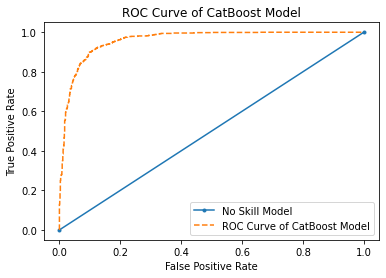

In [144]:
## Confusion Matrix
cm_CTB = confusion_matrix(y_test, predictions_testing_CTB)
print("Confusion Matrix : \n", cm_CTB)

## Classification Report
print(classification_report(y_test, predictions_testing_CTB))

## probability of falling into a particular class from each observation
probs_CTB = best_params_CTB.predict_proba(X_test_new)
probs_CTB = probs_CTB[:,1]

## AUC (Area Under Curve) Score
auc_score_CTB = roc_auc_score(y_test, probs_CTB)
print("CatBoost Model ROC AUC = ",format(auc_score_CTB,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve
fpr_CTB, tpr_CTB, __CTB = roc_curve(y_test, probs_CTB)
plt.plot(fpr_CTB, tpr_CTB, linestyle='--', label='ROC Curve of CatBoost Model')
plt.title("ROC Curve of CatBoost Model")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# Voting Classifier 

In [145]:
# import library
from sklearn.ensemble import VotingClassifier

In [146]:
# group/ensemble of models
## we'll not include Support Vector Machine as ROC curve from it has 50% area as AUC score

estimator = []
estimator.append(('LR', LogisticRegression()))  # from baseline model
estimator.append(('DTC', DecisionTreeClassifier(max_leaf_nodes=96, random_state=0)))

estimator.append(('RFC', RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, random_state=0)))

estimator.append(('XGB', XGBClassifier(n_estimators= 180, max_depth= 6, learning_rate= 0.1, random_state=0)))


estimator.append(('LGB', lgb.LGBMClassifier(lambda_l1=1, lambda_l2=1, learning_rate=0.01,
               min_data_in_leaf=50, num_boost_round=2000, num_leaves=127,
               objective='binary', random_state=0, reg_alpha=0.5)))

estimator.append(('CTB', cb.CatBoostClassifier(thread_count= 4, learning_rate= 0.03, l2_leaf_reg= 1, iterations= 1000, depth= 7, border_count= 200, random_state=0)))

In [147]:
estimator

[('LR', LogisticRegression()),
 ('DTC', DecisionTreeClassifier(max_leaf_nodes=96, random_state=0)),
 ('RFC',
  RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=5,
                         n_estimators=400, random_state=0)),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=0.1, max_delta_step=None, max_depth=6,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=180, n_jobs=None, num_parallel_tree=None,
                random_state=0, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
 ('LGB',
  LGBMClassifier(lambda_l1=1, lambda_l2=1, learning_rate=0.01,
                 min_da

## ***Soft Voting***

In [148]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting = 'soft', verbose=1)
vot_soft.fit(X_train_new, y_train)

y_pred_train_soft = vot_soft.predict(X_train_new)
y_pred_test_soft = vot_soft.predict(X_test_new)

C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (1 of 6) Processing LR, total=   0.2s
[Voting] ...................... (2 of 6) Processing DTC, total=   0.1s
[Voting] ...................... (3 of 6) Processing RFC, total=   5.3s
[16:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Koyel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[Voting] ...................... (4 of 6) Processing XGB, total=   3.0s
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[Voting] ...................... (5 of 6) Processing LGB, total=  13.2s
0:	learn: 0.6720883	total: 13.6ms	remaining: 13.6s
1:	learn: 0.6514480	total: 25.7ms	remaining: 12.8s
2:	learn: 0.6323347	total: 40.7ms	remaining: 13.5s
3:	learn: 0.6150474	total: 53ms	remaining: 13.2s
4:	learn: 0.6002256	total: 66.2ms	remaining: 13.2s
5:	learn: 0.5834109	total: 78.8ms	remaining: 13.1s
6:	learn: 0.5696956	total: 91.8ms	remaining: 13s
7:	learn: 0.5565182	total: 105ms	remaining: 13s
8:	learn: 0.5452607	total: 120ms	remaining: 13.2s
9:	learn: 0.5347106	total: 129ms	remaining: 12.8s
10:	learn: 0.5224027	total: 139ms	remaining: 12.5s
11:	learn: 0.5110045	total: 149ms	remaining: 12.2s
12:	learn: 0.5017908	total: 158ms	remaining: 12s
13:	learn: 0.4931964	total: 167ms	remaining: 11.8s
14:	learn: 0.4858259	total: 177ms	remaining: 11.6s
15:	learn: 0.4783527	total: 186ms	remaining: 11.4s
16:	learn: 0.4696614	total: 200ms	remaining: 11.5s
17:	learn: 0.4629691	total: 211ms	remaining: 11.5s
18:	learn: 0.4564558	t

168:	learn: 0.2675845	total: 1.79s	remaining: 8.8s
169:	learn: 0.2672225	total: 1.8s	remaining: 8.79s
170:	learn: 0.2668514	total: 1.81s	remaining: 8.79s
171:	learn: 0.2665855	total: 1.82s	remaining: 8.78s
172:	learn: 0.2661639	total: 1.83s	remaining: 8.76s
173:	learn: 0.2660962	total: 1.84s	remaining: 8.73s
174:	learn: 0.2657040	total: 1.85s	remaining: 8.71s
175:	learn: 0.2654777	total: 1.86s	remaining: 8.7s
176:	learn: 0.2651119	total: 1.87s	remaining: 8.68s
177:	learn: 0.2647831	total: 1.88s	remaining: 8.67s
178:	learn: 0.2643162	total: 1.89s	remaining: 8.65s
179:	learn: 0.2642358	total: 1.9s	remaining: 8.63s
180:	learn: 0.2639084	total: 1.9s	remaining: 8.62s
181:	learn: 0.2636140	total: 1.91s	remaining: 8.6s
182:	learn: 0.2634351	total: 1.92s	remaining: 8.59s
183:	learn: 0.2630371	total: 1.93s	remaining: 8.57s
184:	learn: 0.2628709	total: 1.94s	remaining: 8.56s
185:	learn: 0.2627004	total: 1.95s	remaining: 8.54s
186:	learn: 0.2625249	total: 1.97s	remaining: 8.54s
187:	learn: 0.2622

327:	learn: 0.2320648	total: 3.37s	remaining: 6.9s
328:	learn: 0.2318138	total: 3.38s	remaining: 6.89s
329:	learn: 0.2317252	total: 3.39s	remaining: 6.88s
330:	learn: 0.2316166	total: 3.4s	remaining: 6.87s
331:	learn: 0.2313095	total: 3.41s	remaining: 6.86s
332:	learn: 0.2310886	total: 3.42s	remaining: 6.85s
333:	learn: 0.2309506	total: 3.43s	remaining: 6.84s
334:	learn: 0.2308128	total: 3.44s	remaining: 6.83s
335:	learn: 0.2305897	total: 3.45s	remaining: 6.81s
336:	learn: 0.2304230	total: 3.46s	remaining: 6.8s
337:	learn: 0.2301561	total: 3.47s	remaining: 6.79s
338:	learn: 0.2298796	total: 3.48s	remaining: 6.78s
339:	learn: 0.2296574	total: 3.49s	remaining: 6.77s
340:	learn: 0.2295525	total: 3.5s	remaining: 6.76s
341:	learn: 0.2293743	total: 3.5s	remaining: 6.74s
342:	learn: 0.2292157	total: 3.52s	remaining: 6.73s
343:	learn: 0.2290030	total: 3.52s	remaining: 6.72s
344:	learn: 0.2287613	total: 3.53s	remaining: 6.71s
345:	learn: 0.2284526	total: 3.55s	remaining: 6.71s
346:	learn: 0.228

487:	learn: 0.2033740	total: 5.15s	remaining: 5.4s
488:	learn: 0.2033144	total: 5.16s	remaining: 5.39s
489:	learn: 0.2032648	total: 5.17s	remaining: 5.38s
490:	learn: 0.2031405	total: 5.18s	remaining: 5.37s
491:	learn: 0.2029709	total: 5.19s	remaining: 5.36s
492:	learn: 0.2027654	total: 5.21s	remaining: 5.35s
493:	learn: 0.2026421	total: 5.21s	remaining: 5.34s
494:	learn: 0.2024581	total: 5.22s	remaining: 5.33s
495:	learn: 0.2023195	total: 5.24s	remaining: 5.32s
496:	learn: 0.2022389	total: 5.25s	remaining: 5.31s
497:	learn: 0.2020520	total: 5.26s	remaining: 5.3s
498:	learn: 0.2019645	total: 5.27s	remaining: 5.29s
499:	learn: 0.2018968	total: 5.28s	remaining: 5.28s
500:	learn: 0.2017390	total: 5.29s	remaining: 5.27s
501:	learn: 0.2016214	total: 5.3s	remaining: 5.26s
502:	learn: 0.2014792	total: 5.31s	remaining: 5.25s
503:	learn: 0.2013689	total: 5.33s	remaining: 5.24s
504:	learn: 0.2012739	total: 5.34s	remaining: 5.24s
505:	learn: 0.2011116	total: 5.35s	remaining: 5.22s
506:	learn: 0.2

646:	learn: 0.1838033	total: 6.92s	remaining: 3.77s
647:	learn: 0.1836508	total: 6.93s	remaining: 3.76s
648:	learn: 0.1835331	total: 6.94s	remaining: 3.75s
649:	learn: 0.1834377	total: 6.95s	remaining: 3.74s
650:	learn: 0.1833573	total: 6.96s	remaining: 3.73s
651:	learn: 0.1832554	total: 6.97s	remaining: 3.72s
652:	learn: 0.1831870	total: 6.98s	remaining: 3.71s
653:	learn: 0.1830677	total: 6.99s	remaining: 3.7s
654:	learn: 0.1829002	total: 7s	remaining: 3.69s
655:	learn: 0.1828017	total: 7.01s	remaining: 3.68s
656:	learn: 0.1826426	total: 7.02s	remaining: 3.67s
657:	learn: 0.1824807	total: 7.03s	remaining: 3.65s
658:	learn: 0.1823547	total: 7.04s	remaining: 3.64s
659:	learn: 0.1823021	total: 7.05s	remaining: 3.63s
660:	learn: 0.1822455	total: 7.06s	remaining: 3.62s
661:	learn: 0.1821991	total: 7.07s	remaining: 3.61s
662:	learn: 0.1820687	total: 7.08s	remaining: 3.6s
663:	learn: 0.1819418	total: 7.1s	remaining: 3.59s
664:	learn: 0.1818215	total: 7.11s	remaining: 3.58s
665:	learn: 0.1817

807:	learn: 0.1661313	total: 8.68s	remaining: 2.06s
808:	learn: 0.1660414	total: 8.7s	remaining: 2.05s
809:	learn: 0.1659432	total: 8.71s	remaining: 2.04s
810:	learn: 0.1658001	total: 8.72s	remaining: 2.03s
811:	learn: 0.1657492	total: 8.73s	remaining: 2.02s
812:	learn: 0.1656330	total: 8.74s	remaining: 2.01s
813:	learn: 0.1654092	total: 8.75s	remaining: 2s
814:	learn: 0.1653354	total: 8.76s	remaining: 1.99s
815:	learn: 0.1652301	total: 8.77s	remaining: 1.98s
816:	learn: 0.1651385	total: 8.78s	remaining: 1.97s
817:	learn: 0.1650304	total: 8.79s	remaining: 1.96s
818:	learn: 0.1649930	total: 8.8s	remaining: 1.94s
819:	learn: 0.1648671	total: 8.81s	remaining: 1.93s
820:	learn: 0.1648382	total: 8.82s	remaining: 1.92s
821:	learn: 0.1647702	total: 8.83s	remaining: 1.91s
822:	learn: 0.1646745	total: 8.84s	remaining: 1.9s
823:	learn: 0.1645643	total: 8.86s	remaining: 1.89s
824:	learn: 0.1645134	total: 8.87s	remaining: 1.88s
825:	learn: 0.1644466	total: 8.88s	remaining: 1.87s
826:	learn: 0.1643

971:	learn: 0.1510692	total: 10.4s	remaining: 301ms
972:	learn: 0.1509815	total: 10.5s	remaining: 290ms
973:	learn: 0.1508861	total: 10.5s	remaining: 280ms
974:	learn: 0.1507383	total: 10.5s	remaining: 269ms
975:	learn: 0.1506967	total: 10.5s	remaining: 258ms
976:	learn: 0.1506133	total: 10.5s	remaining: 247ms
977:	learn: 0.1505056	total: 10.5s	remaining: 236ms
978:	learn: 0.1504468	total: 10.5s	remaining: 226ms
979:	learn: 0.1503499	total: 10.5s	remaining: 215ms
980:	learn: 0.1502067	total: 10.5s	remaining: 204ms
981:	learn: 0.1501049	total: 10.6s	remaining: 193ms
982:	learn: 0.1500593	total: 10.6s	remaining: 183ms
983:	learn: 0.1499582	total: 10.6s	remaining: 172ms
984:	learn: 0.1498323	total: 10.6s	remaining: 161ms
985:	learn: 0.1497350	total: 10.6s	remaining: 150ms
986:	learn: 0.1496812	total: 10.6s	remaining: 140ms
987:	learn: 0.1495769	total: 10.6s	remaining: 129ms
988:	learn: 0.1494817	total: 10.6s	remaining: 118ms
989:	learn: 0.1494477	total: 10.6s	remaining: 107ms
990:	learn: 

In [149]:
# using accuracy_score metric to predict accuracy
training_accuracy_soft = accuracy_score(y_train, y_pred_train_soft)
score=cross_val_score(VotingClassifier(estimators = estimator, voting = 'soft', verbose=1),X_train_new, y_train, cv=5)
training_accuracy_soft_CV=score.mean()
testing_accuracy_soft = accuracy_score(y_test, y_pred_test_soft)

print("Training accuracy after applying Voting(soft) Classifier: ", format(training_accuracy_soft,"0.2f"))
print("Training accuracy of Voting (Soft) Classifier after Cross Validation: ", format(training_accuracy_soft_CV,"0.2f"))
print("Testing accuracy after applying Voting(soft) Classifier: ", format(testing_accuracy_soft,"0.2f"))

C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (1 of 6) Processing LR, total=   0.2s
[Voting] ...................... (2 of 6) Processing DTC, total=   0.0s
[Voting] ...................... (3 of 6) Processing RFC, total=   4.4s
[16:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Koyel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[Voting] ...................... (4 of 6) Processing XGB, total=   2.4s
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[Voting] ...................... (5 of 6) Processing LGB, total=  10.6s
0:	learn: 0.6710553	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6505959	total: 18.9ms	remaining: 9.41s
2:	learn: 0.6306099	total: 27.7ms	remaining: 9.22s
3:	learn: 0.6149505	total: 36.2ms	remaining: 9.01s
4:	learn: 0.6003040	total: 47.5ms	remaining: 9.45s
5:	learn: 0.5842518	total: 57.2ms	remaining: 9.48s
6:	learn: 0.5701528	total: 66.7ms	remaining: 9.47s
7:	learn: 0.5570128	total: 76.6ms	remaining: 9.49s
8:	learn: 0.5444250	total: 86.1ms	remaining: 9.48s
9:	learn: 0.5338334	total: 96.1ms	remaining: 9.51s
10:	learn: 0.5234155	total: 107ms	remaining: 9.6s
11:	learn: 0.5122038	total: 120ms	remaining: 9.84s
12:	learn: 0.5026138	total: 131ms	remaining: 9.91s
13:	learn: 0.4935636	total: 142ms	remaining: 9.98s
14:	learn: 0.4855920	total: 154ms	remaining: 10.1s
15:	learn: 0.4774759	total: 166ms	remaining: 10.2s
16:	learn: 0.4685793	total: 180ms	remaining: 10.4s
17:	learn: 0.4609476	total: 188ms	remaining: 10.3s
18:	learn: 0

173:	learn: 0.2601780	total: 1.64s	remaining: 7.79s
174:	learn: 0.2599426	total: 1.65s	remaining: 7.79s
175:	learn: 0.2597635	total: 1.66s	remaining: 7.78s
176:	learn: 0.2596010	total: 1.67s	remaining: 7.77s
177:	learn: 0.2590740	total: 1.68s	remaining: 7.76s
178:	learn: 0.2588342	total: 1.69s	remaining: 7.74s
179:	learn: 0.2587136	total: 1.7s	remaining: 7.73s
180:	learn: 0.2585996	total: 1.71s	remaining: 7.72s
181:	learn: 0.2581422	total: 1.71s	remaining: 7.7s
182:	learn: 0.2578806	total: 1.72s	remaining: 7.69s
183:	learn: 0.2574556	total: 1.73s	remaining: 7.68s
184:	learn: 0.2570273	total: 1.74s	remaining: 7.66s
185:	learn: 0.2568843	total: 1.75s	remaining: 7.65s
186:	learn: 0.2565453	total: 1.76s	remaining: 7.64s
187:	learn: 0.2560253	total: 1.76s	remaining: 7.63s
188:	learn: 0.2557231	total: 1.77s	remaining: 7.61s
189:	learn: 0.2553357	total: 1.78s	remaining: 7.6s
190:	learn: 0.2550013	total: 1.79s	remaining: 7.59s
191:	learn: 0.2548239	total: 1.8s	remaining: 7.57s
192:	learn: 0.25

332:	learn: 0.2241551	total: 3.05s	remaining: 6.1s
333:	learn: 0.2238331	total: 3.06s	remaining: 6.09s
334:	learn: 0.2235605	total: 3.07s	remaining: 6.09s
335:	learn: 0.2233864	total: 3.08s	remaining: 6.08s
336:	learn: 0.2230687	total: 3.08s	remaining: 6.07s
337:	learn: 0.2229628	total: 3.09s	remaining: 6.06s
338:	learn: 0.2227600	total: 3.1s	remaining: 6.05s
339:	learn: 0.2224735	total: 3.11s	remaining: 6.04s
340:	learn: 0.2222171	total: 3.12s	remaining: 6.03s
341:	learn: 0.2218716	total: 3.13s	remaining: 6.02s
342:	learn: 0.2217142	total: 3.14s	remaining: 6.01s
343:	learn: 0.2212834	total: 3.15s	remaining: 6s
344:	learn: 0.2212067	total: 3.15s	remaining: 5.99s
345:	learn: 0.2208924	total: 3.16s	remaining: 5.98s
346:	learn: 0.2205911	total: 3.17s	remaining: 5.97s
347:	learn: 0.2204012	total: 3.18s	remaining: 5.96s
348:	learn: 0.2200615	total: 3.19s	remaining: 5.95s
349:	learn: 0.2198153	total: 3.2s	remaining: 5.94s
350:	learn: 0.2195898	total: 3.21s	remaining: 5.93s
351:	learn: 0.2193

507:	learn: 0.1904397	total: 4.62s	remaining: 4.48s
508:	learn: 0.1902685	total: 4.63s	remaining: 4.47s
509:	learn: 0.1901442	total: 4.64s	remaining: 4.46s
510:	learn: 0.1899592	total: 4.66s	remaining: 4.46s
511:	learn: 0.1898407	total: 4.67s	remaining: 4.45s
512:	learn: 0.1896412	total: 4.68s	remaining: 4.44s
513:	learn: 0.1894400	total: 4.69s	remaining: 4.43s
514:	learn: 0.1892949	total: 4.7s	remaining: 4.42s
515:	learn: 0.1890105	total: 4.71s	remaining: 4.41s
516:	learn: 0.1889354	total: 4.71s	remaining: 4.4s
517:	learn: 0.1888051	total: 4.72s	remaining: 4.39s
518:	learn: 0.1886267	total: 4.73s	remaining: 4.38s
519:	learn: 0.1885150	total: 4.74s	remaining: 4.37s
520:	learn: 0.1883585	total: 4.75s	remaining: 4.36s
521:	learn: 0.1882371	total: 4.76s	remaining: 4.36s
522:	learn: 0.1880919	total: 4.76s	remaining: 4.34s
523:	learn: 0.1879121	total: 4.77s	remaining: 4.33s
524:	learn: 0.1877953	total: 4.78s	remaining: 4.33s
525:	learn: 0.1876545	total: 4.79s	remaining: 4.32s
526:	learn: 0.

677:	learn: 0.1672192	total: 6.2s	remaining: 2.94s
678:	learn: 0.1671227	total: 6.21s	remaining: 2.94s
679:	learn: 0.1669395	total: 6.22s	remaining: 2.93s
680:	learn: 0.1668582	total: 6.23s	remaining: 2.92s
681:	learn: 0.1667319	total: 6.24s	remaining: 2.91s
682:	learn: 0.1666144	total: 6.25s	remaining: 2.9s
683:	learn: 0.1665212	total: 6.26s	remaining: 2.89s
684:	learn: 0.1664135	total: 6.27s	remaining: 2.88s
685:	learn: 0.1663331	total: 6.28s	remaining: 2.87s
686:	learn: 0.1661761	total: 6.29s	remaining: 2.86s
687:	learn: 0.1661122	total: 6.29s	remaining: 2.85s
688:	learn: 0.1660377	total: 6.3s	remaining: 2.84s
689:	learn: 0.1659284	total: 6.31s	remaining: 2.83s
690:	learn: 0.1658993	total: 6.32s	remaining: 2.83s
691:	learn: 0.1656445	total: 6.33s	remaining: 2.82s
692:	learn: 0.1655436	total: 6.34s	remaining: 2.81s
693:	learn: 0.1654419	total: 6.34s	remaining: 2.8s
694:	learn: 0.1653194	total: 6.35s	remaining: 2.79s
695:	learn: 0.1652025	total: 6.36s	remaining: 2.78s
696:	learn: 0.16

852:	learn: 0.1480405	total: 7.78s	remaining: 1.34s
853:	learn: 0.1479425	total: 7.79s	remaining: 1.33s
854:	learn: 0.1477488	total: 7.8s	remaining: 1.32s
855:	learn: 0.1475992	total: 7.81s	remaining: 1.31s
856:	learn: 0.1475068	total: 7.82s	remaining: 1.3s
857:	learn: 0.1474592	total: 7.83s	remaining: 1.29s
858:	learn: 0.1474029	total: 7.84s	remaining: 1.29s
859:	learn: 0.1473499	total: 7.85s	remaining: 1.28s
860:	learn: 0.1473145	total: 7.85s	remaining: 1.27s
861:	learn: 0.1472855	total: 7.86s	remaining: 1.26s
862:	learn: 0.1471752	total: 7.87s	remaining: 1.25s
863:	learn: 0.1470560	total: 7.88s	remaining: 1.24s
864:	learn: 0.1470155	total: 7.89s	remaining: 1.23s
865:	learn: 0.1469491	total: 7.89s	remaining: 1.22s
866:	learn: 0.1468889	total: 7.9s	remaining: 1.21s
867:	learn: 0.1467087	total: 7.91s	remaining: 1.2s
868:	learn: 0.1465502	total: 7.92s	remaining: 1.19s
869:	learn: 0.1464575	total: 7.93s	remaining: 1.18s
870:	learn: 0.1464027	total: 7.94s	remaining: 1.18s
871:	learn: 0.14

C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (1 of 6) Processing LR, total=   0.2s
[Voting] ...................... (2 of 6) Processing DTC, total=   0.0s
[Voting] ...................... (3 of 6) Processing RFC, total=   4.3s
[16:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Koyel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[Voting] ...................... (4 of 6) Processing XGB, total=   2.3s
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[Voting] ...................... (5 of 6) Processing LGB, total=  10.4s
0:	learn: 0.6718293	total: 12.7ms	remaining: 12.7s
1:	learn: 0.6506916	total: 24.4ms	remaining: 12.2s
2:	learn: 0.6302460	total: 36.8ms	remaining: 12.2s
3:	learn: 0.6137200	total: 48.3ms	remaining: 12s
4:	learn: 0.5990682	total: 61.9ms	remaining: 12.3s
5:	learn: 0.5816296	total: 70.5ms	remaining: 11.7s
6:	learn: 0.5677892	total: 79.3ms	remaining: 11.2s
7:	learn: 0.5541454	total: 87.9ms	remaining: 10.9s
8:	learn: 0.5433993	total: 96.7ms	remaining: 10.6s
9:	learn: 0.5324462	total: 106ms	remaining: 10.5s
10:	learn: 0.5198107	total: 114ms	remaining: 10.3s
11:	learn: 0.5095400	total: 123ms	remaining: 10.1s
12:	learn: 0.5005001	total: 131ms	remaining: 9.96s
13:	learn: 0.4916522	total: 140ms	remaining: 9.85s
14:	learn: 0.4832125	total: 149ms	remaining: 9.78s
15:	learn: 0.4752355	total: 157ms	remaining: 9.67s
16:	learn: 0.4684353	total: 166ms	remaining: 9.59s
17:	learn: 0.4608468	total: 174ms	remaining: 9.51s
18:	learn: 0.4

173:	learn: 0.2591470	total: 1.6s	remaining: 7.61s
174:	learn: 0.2587260	total: 1.61s	remaining: 7.61s
175:	learn: 0.2584263	total: 1.62s	remaining: 7.61s
176:	learn: 0.2581746	total: 1.63s	remaining: 7.6s
177:	learn: 0.2580001	total: 1.64s	remaining: 7.58s
178:	learn: 0.2575050	total: 1.65s	remaining: 7.58s
179:	learn: 0.2571802	total: 1.66s	remaining: 7.57s
180:	learn: 0.2568862	total: 1.67s	remaining: 7.55s
181:	learn: 0.2566542	total: 1.68s	remaining: 7.54s
182:	learn: 0.2564919	total: 1.69s	remaining: 7.53s
183:	learn: 0.2561534	total: 1.7s	remaining: 7.52s
184:	learn: 0.2558055	total: 1.7s	remaining: 7.51s
185:	learn: 0.2554204	total: 1.71s	remaining: 7.5s
186:	learn: 0.2552952	total: 1.72s	remaining: 7.49s
187:	learn: 0.2550547	total: 1.73s	remaining: 7.47s
188:	learn: 0.2548513	total: 1.74s	remaining: 7.46s
189:	learn: 0.2544626	total: 1.75s	remaining: 7.45s
190:	learn: 0.2543054	total: 1.76s	remaining: 7.44s
191:	learn: 0.2541137	total: 1.76s	remaining: 7.43s
192:	learn: 0.253

346:	learn: 0.2188941	total: 3.18s	remaining: 5.99s
347:	learn: 0.2186605	total: 3.19s	remaining: 5.98s
348:	learn: 0.2184138	total: 3.2s	remaining: 5.98s
349:	learn: 0.2181090	total: 3.21s	remaining: 5.97s
350:	learn: 0.2178430	total: 3.22s	remaining: 5.96s
351:	learn: 0.2177018	total: 3.23s	remaining: 5.95s
352:	learn: 0.2175083	total: 3.24s	remaining: 5.94s
353:	learn: 0.2173252	total: 3.25s	remaining: 5.93s
354:	learn: 0.2171071	total: 3.26s	remaining: 5.92s
355:	learn: 0.2169130	total: 3.27s	remaining: 5.91s
356:	learn: 0.2166623	total: 3.28s	remaining: 5.9s
357:	learn: 0.2164057	total: 3.29s	remaining: 5.89s
358:	learn: 0.2160842	total: 3.29s	remaining: 5.88s
359:	learn: 0.2159269	total: 3.3s	remaining: 5.87s
360:	learn: 0.2157512	total: 3.31s	remaining: 5.86s
361:	learn: 0.2154905	total: 3.32s	remaining: 5.85s
362:	learn: 0.2152860	total: 3.33s	remaining: 5.84s
363:	learn: 0.2152466	total: 3.34s	remaining: 5.83s
364:	learn: 0.2149072	total: 3.35s	remaining: 5.83s
365:	learn: 0.2

518:	learn: 0.1889409	total: 4.75s	remaining: 4.4s
519:	learn: 0.1888657	total: 4.76s	remaining: 4.39s
520:	learn: 0.1887486	total: 4.77s	remaining: 4.39s
521:	learn: 0.1885584	total: 4.78s	remaining: 4.38s
522:	learn: 0.1884131	total: 4.79s	remaining: 4.37s
523:	learn: 0.1882605	total: 4.8s	remaining: 4.36s
524:	learn: 0.1880983	total: 4.81s	remaining: 4.35s
525:	learn: 0.1879144	total: 4.82s	remaining: 4.34s
526:	learn: 0.1877612	total: 4.83s	remaining: 4.33s
527:	learn: 0.1876146	total: 4.83s	remaining: 4.32s
528:	learn: 0.1875389	total: 4.84s	remaining: 4.31s
529:	learn: 0.1874058	total: 4.85s	remaining: 4.3s
530:	learn: 0.1872866	total: 4.86s	remaining: 4.29s
531:	learn: 0.1870932	total: 4.87s	remaining: 4.28s
532:	learn: 0.1869276	total: 4.88s	remaining: 4.27s
533:	learn: 0.1867353	total: 4.89s	remaining: 4.26s
534:	learn: 0.1865556	total: 4.89s	remaining: 4.25s
535:	learn: 0.1864842	total: 4.9s	remaining: 4.25s
536:	learn: 0.1862702	total: 4.91s	remaining: 4.24s
537:	learn: 0.18

691:	learn: 0.1660687	total: 6.33s	remaining: 2.82s
692:	learn: 0.1659653	total: 6.34s	remaining: 2.81s
693:	learn: 0.1658477	total: 6.35s	remaining: 2.8s
694:	learn: 0.1657246	total: 6.36s	remaining: 2.79s
695:	learn: 0.1656278	total: 6.37s	remaining: 2.78s
696:	learn: 0.1654736	total: 6.38s	remaining: 2.77s
697:	learn: 0.1652490	total: 6.39s	remaining: 2.76s
698:	learn: 0.1651330	total: 6.39s	remaining: 2.75s
699:	learn: 0.1649437	total: 6.4s	remaining: 2.74s
700:	learn: 0.1647429	total: 6.41s	remaining: 2.73s
701:	learn: 0.1646545	total: 6.42s	remaining: 2.73s
702:	learn: 0.1645465	total: 6.43s	remaining: 2.72s
703:	learn: 0.1644687	total: 6.44s	remaining: 2.71s
704:	learn: 0.1643428	total: 6.45s	remaining: 2.7s
705:	learn: 0.1641891	total: 6.46s	remaining: 2.69s
706:	learn: 0.1640054	total: 6.46s	remaining: 2.68s
707:	learn: 0.1638702	total: 6.47s	remaining: 2.67s
708:	learn: 0.1637749	total: 6.48s	remaining: 2.66s
709:	learn: 0.1636437	total: 6.49s	remaining: 2.65s
710:	learn: 0.1

862:	learn: 0.1478154	total: 7.9s	remaining: 1.25s
863:	learn: 0.1477204	total: 7.91s	remaining: 1.25s
864:	learn: 0.1476751	total: 7.92s	remaining: 1.24s
865:	learn: 0.1475587	total: 7.93s	remaining: 1.23s
866:	learn: 0.1474918	total: 7.95s	remaining: 1.22s
867:	learn: 0.1474242	total: 7.96s	remaining: 1.21s
868:	learn: 0.1473415	total: 7.96s	remaining: 1.2s
869:	learn: 0.1472067	total: 7.97s	remaining: 1.19s
870:	learn: 0.1471286	total: 7.98s	remaining: 1.18s
871:	learn: 0.1470367	total: 7.99s	remaining: 1.17s
872:	learn: 0.1469469	total: 8s	remaining: 1.16s
873:	learn: 0.1468162	total: 8.01s	remaining: 1.15s
874:	learn: 0.1466352	total: 8.02s	remaining: 1.15s
875:	learn: 0.1465632	total: 8.03s	remaining: 1.14s
876:	learn: 0.1464935	total: 8.03s	remaining: 1.13s
877:	learn: 0.1463940	total: 8.04s	remaining: 1.12s
878:	learn: 0.1463259	total: 8.05s	remaining: 1.11s
879:	learn: 0.1461949	total: 8.06s	remaining: 1.1s
880:	learn: 0.1461269	total: 8.07s	remaining: 1.09s
881:	learn: 0.1460

C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (1 of 6) Processing LR, total=   0.2s
[Voting] ...................... (2 of 6) Processing DTC, total=   0.0s
[Voting] ...................... (3 of 6) Processing RFC, total=   4.3s
[16:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Koyel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[Voting] ...................... (4 of 6) Processing XGB, total=   2.3s
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[Voting] ...................... (5 of 6) Processing LGB, total=  10.6s
0:	learn: 0.6722329	total: 14.3ms	remaining: 14.2s
1:	learn: 0.6510914	total: 27.1ms	remaining: 13.5s
2:	learn: 0.6333036	total: 39.5ms	remaining: 13.1s
3:	learn: 0.6167548	total: 51.2ms	remaining: 12.8s
4:	learn: 0.6030783	total: 65.6ms	remaining: 13.1s
5:	learn: 0.5879982	total: 74.8ms	remaining: 12.4s
6:	learn: 0.5745316	total: 85ms	remaining: 12.1s
7:	learn: 0.5608353	total: 93.9ms	remaining: 11.6s
8:	learn: 0.5488392	total: 102ms	remaining: 11.3s
9:	learn: 0.5368519	total: 111ms	remaining: 11s
10:	learn: 0.5279327	total: 120ms	remaining: 10.8s
11:	learn: 0.5192574	total: 129ms	remaining: 10.6s
12:	learn: 0.5094574	total: 137ms	remaining: 10.4s
13:	learn: 0.4978134	total: 146ms	remaining: 10.3s
14:	learn: 0.4900682	total: 154ms	remaining: 10.1s
15:	learn: 0.4814302	total: 163ms	remaining: 10s
16:	learn: 0.4723716	total: 173ms	remaining: 9.98s
17:	learn: 0.4657767	total: 181ms	remaining: 9.89s
18:	learn: 0.458379

173:	learn: 0.2656509	total: 1.6s	remaining: 7.58s
174:	learn: 0.2652827	total: 1.61s	remaining: 7.58s
175:	learn: 0.2649330	total: 1.62s	remaining: 7.58s
176:	learn: 0.2646651	total: 1.63s	remaining: 7.57s
177:	learn: 0.2641432	total: 1.64s	remaining: 7.55s
178:	learn: 0.2639379	total: 1.65s	remaining: 7.55s
179:	learn: 0.2635756	total: 1.65s	remaining: 7.53s
180:	learn: 0.2634065	total: 1.66s	remaining: 7.52s
181:	learn: 0.2630033	total: 1.67s	remaining: 7.51s
182:	learn: 0.2626084	total: 1.68s	remaining: 7.5s
183:	learn: 0.2623503	total: 1.69s	remaining: 7.49s
184:	learn: 0.2620516	total: 1.7s	remaining: 7.48s
185:	learn: 0.2618135	total: 1.71s	remaining: 7.46s
186:	learn: 0.2614379	total: 1.71s	remaining: 7.45s
187:	learn: 0.2612101	total: 1.72s	remaining: 7.44s
188:	learn: 0.2611036	total: 1.73s	remaining: 7.43s
189:	learn: 0.2609187	total: 1.74s	remaining: 7.42s
190:	learn: 0.2606842	total: 1.75s	remaining: 7.41s
191:	learn: 0.2601921	total: 1.76s	remaining: 7.4s
192:	learn: 0.25

346:	learn: 0.2203585	total: 3.17s	remaining: 5.97s
347:	learn: 0.2201534	total: 3.18s	remaining: 5.96s
348:	learn: 0.2198053	total: 3.2s	remaining: 5.96s
349:	learn: 0.2196109	total: 3.21s	remaining: 5.95s
350:	learn: 0.2193583	total: 3.21s	remaining: 5.94s
351:	learn: 0.2190481	total: 3.22s	remaining: 5.93s
352:	learn: 0.2188319	total: 3.23s	remaining: 5.92s
353:	learn: 0.2184477	total: 3.24s	remaining: 5.92s
354:	learn: 0.2182000	total: 3.25s	remaining: 5.9s
355:	learn: 0.2180319	total: 3.26s	remaining: 5.89s
356:	learn: 0.2177361	total: 3.27s	remaining: 5.88s
357:	learn: 0.2175300	total: 3.28s	remaining: 5.88s
358:	learn: 0.2172408	total: 3.28s	remaining: 5.87s
359:	learn: 0.2170396	total: 3.29s	remaining: 5.86s
360:	learn: 0.2168998	total: 3.3s	remaining: 5.84s
361:	learn: 0.2165925	total: 3.31s	remaining: 5.83s
362:	learn: 0.2162897	total: 3.32s	remaining: 5.82s
363:	learn: 0.2161447	total: 3.33s	remaining: 5.82s
364:	learn: 0.2159771	total: 3.34s	remaining: 5.8s
365:	learn: 0.21

518:	learn: 0.1883615	total: 4.75s	remaining: 4.4s
519:	learn: 0.1881999	total: 4.76s	remaining: 4.39s
520:	learn: 0.1880389	total: 4.77s	remaining: 4.38s
521:	learn: 0.1878762	total: 4.78s	remaining: 4.38s
522:	learn: 0.1876158	total: 4.79s	remaining: 4.37s
523:	learn: 0.1875305	total: 4.79s	remaining: 4.36s
524:	learn: 0.1873524	total: 4.8s	remaining: 4.35s
525:	learn: 0.1872257	total: 4.81s	remaining: 4.34s
526:	learn: 0.1870355	total: 4.82s	remaining: 4.33s
527:	learn: 0.1869068	total: 4.83s	remaining: 4.32s
528:	learn: 0.1868228	total: 4.84s	remaining: 4.31s
529:	learn: 0.1867239	total: 4.85s	remaining: 4.3s
530:	learn: 0.1864564	total: 4.86s	remaining: 4.29s
531:	learn: 0.1862812	total: 4.87s	remaining: 4.28s
532:	learn: 0.1862061	total: 4.88s	remaining: 4.27s
533:	learn: 0.1859762	total: 4.88s	remaining: 4.26s
534:	learn: 0.1858026	total: 4.89s	remaining: 4.25s
535:	learn: 0.1857472	total: 4.9s	remaining: 4.24s
536:	learn: 0.1856433	total: 4.91s	remaining: 4.23s
537:	learn: 0.18

690:	learn: 0.1653130	total: 6.32s	remaining: 2.83s
691:	learn: 0.1651612	total: 6.33s	remaining: 2.82s
692:	learn: 0.1650199	total: 6.35s	remaining: 2.81s
693:	learn: 0.1649125	total: 6.36s	remaining: 2.8s
694:	learn: 0.1648137	total: 6.37s	remaining: 2.79s
695:	learn: 0.1646429	total: 6.37s	remaining: 2.78s
696:	learn: 0.1644865	total: 6.38s	remaining: 2.77s
697:	learn: 0.1643380	total: 6.39s	remaining: 2.77s
698:	learn: 0.1642540	total: 6.4s	remaining: 2.76s
699:	learn: 0.1641055	total: 6.41s	remaining: 2.75s
700:	learn: 0.1640120	total: 6.42s	remaining: 2.74s
701:	learn: 0.1638740	total: 6.43s	remaining: 2.73s
702:	learn: 0.1637023	total: 6.44s	remaining: 2.72s
703:	learn: 0.1634360	total: 6.44s	remaining: 2.71s
704:	learn: 0.1633309	total: 6.45s	remaining: 2.7s
705:	learn: 0.1632363	total: 6.46s	remaining: 2.69s
706:	learn: 0.1630596	total: 6.47s	remaining: 2.68s
707:	learn: 0.1629349	total: 6.48s	remaining: 2.67s
708:	learn: 0.1628481	total: 6.49s	remaining: 2.66s
709:	learn: 0.1

860:	learn: 0.1456977	total: 7.9s	remaining: 1.27s
861:	learn: 0.1456103	total: 7.91s	remaining: 1.26s
862:	learn: 0.1454999	total: 7.92s	remaining: 1.26s
863:	learn: 0.1453812	total: 7.93s	remaining: 1.25s
864:	learn: 0.1452371	total: 7.93s	remaining: 1.24s
865:	learn: 0.1451113	total: 7.95s	remaining: 1.23s
866:	learn: 0.1450183	total: 7.95s	remaining: 1.22s
867:	learn: 0.1449104	total: 7.96s	remaining: 1.21s
868:	learn: 0.1447862	total: 7.97s	remaining: 1.2s
869:	learn: 0.1446972	total: 7.98s	remaining: 1.19s
870:	learn: 0.1445876	total: 7.99s	remaining: 1.18s
871:	learn: 0.1444864	total: 8s	remaining: 1.17s
872:	learn: 0.1443599	total: 8.01s	remaining: 1.16s
873:	learn: 0.1442635	total: 8.02s	remaining: 1.16s
874:	learn: 0.1441575	total: 8.02s	remaining: 1.15s
875:	learn: 0.1440754	total: 8.03s	remaining: 1.14s
876:	learn: 0.1439430	total: 8.04s	remaining: 1.13s
877:	learn: 0.1438406	total: 8.05s	remaining: 1.12s
878:	learn: 0.1437471	total: 8.06s	remaining: 1.11s
879:	learn: 0.143

C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (1 of 6) Processing LR, total=   0.2s
[Voting] ...................... (2 of 6) Processing DTC, total=   0.0s
[Voting] ...................... (3 of 6) Processing RFC, total=   4.6s
[16:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Koyel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[Voting] ...................... (4 of 6) Processing XGB, total=   2.3s
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[Voting] ...................... (5 of 6) Processing LGB, total=  10.7s
0:	learn: 0.6723211	total: 9.33ms	remaining: 9.32s
1:	learn: 0.6516287	total: 18.5ms	remaining: 9.22s
2:	learn: 0.6337320	total: 27.9ms	remaining: 9.29s
3:	learn: 0.6173959	total: 36.8ms	remaining: 9.15s
4:	learn: 0.6027692	total: 45.1ms	remaining: 8.98s
5:	learn: 0.5875055	total: 53.9ms	remaining: 8.93s
6:	learn: 0.5737308	total: 62.4ms	remaining: 8.85s
7:	learn: 0.5623585	total: 71.3ms	remaining: 8.84s
8:	learn: 0.5516080	total: 79.5ms	remaining: 8.76s
9:	learn: 0.5393734	total: 88.4ms	remaining: 8.75s
10:	learn: 0.5272932	total: 96.7ms	remaining: 8.69s
11:	learn: 0.5163490	total: 105ms	remaining: 8.67s
12:	learn: 0.5070372	total: 114ms	remaining: 8.66s
13:	learn: 0.4983095	total: 123ms	remaining: 8.66s
14:	learn: 0.4895951	total: 132ms	remaining: 8.65s
15:	learn: 0.4816262	total: 140ms	remaining: 8.63s
16:	learn: 0.4728171	total: 149ms	remaining: 8.64s
17:	learn: 0.4655600	total: 158ms	remaining: 8.6s
18:	learn: 

173:	learn: 0.2642565	total: 1.59s	remaining: 7.55s
174:	learn: 0.2638635	total: 1.6s	remaining: 7.55s
175:	learn: 0.2633585	total: 1.61s	remaining: 7.55s
176:	learn: 0.2631761	total: 1.62s	remaining: 7.54s
177:	learn: 0.2629185	total: 1.63s	remaining: 7.53s
178:	learn: 0.2622531	total: 1.64s	remaining: 7.52s
179:	learn: 0.2620502	total: 1.65s	remaining: 7.51s
180:	learn: 0.2619097	total: 1.66s	remaining: 7.5s
181:	learn: 0.2617040	total: 1.67s	remaining: 7.48s
182:	learn: 0.2612373	total: 1.67s	remaining: 7.47s
183:	learn: 0.2610169	total: 1.68s	remaining: 7.46s
184:	learn: 0.2607891	total: 1.69s	remaining: 7.45s
185:	learn: 0.2604837	total: 1.7s	remaining: 7.44s
186:	learn: 0.2601613	total: 1.71s	remaining: 7.42s
187:	learn: 0.2594989	total: 1.72s	remaining: 7.42s
188:	learn: 0.2590704	total: 1.73s	remaining: 7.4s
189:	learn: 0.2589080	total: 1.73s	remaining: 7.39s
190:	learn: 0.2587091	total: 1.74s	remaining: 7.38s
191:	learn: 0.2584950	total: 1.75s	remaining: 7.37s
192:	learn: 0.25

346:	learn: 0.2214093	total: 3.16s	remaining: 5.95s
347:	learn: 0.2212517	total: 3.17s	remaining: 5.95s
348:	learn: 0.2210929	total: 3.19s	remaining: 5.94s
349:	learn: 0.2208342	total: 3.19s	remaining: 5.93s
350:	learn: 0.2206136	total: 3.2s	remaining: 5.92s
351:	learn: 0.2203429	total: 3.21s	remaining: 5.92s
352:	learn: 0.2200844	total: 3.22s	remaining: 5.91s
353:	learn: 0.2199255	total: 3.23s	remaining: 5.9s
354:	learn: 0.2196736	total: 3.24s	remaining: 5.89s
355:	learn: 0.2195348	total: 3.25s	remaining: 5.88s
356:	learn: 0.2193287	total: 3.26s	remaining: 5.87s
357:	learn: 0.2191314	total: 3.27s	remaining: 5.86s
358:	learn: 0.2189361	total: 3.27s	remaining: 5.85s
359:	learn: 0.2186231	total: 3.28s	remaining: 5.84s
360:	learn: 0.2183903	total: 3.29s	remaining: 5.83s
361:	learn: 0.2181621	total: 3.3s	remaining: 5.82s
362:	learn: 0.2179094	total: 3.31s	remaining: 5.81s
363:	learn: 0.2177695	total: 3.32s	remaining: 5.8s
364:	learn: 0.2176367	total: 3.33s	remaining: 5.79s
365:	learn: 0.21

518:	learn: 0.1916323	total: 4.73s	remaining: 4.39s
519:	learn: 0.1914635	total: 4.74s	remaining: 4.38s
520:	learn: 0.1913404	total: 4.75s	remaining: 4.37s
521:	learn: 0.1912409	total: 4.76s	remaining: 4.36s
522:	learn: 0.1910769	total: 4.77s	remaining: 4.35s
523:	learn: 0.1908477	total: 4.78s	remaining: 4.34s
524:	learn: 0.1906548	total: 4.79s	remaining: 4.33s
525:	learn: 0.1905165	total: 4.8s	remaining: 4.33s
526:	learn: 0.1903319	total: 4.81s	remaining: 4.32s
527:	learn: 0.1901389	total: 4.82s	remaining: 4.31s
528:	learn: 0.1900300	total: 4.83s	remaining: 4.3s
529:	learn: 0.1898931	total: 4.83s	remaining: 4.29s
530:	learn: 0.1897747	total: 4.84s	remaining: 4.28s
531:	learn: 0.1897044	total: 4.85s	remaining: 4.27s
532:	learn: 0.1895114	total: 4.86s	remaining: 4.26s
533:	learn: 0.1893987	total: 4.87s	remaining: 4.25s
534:	learn: 0.1892695	total: 4.88s	remaining: 4.24s
535:	learn: 0.1891347	total: 4.89s	remaining: 4.23s
536:	learn: 0.1890542	total: 4.89s	remaining: 4.22s
537:	learn: 0.

686:	learn: 0.1685678	total: 6.31s	remaining: 2.88s
687:	learn: 0.1684318	total: 6.33s	remaining: 2.87s
688:	learn: 0.1682940	total: 6.34s	remaining: 2.86s
689:	learn: 0.1682277	total: 6.36s	remaining: 2.85s
690:	learn: 0.1681558	total: 6.37s	remaining: 2.85s
691:	learn: 0.1680012	total: 6.38s	remaining: 2.84s
692:	learn: 0.1678367	total: 6.39s	remaining: 2.83s
693:	learn: 0.1677177	total: 6.4s	remaining: 2.82s
694:	learn: 0.1675038	total: 6.41s	remaining: 2.81s
695:	learn: 0.1674092	total: 6.42s	remaining: 2.81s
696:	learn: 0.1673191	total: 6.43s	remaining: 2.8s
697:	learn: 0.1672233	total: 6.44s	remaining: 2.79s
698:	learn: 0.1670592	total: 6.45s	remaining: 2.78s
699:	learn: 0.1668570	total: 6.46s	remaining: 2.77s
700:	learn: 0.1667198	total: 6.47s	remaining: 2.76s
701:	learn: 0.1666463	total: 6.48s	remaining: 2.75s
702:	learn: 0.1665051	total: 6.49s	remaining: 2.74s
703:	learn: 0.1663916	total: 6.5s	remaining: 2.73s
704:	learn: 0.1662734	total: 6.51s	remaining: 2.72s
705:	learn: 0.1

861:	learn: 0.1474473	total: 8.05s	remaining: 1.29s
862:	learn: 0.1473126	total: 8.06s	remaining: 1.28s
863:	learn: 0.1472075	total: 8.07s	remaining: 1.27s
864:	learn: 0.1470683	total: 8.09s	remaining: 1.26s
865:	learn: 0.1468802	total: 8.1s	remaining: 1.25s
866:	learn: 0.1467991	total: 8.11s	remaining: 1.24s
867:	learn: 0.1467043	total: 8.12s	remaining: 1.23s
868:	learn: 0.1465565	total: 8.13s	remaining: 1.22s
869:	learn: 0.1464740	total: 8.14s	remaining: 1.22s
870:	learn: 0.1463513	total: 8.15s	remaining: 1.21s
871:	learn: 0.1462701	total: 8.16s	remaining: 1.2s
872:	learn: 0.1461512	total: 8.17s	remaining: 1.19s
873:	learn: 0.1460401	total: 8.18s	remaining: 1.18s
874:	learn: 0.1459001	total: 8.19s	remaining: 1.17s
875:	learn: 0.1457711	total: 8.2s	remaining: 1.16s
876:	learn: 0.1456484	total: 8.21s	remaining: 1.15s
877:	learn: 0.1455065	total: 8.21s	remaining: 1.14s
878:	learn: 0.1454498	total: 8.22s	remaining: 1.13s
879:	learn: 0.1453703	total: 8.24s	remaining: 1.12s
880:	learn: 0.1

C:\Users\Koyel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (1 of 6) Processing LR, total=   0.2s
[Voting] ...................... (2 of 6) Processing DTC, total=   0.1s
[Voting] ...................... (3 of 6) Processing RFC, total=   4.6s
[16:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Koyel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[Voting] ...................... (4 of 6) Processing XGB, total=   2.4s
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000


C:\Users\Koyel\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[Voting] ...................... (5 of 6) Processing LGB, total=  11.0s
0:	learn: 0.6740436	total: 13.4ms	remaining: 13.4s
1:	learn: 0.6539769	total: 23.9ms	remaining: 11.9s
2:	learn: 0.6345385	total: 40.1ms	remaining: 13.3s
3:	learn: 0.6173566	total: 51.7ms	remaining: 12.9s
4:	learn: 0.6031220	total: 63ms	remaining: 12.5s
5:	learn: 0.5880770	total: 74.3ms	remaining: 12.3s
6:	learn: 0.5739318	total: 86.7ms	remaining: 12.3s
7:	learn: 0.5604747	total: 99.9ms	remaining: 12.4s
8:	learn: 0.5494560	total: 111ms	remaining: 12.2s
9:	learn: 0.5386433	total: 122ms	remaining: 12s
10:	learn: 0.5259996	total: 131ms	remaining: 11.8s
11:	learn: 0.5162453	total: 139ms	remaining: 11.5s
12:	learn: 0.5070651	total: 148ms	remaining: 11.2s
13:	learn: 0.4979821	total: 157ms	remaining: 11s
14:	learn: 0.4893934	total: 165ms	remaining: 10.9s
15:	learn: 0.4818102	total: 174ms	remaining: 10.7s
16:	learn: 0.4731240	total: 183ms	remaining: 10.6s
17:	learn: 0.4657288	total: 197ms	remaining: 10.8s
18:	learn: 0.459792

172:	learn: 0.2644927	total: 1.77s	remaining: 8.47s
173:	learn: 0.2640770	total: 1.78s	remaining: 8.48s
174:	learn: 0.2637680	total: 1.8s	remaining: 8.47s
175:	learn: 0.2632276	total: 1.8s	remaining: 8.45s
176:	learn: 0.2629116	total: 1.81s	remaining: 8.44s
177:	learn: 0.2627428	total: 1.82s	remaining: 8.42s
178:	learn: 0.2623298	total: 1.83s	remaining: 8.41s
179:	learn: 0.2620663	total: 1.84s	remaining: 8.39s
180:	learn: 0.2617115	total: 1.85s	remaining: 8.38s
181:	learn: 0.2614852	total: 1.86s	remaining: 8.36s
182:	learn: 0.2612679	total: 1.87s	remaining: 8.34s
183:	learn: 0.2609434	total: 1.88s	remaining: 8.33s
184:	learn: 0.2606241	total: 1.89s	remaining: 8.31s
185:	learn: 0.2603074	total: 1.9s	remaining: 8.29s
186:	learn: 0.2600663	total: 1.9s	remaining: 8.28s
187:	learn: 0.2597025	total: 1.91s	remaining: 8.26s
188:	learn: 0.2593419	total: 1.92s	remaining: 8.25s
189:	learn: 0.2591199	total: 1.93s	remaining: 8.23s
190:	learn: 0.2587897	total: 1.94s	remaining: 8.22s
191:	learn: 0.25

334:	learn: 0.2256669	total: 3.35s	remaining: 6.65s
335:	learn: 0.2253510	total: 3.36s	remaining: 6.64s
336:	learn: 0.2251810	total: 3.37s	remaining: 6.64s
337:	learn: 0.2248965	total: 3.38s	remaining: 6.62s
338:	learn: 0.2246250	total: 3.39s	remaining: 6.61s
339:	learn: 0.2244439	total: 3.4s	remaining: 6.6s
340:	learn: 0.2241389	total: 3.41s	remaining: 6.59s
341:	learn: 0.2237006	total: 3.42s	remaining: 6.58s
342:	learn: 0.2235159	total: 3.43s	remaining: 6.56s
343:	learn: 0.2233257	total: 3.43s	remaining: 6.55s
344:	learn: 0.2231741	total: 3.44s	remaining: 6.54s
345:	learn: 0.2229885	total: 3.45s	remaining: 6.53s
346:	learn: 0.2226684	total: 3.46s	remaining: 6.51s
347:	learn: 0.2224006	total: 3.47s	remaining: 6.5s
348:	learn: 0.2222857	total: 3.48s	remaining: 6.49s
349:	learn: 0.2219889	total: 3.49s	remaining: 6.48s
350:	learn: 0.2217122	total: 3.5s	remaining: 6.47s
351:	learn: 0.2214656	total: 3.51s	remaining: 6.46s
352:	learn: 0.2211874	total: 3.52s	remaining: 6.44s
353:	learn: 0.22

505:	learn: 0.1922999	total: 4.93s	remaining: 4.81s
506:	learn: 0.1920904	total: 4.94s	remaining: 4.8s
507:	learn: 0.1918816	total: 4.95s	remaining: 4.79s
508:	learn: 0.1917954	total: 4.96s	remaining: 4.78s
509:	learn: 0.1916278	total: 4.96s	remaining: 4.77s
510:	learn: 0.1914947	total: 4.97s	remaining: 4.76s
511:	learn: 0.1914488	total: 4.98s	remaining: 4.75s
512:	learn: 0.1911274	total: 4.99s	remaining: 4.74s
513:	learn: 0.1908903	total: 5s	remaining: 4.73s
514:	learn: 0.1907660	total: 5.01s	remaining: 4.72s
515:	learn: 0.1906462	total: 5.02s	remaining: 4.71s
516:	learn: 0.1904403	total: 5.03s	remaining: 4.7s
517:	learn: 0.1902689	total: 5.04s	remaining: 4.69s
518:	learn: 0.1900610	total: 5.04s	remaining: 4.68s
519:	learn: 0.1899218	total: 5.05s	remaining: 4.67s
520:	learn: 0.1897134	total: 5.06s	remaining: 4.66s
521:	learn: 0.1895352	total: 5.07s	remaining: 4.64s
522:	learn: 0.1894331	total: 5.08s	remaining: 4.63s
523:	learn: 0.1893303	total: 5.09s	remaining: 4.62s
524:	learn: 0.189

677:	learn: 0.1677786	total: 6.52s	remaining: 3.1s
678:	learn: 0.1675653	total: 6.53s	remaining: 3.09s
679:	learn: 0.1674828	total: 6.54s	remaining: 3.08s
680:	learn: 0.1673811	total: 6.55s	remaining: 3.07s
681:	learn: 0.1673473	total: 6.56s	remaining: 3.06s
682:	learn: 0.1672377	total: 6.57s	remaining: 3.05s
683:	learn: 0.1670516	total: 6.58s	remaining: 3.04s
684:	learn: 0.1668905	total: 6.58s	remaining: 3.03s
685:	learn: 0.1667579	total: 6.59s	remaining: 3.02s
686:	learn: 0.1666665	total: 6.6s	remaining: 3.01s
687:	learn: 0.1665535	total: 6.61s	remaining: 3s
688:	learn: 0.1663326	total: 6.62s	remaining: 2.99s
689:	learn: 0.1662062	total: 6.63s	remaining: 2.98s
690:	learn: 0.1659784	total: 6.64s	remaining: 2.97s
691:	learn: 0.1658525	total: 6.65s	remaining: 2.96s
692:	learn: 0.1657384	total: 6.66s	remaining: 2.95s
693:	learn: 0.1656348	total: 6.66s	remaining: 2.94s
694:	learn: 0.1654868	total: 6.67s	remaining: 2.93s
695:	learn: 0.1653429	total: 6.68s	remaining: 2.92s
696:	learn: 0.165

848:	learn: 0.1485923	total: 8.09s	remaining: 1.44s
849:	learn: 0.1484424	total: 8.1s	remaining: 1.43s
850:	learn: 0.1483912	total: 8.11s	remaining: 1.42s
851:	learn: 0.1482959	total: 8.12s	remaining: 1.41s
852:	learn: 0.1482072	total: 8.13s	remaining: 1.4s
853:	learn: 0.1481237	total: 8.14s	remaining: 1.39s
854:	learn: 0.1480172	total: 8.15s	remaining: 1.38s
855:	learn: 0.1479317	total: 8.16s	remaining: 1.37s
856:	learn: 0.1478523	total: 8.17s	remaining: 1.36s
857:	learn: 0.1476979	total: 8.18s	remaining: 1.35s
858:	learn: 0.1476210	total: 8.19s	remaining: 1.34s
859:	learn: 0.1474914	total: 8.19s	remaining: 1.33s
860:	learn: 0.1474007	total: 8.2s	remaining: 1.32s
861:	learn: 0.1472736	total: 8.21s	remaining: 1.31s
862:	learn: 0.1471983	total: 8.22s	remaining: 1.3s
863:	learn: 0.1470812	total: 8.23s	remaining: 1.29s
864:	learn: 0.1469653	total: 8.24s	remaining: 1.28s
865:	learn: 0.1468898	total: 8.25s	remaining: 1.28s
866:	learn: 0.1468302	total: 8.26s	remaining: 1.27s
867:	learn: 0.14

Confusion Matrix : 
 [[851 137]
 [ 79 933]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       988
           1       0.87      0.92      0.90      1012

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Voting (Soft) Classifier ROC AUC = %.3f 0.58


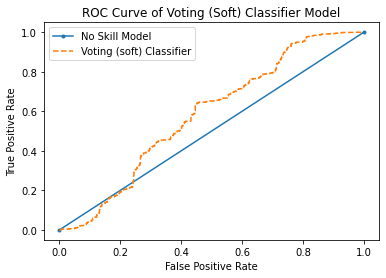

In [150]:
## Confusion Matrix
cm_VOT_soft = confusion_matrix(y_test, y_pred_test_soft )
print("Confusion Matrix : \n", cm_VOT_soft)

## Classification Report
print(classification_report(y_test, y_pred_test_soft))

## probability of falling into a particular class from each observation
probs_VOT_soft = vot_soft.predict_proba(X_test_new_scaled)
probs_VOT_soft = probs_VOT_soft[:,1]

## AUC (Area Under Curve) Score
auc_score_VOT_soft = roc_auc_score(y_test, probs_VOT_soft)
print("Voting (Soft) Classifier ROC AUC = %.3f",format(auc_score_VOT_soft,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve
fpr_VOT_soft, tpr_VOT_soft, __VOT_soft = roc_curve(y_test, probs_VOT_soft)
plt.plot(fpr_VOT_soft, tpr_VOT_soft, linestyle='--', label='Voting (soft) Classifier')
plt.title("ROC Curve of Voting (Soft) Classifier Model")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

In [151]:
combined_result = {'Model_Name':['Logistic (Baseline)','Decision Tree','Random Forest','Support Vector Machine','XgBoost','LightGBM','CatBoost','Voting(Soft)'],
                   'Training_Accuracy':[format(accuracy_score(y_train,predictions_training),"0.2f"), format(accuracy_score(y_train,predictions_training_DTC),"0.2f"), format(accuracy_score(y_train,predictions_training_RFC),"0.2f"), format(accuracy_score(y_train,predictions_training_SVM),"0.2f"), format(accuracy_score(y_train,predictions_training_XGB),"0.2f"),format(accuracy_score(y_train,predictions_training_LGB),"0.2f"),format(accuracy_score(y_train,predictions_training_CTB),"0.2f"), format(training_accuracy_soft,"0.2f")],
                   'Training_Accuracy_from_CV':[format(predictions_training_CV,"0.2f"),format(predictions_training_DTC_CV,"0.2f"),format(predictions_training_RFC_CV,"0.2f"),format(predictions_training_SVM_CV,"0.2f"),format(predictions_training_XGB_CV,"0.2f"),format(predictions_training_LGB_CV,"0.2f"),format(predictions_training_CTB_CV,"0.2f"),format(training_accuracy_soft_CV,"0.2f")],
                   'Testing_Accuracy':[format(accuracy_score(y_test,predictions_testing),"0.2f"), format(accuracy_score(y_test,predictions_testing_DTC),"0.2f"), format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"), format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"), format(accuracy_score(y_test,predictions_testing_XGB),"0.2f"),format(accuracy_score(y_test,predictions_testing_LGB),"0.2f"),format(accuracy_score(y_test,predictions_testing_CTB),"0.2f"), format(testing_accuracy_soft,"0.2f")],
                   'ROC_AUC_Score':[format(auc_score,"0.2f"),format(auc_score_DTC,"0.2f"),format(auc_score_RFC,"0.2f"),format(auc_score_SVM,"0.2f"),format(auc_score_XGB,"0.2f"),format(auc_score_LGB,"0.2f"),format(auc_score_CTB,"0.2f"),format(auc_score_VOT_soft,"0.2f")]
            
                  }

In [152]:
combined_result = pd.DataFrame.from_dict(combined_result)

In [153]:
combined_result

Model_Name Training_Accuracy Training_Accuracy_from_CV  \
0     Logistic (Baseline)              0.82                      0.82   
1           Decision Tree              0.88                      0.85   
2           Random Forest              0.96                      0.88   
3  Support Vector Machine              0.89                      0.79   
4                 XgBoost              0.91                      0.88   
5                LightGBM              0.95                      0.88   
6                CatBoost              0.93                      0.88   
7            Voting(Soft)              0.94                      0.88   

  Testing_Accuracy ROC_AUC_Score  
0             0.82          0.88  
1             0.86          0.92  
2             0.89          0.96  
3             0.86          0.50  
4             0.89          0.96  
5             0.88          0.96  
6             0.90          0.96  
7             0.89          0.58

No overfitting or underfitting issue.

### We will use LightGBM Classifier as Final Model to predict Malicious and Benign URL, asit has high ROC_AUC_Score and equal training and testing accuracy.

# Check Model on Validation Data

In [154]:
X_validation=data_url.copy()
X_validation=X_validation.drop(['url','result'],axis=1)
X_validation_new=X_validation.copy()

X_validation_new = X_validation_new[['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumDashInHostname', 'NumNumericChars', 'IpAddress',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength']]

X_validation_new['NumDots_GrtrEql_4_EDA'] = np.where(X_validation['NumDots']>=4,1,0)
X_validation_new['NumDash_LsEql_1_EDA'] = np.where(X_validation['NumDash']<=1,1,0)
X_validation_new['NumQueryComponents==0_EDA'] = np.where(X_validation['NumQueryComponents']==0,1,0)
X_validation_new['NumNumericChars==0_EDA'] = np.where(X_validation['NumNumericChars']==0,1,0)
X_validation_new['UrlLength_WOE'] = [-0.462714 if i<35 else 0.492540 if 35<=i<60 else 0.085523 if 60<=i<70 else -0.571443 if 70<=i<130 else 0.211513 for i in X_validation['UrlLength']]
X_validation_new['NumDash_WOE'] = [0.506946 if i<2 else -0.216327 if 2<=i<3 else -1.194891 if 3<=i<6 else -3.685051 for i in X_validation['NumDash']]
X_validation_new['NumDots_WOE'] = [-1.319003 if i<2 else -0.019816 if 2<=i<3 else 0.292073 if 3<=i<4 else 1.422297 for i in X_validation['NumDots']]
X_validation_new['NumUnderscore_WOE'] = [0.081354 if i<1 else -0.192783 if 1<=i<2 else -0.869469 for i in X_validation['NumUnderscore']]
X_validation_new['NumAmpersand_WOE'] = [0.114997 if i<1 else -1.146679 for i in X_validation['NumAmpersand']]
X_validation_new['NumDashInHostname_WOE'] = [-0.096186 if i<1 else 1.000892 for i in X_validation['NumDashInHostname']]
X_validation_new['NumNumericChars_WOE'] = [0.707812 if i<2 else -0.494543 if 2<=i<5 else -1.830517 if 5<=i<8 else -3.127076 if 8<=i<9 else -0.777151 if 9<=i<18 else 1.319388 for i in X_validation['NumNumericChars']]
X_validation_new['SubdomainLevel_WOE'] = [0.062771 if i<1 else -0.057979 for i in X_validation['SubdomainLevel']]
X_validation_new['HostnameLength_WOE'] = [-0.705058 if i<11 else -0.120158 if 11<=i<20 else 0.080934 if 20<=i<26 else 0.484893 if 26<=i<30 else 1.202948 for i in X_validation['HostnameLength']]
X_validation_new['PathLength_WOE'] = [-0.873511 if i<8 else -0.203832 if 8<=i<16 else 0.402728 if 16<=i<46 else -0.117753 if 46<=i<60 else -0.833557 for i in X_validation['PathLength']]
X_validation_new['QueryLength_WOE'] = [0.222194 if i<6 else -1.813158 if 6<=i<30 else -0.491447 for i in X_validation['QueryLength']]

x = X_validation.values
predictions=clf.predict(x)
df_validation = pd.DataFrame(clf.decision_function(x), columns = ["ISF_Score"])

## to avoid 'id' mismatch
X_validation_new.reset_index(drop=True,inplace=True)
df_validation.reset_index(drop=True,inplace=True)
X_validation_new=pd.concat([X_validation_new,df_validation],axis=1)
X_validation_new.head()

UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0         22        0        2              0           0             0   
1         23        0        2              0           0             0   
2         24        0        2              0           0             0   
3         21        0        2              0           0             0   
4         25        0        2              0           0             0   

   NumDashInHostname  NumNumericChars  IpAddress  NumQueryComponents  ...  \
0                  0                0          0                   0  ...   
1                  0                0          0                   0  ...   
2                  0                0          0                   0  ...   
3                  0                0          0                   0  ...   
4                  0                0          0                   0  ...   

   NumDots_WOE  NumUnderscore_WOE  NumAmpersand_WOE  NumDashInHostname_WOE  \
0    -0.019816           0.081354          0.114997              -0.096186   
1    -0.019816           0.081354          0.114997              -0.096186   
2    -0.019816           0.081354          0.114997              -0.096186   
3    -0.019816           0.081354          0.114997              -0.096186   
4    -0.019816           0.081354          0.114997              -0.096186   

   NumNumericChars_WOE  SubdomainLevel_WOE  HostnameLength_WOE  \
0             0.707812           -0.057979           -0.120158   
1             0.707812           -0.057979           -0.120158   
2             0.707812           -0.057979           -0.120158   
3             0.707812           -0.057979           -0.120158   
4             0.707812           -0.057979           -0.120158   

   PathLength_WOE  QueryLength_WOE  ISF_Score  
0       -0.873511         0.222194  -0.004410  
1       -0.873511         0.222194  -0.002580  
2       -0.873511         0.222194  -0.002914  
3       -0.873511         0.222194  -0.006296  
4       -0.873511         0.222194  -0.002914  

[5 rows x 29 columns]

In [160]:
y_pred_validation_soft = Randomized_search_LGB.predict(X_validation_new)
validation_accuracy_soft = accuracy_score(data_url['result'], y_pred_validation_soft)

In [161]:
print("Accuracy of Validation set from Voting(soft) Classifier: ", format(validation_accuracy_soft,"0.2f"))

Accuracy of Validation set from Voting(soft) Classifier:  0.75


Confusion Matrix : 
 [[256918  88820]
 [ 24919  79519]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82    345738
           1       0.47      0.76      0.58    104438

    accuracy                           0.75    450176
   macro avg       0.69      0.75      0.70    450176
weighted avg       0.81      0.75      0.76    450176

ROC AUC of Final Fitted Model for Validation Data=  0.75


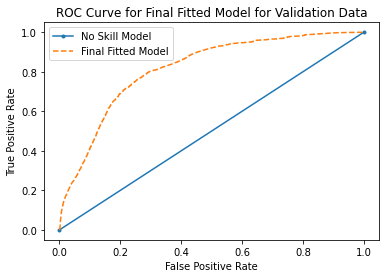

In [163]:
## Confusion Matrix
cm_validation = confusion_matrix(data_url['result'], y_pred_validation)
print("Confusion Matrix : \n", cm_validation)

## Classification Report
print(classification_report(data_url['result'], y_pred_validation))

## probability of falling into a particular class from each observation
probs_validation = Randomized_search_LGB.predict_proba(X_validation_new)
probs_validation = probs_validation[:,1]

## AUC (Area Under Curve) Score
auc_score_validation = roc_auc_score(data_url['result'], y_pred_validation)
print("ROC AUC of Final Fitted Model for Validation Data= ",format(auc_score_validation,"0.2f"))

## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(data_url['result']))]
ns_auc = roc_auc_score(data_url['result'], ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(data_url['result'], ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve for Final Fitted Model for Validation Data
fpr_validation, tpr_validation, __validation = roc_curve(data_url['result'], probs_validation)
plt.plot(fpr_validation, tpr_validation, linestyle='--', label='Final Fitted Model')
plt.title("ROC Curve for Final Fitted Model for Validation Data")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()

# Saving Model and Isolation Score Calculating Function as Pickle Files

In [ ]:
import pickle

In [ ]:
## Save the trained model as pickle string
with open('Phishing_Model.pickle','wb') as f:
    pickle.dump(vot_soft,f)

In [ ]:
## Save Isolation Score Calculating function into pickle file
with open('Isolation_Forest_Score.pickle','wb') as file:
    pickle.dump(clf,file)

# Creating requirements.txt

In [ ]:
#pip freeze>requirements.txt